In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/GBP_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222666, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.32463  1.32463  1.32462  1.32466
2020-01-01 17:05:00  1.32465  1.32465  1.32462  1.32473
2020-01-01 17:10:00  1.32464  1.32469  1.32459  1.32476
2020-01-01 17:15:00  1.32469  1.32480  1.32459  1.32481
2020-01-01 17:20:00  1.32482  1.32466  1.32457  1.32482

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222665, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.32463  1.32463  1.32462  1.32466         1.32465    17   
2020-01-01 17:05:00  1.32465  1.32465  1.32462  1.32473         1.32469    17   
2020-01-01 17:10:00  1.32464  1.32469  1.32459  1.32476         1.32480    17   
2020-01-01 17:15:00  1.32469  1.32480  1.32459  1.32481         1.32466    17   
2020-01-01 17:20:00  1.32482  1.32466  1.32457  1.32482         1.32512    17   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1   0.00000   1.324640  0.00004    1.324635  
2020-01-01 17:05:00    2     1   0.00000   1.324675  0.00011    1.324663  
2020-01-01 17:10:00    2     1  -0.00005   1.324675  0.00017    1.324670  
2020-01-01 17:15:00    2     1  -0.00011   1.324700  0.00022    1.324723  
2020-01-01 17:20:00    2     1   0.00016   1.324695  0.00025    1.324717

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.32463  1.32463  1.32462  1.32466         1.32465    17   
2020-01-01 17:05:00  1.32465  1.32465  1.32462  1.32473         1.32469    17   
2020-01-01 17:10:00  1.32464  1.32469  1.32459  1.32476         1.32480    17   
2020-01-01 17:15:00  1.32469  1.32480  1.32459  1.32481         1.32466    17   
2020-01-01 17:20:00  1.32482  1.32466  1.32457  1.32482         1.32512    17   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1   0.00000   1.324640  0.00004    1.324635   
2020-01-01 17:05:00    2     1   0.00000   1.324675  0.00011    1.324663   
2020-01-01 17:10:00    2     1  -0.00005   1.324675  0.00017    1.324670   
2020-01-01 17:15:00    2     1  -0.00011   1.324700  0.00022    1.324723   
2020-01-01 17:20:00    2     1   0.00016   1.324695  0.00025    1.324717   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.512880  
2020-01-01 17:05:00 -25.512691  
2020-01-01 17:10:00 -25.512691  
2020-01-01 17:15:00 -25.512671  
2020-01-01 17:20:00 -25.512695

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.32463  1.32462  1.32466         1.32465    17    2   
2020-01-01 17:05:00  1.32465  1.32462  1.32473         1.32469    17    2   
2020-01-01 17:10:00  1.32464  1.32459  1.32476         1.32480    17    2   
2020-01-01 17:15:00  1.32469  1.32459  1.32481         1.32466    17    2   
2020-01-01 17:20:00  1.32482  1.32457  1.32482         1.32512    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00000   1.324640  0.00004    1.324635 -25.512880  
2020-01-01 17:05:00     1   0.00000   1.324675  0.00011    1.324663 -25.512691  
2020-01-01 17:10:00     1  -0.00005   1.324675  0.00017    1.324670 -25.512691  
2020-01-01 17:15:00     1  -0.00011   1.324700  0.00022

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

155865
155865
33399
33399
33401
33401


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(155865, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(155840, 24, 12)
(33374, 24, 12)
(33376, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(155840, 1)
(33374, 1)
(33376, 1)


array([[0.6475849 ],
       [0.6488571 ],
       [0.64790297],
       ...,
       [0.7628889 ],
       [0.7621827 ],
       [0.7615113 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.6475849 , 0.6488571 , 0.64790297, ..., 0.7628889 , 0.7621827 ,
       0.7615113 ], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
404/405 [============================>.] - ETA: 0s - loss: 229.7837 - mae: 2.1286 - mse: 229.7837 - root_mean_squared_error: 15.1586 - mape: 1501.1141
Epoch 1: val_mse improved from inf to 0.21362, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 60s 108ms/step - loss: 229.3419 - mae: 2.1255 - mse: 229.3419 - root_mean_squared_error: 15.1440 - mape: 1498.3627 - val_loss: 0.2136 - val_mae: 0.3846 - val_mse: 0.2136 - val_root_mean_squared_error: 0.4622 - val_mape: 5376.8662
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.1263 - mae: 0.2983 - mse: 0.1263 - root_mean_squared_error: 0.3554 - mape: 1272.5732
Epoch 2: val_mse improved from 0.21362 to 0.08987, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.1263 - mae: 0.2983 - mse: 0.1263 - root_mean_squared_error: 0.3554 - mape: 1272.5732 - val_loss: 0.0899 - val_mae: 0.2533 - val_mse: 0.0899 - val_root_mean_squared_error: 0.2998 - val_mape: 20206.6738
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0432 - mae: 0.1741 - mse: 0.0432 - root_mean_squared_error: 0.2078 - mape: 4509.4810
Epoch 3: val_mse improved from 0.08987 to 0.08807, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 40s 98ms/step - loss: 0.0432 - mae: 0.1741 - mse: 0.0432 - root_mean_squared_error: 0.2077 - mape: 4500.8755 - val_loss: 0.0881 - val_mae: 0.2503 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2968 - val_mape: 19973.9258
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.0411 - mae: 0.1701 - mse: 0.0411 - root_mean_squared_error: 0.2028 - mape: 4535.1729
Epoch 4: val_mse improved from 0.08807 to 0.08563, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 0.0411 - mae: 0.1701 - mse: 0.0411 - root_mean_squared_error: 0.2028 - mape: 4535.1729 - val_loss: 0.0856 - val_mae: 0.2455 - val_mse: 0.0856 - val_root_mean_squared_error: 0.2926 - val_mape: 19693.6055
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0362 - mae: 0.1588 - mse: 0.0362 - root_mean_squared_error: 0.1902 - mape: 4586.4619
Epoch 5: val_mse improved from 0.08563 to 0.05628, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0362 - mae: 0.1588 - mse: 0.0362 - root_mean_squared_error: 0.1902 - mape: 4586.4619 - val_loss: 0.0563 - val_mae: 0.1961 - val_mse: 0.0563 - val_root_mean_squared_error: 0.2372 - val_mape: 16928.1133
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0129 - mae: 0.0866 - mse: 0.0129 - root_mean_squared_error: 0.1138 - mape: 3470.9194
Epoch 6: val_mse improved from 0.05628 to 0.01907, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0129 - mae: 0.0866 - mse: 0.0129 - root_mean_squared_error: 0.1138 - mape: 3470.9194 - val_loss: 0.0191 - val_mae: 0.1016 - val_mse: 0.0191 - val_root_mean_squared_error: 0.1381 - val_mape: 12892.6113
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0061 - mae: 0.0586 - mse: 0.0061 - root_mean_squared_error: 0.0778 - mape: 3019.5361
Epoch 7: val_mse improved from 0.01907 to 0.00944, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0061 - mae: 0.0586 - mse: 0.0061 - root_mean_squared_error: 0.0778 - mape: 3019.5361 - val_loss: 0.0094 - val_mae: 0.0662 - val_mse: 0.0094 - val_root_mean_squared_error: 0.0972 - val_mape: 10543.0322
Epoch 8/60
405/405 [==============================] - ETA: 0s - loss: 0.0041 - mae: 0.0483 - mse: 0.0041 - root_mean_squared_error: 0.0643 - mape: 2126.4683
Epoch 8: val_mse improved from 0.00944 to 0.00705, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 95ms/step - loss: 0.0041 - mae: 0.0483 - mse: 0.0041 - root_mean_squared_error: 0.0643 - mape: 2126.4683 - val_loss: 0.0071 - val_mae: 0.0531 - val_mse: 0.0071 - val_root_mean_squared_error: 0.0840 - val_mape: 9800.7803
Epoch 9/60
405/405 [==============================] - ETA: 0s - loss: 0.0035 - mae: 0.0444 - mse: 0.0035 - root_mean_squared_error: 0.0593 - mape: 1979.5328
Epoch 9: val_mse improved from 0.00705 to 0.00620, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0035 - mae: 0.0444 - mse: 0.0035 - root_mean_squared_error: 0.0593 - mape: 1979.5328 - val_loss: 0.0062 - val_mae: 0.0532 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0788 - val_mape: 9369.0713
Epoch 10/60
405/405 [==============================] - ETA: 0s - loss: 0.0031 - mae: 0.0415 - mse: 0.0031 - root_mean_squared_error: 0.0554 - mape: 2024.9027
Epoch 10: val_mse improved from 0.00620 to 0.00525, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0031 - mae: 0.0415 - mse: 0.0031 - root_mean_squared_error: 0.0554 - mape: 2024.9027 - val_loss: 0.0052 - val_mae: 0.0433 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0725 - val_mape: 9106.5469
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0392 - mse: 0.0027 - root_mean_squared_error: 0.0523 - mape: 2142.0156
Epoch 11: val_mse improved from 0.00525 to 0.00475, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0027 - mae: 0.0392 - mse: 0.0027 - root_mean_squared_error: 0.0523 - mape: 2142.0156 - val_loss: 0.0048 - val_mae: 0.0436 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0689 - val_mape: 8775.8232
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0363 - mse: 0.0024 - root_mean_squared_error: 0.0487 - mape: 1839.9855
Epoch 12: val_mse improved from 0.00475 to 0.00399, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0024 - mae: 0.0363 - mse: 0.0024 - root_mean_squared_error: 0.0487 - mape: 1839.9855 - val_loss: 0.0040 - val_mae: 0.0364 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0632 - val_mape: 8489.3096
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0344 - mse: 0.0021 - root_mean_squared_error: 0.0462 - mape: 1830.0551
Epoch 13: val_mse improved from 0.00399 to 0.00350, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0021 - mae: 0.0344 - mse: 0.0021 - root_mean_squared_error: 0.0462 - mape: 1830.0551 - val_loss: 0.0035 - val_mae: 0.0335 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0592 - val_mape: 8200.2178
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0327 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 1653.7770
Epoch 14: val_mse improved from 0.00350 to 0.00315, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0019 - mae: 0.0327 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 1653.7770 - val_loss: 0.0031 - val_mae: 0.0319 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0561 - val_mape: 7895.2583
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0312 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 1654.0121
Epoch 15: val_mse improved from 0.00315 to 0.00304, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0017 - mae: 0.0312 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 1654.0121 - val_loss: 0.0030 - val_mae: 0.0387 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0552 - val_mape: 7601.0537
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0291 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1631.1211
Epoch 16: val_mse improved from 0.00304 to 0.00244, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0015 - mae: 0.0291 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1631.1211 - val_loss: 0.0024 - val_mae: 0.0298 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0494 - val_mape: 7247.9912
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0278 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 1597.7843
Epoch 17: val_mse improved from 0.00244 to 0.00207, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0014 - mae: 0.0278 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 1597.7843 - val_loss: 0.0021 - val_mae: 0.0303 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 6695.5068
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0258 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1412.1094
Epoch 18: val_mse improved from 0.00207 to 0.00190, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 0.0012 - mae: 0.0258 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1412.1094 - val_loss: 0.0019 - val_mae: 0.0291 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 6324.0679
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0242 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 1351.5479
Epoch 19: val_mse improved from 0.00190 to 0.00130, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 0.0010 - mae: 0.0242 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 1351.5479 - val_loss: 0.0013 - val_mae: 0.0215 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 5901.1201
Epoch 20/60
405/405 [==============================] - ETA: 0s - loss: 9.1818e-04 - mae: 0.0231 - mse: 9.1818e-04 - root_mean_squared_error: 0.0303 - mape: 1393.8904
Epoch 20: val_mse improved from 0.00130 to 0.00103, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 9.1818e-04 - mae: 0.0231 - mse: 9.1818e-04 - root_mean_squared_error: 0.0303 - mape: 1393.8904 - val_loss: 0.0010 - val_mae: 0.0189 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 5570.7134
Epoch 21/60
405/405 [==============================] - ETA: 0s - loss: 7.5415e-04 - mae: 0.0209 - mse: 7.5415e-04 - root_mean_squared_error: 0.0275 - mape: 1070.6166
Epoch 21: val_mse improved from 0.00103 to 0.00099, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 7.5415e-04 - mae: 0.0209 - mse: 7.5415e-04 - root_mean_squared_error: 0.0275 - mape: 1070.6166 - val_loss: 9.8940e-04 - val_mae: 0.0205 - val_mse: 9.8940e-04 - val_root_mean_squared_error: 0.0315 - val_mape: 5255.8330
Epoch 22/60
405/405 [==============================] - ETA: 0s - loss: 6.6610e-04 - mae: 0.0197 - mse: 6.6610e-04 - root_mean_squared_error: 0.0258 - mape: 1207.7993
Epoch 22: val_mse improved from 0.00099 to 0.00067, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 6.6610e-04 - mae: 0.0197 - mse: 6.6610e-04 - root_mean_squared_error: 0.0258 - mape: 1207.7993 - val_loss: 6.7493e-04 - val_mae: 0.0150 - val_mse: 6.7493e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 4931.8921
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 5.6866e-04 - mae: 0.0183 - mse: 5.6866e-04 - root_mean_squared_error: 0.0238 - mape: 964.9028
Epoch 23: val_mse improved from 0.00067 to 0.00051, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 5.6866e-04 - mae: 0.0183 - mse: 5.6866e-04 - root_mean_squared_error: 0.0238 - mape: 964.9028 - val_loss: 5.0972e-04 - val_mae: 0.0140 - val_mse: 5.0972e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 4375.2329
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 4.7997e-04 - mae: 0.0170 - mse: 4.7997e-04 - root_mean_squared_error: 0.0219 - mape: 913.1946
Epoch 24: val_mse improved from 0.00051 to 0.00050, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 4.7997e-04 - mae: 0.0170 - mse: 4.7997e-04 - root_mean_squared_error: 0.0219 - mape: 913.1946 - val_loss: 4.9930e-04 - val_mae: 0.0155 - val_mse: 4.9930e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 3825.9141
Epoch 25/60
404/405 [============================>.] - ETA: 0s - loss: 3.9967e-04 - mae: 0.0156 - mse: 3.9967e-04 - root_mean_squared_error: 0.0200 - mape: 734.1661
Epoch 25: val_mse improved from 0.00050 to 0.00027, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 3.9954e-04 - mae: 0.0156 - mse: 3.9954e-04 - root_mean_squared_error: 0.0200 - mape: 732.7582 - val_loss: 2.7110e-04 - val_mae: 0.0105 - val_mse: 2.7110e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 3594.8687
Epoch 26/60
404/405 [============================>.] - ETA: 0s - loss: 3.9932e-04 - mae: 0.0156 - mse: 3.9932e-04 - root_mean_squared_error: 0.0200 - mape: 621.5135
Epoch 26: val_mse did not improve from 0.00027
405/405 [==============================] - 13s 32ms/step - loss: 3.9901e-04 - mae: 0.0156 - mse: 3.9901e-04 - root_mean_squared_error: 0.0200 - mape: 620.3216 - val_loss: 3.9745e-04 - val_mae: 0.0163 - val_mse: 3.9745e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 3398.2363
Epoch 27/60
405/405 [==============================] - ETA: 0s - loss: 3.2363e-04 - mae: 0.0141 - mse: 3.2363e-04 - root_mean_squared_error: 0.0180 - mape: 631.6123
Epoch 27: val_mse did not improve from 0.00027
405/405 [===

405/405 [==============================] - 38s 94ms/step - loss: 3.0240e-04 - mae: 0.0137 - mse: 3.0240e-04 - root_mean_squared_error: 0.0174 - mape: 613.1765 - val_loss: 2.3034e-04 - val_mae: 0.0104 - val_mse: 2.3034e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 3172.8801
Epoch 29/60
405/405 [==============================] - ETA: 0s - loss: 2.8417e-04 - mae: 0.0132 - mse: 2.8417e-04 - root_mean_squared_error: 0.0169 - mape: 508.8003
Epoch 29: val_mse did not improve from 0.00023
405/405 [==============================] - 13s 32ms/step - loss: 2.8417e-04 - mae: 0.0132 - mse: 2.8417e-04 - root_mean_squared_error: 0.0169 - mape: 508.8003 - val_loss: 2.4217e-04 - val_mae: 0.0114 - val_mse: 2.4217e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 3004.3770
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 2.3615e-04 - mae: 0.0121 - mse: 2.3615e-04 - root_mean_squared_error: 0.0154 - mape: 677.9655
Epoch 30: val_mse did not improve from 0.00023
405/405 [===

405/405 [==============================] - 38s 93ms/step - loss: 2.1099e-04 - mae: 0.0113 - mse: 2.1099e-04 - root_mean_squared_error: 0.0145 - mape: 465.2335 - val_loss: 1.8845e-04 - val_mae: 0.0094 - val_mse: 1.8845e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 2678.6912
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 2.0996e-04 - mae: 0.0115 - mse: 2.0996e-04 - root_mean_squared_error: 0.0145 - mape: 577.1614
Epoch 33: val_mse did not improve from 0.00019
405/405 [==============================] - 13s 32ms/step - loss: 2.0996e-04 - mae: 0.0115 - mse: 2.0996e-04 - root_mean_squared_error: 0.0145 - mape: 577.1614 - val_loss: 3.9368e-04 - val_mae: 0.0126 - val_mse: 3.9368e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 3027.6221
Epoch 34/60
405/405 [==============================] - ETA: 0s - loss: 1.9388e-04 - mae: 0.0110 - mse: 1.9388e-04 - root_mean_squared_error: 0.0139 - mape: 485.4374
Epoch 34: val_mse did not improve from 0.00019
405/405 [===

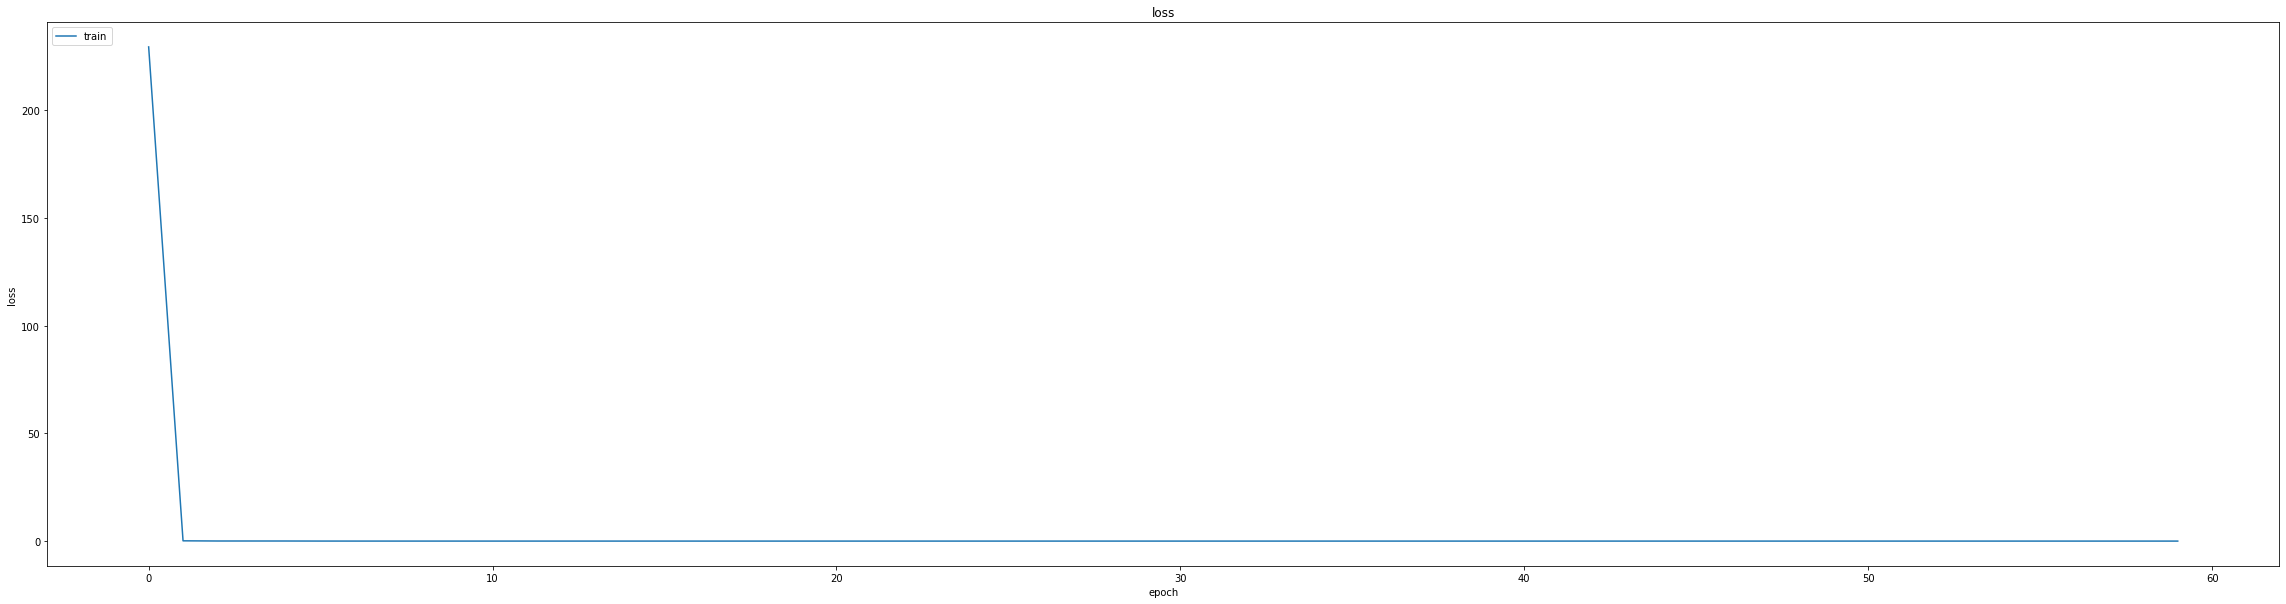

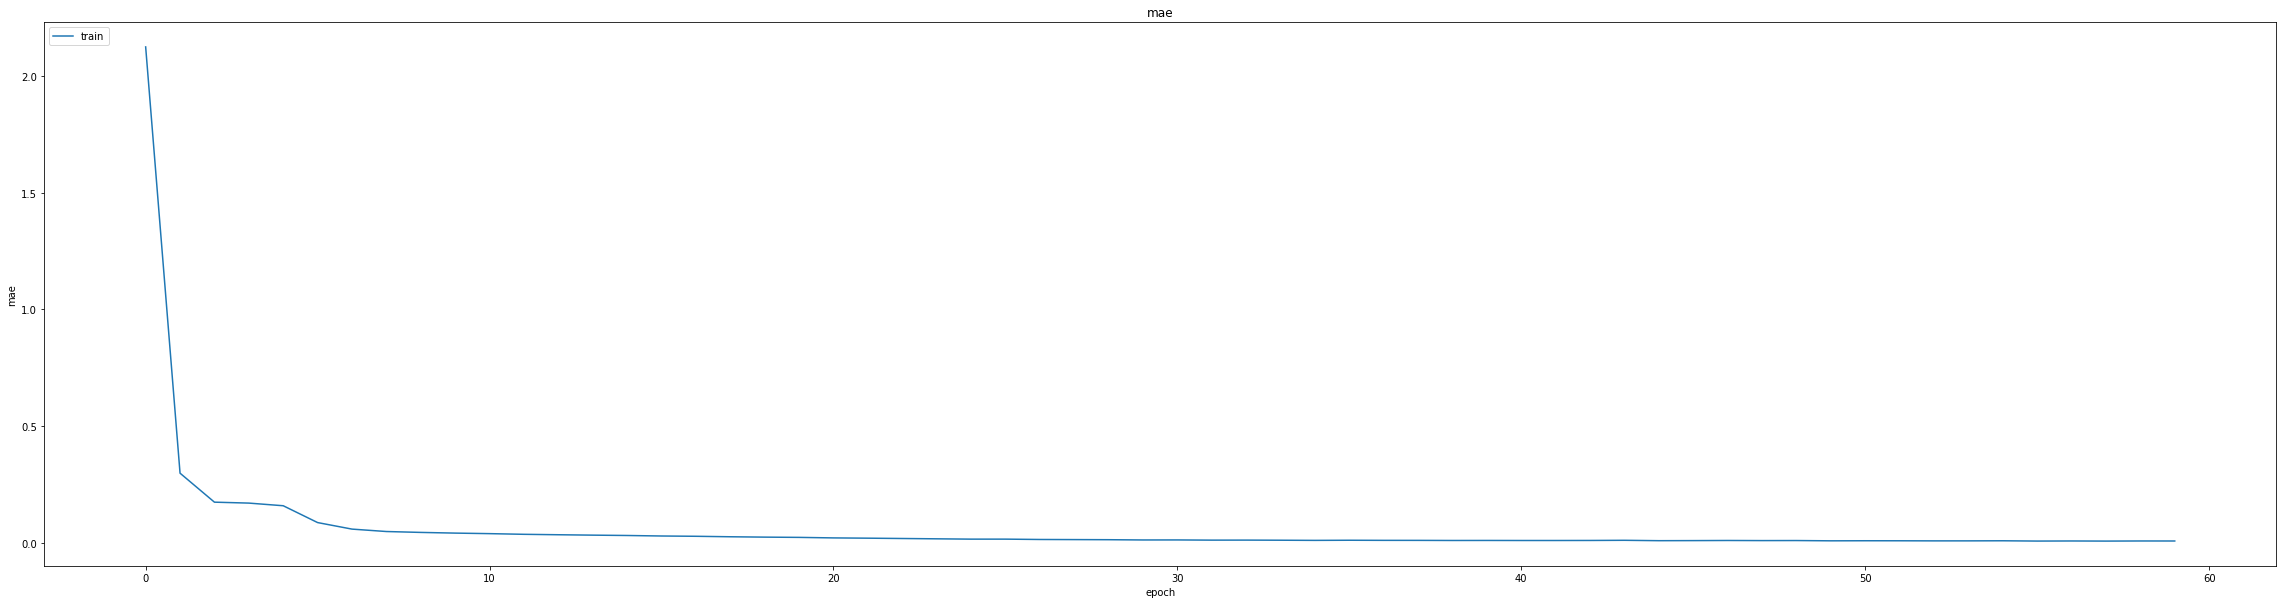

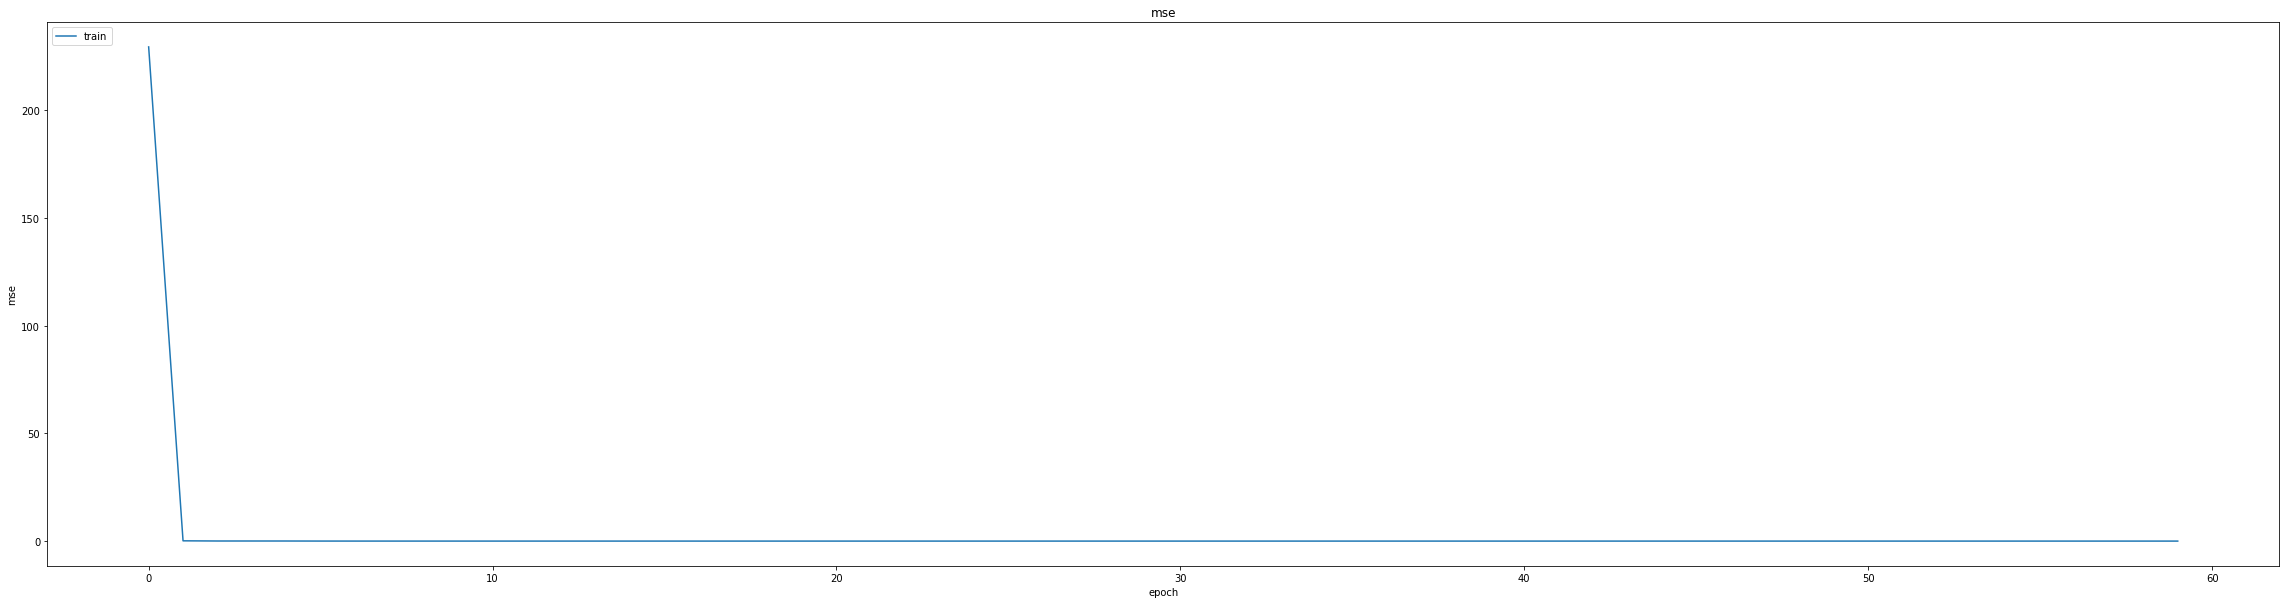

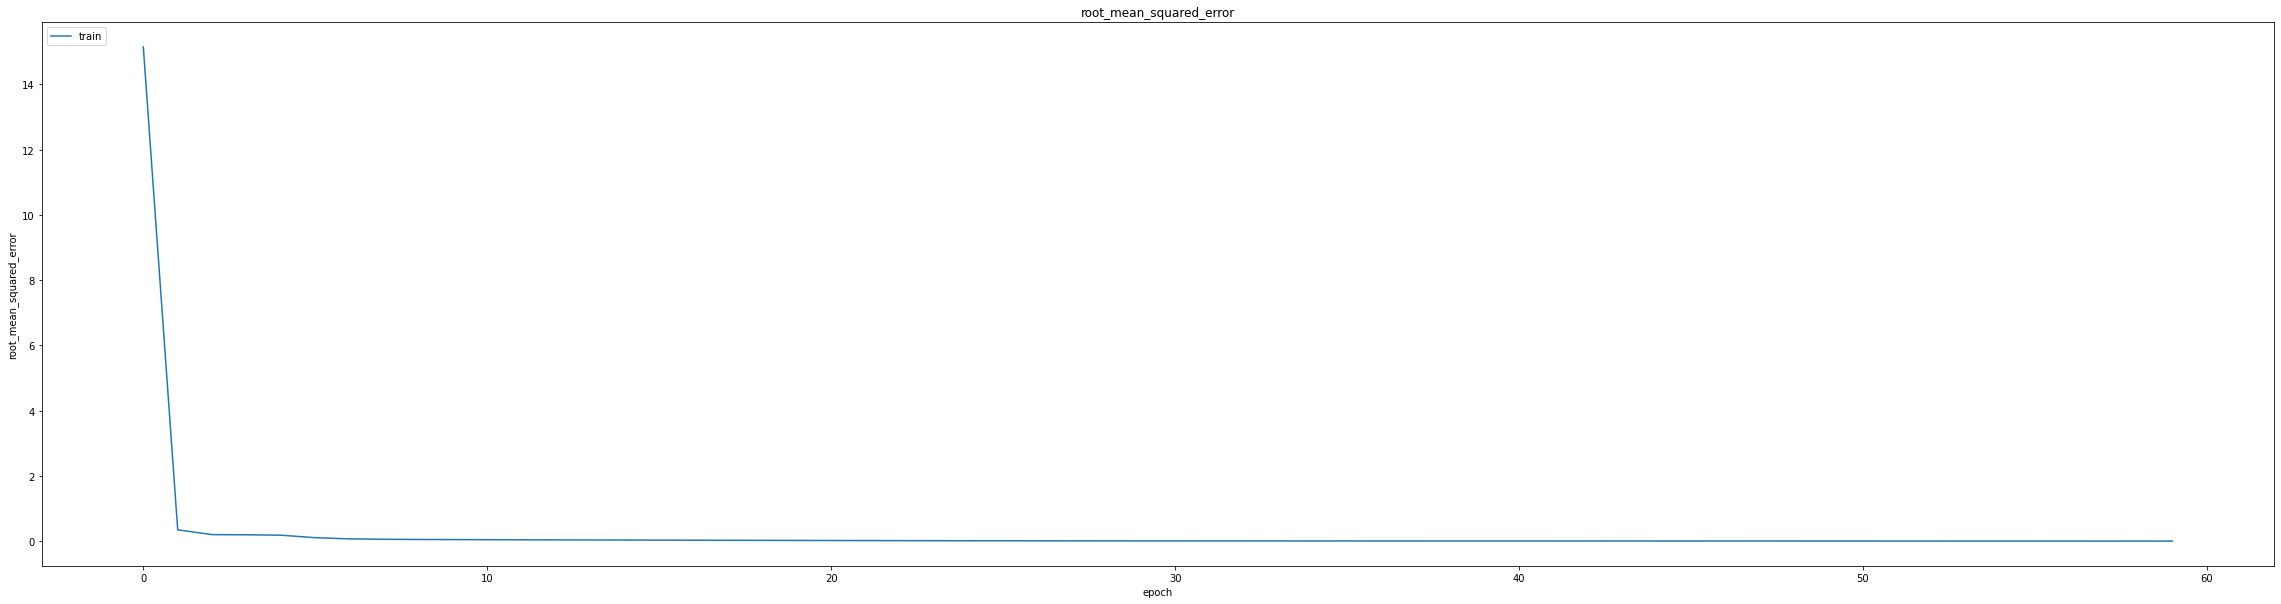

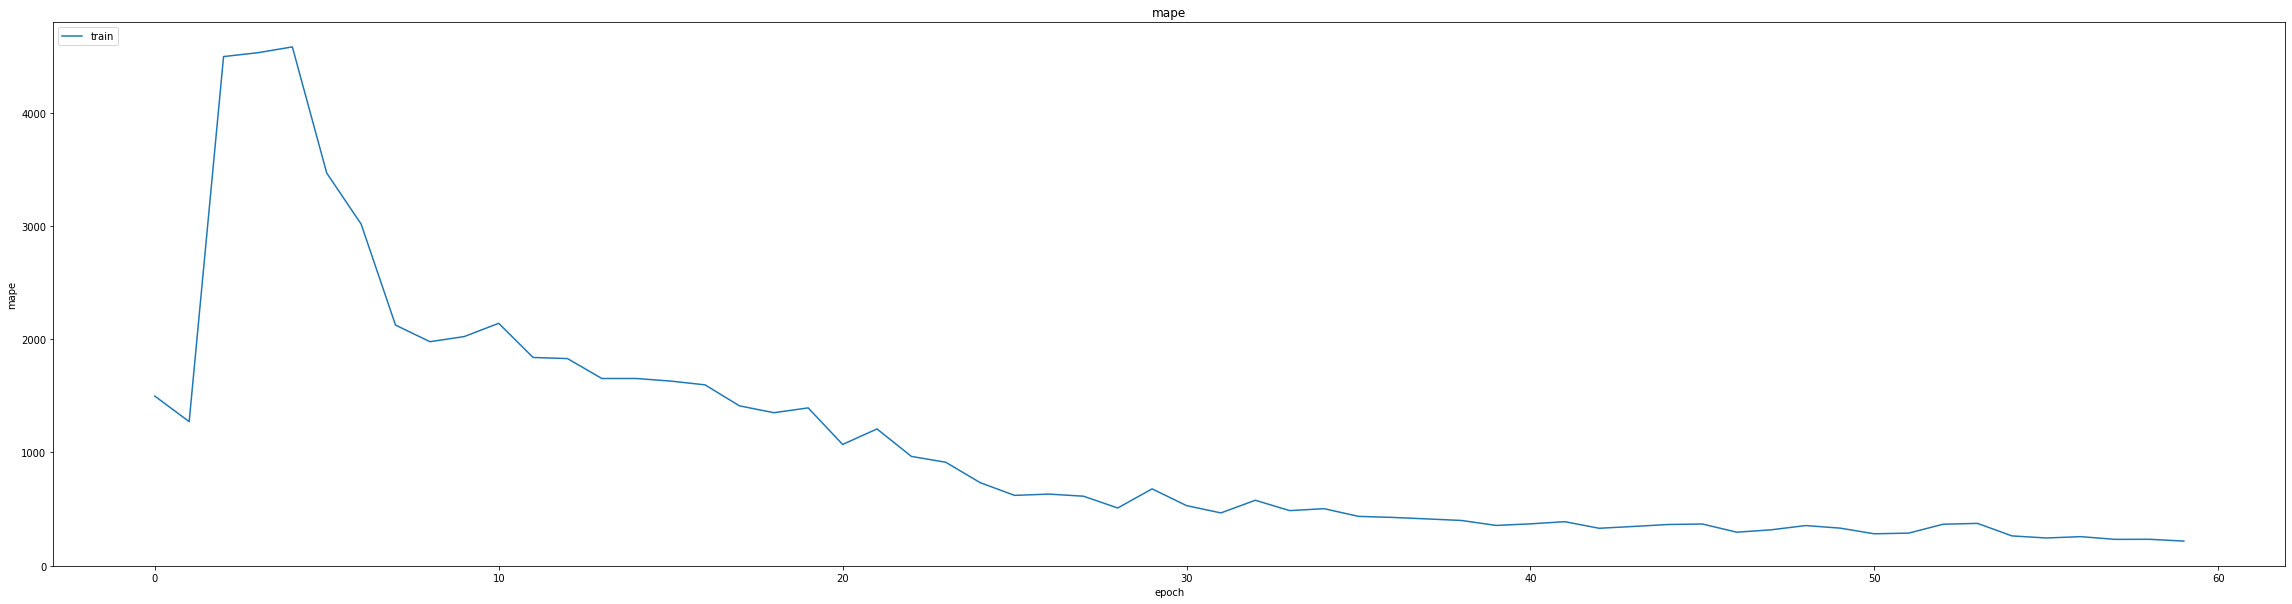

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008478322997689247
0.013727846555411816
1043/1043 [==============================] - 8s 6ms/step
0.9945435336688287


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
404/405 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0252 - mse: 0.0034 - root_mean_squared_error: 0.0581 - mape: 633.6262
Epoch 1: val_mse did not improve from 0.00019
405/405 [==============================] - 21s 36ms/step - loss: 0.0034 - mae: 0.0252 - mse: 0.0034 - root_mean_squared_error: 0.0581 - mape: 632.4108 - val_loss: 4.3780e-04 - val_mae: 0.0141 - val_mse: 4.3780e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 2834.6042 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 2.6296e-04 - mae: 0.0128 - mse: 2.6296e-04 - root_mean_squared_error: 0.0162 - mape: 399.0706
Epoch 2: val_mse improved from 0.00019 to 0.00015, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 94ms/step - loss: 2.6296e-04 - mae: 0.0128 - mse: 2.6296e-04 - root_mean_squared_error: 0.0162 - mape: 399.0706 - val_loss: 1.4629e-04 - val_mae: 0.0086 - val_mse: 1.4629e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 2105.4082 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
405/405 [==============================] - ETA: 0s - loss: 1.6243e-04 - mae: 0.0101 - mse: 1.6243e-04 - root_mean_squared_error: 0.0127 - mape: 331.5787
Epoch 3: val_mse improved from 0.00015 to 0.00013, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)


405/405 [==============================] - 38s 93ms/step - loss: 1.6243e-04 - mae: 0.0101 - mse: 1.6243e-04 - root_mean_squared_error: 0.0127 - mape: 331.5787 - val_loss: 1.2769e-04 - val_mae: 0.0073 - val_mse: 1.2769e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 2201.9346 - lr: 9.0000e-04
Epoch 4/20
405/405 [==============================] - ETA: 0s - loss: 1.8395e-04 - mae: 0.0106 - mse: 1.8395e-04 - root_mean_squared_error: 0.0136 - mape: 349.6049
Epoch 4: val_mse did not improve from 0.00013
405/405 [==============================] - 13s 32ms/step - loss: 1.8395e-04 - mae: 0.0106 - mse: 1.8395e-04 - root_mean_squared_error: 0.0136 - mape: 349.6049 - val_loss: 1.3339e-04 - val_mae: 0.0086 - val_mse: 1.3339e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 2114.9626 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
405/405 [==============================] - ETA: 0s - loss: 1.0470e-04 - mae: 0.0082 - mse: 1.0470e-04 - root_mean_squared_error: 0.0102 - mape: 2

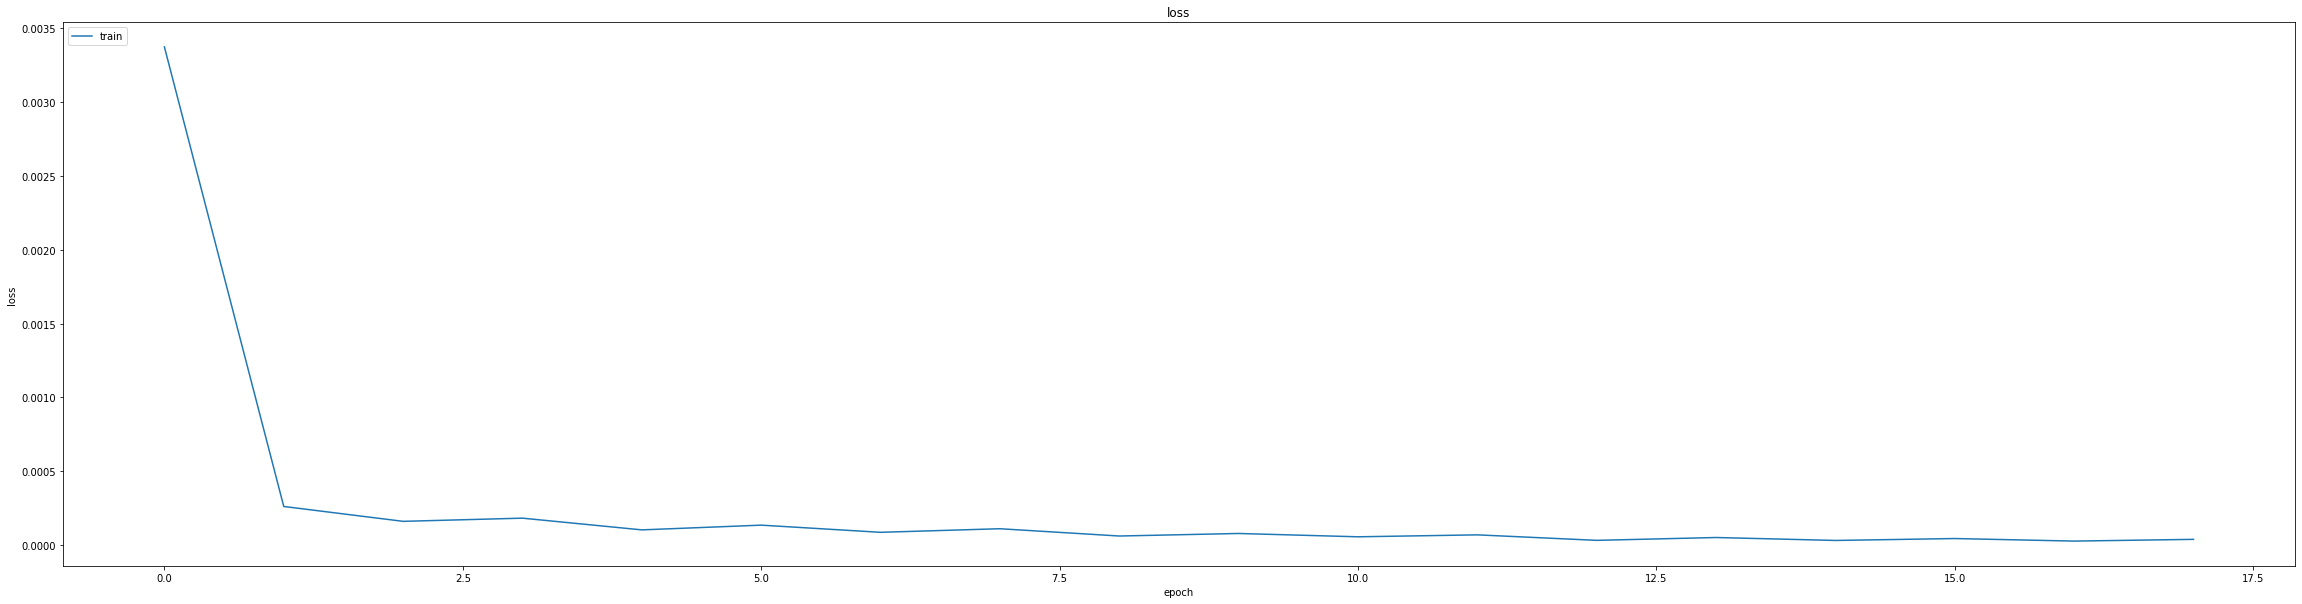

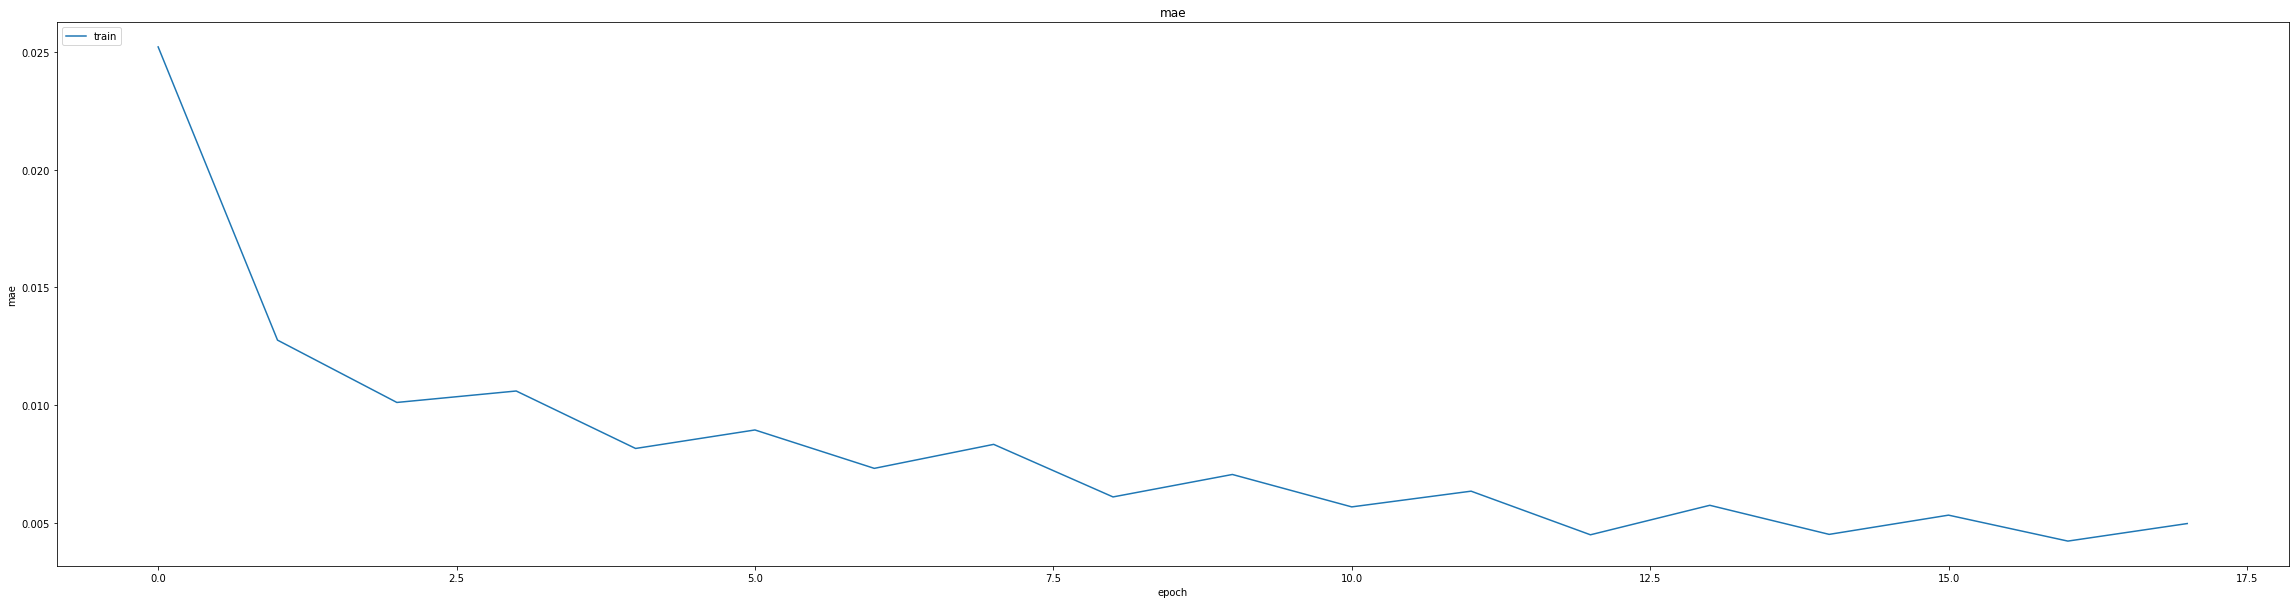

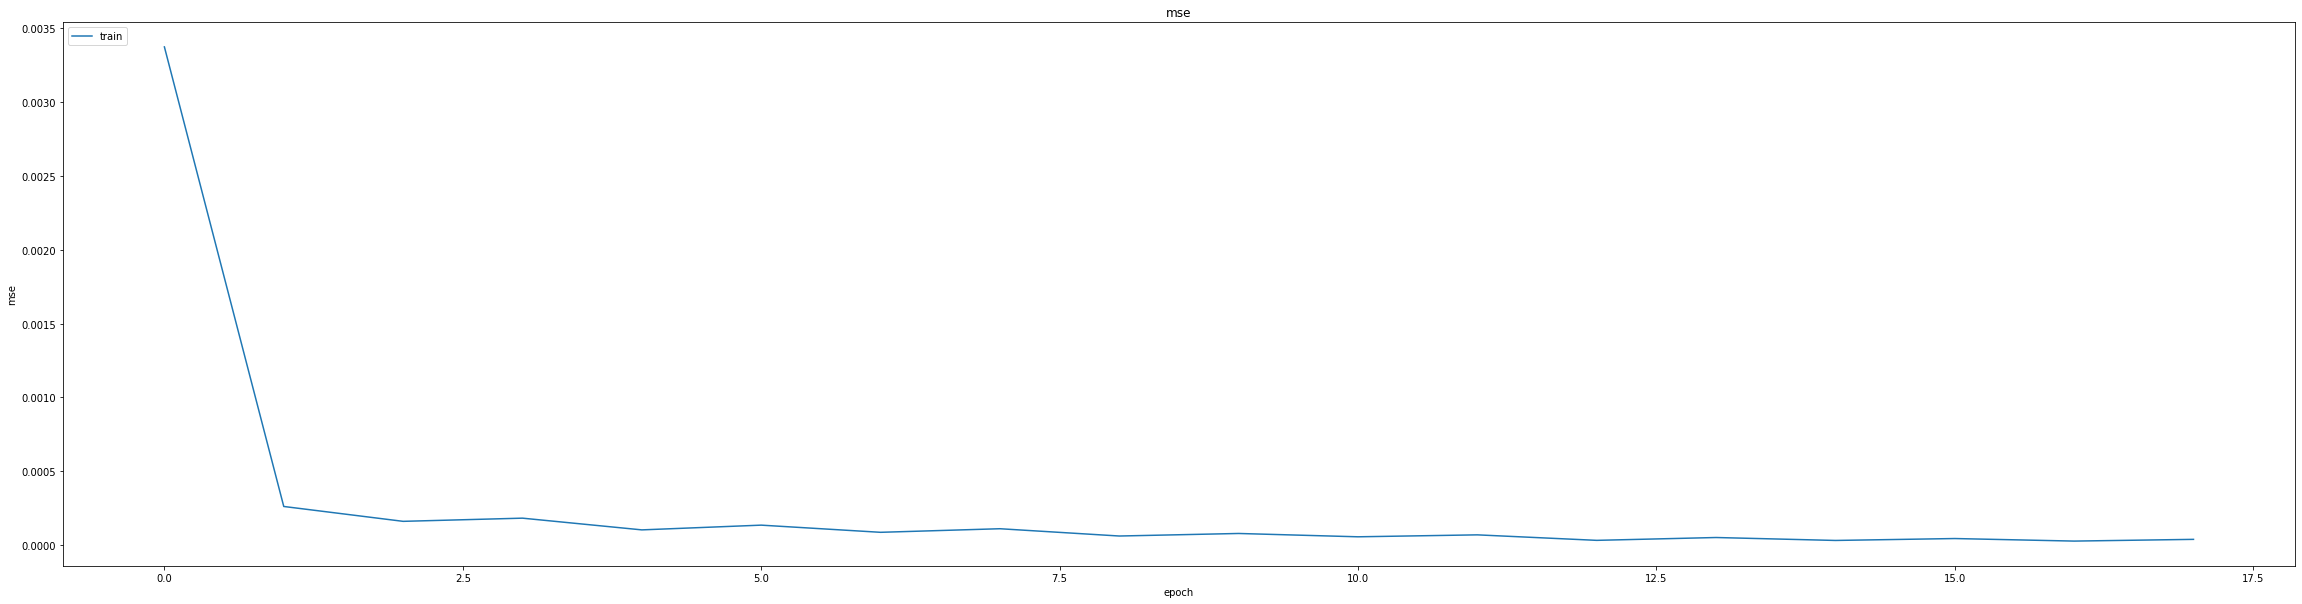

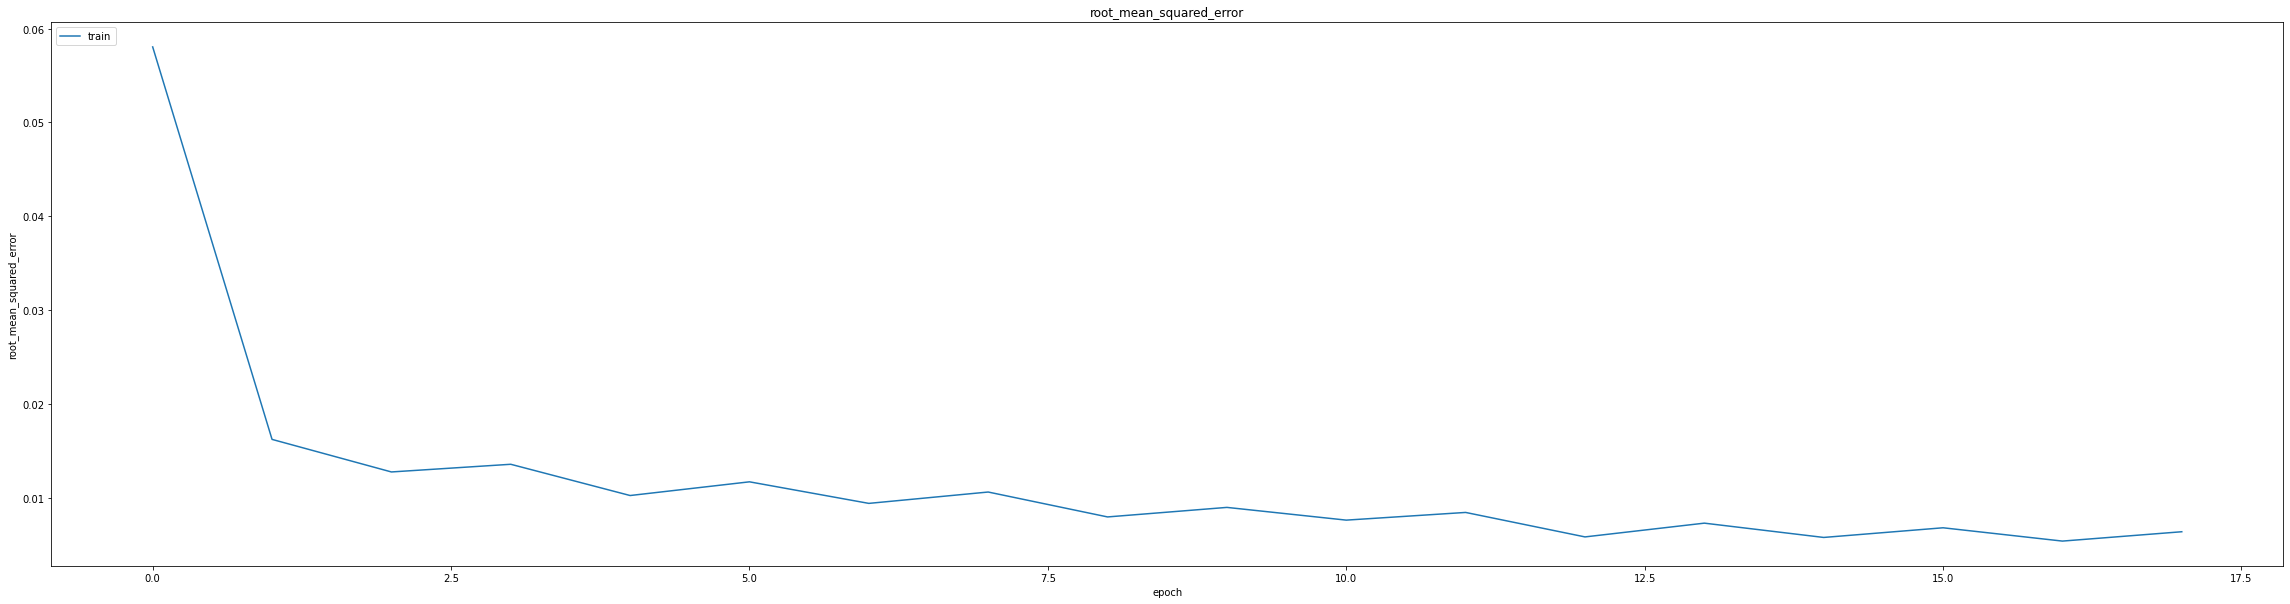

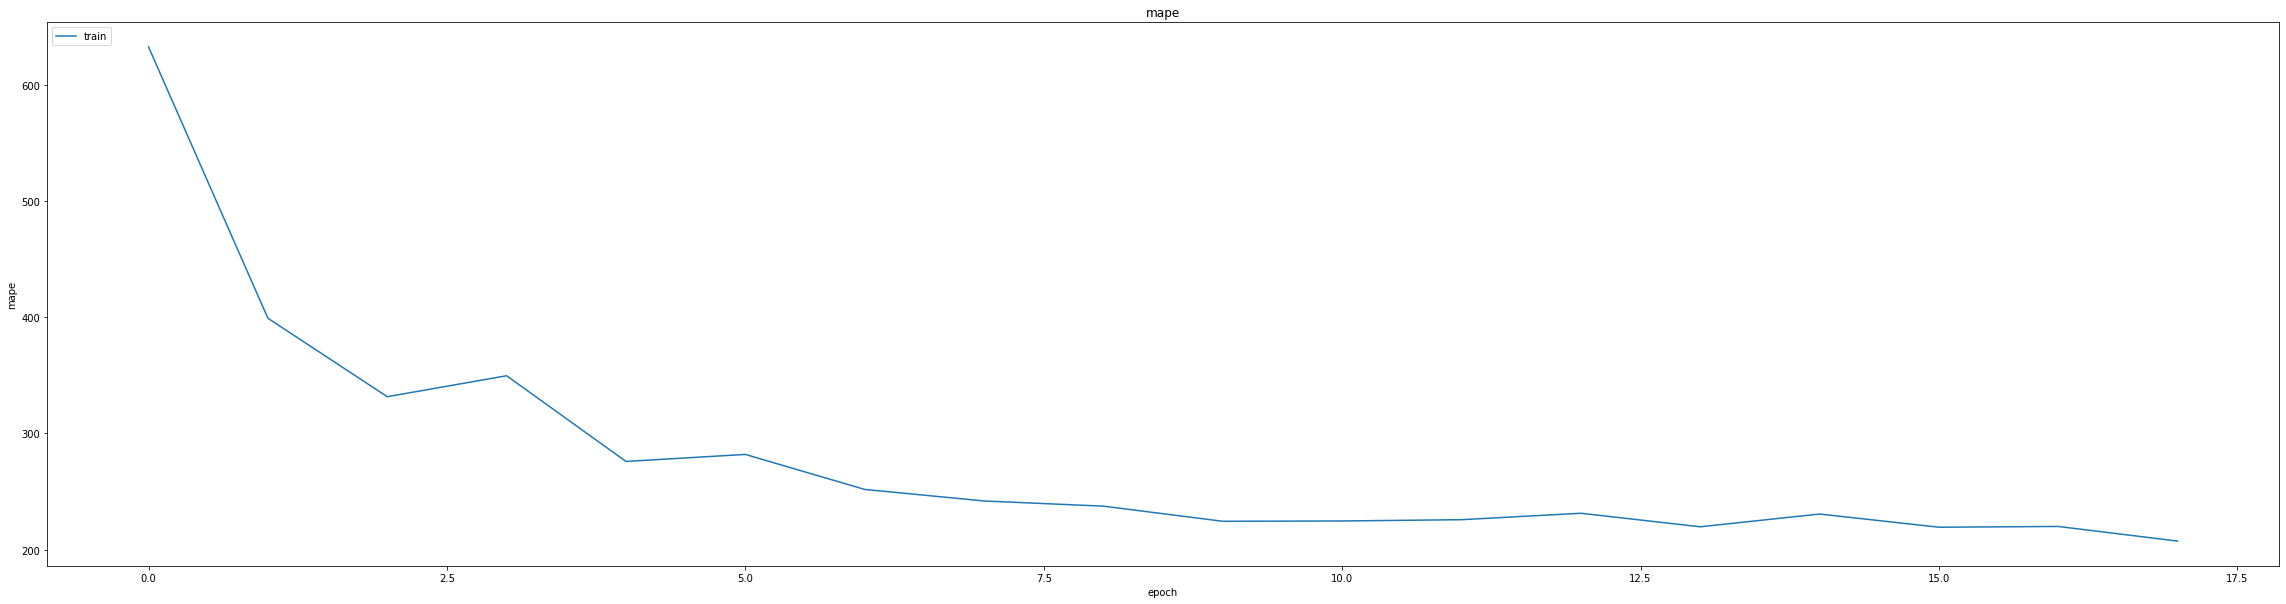

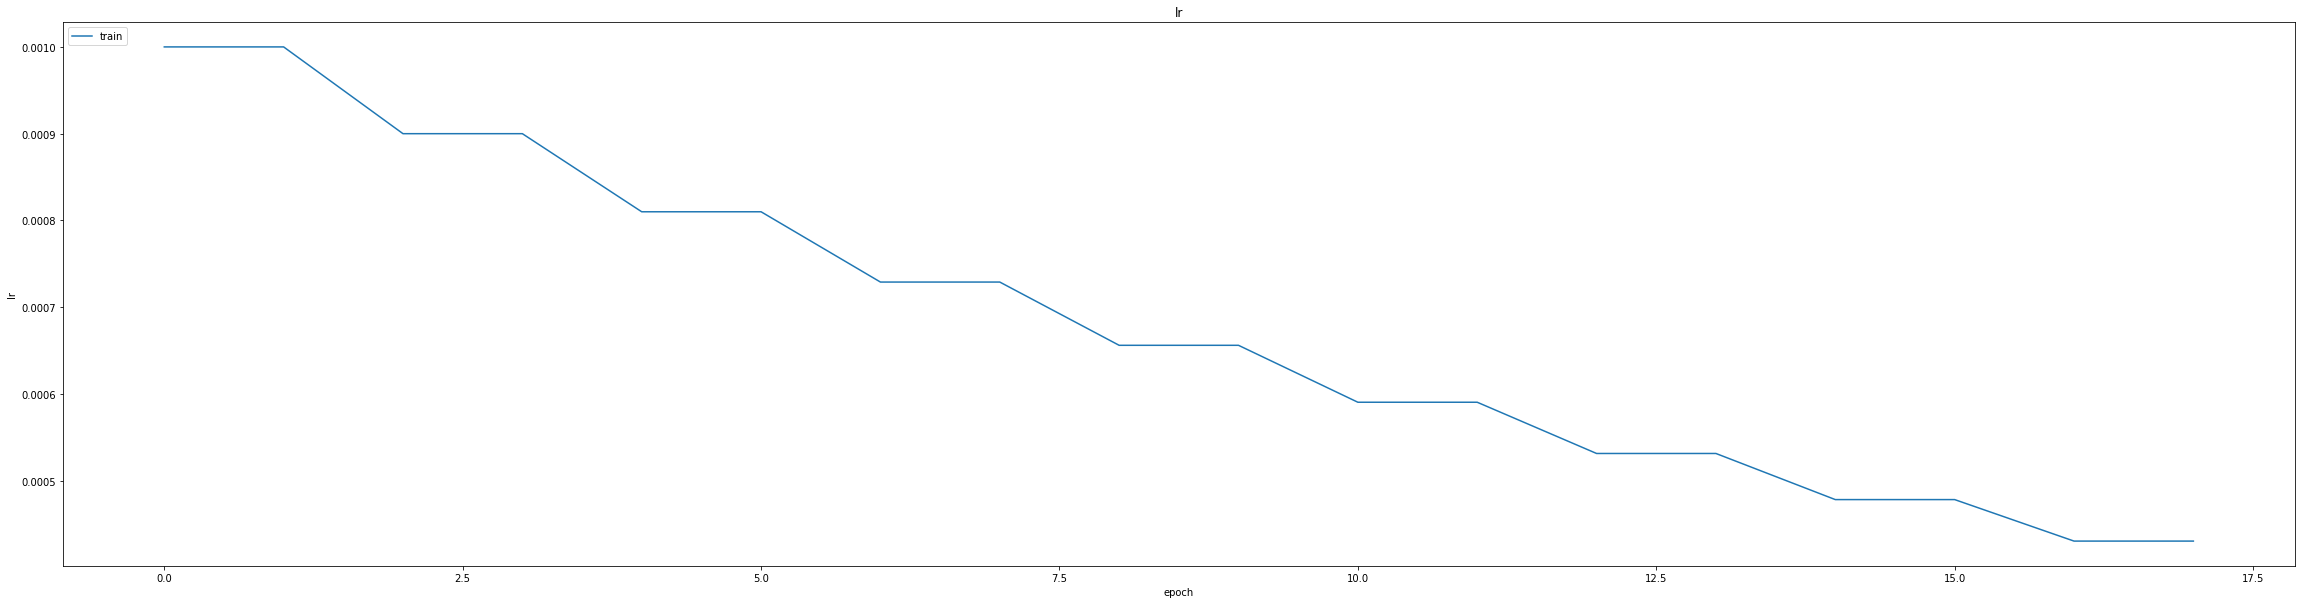

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00674964627251029
0.011299990117549896
1043/1043 [==============================] - 7s 6ms/step
0.9958198733238446


1043/1043 [==============================] - 6s 6ms/step


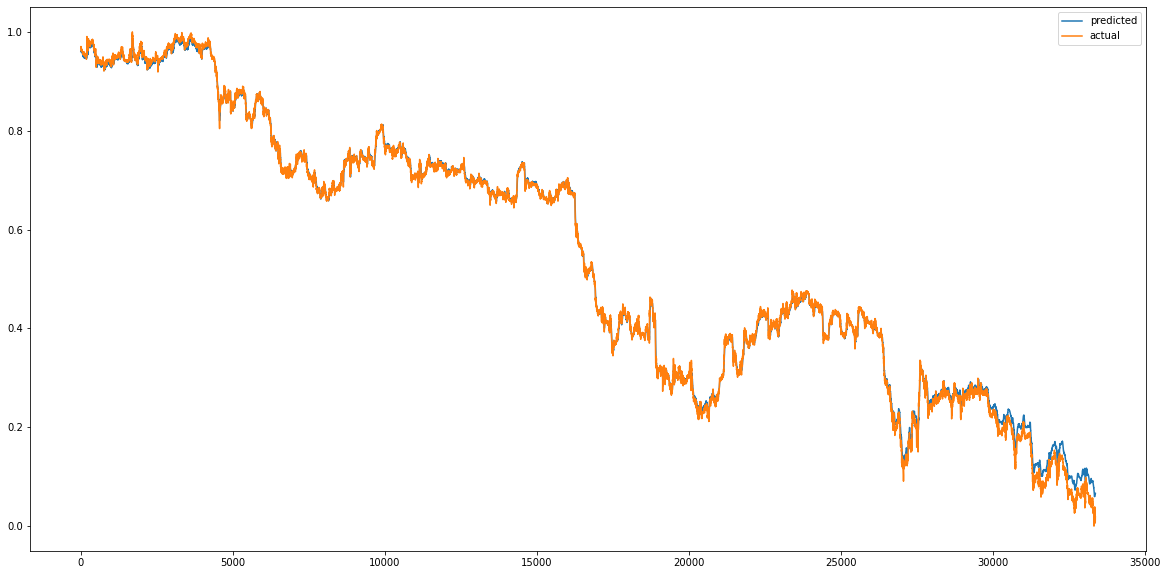

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


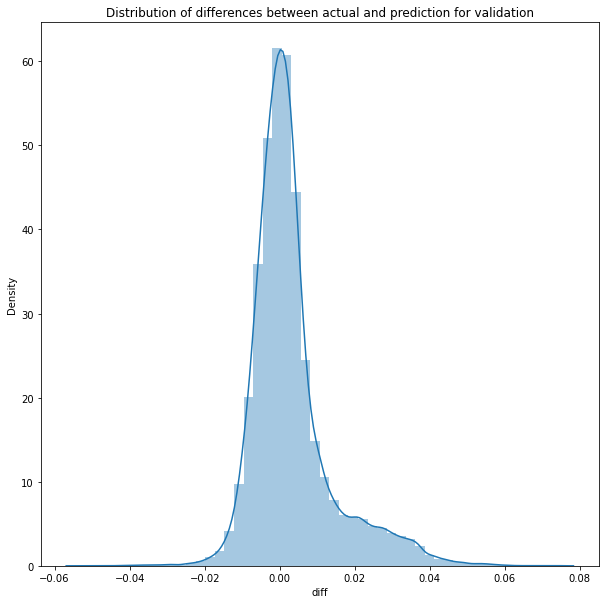

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 6s 6ms/step


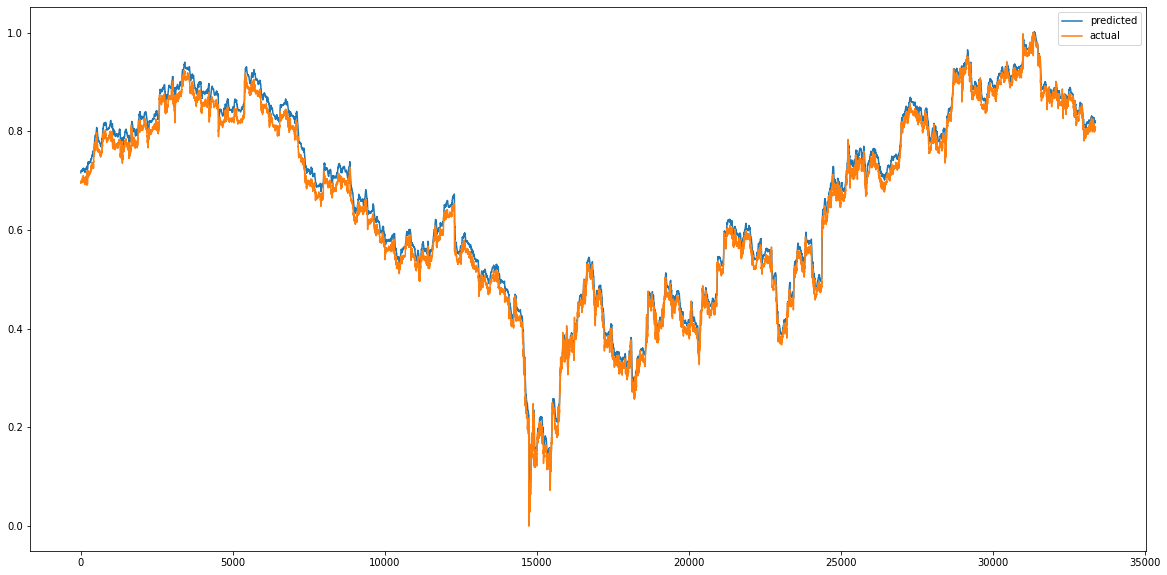

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


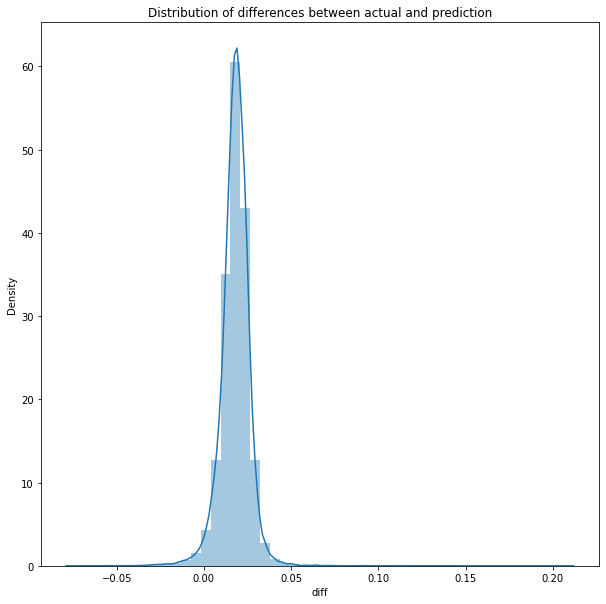

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00039140550399029215
RMSE :  0.019783970885297323
MAE :  0.018344144590247212
1043/1043 [==============================] - 6s 6ms/step
R2_Score  : 0.9900516593165386


count    33376.000000
mean         0.017948
std          0.008323
min         -0.075815
25%          0.013914
50%          0.018365
75%          0.022660
max          0.208777
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
403/405 [============================>.] - ETA: 0s - loss: 236.0835 - mae: 1.9654 - mse: 236.0834 - root_mean_squared_error: 15.3650 - mape: 3126.1404
Epoch 1: val_mse improved from inf to 0.07459, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 30s 52ms/step - loss: 235.0460 - mae: 1.9577 - mse: 235.0459 - root_mean_squared_error: 15.3312 - mape: 3112.5530 - val_loss: 0.0746 - val_mae: 0.2450 - val_mse: 0.0746 - val_root_mean_squared_error: 0.2731 - val_mape: 15893.7793
Epoch 2/60
404/405 [============================>.] - ETA: 0s - loss: 0.0440 - mae: 0.1781 - mse: 0.0440 - root_mean_squared_error: 0.2098 - mape: 4272.3203
Epoch 2: val_mse did not improve from 0.07459
405/405 [==============================] - 7s 16ms/step - loss: 0.0440 - mae: 0.1781 - mse: 0.0440 - root_mean_squared_error: 0.2098 - mape: 4264.1567 - val_loss: 0.0833 - val_mae: 0.2471 - val_mse: 0.0833 - val_root_mean_squared_error: 0.2886 - val_mape: 19336.4082
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.0399 - mae: 0.1677 - mse: 0.0399 - root_mean_squared_error: 0.1998 - mape: 4535.8032
Epoch 3: val_mse did not improve from 0.07459
405/405 [==============================] - 7s 16ms/ste

405/405 [==============================] - 17s 42ms/step - loss: 0.0339 - mae: 0.1529 - mse: 0.0339 - root_mean_squared_error: 0.1840 - mape: 4043.5081 - val_loss: 0.0663 - val_mae: 0.2137 - val_mse: 0.0663 - val_root_mean_squared_error: 0.2574 - val_mape: 18148.6016
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0205 - mae: 0.1107 - mse: 0.0205 - root_mean_squared_error: 0.1431 - mape: 3872.7695
Epoch 12: val_mse improved from 0.06626 to 0.03293, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0205 - mae: 0.1107 - mse: 0.0205 - root_mean_squared_error: 0.1431 - mape: 3872.7695 - val_loss: 0.0329 - val_mae: 0.1399 - val_mse: 0.0329 - val_root_mean_squared_error: 0.1815 - val_mape: 15120.5068
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0669 - mse: 0.0083 - root_mean_squared_error: 0.0913 - mape: 3203.2312
Epoch 13: val_mse improved from 0.03293 to 0.01628, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0083 - mae: 0.0669 - mse: 0.0083 - root_mean_squared_error: 0.0913 - mape: 3203.2312 - val_loss: 0.0163 - val_mae: 0.0857 - val_mse: 0.0163 - val_root_mean_squared_error: 0.1276 - val_mape: 12578.7461
Epoch 14/60
405/405 [==============================] - ETA: 0s - loss: 0.0050 - mae: 0.0517 - mse: 0.0050 - root_mean_squared_error: 0.0706 - mape: 2508.6919
Epoch 14: val_mse improved from 0.01628 to 0.01003, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0050 - mae: 0.0517 - mse: 0.0050 - root_mean_squared_error: 0.0706 - mape: 2508.6919 - val_loss: 0.0100 - val_mae: 0.0628 - val_mse: 0.0100 - val_root_mean_squared_error: 0.1001 - val_mape: 11110.3652
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0453 - mse: 0.0038 - root_mean_squared_error: 0.0617 - mape: 2423.7327
Epoch 15: val_mse improved from 0.01003 to 0.00765, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0038 - mae: 0.0453 - mse: 0.0038 - root_mean_squared_error: 0.0617 - mape: 2419.0906 - val_loss: 0.0076 - val_mae: 0.0548 - val_mse: 0.0076 - val_root_mean_squared_error: 0.0875 - val_mape: 10282.9482
Epoch 16/60
402/405 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0415 - mse: 0.0032 - root_mean_squared_error: 0.0564 - mape: 2218.8574
Epoch 16: val_mse improved from 0.00765 to 0.00644, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0032 - mae: 0.0415 - mse: 0.0032 - root_mean_squared_error: 0.0564 - mape: 2203.6929 - val_loss: 0.0064 - val_mae: 0.0534 - val_mse: 0.0064 - val_root_mean_squared_error: 0.0802 - val_mape: 9721.9648
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0380 - mse: 0.0027 - root_mean_squared_error: 0.0517 - mape: 2001.4365
Epoch 17: val_mse improved from 0.00644 to 0.00510, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0027 - mae: 0.0380 - mse: 0.0027 - root_mean_squared_error: 0.0517 - mape: 2001.4365 - val_loss: 0.0051 - val_mae: 0.0448 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0714 - val_mape: 9166.0195
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0349 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 1831.9113
Epoch 18: val_mse improved from 0.00510 to 0.00439, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0023 - mae: 0.0349 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 1831.9113 - val_loss: 0.0044 - val_mae: 0.0414 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0663 - val_mape: 8715.7119
Epoch 19/60
403/405 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0317 - mse: 0.0019 - root_mean_squared_error: 0.0433 - mape: 1868.9891
Epoch 19: val_mse improved from 0.00439 to 0.00365, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0019 - mae: 0.0317 - mse: 0.0019 - root_mean_squared_error: 0.0433 - mape: 1860.8025 - val_loss: 0.0036 - val_mae: 0.0397 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0604 - val_mape: 8288.0088
Epoch 20/60
405/405 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0287 - mse: 0.0016 - root_mean_squared_error: 0.0395 - mape: 1728.3341
Epoch 20: val_mse improved from 0.00365 to 0.00281, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0016 - mae: 0.0287 - mse: 0.0016 - root_mean_squared_error: 0.0395 - mape: 1728.3341 - val_loss: 0.0028 - val_mae: 0.0291 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0530 - val_mape: 7806.2637
Epoch 21/60
405/405 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0272 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 1484.8265
Epoch 21: val_mse improved from 0.00281 to 0.00229, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0014 - mae: 0.0272 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 1484.8265 - val_loss: 0.0023 - val_mae: 0.0293 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0479 - val_mape: 7208.5098
Epoch 22/60
402/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0245 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 1742.8717
Epoch 22: val_mse improved from 0.00229 to 0.00162, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0011 - mae: 0.0245 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 1730.9435 - val_loss: 0.0016 - val_mae: 0.0228 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 6520.5195
Epoch 23/60
402/405 [============================>.] - ETA: 0s - loss: 8.8260e-04 - mae: 0.0222 - mse: 8.8260e-04 - root_mean_squared_error: 0.0297 - mape: 1354.9001
Epoch 23: val_mse improved from 0.00162 to 0.00117, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 8.8137e-04 - mae: 0.0221 - mse: 8.8137e-04 - root_mean_squared_error: 0.0297 - mape: 1345.6296 - val_loss: 0.0012 - val_mae: 0.0207 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0342 - val_mape: 5893.4082
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 7.7889e-04 - mae: 0.0211 - mse: 7.7889e-04 - root_mean_squared_error: 0.0279 - mape: 1291.7656
Epoch 24: val_mse improved from 0.00117 to 0.00110, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 7.7878e-04 - mae: 0.0211 - mse: 7.7878e-04 - root_mean_squared_error: 0.0279 - mape: 1289.2902 - val_loss: 0.0011 - val_mae: 0.0247 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 5400.8628
Epoch 25/60
402/405 [============================>.] - ETA: 0s - loss: 6.0250e-04 - mae: 0.0186 - mse: 6.0250e-04 - root_mean_squared_error: 0.0245 - mape: 992.4280 
Epoch 25: val_mse improved from 0.00110 to 0.00064, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 6.0350e-04 - mae: 0.0186 - mse: 6.0350e-04 - root_mean_squared_error: 0.0246 - mape: 985.6558 - val_loss: 6.4444e-04 - val_mae: 0.0147 - val_mse: 6.4444e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 4931.5742
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 5.3117e-04 - mae: 0.0175 - mse: 5.3117e-04 - root_mean_squared_error: 0.0230 - mape: 994.8362 
Epoch 26: val_mse improved from 0.00064 to 0.00059, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 5.3117e-04 - mae: 0.0175 - mse: 5.3117e-04 - root_mean_squared_error: 0.0230 - mape: 994.8362 - val_loss: 5.9285e-04 - val_mae: 0.0166 - val_mse: 5.9285e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 4556.7749
Epoch 27/60
404/405 [============================>.] - ETA: 0s - loss: 4.6497e-04 - mae: 0.0166 - mse: 4.6497e-04 - root_mean_squared_error: 0.0216 - mape: 977.1530
Epoch 27: val_mse did not improve from 0.00059
405/405 [==============================] - 7s 17ms/step - loss: 4.6488e-04 - mae: 0.0166 - mse: 4.6488e-04 - root_mean_squared_error: 0.0216 - mape: 975.2800 - val_loss: 6.4055e-04 - val_mae: 0.0201 - val_mse: 6.4055e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 4221.7290
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 4.2897e-04 - mae: 0.0160 - mse: 4.2897e-04 - root_mean_squared_error: 0.0207 - mape: 827.2677
Epoch 28: val_mse improved from 0.00059 to 0.00039, saving m

405/405 [==============================] - 17s 43ms/step - loss: 4.3114e-04 - mae: 0.0160 - mse: 4.3114e-04 - root_mean_squared_error: 0.0208 - mape: 823.6564 - val_loss: 3.9144e-04 - val_mae: 0.0135 - val_mse: 3.9144e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 3943.5596
Epoch 29/60
402/405 [============================>.] - ETA: 0s - loss: 3.5954e-04 - mae: 0.0147 - mse: 3.5954e-04 - root_mean_squared_error: 0.0190 - mape: 813.7131
Epoch 29: val_mse improved from 0.00039 to 0.00033, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 3.5877e-04 - mae: 0.0147 - mse: 3.5877e-04 - root_mean_squared_error: 0.0189 - mape: 808.1638 - val_loss: 3.3380e-04 - val_mae: 0.0128 - val_mse: 3.3380e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 3705.6121
Epoch 30/60
404/405 [============================>.] - ETA: 0s - loss: 3.5380e-04 - mae: 0.0147 - mse: 3.5380e-04 - root_mean_squared_error: 0.0188 - mape: 811.5189
Epoch 30: val_mse improved from 0.00033 to 0.00031, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 3.5400e-04 - mae: 0.0147 - mse: 3.5400e-04 - root_mean_squared_error: 0.0188 - mape: 809.9813 - val_loss: 3.1389e-04 - val_mae: 0.0133 - val_mse: 3.1389e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 3496.1204
Epoch 31/60
403/405 [============================>.] - ETA: 0s - loss: 3.2360e-04 - mae: 0.0141 - mse: 3.2360e-04 - root_mean_squared_error: 0.0180 - mape: 708.0596
Epoch 31: val_mse did not improve from 0.00031
405/405 [==============================] - 7s 17ms/step - loss: 3.2337e-04 - mae: 0.0141 - mse: 3.2337e-04 - root_mean_squared_error: 0.0180 - mape: 704.9728 - val_loss: 3.4426e-04 - val_mae: 0.0143 - val_mse: 3.4426e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 3344.5964
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 2.8912e-04 - mae: 0.0133 - mse: 2.8912e-04 - root_mean_squared_error: 0.0170 - mape: 693.3923
Epoch 32: val_mse improved from 0.00031 to 0.00026, saving m

405/405 [==============================] - 17s 42ms/step - loss: 2.8892e-04 - mae: 0.0133 - mse: 2.8892e-04 - root_mean_squared_error: 0.0170 - mape: 692.0623 - val_loss: 2.5902e-04 - val_mae: 0.0120 - val_mse: 2.5902e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 3166.9758
Epoch 33/60
404/405 [============================>.] - ETA: 0s - loss: 2.6876e-04 - mae: 0.0129 - mse: 2.6876e-04 - root_mean_squared_error: 0.0164 - mape: 704.9857
Epoch 33: val_mse did not improve from 0.00026
405/405 [==============================] - 7s 17ms/step - loss: 2.6858e-04 - mae: 0.0129 - mse: 2.6858e-04 - root_mean_squared_error: 0.0164 - mape: 703.6326 - val_loss: 3.3948e-04 - val_mae: 0.0153 - val_mse: 3.3948e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 3002.7695
Epoch 34/60
404/405 [============================>.] - ETA: 0s - loss: 2.3077e-04 - mae: 0.0119 - mse: 2.3077e-04 - root_mean_squared_error: 0.0152 - mape: 776.6459
Epoch 34: val_mse did not improve from 0.00026
405/405 [====

405/405 [==============================] - 17s 42ms/step - loss: 2.4971e-04 - mae: 0.0123 - mse: 2.4971e-04 - root_mean_squared_error: 0.0158 - mape: 659.1158 - val_loss: 1.7738e-04 - val_mae: 0.0105 - val_mse: 1.7738e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 2764.9233
Epoch 36/60
403/405 [============================>.] - ETA: 0s - loss: 2.0832e-04 - mae: 0.0114 - mse: 2.0832e-04 - root_mean_squared_error: 0.0144 - mape: 597.9275
Epoch 36: val_mse did not improve from 0.00018
405/405 [==============================] - 7s 17ms/step - loss: 2.0927e-04 - mae: 0.0114 - mse: 2.0927e-04 - root_mean_squared_error: 0.0145 - mape: 595.3132 - val_loss: 8.4975e-04 - val_mae: 0.0272 - val_mse: 8.4975e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 2605.7583
Epoch 37/60
404/405 [============================>.] - ETA: 0s - loss: 1.9482e-04 - mae: 0.0110 - mse: 1.9482e-04 - root_mean_squared_error: 0.0140 - mape: 527.6512
Epoch 37: val_mse improved from 0.00018 to 0.00010, saving m

405/405 [==============================] - 17s 43ms/step - loss: 1.9486e-04 - mae: 0.0110 - mse: 1.9486e-04 - root_mean_squared_error: 0.0140 - mape: 526.6393 - val_loss: 1.0288e-04 - val_mae: 0.0070 - val_mse: 1.0288e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 2535.1765
Epoch 38/60
403/405 [============================>.] - ETA: 0s - loss: 2.0475e-04 - mae: 0.0112 - mse: 2.0475e-04 - root_mean_squared_error: 0.0143 - mape: 508.1318
Epoch 38: val_mse did not improve from 0.00010
405/405 [==============================] - 7s 17ms/step - loss: 2.0498e-04 - mae: 0.0113 - mse: 2.0498e-04 - root_mean_squared_error: 0.0143 - mape: 505.9084 - val_loss: 1.2071e-04 - val_mae: 0.0076 - val_mse: 1.2071e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 2472.9998
Epoch 39/60
405/405 [==============================] - ETA: 0s - loss: 1.6173e-04 - mae: 0.0100 - mse: 1.6173e-04 - root_mean_squared_error: 0.0127 - mape: 546.8240
Epoch 39: val_mse improved from 0.00010 to 0.00008, saving m

405/405 [==============================] - 17s 42ms/step - loss: 1.6173e-04 - mae: 0.0100 - mse: 1.6173e-04 - root_mean_squared_error: 0.0127 - mape: 546.8240 - val_loss: 8.3680e-05 - val_mae: 0.0063 - val_mse: 8.3680e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 2349.9771
Epoch 40/60
404/405 [============================>.] - ETA: 0s - loss: 1.7726e-04 - mae: 0.0105 - mse: 1.7726e-04 - root_mean_squared_error: 0.0133 - mape: 457.4745
Epoch 40: val_mse did not improve from 0.00008
405/405 [==============================] - 7s 17ms/step - loss: 1.7731e-04 - mae: 0.0105 - mse: 1.7731e-04 - root_mean_squared_error: 0.0133 - mape: 456.5984 - val_loss: 1.2996e-04 - val_mae: 0.0079 - val_mse: 1.2996e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 2261.6116
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 1.5718e-04 - mae: 0.0099 - mse: 1.5718e-04 - root_mean_squared_error: 0.0125 - mape: 480.7490
Epoch 41: val_mse did not improve from 0.00008
405/405 [====

405/405 [==============================] - 17s 42ms/step - loss: 1.2681e-04 - mae: 0.0090 - mse: 1.2681e-04 - root_mean_squared_error: 0.0113 - mape: 381.2156 - val_loss: 8.0706e-05 - val_mae: 0.0061 - val_mse: 8.0706e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 1949.4933
Epoch 51/60
405/405 [==============================] - ETA: 0s - loss: 1.1558e-04 - mae: 0.0086 - mse: 1.1558e-04 - root_mean_squared_error: 0.0108 - mape: 350.2355
Epoch 51: val_mse did not improve from 0.00008
405/405 [==============================] - 7s 17ms/step - loss: 1.1558e-04 - mae: 0.0086 - mse: 1.1558e-04 - root_mean_squared_error: 0.0108 - mape: 350.2355 - val_loss: 1.8682e-04 - val_mae: 0.0121 - val_mse: 1.8682e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 1680.4784
Epoch 52/60
402/405 [============================>.] - ETA: 0s - loss: 1.1671e-04 - mae: 0.0085 - mse: 1.1671e-04 - root_mean_squared_error: 0.0108 - mape: 434.1201
Epoch 52: val_mse did not improve from 0.00008
405/405 [====

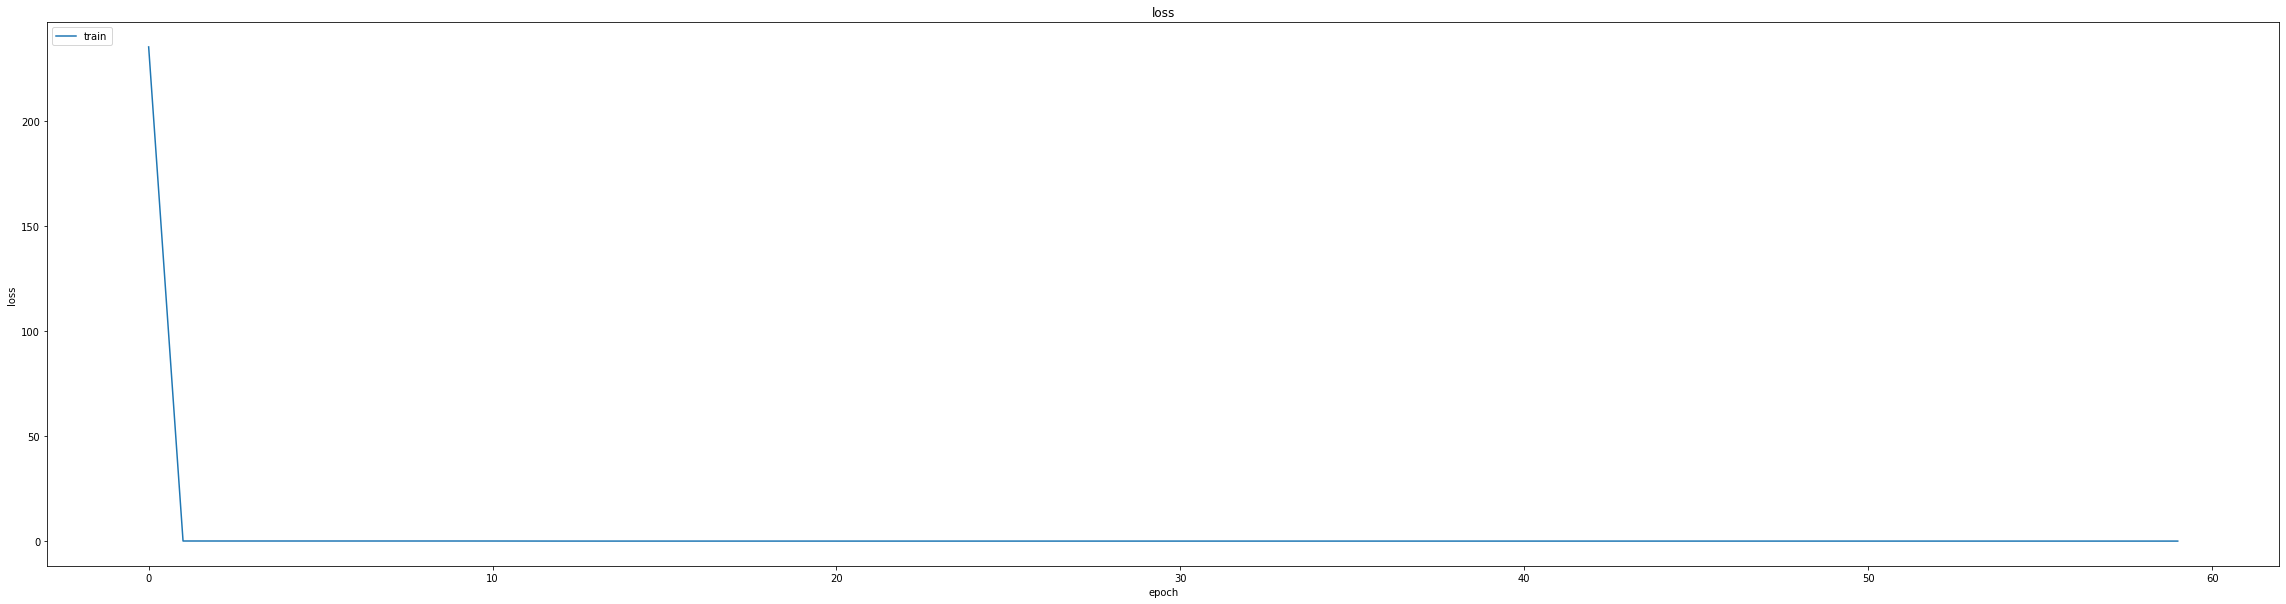

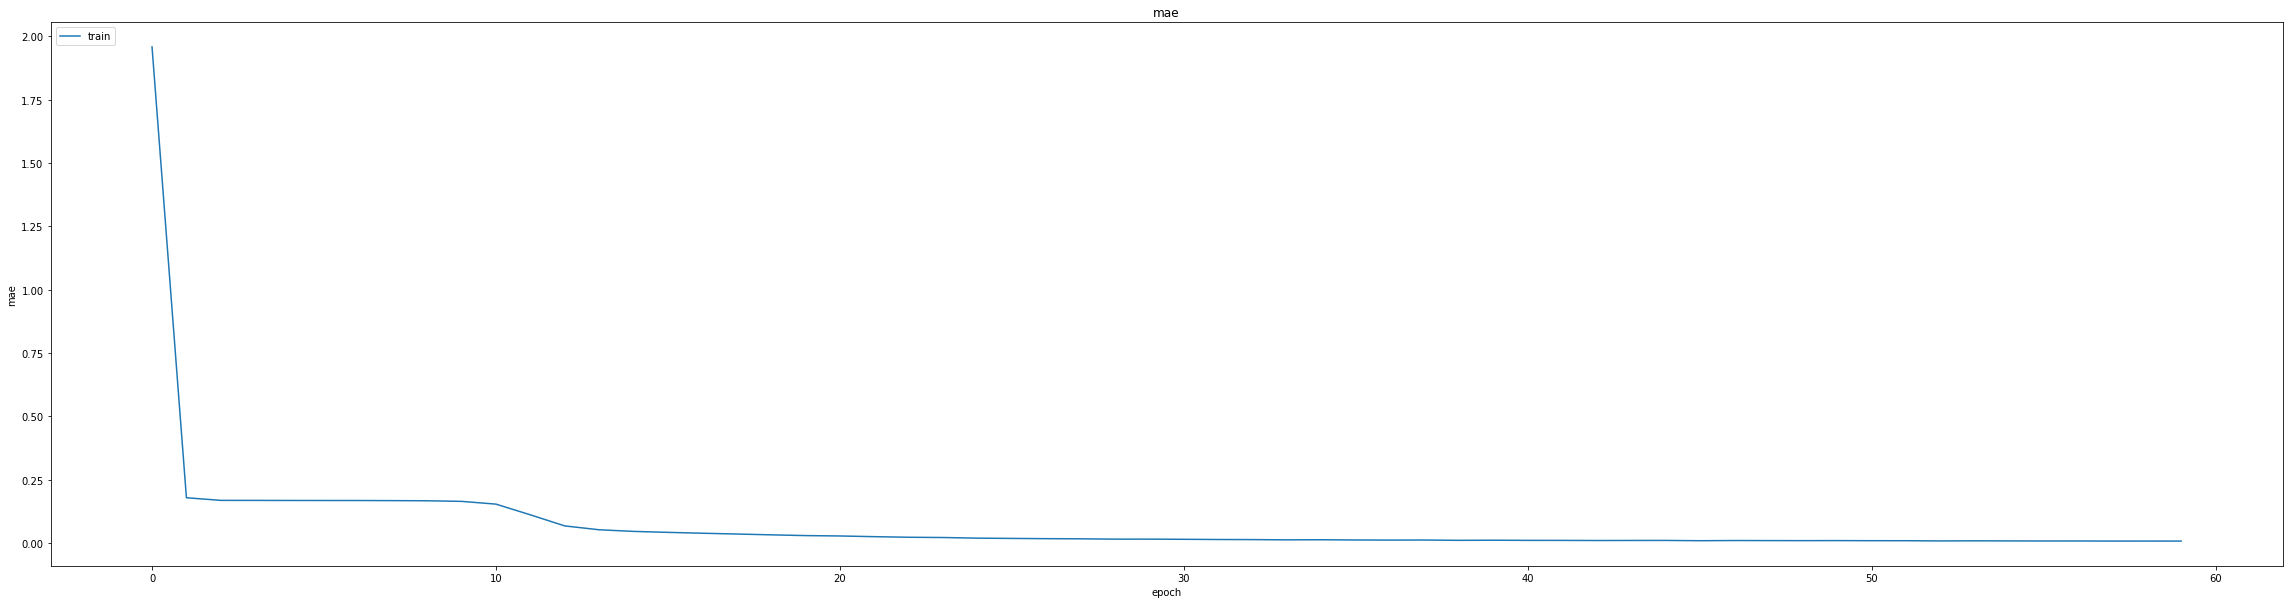

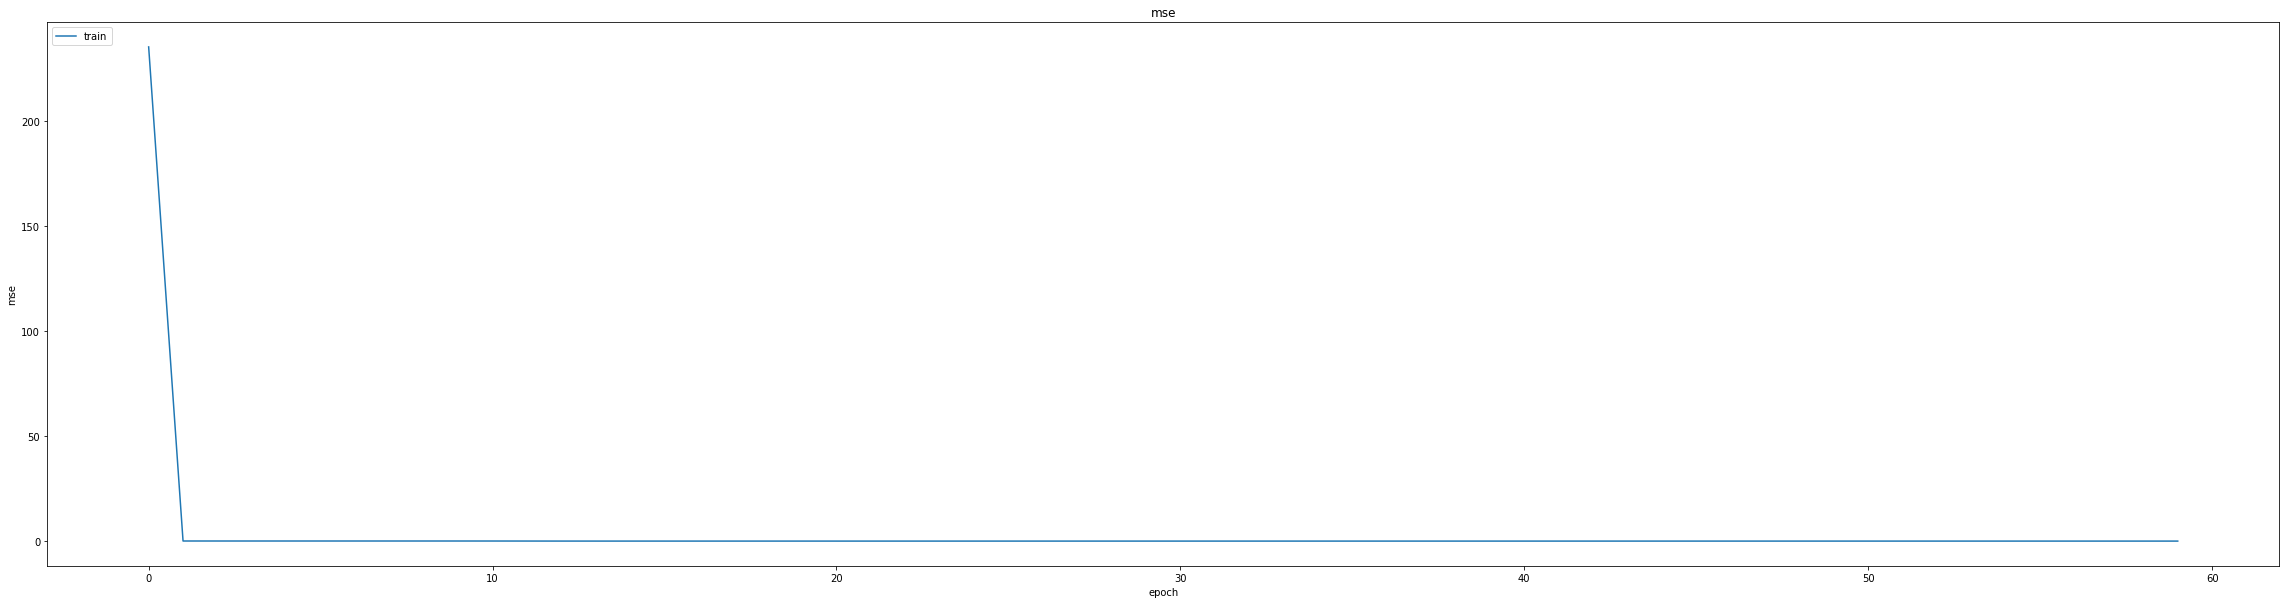

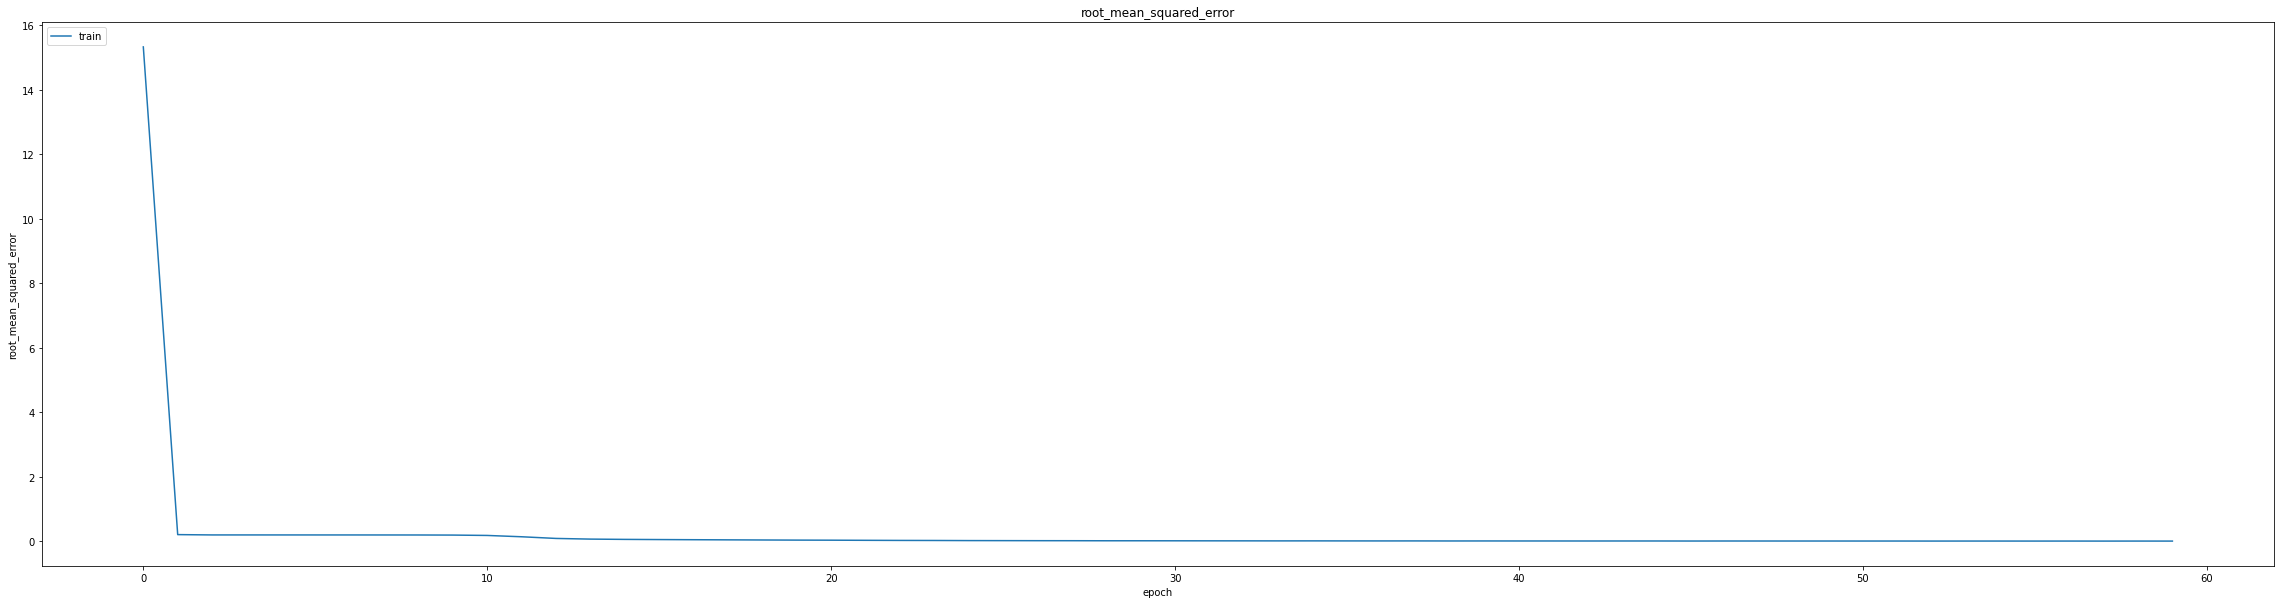

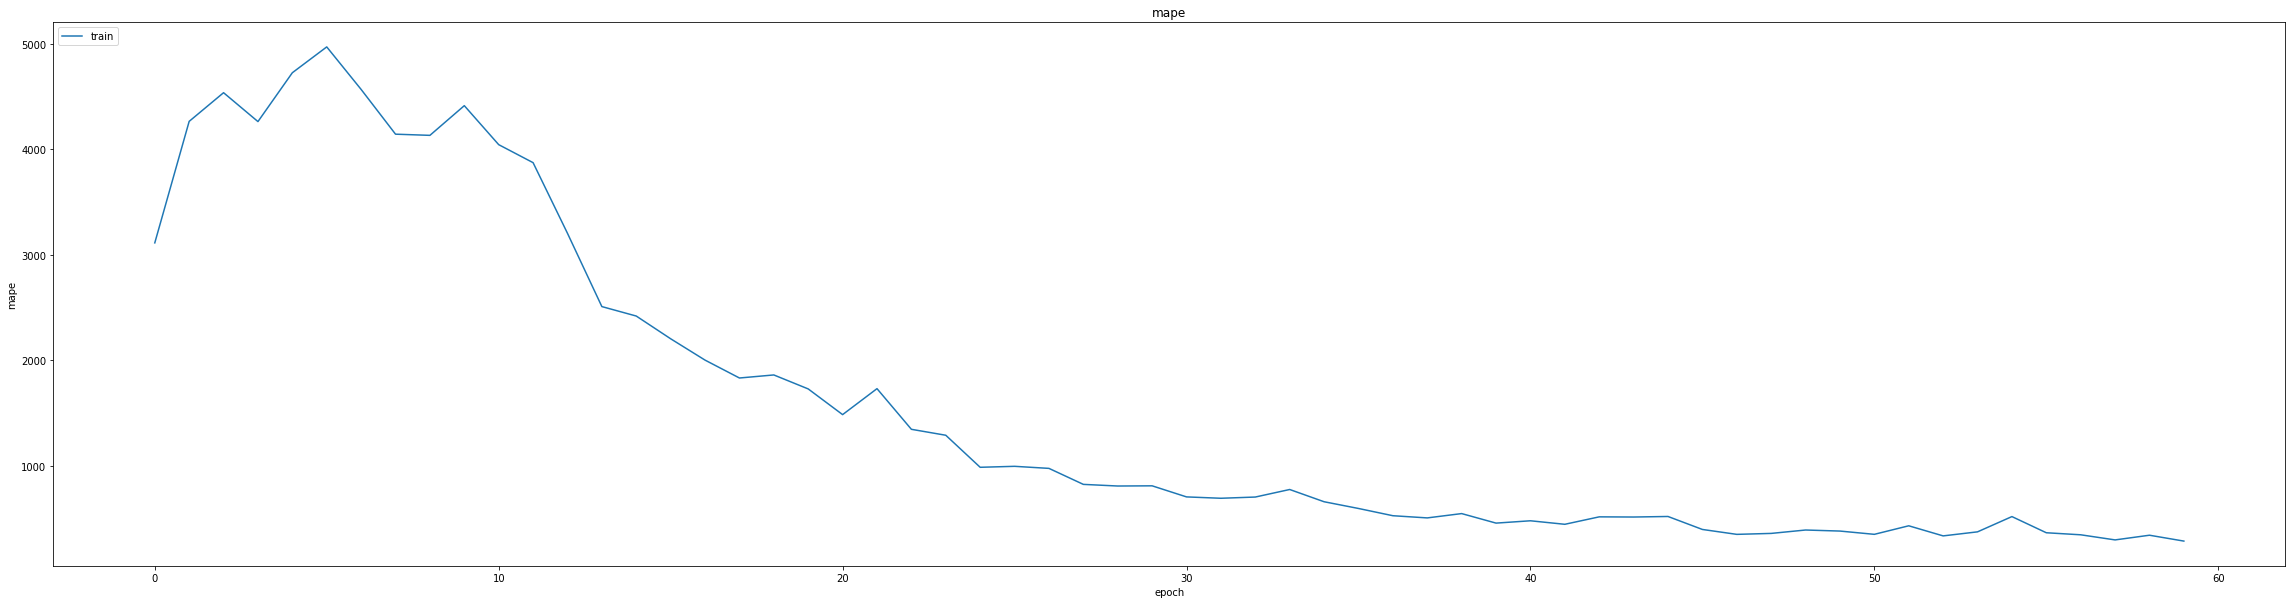

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006133522372692823
0.008983651176095009
1043/1043 [==============================] - 5s 4ms/step
0.9969707565517231


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
403/405 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0138 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 566.3251
Epoch 1: val_mse did not improve from 0.00008
405/405 [==============================] - 12s 20ms/step - loss: 0.0010 - mae: 0.0138 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 563.8408 - val_loss: 2.1920e-04 - val_mae: 0.0130 - val_mse: 2.1920e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 1960.4712 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 5.2899e-05 - mae: 0.0055 - mse: 5.2899e-05 - root_mean_squared_error: 0.0073 - mape: 376.9056
Epoch 2: val_mse did not improve from 0.00008
405/405 [==============================] - 7s 16ms/step - loss: 5.2892e-05 - mae: 0.0055 - mse: 5.2892e-05 - root_mean_squared_error: 0.0073 - mape: 376.1820 - val_loss: 1.6426e-04 - val_mae: 0.0114 - val_mse: 1.6426e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 1745.6007 - lr: 0.0010
lr chan

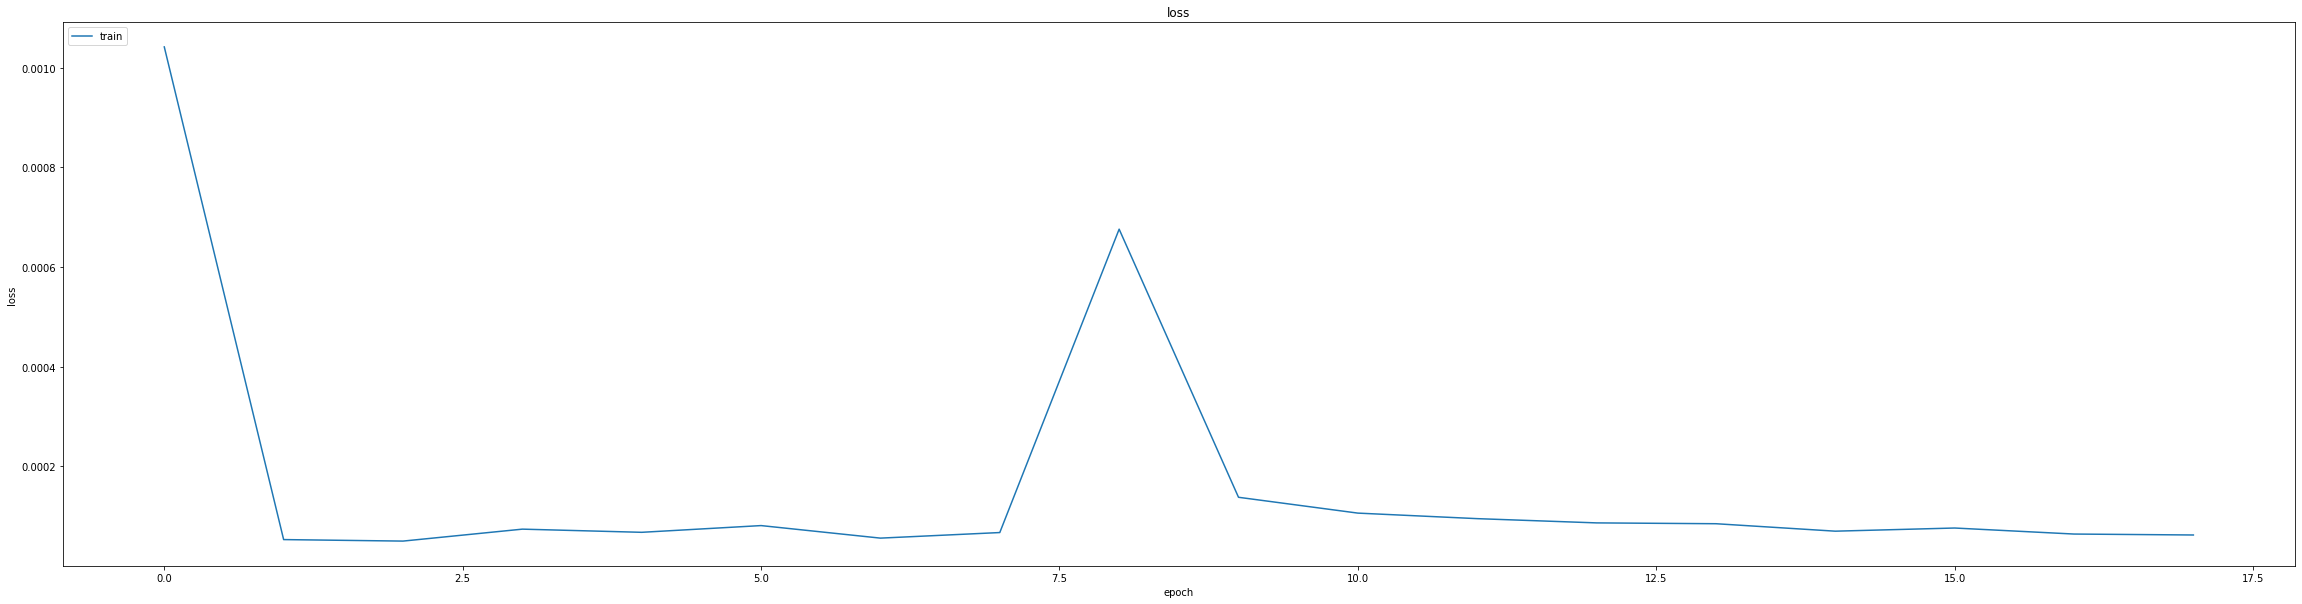

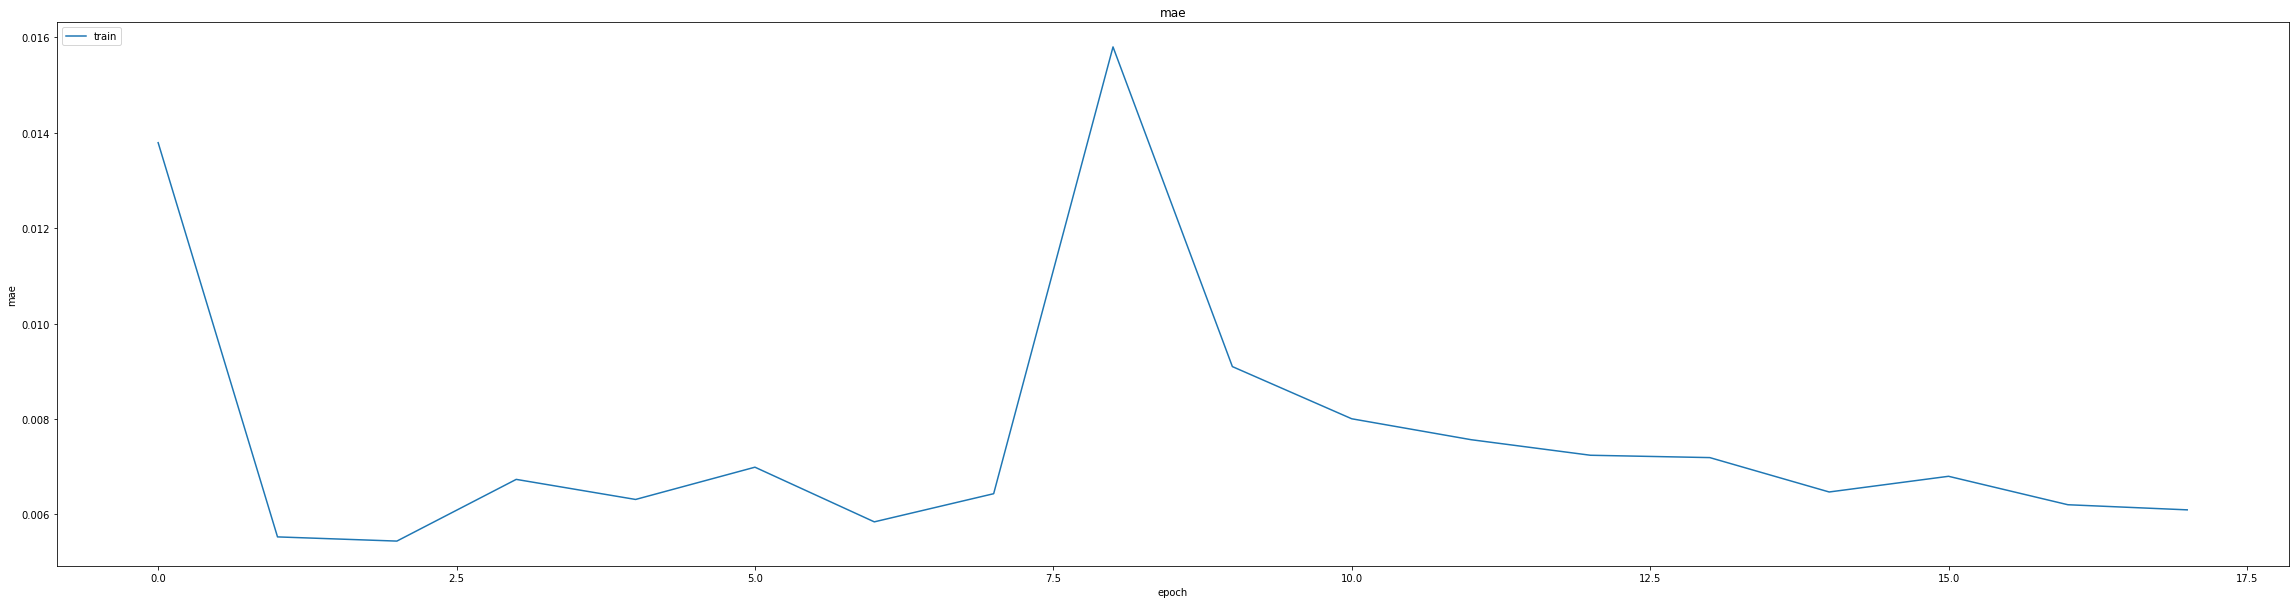

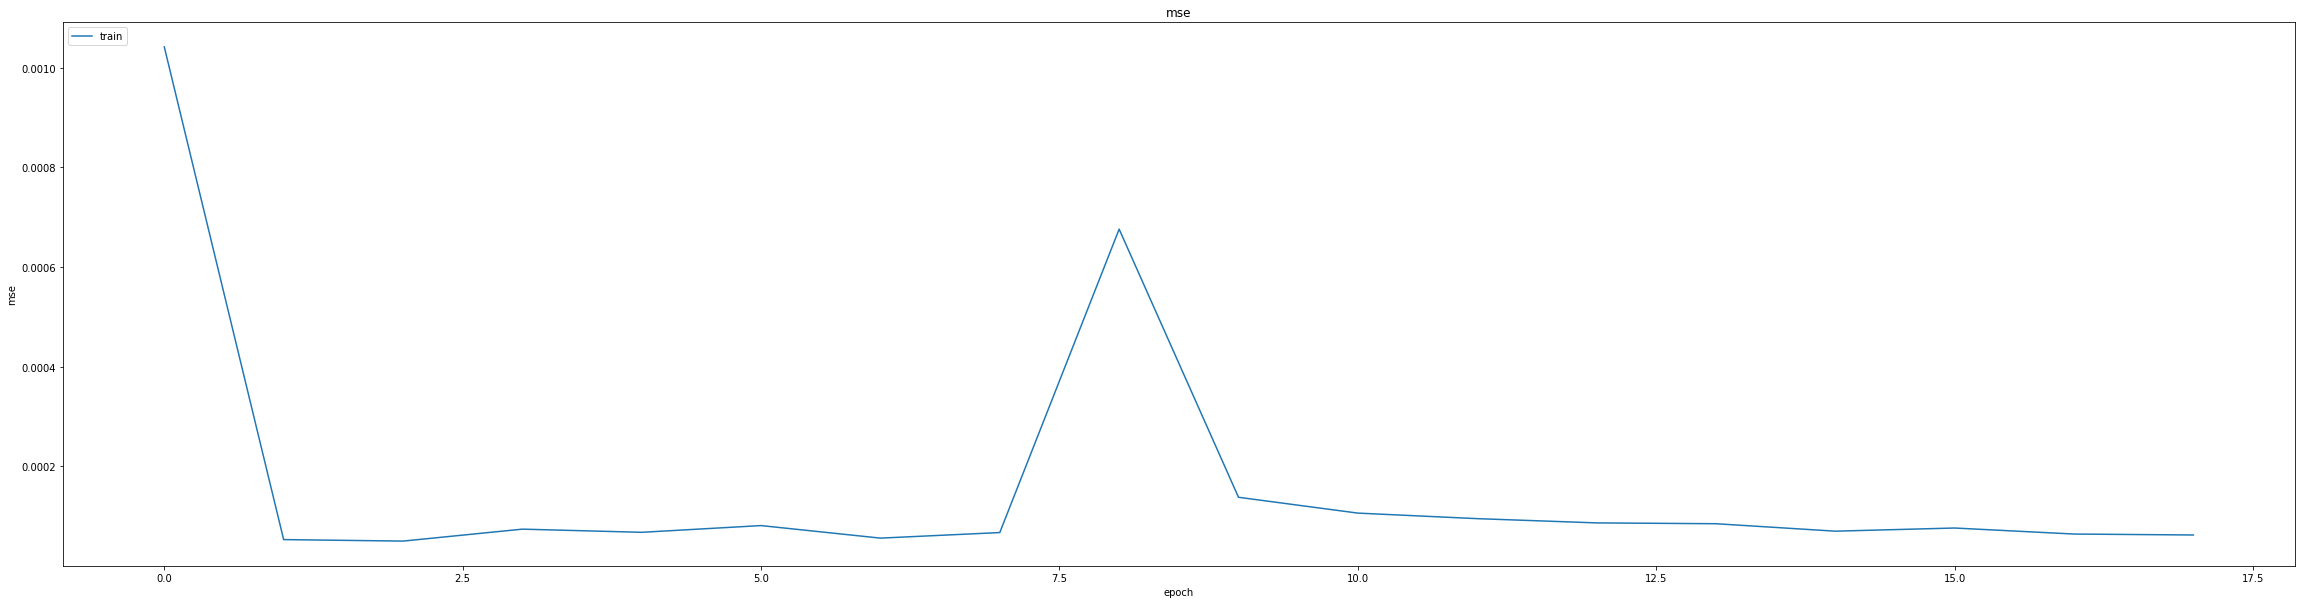

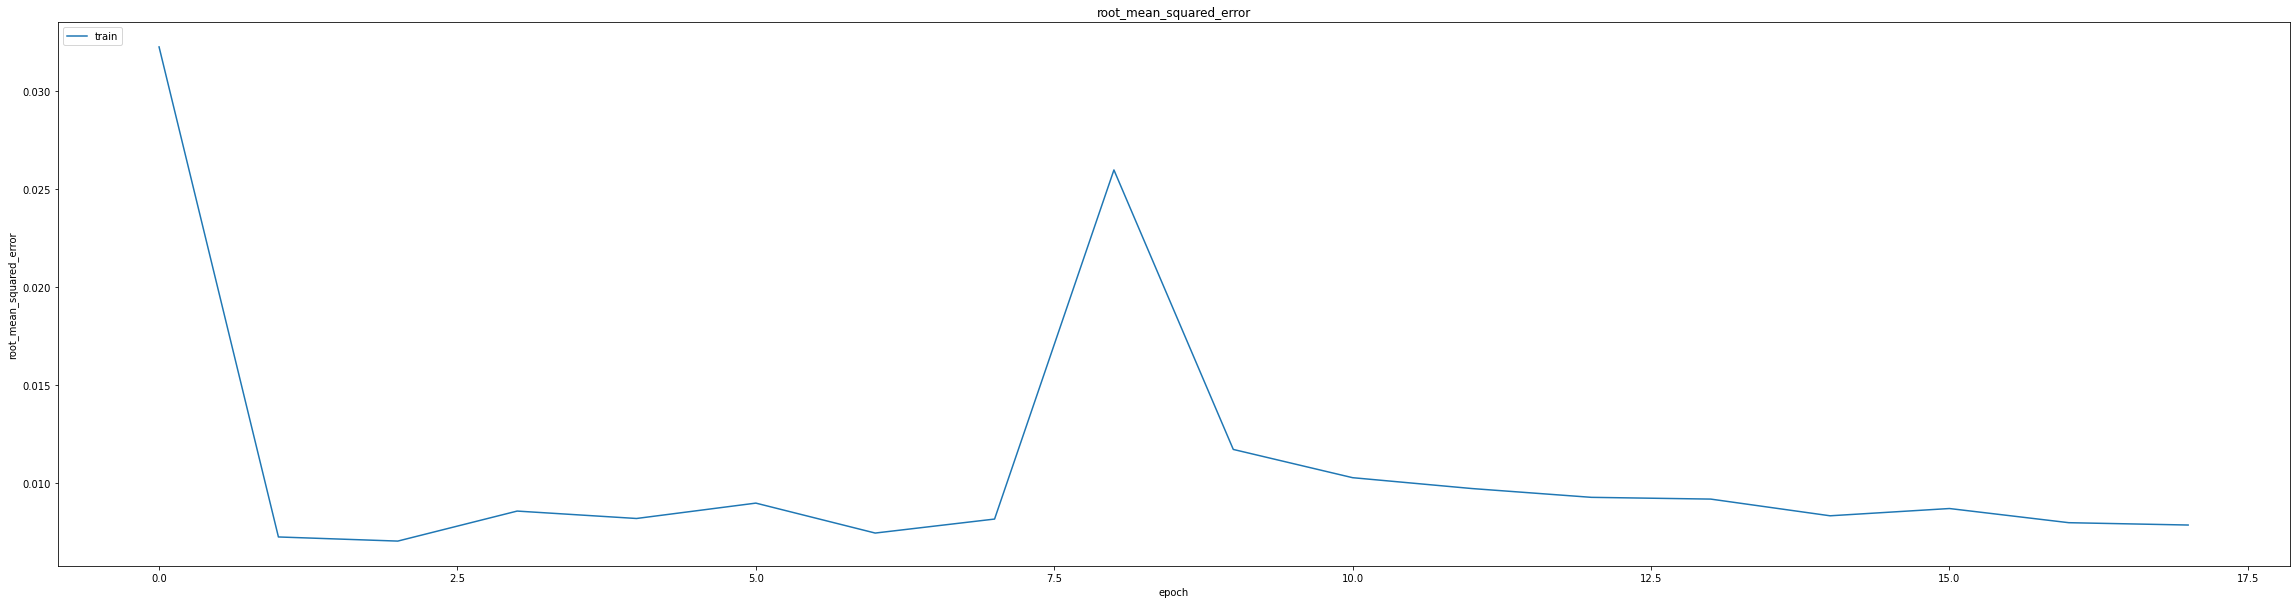

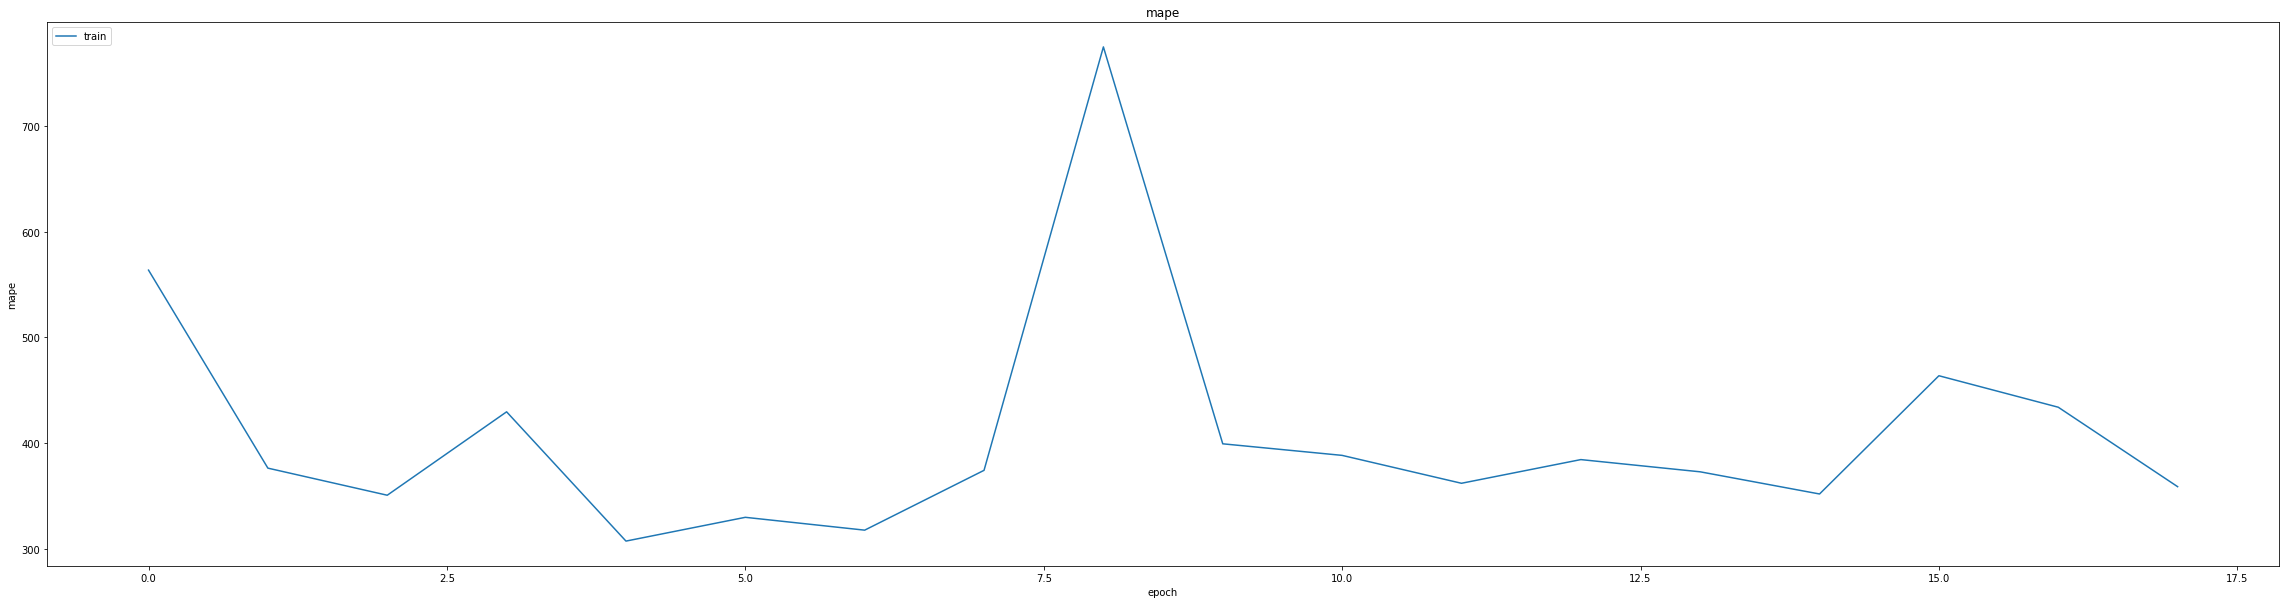

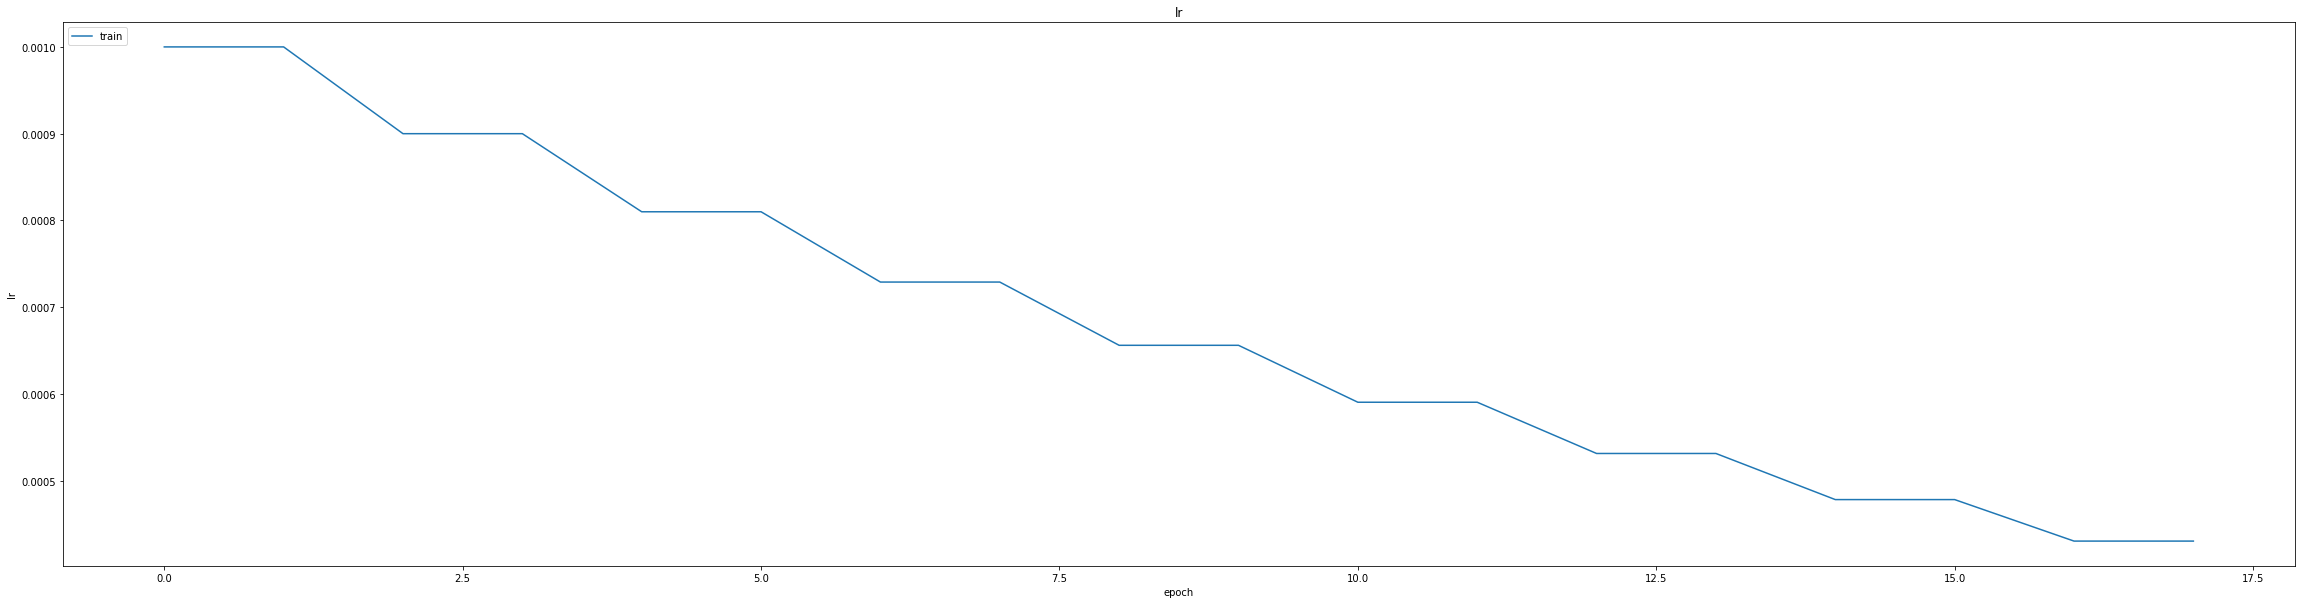

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

1043/1043 [==============================] - 4s 4ms/step


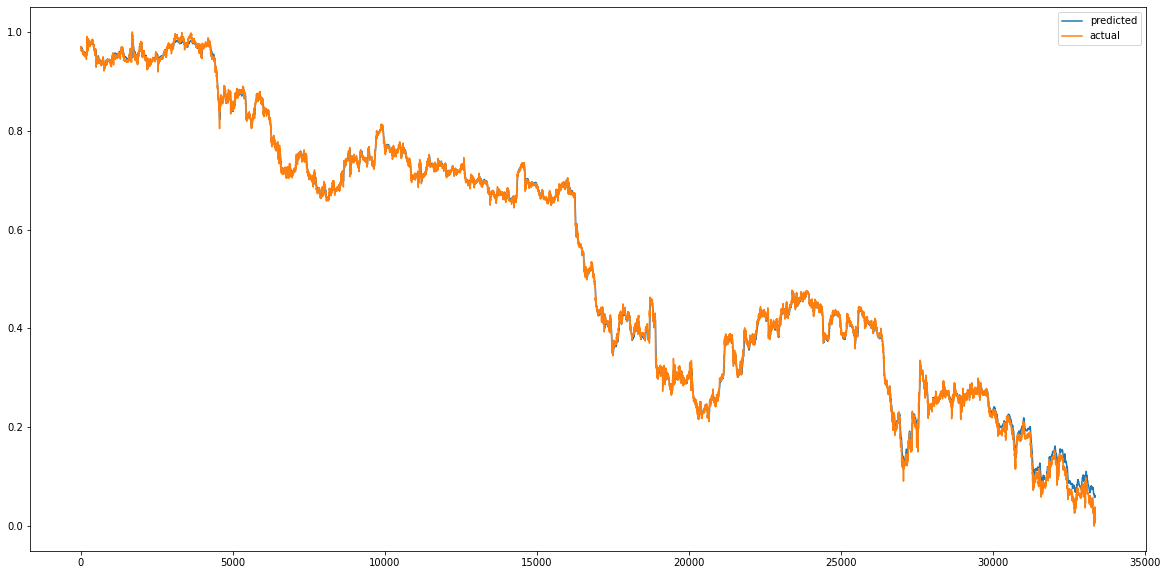

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


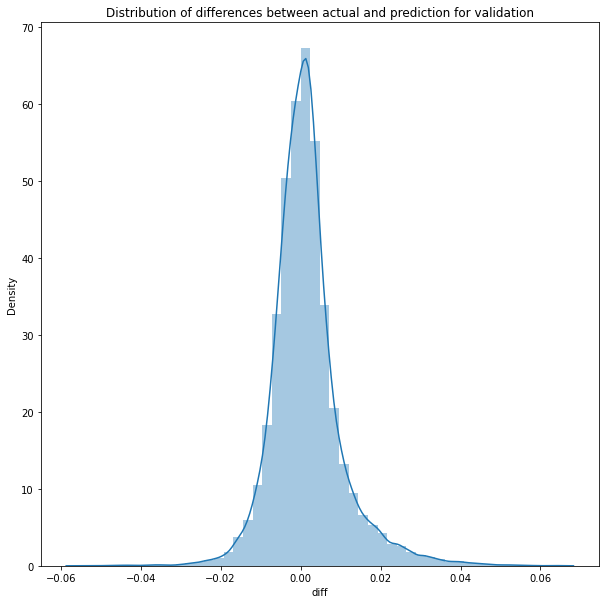

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 4s 4ms/step


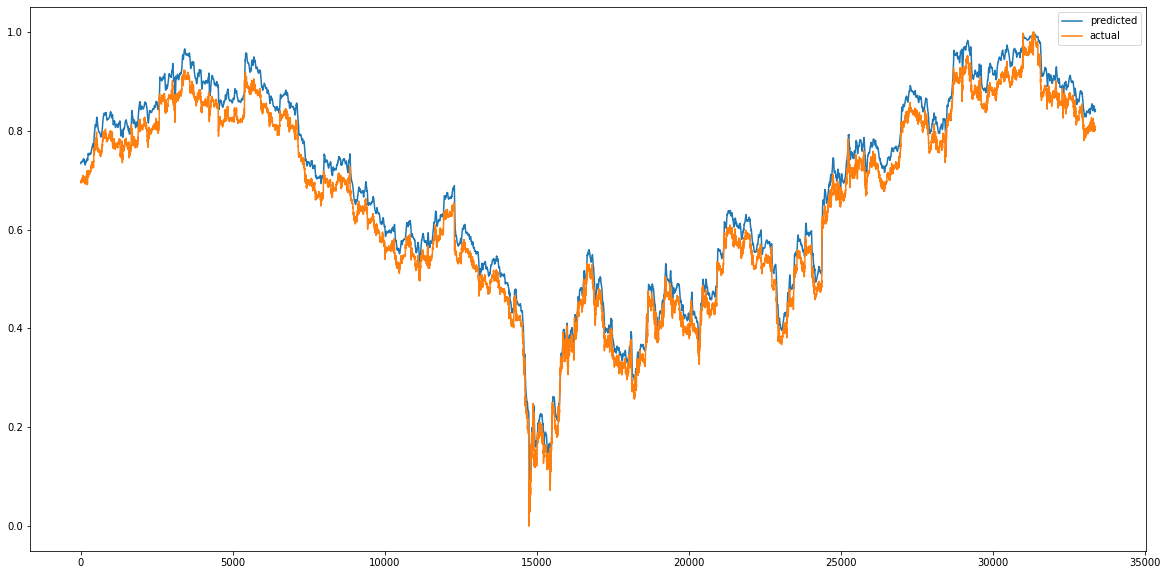

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.001335245587365744
RMSE :  0.03654101240203594
MAE :  0.03511509976384595
1043/1043 [==============================] - 4s 4ms/step
R2_Score  : 0.9660621073161877


count    33376.000000
mean         0.034910
std          0.010797
min         -0.075684
25%          0.029825
50%          0.035725
75%          0.040936
max          0.218374
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 276.2222 - mae: 2.3530 - mse: 276.2222 - root_mean_squared_error: 16.6199 - mape: 3562.7864
Epoch 1: val_mse improved from inf to 0.08136, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 46s 82ms/step - loss: 276.2222 - mae: 2.3530 - mse: 276.2222 - root_mean_squared_error: 16.6199 - mape: 3562.7864 - val_loss: 0.0814 - val_mae: 0.2564 - val_mse: 0.0814 - val_root_mean_squared_error: 0.2852 - val_mape: 17690.1680
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.0473 - mae: 0.1847 - mse: 0.0473 - root_mean_squared_error: 0.2174 - mape: 4559.6133
Epoch 2: val_mse did not improve from 0.08136
405/405 [==============================] - 8s 19ms/step - loss: 0.0473 - mae: 0.1847 - mse: 0.0473 - root_mean_squared_error: 0.2174 - mape: 4559.6133 - val_loss: 0.0909 - val_mae: 0.2573 - val_mse: 0.0909 - val_root_mean_squared_error: 0.3015 - val_mape: 20134.5801
Epoch 3/60
404/405 [============================>.] - ETA: 0s - loss: 0.0437 - mae: 0.1752 - mse: 0.0437 - root_mean_squared_error: 0.2090 - mape: 4308.0854
Epoch 3: val_mse did not improve from 0.08136
405/405 [==============================] - 8s 19ms/ste

405/405 [==============================] - 31s 76ms/step - loss: 0.0388 - mae: 0.1647 - mse: 0.0388 - root_mean_squared_error: 0.1969 - mape: 3923.4119 - val_loss: 0.0528 - val_mae: 0.1916 - val_mse: 0.0528 - val_root_mean_squared_error: 0.2299 - val_mape: 15903.0762
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0178 - mae: 0.1067 - mse: 0.0178 - root_mean_squared_error: 0.1333 - mape: 2512.3506
Epoch 5: val_mse improved from 0.05284 to 0.01918, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 74ms/step - loss: 0.0178 - mae: 0.1066 - mse: 0.0178 - root_mean_squared_error: 0.1333 - mape: 2507.5447 - val_loss: 0.0192 - val_mae: 0.1095 - val_mse: 0.0192 - val_root_mean_squared_error: 0.1385 - val_mape: 11580.5010
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0058 - mae: 0.0561 - mse: 0.0058 - root_mean_squared_error: 0.0763 - mape: 2365.3291
Epoch 6: val_mse improved from 0.01918 to 0.01098, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0058 - mae: 0.0561 - mse: 0.0058 - root_mean_squared_error: 0.0763 - mape: 2365.3291 - val_loss: 0.0110 - val_mae: 0.0848 - val_mse: 0.0110 - val_root_mean_squared_error: 0.1048 - val_mape: 9930.6055
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0416 - mse: 0.0032 - root_mean_squared_error: 0.0567 - mape: 2146.4475
Epoch 7: val_mse improved from 0.01098 to 0.00743, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 0.0032 - mae: 0.0415 - mse: 0.0032 - root_mean_squared_error: 0.0567 - mape: 2142.3345 - val_loss: 0.0074 - val_mae: 0.0693 - val_mse: 0.0074 - val_root_mean_squared_error: 0.0862 - val_mape: 8928.8203
Epoch 8/60
403/405 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0378 - mse: 0.0026 - root_mean_squared_error: 0.0512 - mape: 1898.6256
Epoch 8: val_mse improved from 0.00743 to 0.00670, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0026 - mae: 0.0378 - mse: 0.0026 - root_mean_squared_error: 0.0511 - mape: 1890.3234 - val_loss: 0.0067 - val_mae: 0.0689 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0819 - val_mape: 8336.6172
Epoch 9/60
404/405 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0353 - mse: 0.0023 - root_mean_squared_error: 0.0478 - mape: 1979.4218
Epoch 9: val_mse improved from 0.00670 to 0.00621, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0023 - mae: 0.0353 - mse: 0.0023 - root_mean_squared_error: 0.0478 - mape: 1975.6244 - val_loss: 0.0062 - val_mae: 0.0672 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0788 - val_mape: 7967.1729
Epoch 10/60
404/405 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0338 - mse: 0.0021 - root_mean_squared_error: 0.0457 - mape: 1690.3350
Epoch 10: val_mse improved from 0.00621 to 0.00577, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 0.0021 - mae: 0.0339 - mse: 0.0021 - root_mean_squared_error: 0.0457 - mape: 1687.1023 - val_loss: 0.0058 - val_mae: 0.0651 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0760 - val_mape: 7672.9565
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0326 - mse: 0.0019 - root_mean_squared_error: 0.0441 - mape: 1808.7815
Epoch 11: val_mse improved from 0.00577 to 0.00487, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0019 - mae: 0.0326 - mse: 0.0019 - root_mean_squared_error: 0.0441 - mape: 1808.7815 - val_loss: 0.0049 - val_mae: 0.0592 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0698 - val_mape: 7405.3057
Epoch 12/60
404/405 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0314 - mse: 0.0018 - root_mean_squared_error: 0.0424 - mape: 1521.8522
Epoch 12: val_mse improved from 0.00487 to 0.00447, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 0.0018 - mae: 0.0314 - mse: 0.0018 - root_mean_squared_error: 0.0424 - mape: 1518.9349 - val_loss: 0.0045 - val_mae: 0.0570 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0669 - val_mape: 7202.9863
Epoch 13/60
404/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0298 - mse: 0.0016 - root_mean_squared_error: 0.0404 - mape: 1662.3640
Epoch 13: val_mse improved from 0.00447 to 0.00429, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0016 - mae: 0.0298 - mse: 0.0016 - root_mean_squared_error: 0.0404 - mape: 1659.1735 - val_loss: 0.0043 - val_mae: 0.0560 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0655 - val_mape: 7117.9043
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0283 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 1664.7094
Epoch 14: val_mse improved from 0.00429 to 0.00413, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 0.0015 - mae: 0.0283 - mse: 0.0015 - root_mean_squared_error: 0.0385 - mape: 1661.5173 - val_loss: 0.0041 - val_mae: 0.0554 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0643 - val_mape: 6924.2793
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0270 - mse: 0.0013 - root_mean_squared_error: 0.0366 - mape: 1541.5042
Epoch 15: val_mse improved from 0.00413 to 0.00394, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0013 - mae: 0.0270 - mse: 0.0013 - root_mean_squared_error: 0.0366 - mape: 1538.5497 - val_loss: 0.0039 - val_mae: 0.0545 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0628 - val_mape: 6688.2637
Epoch 16/60
404/405 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0255 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 1396.8672
Epoch 16: val_mse improved from 0.00394 to 0.00312, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 0.0012 - mae: 0.0254 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 1394.1853 - val_loss: 0.0031 - val_mae: 0.0476 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0559 - val_mape: 6342.0474
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0236 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 1322.2632
Epoch 17: val_mse improved from 0.00312 to 0.00301, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 0.0010 - mae: 0.0236 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 1322.2632 - val_loss: 0.0030 - val_mae: 0.0477 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0549 - val_mape: 5977.0674
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 8.6601e-04 - mae: 0.0219 - mse: 8.6601e-04 - root_mean_squared_error: 0.0294 - mape: 1336.6595
Epoch 18: val_mse improved from 0.00301 to 0.00225, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 8.6601e-04 - mae: 0.0219 - mse: 8.6601e-04 - root_mean_squared_error: 0.0294 - mape: 1336.6595 - val_loss: 0.0023 - val_mae: 0.0406 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0475 - val_mape: 5603.2197
Epoch 19/60
405/405 [==============================] - ETA: 0s - loss: 7.3975e-04 - mae: 0.0203 - mse: 7.3975e-04 - root_mean_squared_error: 0.0272 - mape: 1150.7339
Epoch 19: val_mse did not improve from 0.00225
405/405 [==============================] - 8s 20ms/step - loss: 7.3975e-04 - mae: 0.0203 - mse: 7.3975e-04 - root_mean_squared_error: 0.0272 - mape: 1150.7339 - val_loss: 0.0023 - val_mae: 0.0426 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0483 - val_mape: 5241.7935
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 6.2604e-04 - mae: 0.0187 - mse: 6.2604e-04 - root_mean_squared_error: 0.0250 - mape: 1102.0935
Epoch 20: val_mse improved from 0.00225 to 0.00195, saving model to /con

405/405 [==============================] - 30s 73ms/step - loss: 6.2618e-04 - mae: 0.0187 - mse: 6.2618e-04 - root_mean_squared_error: 0.0250 - mape: 1097.2723 - val_loss: 0.0019 - val_mae: 0.0389 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0442 - val_mape: 4885.5044
Epoch 21/60
405/405 [==============================] - ETA: 0s - loss: 5.2821e-04 - mae: 0.0173 - mse: 5.2821e-04 - root_mean_squared_error: 0.0230 - mape: 1033.2190
Epoch 21: val_mse improved from 0.00195 to 0.00185, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 5.2821e-04 - mae: 0.0173 - mse: 5.2821e-04 - root_mean_squared_error: 0.0230 - mape: 1033.2190 - val_loss: 0.0019 - val_mae: 0.0383 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0430 - val_mape: 4560.1401
Epoch 22/60
404/405 [============================>.] - ETA: 0s - loss: 4.4639e-04 - mae: 0.0160 - mse: 4.4639e-04 - root_mean_squared_error: 0.0211 - mape: 1035.7615
Epoch 22: val_mse improved from 0.00185 to 0.00143, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 4.4617e-04 - mae: 0.0160 - mse: 4.4617e-04 - root_mean_squared_error: 0.0211 - mape: 1033.7721 - val_loss: 0.0014 - val_mae: 0.0335 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0378 - val_mape: 4225.9331
Epoch 23/60
402/405 [============================>.] - ETA: 0s - loss: 3.7004e-04 - mae: 0.0146 - mse: 3.7004e-04 - root_mean_squared_error: 0.0192 - mape: 897.1846
Epoch 23: val_mse improved from 0.00143 to 0.00132, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 3.6980e-04 - mae: 0.0146 - mse: 3.6980e-04 - root_mean_squared_error: 0.0192 - mape: 891.0450 - val_loss: 0.0013 - val_mae: 0.0324 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 3925.6650
Epoch 24/60
403/405 [============================>.] - ETA: 0s - loss: 3.0685e-04 - mae: 0.0134 - mse: 3.0685e-04 - root_mean_squared_error: 0.0175 - mape: 890.4507
Epoch 24: val_mse improved from 0.00132 to 0.00122, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 3.0664e-04 - mae: 0.0134 - mse: 3.0664e-04 - root_mean_squared_error: 0.0175 - mape: 886.5480 - val_loss: 0.0012 - val_mae: 0.0311 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0349 - val_mape: 3665.5706
Epoch 25/60
402/405 [============================>.] - ETA: 0s - loss: 2.5331e-04 - mae: 0.0122 - mse: 2.5331e-04 - root_mean_squared_error: 0.0159 - mape: 772.3447
Epoch 25: val_mse improved from 0.00122 to 0.00106, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 30s 73ms/step - loss: 2.5328e-04 - mae: 0.0122 - mse: 2.5328e-04 - root_mean_squared_error: 0.0159 - mape: 767.0674 - val_loss: 0.0011 - val_mae: 0.0291 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 3418.8889
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 2.0669e-04 - mae: 0.0110 - mse: 2.0669e-04 - root_mean_squared_error: 0.0144 - mape: 728.9915
Epoch 26: val_mse improved from 0.00106 to 0.00105, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 2.0669e-04 - mae: 0.0110 - mse: 2.0669e-04 - root_mean_squared_error: 0.0144 - mape: 728.9915 - val_loss: 0.0011 - val_mae: 0.0292 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 3192.8386
Epoch 27/60
405/405 [==============================] - ETA: 0s - loss: 1.6930e-04 - mae: 0.0100 - mse: 1.6930e-04 - root_mean_squared_error: 0.0130 - mape: 666.2331
Epoch 27: val_mse improved from 0.00105 to 0.00100, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 1.6930e-04 - mae: 0.0100 - mse: 1.6930e-04 - root_mean_squared_error: 0.0130 - mape: 666.2331 - val_loss: 9.9778e-04 - val_mae: 0.0283 - val_mse: 9.9778e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 2979.2061
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 1.3854e-04 - mae: 0.0091 - mse: 1.3854e-04 - root_mean_squared_error: 0.0118 - mape: 671.3818
Epoch 28: val_mse improved from 0.00100 to 0.00097, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 1.3847e-04 - mae: 0.0091 - mse: 1.3847e-04 - root_mean_squared_error: 0.0118 - mape: 668.4396 - val_loss: 9.6679e-04 - val_mae: 0.0280 - val_mse: 9.6679e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 2786.7595
Epoch 29/60
403/405 [============================>.] - ETA: 0s - loss: 1.1406e-04 - mae: 0.0082 - mse: 1.1406e-04 - root_mean_squared_error: 0.0107 - mape: 569.3274
Epoch 29: val_mse did not improve from 0.00097
405/405 [==============================] - 8s 19ms/step - loss: 1.1402e-04 - mae: 0.0082 - mse: 1.1402e-04 - root_mean_squared_error: 0.0107 - mape: 566.8317 - val_loss: 0.0010 - val_mae: 0.0288 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mape: 2623.7080
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 9.6780e-05 - mae: 0.0076 - mse: 9.6780e-05 - root_mean_squared_error: 0.0098 - mape: 545.4620
Epoch 30: val_mse improved from 0.00097 to 0.00084, saving model to 

405/405 [==============================] - 29s 72ms/step - loss: 9.6790e-05 - mae: 0.0076 - mse: 9.6790e-05 - root_mean_squared_error: 0.0098 - mape: 543.0858 - val_loss: 8.3964e-04 - val_mae: 0.0258 - val_mse: 8.3964e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 2485.1685
Epoch 31/60
405/405 [==============================] - ETA: 0s - loss: 8.0606e-05 - mae: 0.0069 - mse: 8.0606e-05 - root_mean_squared_error: 0.0090 - mape: 533.2484
Epoch 31: val_mse improved from 0.00084 to 0.00083, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 8.0606e-05 - mae: 0.0069 - mse: 8.0606e-05 - root_mean_squared_error: 0.0090 - mape: 533.2484 - val_loss: 8.3187e-04 - val_mae: 0.0259 - val_mse: 8.3187e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 2367.2278
Epoch 32/60
403/405 [============================>.] - ETA: 0s - loss: 7.1277e-05 - mae: 0.0065 - mse: 7.1277e-05 - root_mean_squared_error: 0.0084 - mape: 489.0736
Epoch 32: val_mse did not improve from 0.00083
405/405 [==============================] - 8s 20ms/step - loss: 7.1249e-05 - mae: 0.0065 - mse: 7.1249e-05 - root_mean_squared_error: 0.0084 - mape: 486.9299 - val_loss: 8.3628e-04 - val_mae: 0.0257 - val_mse: 8.3628e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 2247.1860
Epoch 33/60
403/405 [============================>.] - ETA: 0s - loss: 6.2008e-05 - mae: 0.0060 - mse: 6.2008e-05 - root_mean_squared_error: 0.0079 - mape: 524.2269
Epoch 33: val_mse improved from 0.00083 to 0.00073, saving m

405/405 [==============================] - 29s 72ms/step - loss: 6.2003e-05 - mae: 0.0060 - mse: 6.2003e-05 - root_mean_squared_error: 0.0079 - mape: 521.9299 - val_loss: 7.3459e-04 - val_mae: 0.0244 - val_mse: 7.3459e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 2155.8940
Epoch 34/60
404/405 [============================>.] - ETA: 0s - loss: 5.5495e-05 - mae: 0.0057 - mse: 5.5495e-05 - root_mean_squared_error: 0.0074 - mape: 483.1013
Epoch 34: val_mse did not improve from 0.00073
405/405 [==============================] - 8s 20ms/step - loss: 5.5490e-05 - mae: 0.0057 - mse: 5.5490e-05 - root_mean_squared_error: 0.0074 - mape: 482.1733 - val_loss: 7.6279e-04 - val_mae: 0.0248 - val_mse: 7.6279e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 2085.8594
Epoch 35/60
403/405 [============================>.] - ETA: 0s - loss: 5.0710e-05 - mae: 0.0055 - mse: 5.0710e-05 - root_mean_squared_error: 0.0071 - mape: 462.7919
Epoch 35: val_mse improved from 0.00073 to 0.00073, saving m

405/405 [==============================] - 29s 72ms/step - loss: 5.0680e-05 - mae: 0.0055 - mse: 5.0680e-05 - root_mean_squared_error: 0.0071 - mape: 460.7624 - val_loss: 7.2607e-04 - val_mae: 0.0240 - val_mse: 7.2607e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 2031.4424
Epoch 36/60
404/405 [============================>.] - ETA: 0s - loss: 4.8516e-05 - mae: 0.0054 - mse: 4.8516e-05 - root_mean_squared_error: 0.0070 - mape: 393.9167
Epoch 36: val_mse did not improve from 0.00073
405/405 [==============================] - 8s 19ms/step - loss: 4.8504e-05 - mae: 0.0054 - mse: 4.8504e-05 - root_mean_squared_error: 0.0070 - mape: 393.1603 - val_loss: 9.2795e-04 - val_mae: 0.0272 - val_mse: 9.2795e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 1934.4611
Epoch 37/60
404/405 [============================>.] - ETA: 0s - loss: 4.1825e-05 - mae: 0.0050 - mse: 4.1825e-05 - root_mean_squared_error: 0.0065 - mape: 415.0700
Epoch 37: val_mse did not improve from 0.00073
405/405 [====

405/405 [==============================] - 29s 73ms/step - loss: 3.7030e-05 - mae: 0.0047 - mse: 3.7030e-05 - root_mean_squared_error: 0.0061 - mape: 426.5933 - val_loss: 6.8138e-04 - val_mae: 0.0237 - val_mse: 6.8138e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 1756.7290
Epoch 42/60
403/405 [============================>.] - ETA: 0s - loss: 4.0684e-05 - mae: 0.0050 - mse: 4.0684e-05 - root_mean_squared_error: 0.0064 - mape: 329.2901
Epoch 42: val_mse did not improve from 0.00068
405/405 [==============================] - 8s 19ms/step - loss: 4.0647e-05 - mae: 0.0050 - mse: 4.0647e-05 - root_mean_squared_error: 0.0064 - mape: 327.8463 - val_loss: 7.7826e-04 - val_mae: 0.0254 - val_mse: 7.7826e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 1674.5724
Epoch 43/60
403/405 [============================>.] - ETA: 0s - loss: 4.3132e-05 - mae: 0.0051 - mse: 4.3132e-05 - root_mean_squared_error: 0.0066 - mape: 319.2547
Epoch 43: val_mse did not improve from 0.00068
405/405 [====

405/405 [==============================] - 29s 72ms/step - loss: 4.7970e-05 - mae: 0.0054 - mse: 4.7970e-05 - root_mean_squared_error: 0.0069 - mape: 311.5625 - val_loss: 4.9889e-04 - val_mae: 0.0205 - val_mse: 4.9889e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 1625.7583
Epoch 45/60
403/405 [============================>.] - ETA: 0s - loss: 5.3905e-05 - mae: 0.0057 - mse: 5.3905e-05 - root_mean_squared_error: 0.0073 - mape: 324.8234
Epoch 45: val_mse did not improve from 0.00050
405/405 [==============================] - 8s 20ms/step - loss: 5.3791e-05 - mae: 0.0057 - mse: 5.3791e-05 - root_mean_squared_error: 0.0073 - mape: 323.3995 - val_loss: 6.8253e-04 - val_mae: 0.0237 - val_mse: 6.8253e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 1622.1965
Epoch 46/60
403/405 [============================>.] - ETA: 0s - loss: 4.9396e-05 - mae: 0.0054 - mse: 4.9396e-05 - root_mean_squared_error: 0.0070 - mape: 302.3970
Epoch 46: val_mse did not improve from 0.00050
405/405 [====

405/405 [==============================] - 30s 73ms/step - loss: 6.9855e-05 - mae: 0.0067 - mse: 6.9855e-05 - root_mean_squared_error: 0.0084 - mape: 320.0365 - val_loss: 4.5897e-04 - val_mae: 0.0195 - val_mse: 4.5897e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 1507.1113
Epoch 51/60
403/405 [============================>.] - ETA: 0s - loss: 6.9542e-05 - mae: 0.0065 - mse: 6.9542e-05 - root_mean_squared_error: 0.0083 - mape: 277.8560
Epoch 51: val_mse did not improve from 0.00046
405/405 [==============================] - 8s 19ms/step - loss: 6.9328e-05 - mae: 0.0065 - mse: 6.9328e-05 - root_mean_squared_error: 0.0083 - mape: 276.6377 - val_loss: 5.7011e-04 - val_mae: 0.0215 - val_mse: 5.7011e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 1606.0330
Epoch 52/60
405/405 [==============================] - ETA: 0s - loss: 6.7321e-05 - mae: 0.0064 - mse: 6.7321e-05 - root_mean_squared_error: 0.0082 - mape: 274.3903
Epoch 52: val_mse did not improve from 0.00046
405/405 [====

405/405 [==============================] - 29s 72ms/step - loss: 7.7128e-05 - mae: 0.0066 - mse: 7.7128e-05 - root_mean_squared_error: 0.0088 - mape: 250.0264 - val_loss: 4.1820e-04 - val_mae: 0.0183 - val_mse: 4.1820e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 1728.0366
Epoch 55/60
405/405 [==============================] - ETA: 0s - loss: 6.2635e-05 - mae: 0.0062 - mse: 6.2635e-05 - root_mean_squared_error: 0.0079 - mape: 257.3929
Epoch 55: val_mse improved from 0.00042 to 0.00035, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 72ms/step - loss: 6.2635e-05 - mae: 0.0062 - mse: 6.2635e-05 - root_mean_squared_error: 0.0079 - mape: 257.3929 - val_loss: 3.5363e-04 - val_mae: 0.0171 - val_mse: 3.5363e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 1367.6635
Epoch 56/60
405/405 [==============================] - ETA: 0s - loss: 6.9173e-05 - mae: 0.0060 - mse: 6.9173e-05 - root_mean_squared_error: 0.0083 - mape: 271.5429
Epoch 56: val_mse improved from 0.00035 to 0.00025, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)


405/405 [==============================] - 29s 73ms/step - loss: 6.9173e-05 - mae: 0.0060 - mse: 6.9173e-05 - root_mean_squared_error: 0.0083 - mape: 271.5429 - val_loss: 2.4948e-04 - val_mae: 0.0141 - val_mse: 2.4948e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 1505.2865
Epoch 57/60
405/405 [==============================] - ETA: 0s - loss: 6.6573e-05 - mae: 0.0064 - mse: 6.6573e-05 - root_mean_squared_error: 0.0082 - mape: 257.6204
Epoch 57: val_mse did not improve from 0.00025
405/405 [==============================] - 8s 20ms/step - loss: 6.6573e-05 - mae: 0.0064 - mse: 6.6573e-05 - root_mean_squared_error: 0.0082 - mape: 257.6204 - val_loss: 0.0011 - val_mae: 0.0291 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 1400.1464
Epoch 58/60
403/405 [============================>.] - ETA: 0s - loss: 5.9932e-05 - mae: 0.0060 - mse: 5.9932e-05 - root_mean_squared_error: 0.0077 - mape: 241.9740
Epoch 58: val_mse did not improve from 0.00025
405/405 [============

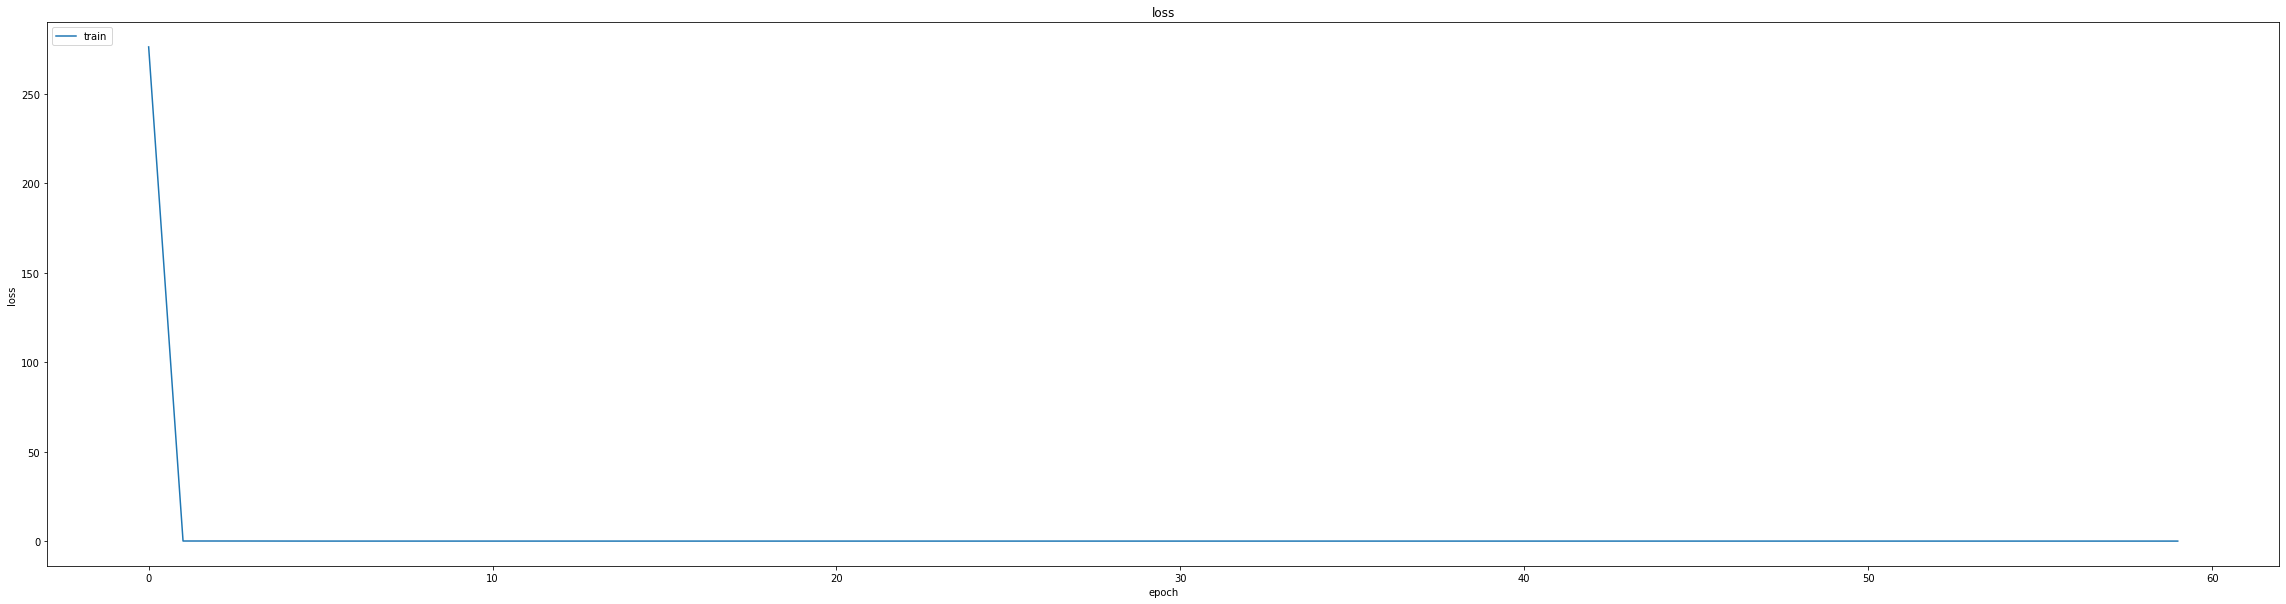

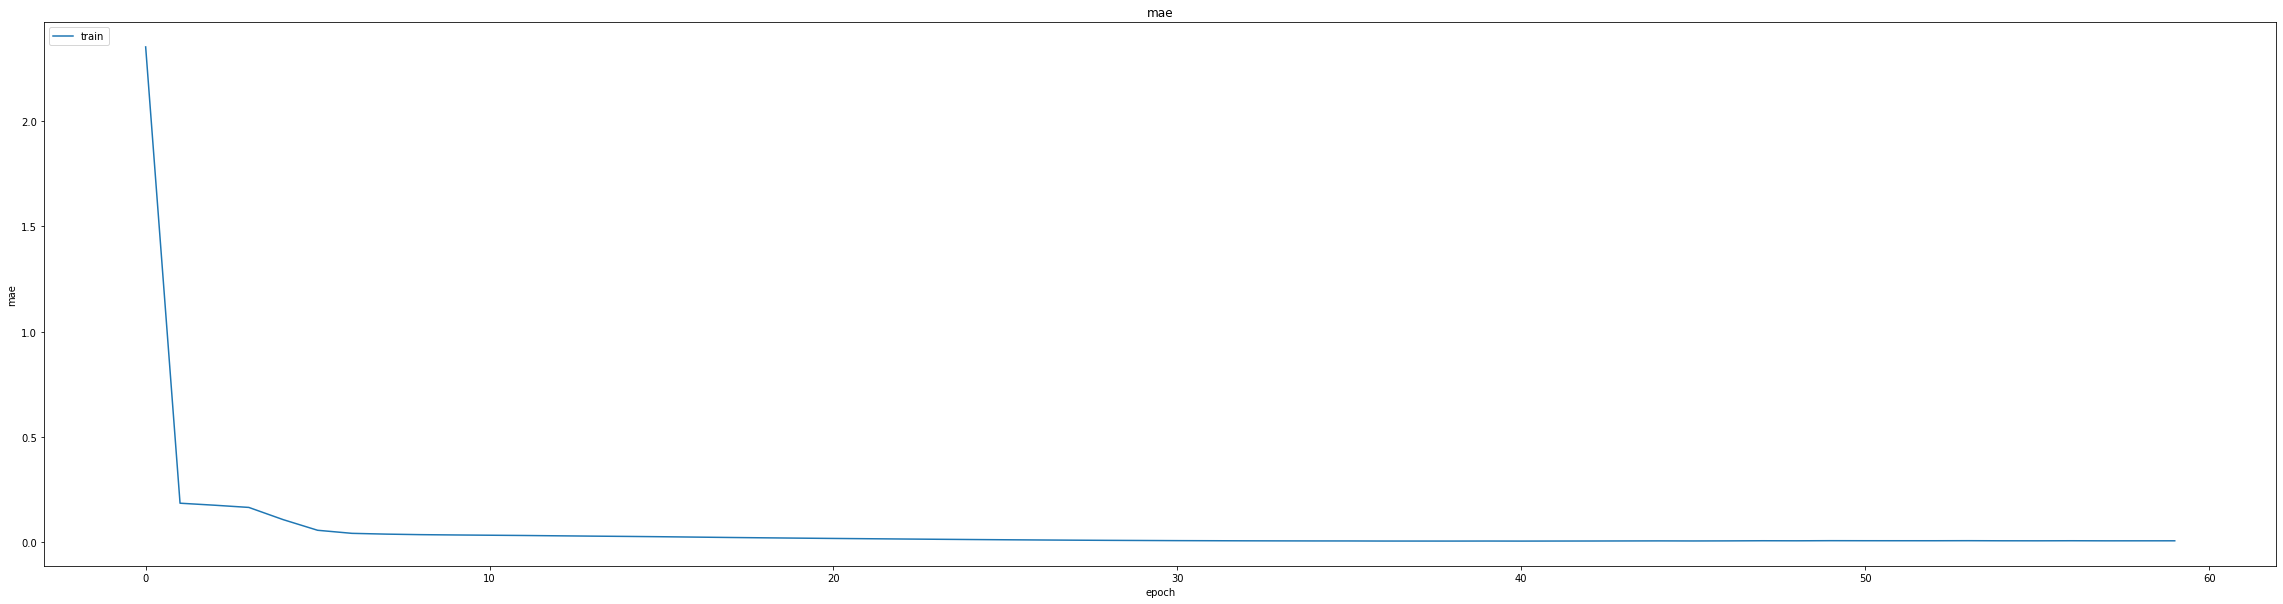

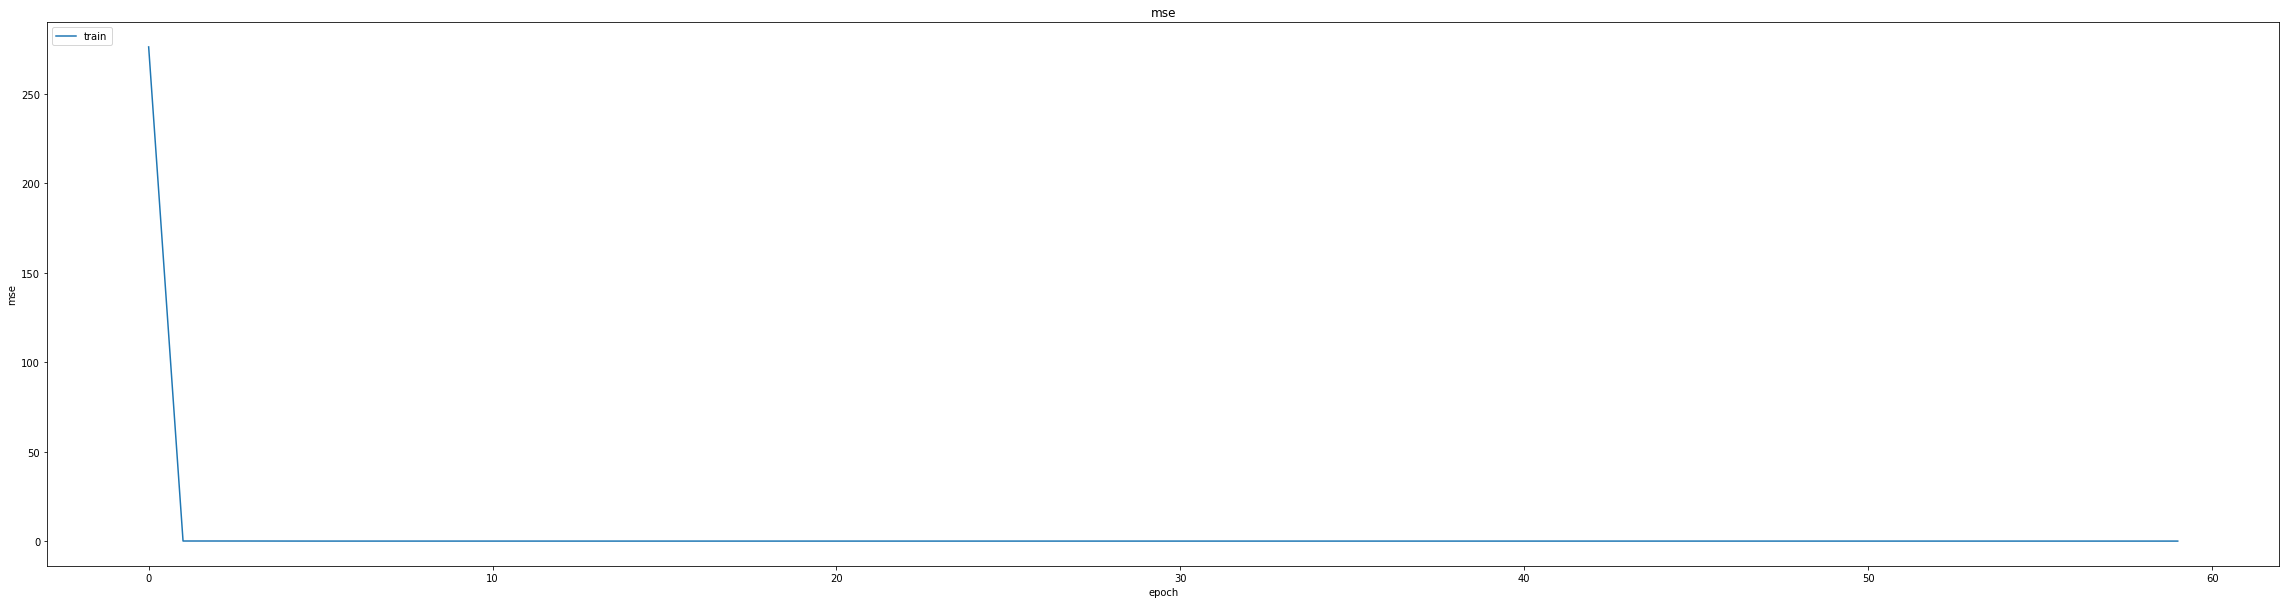

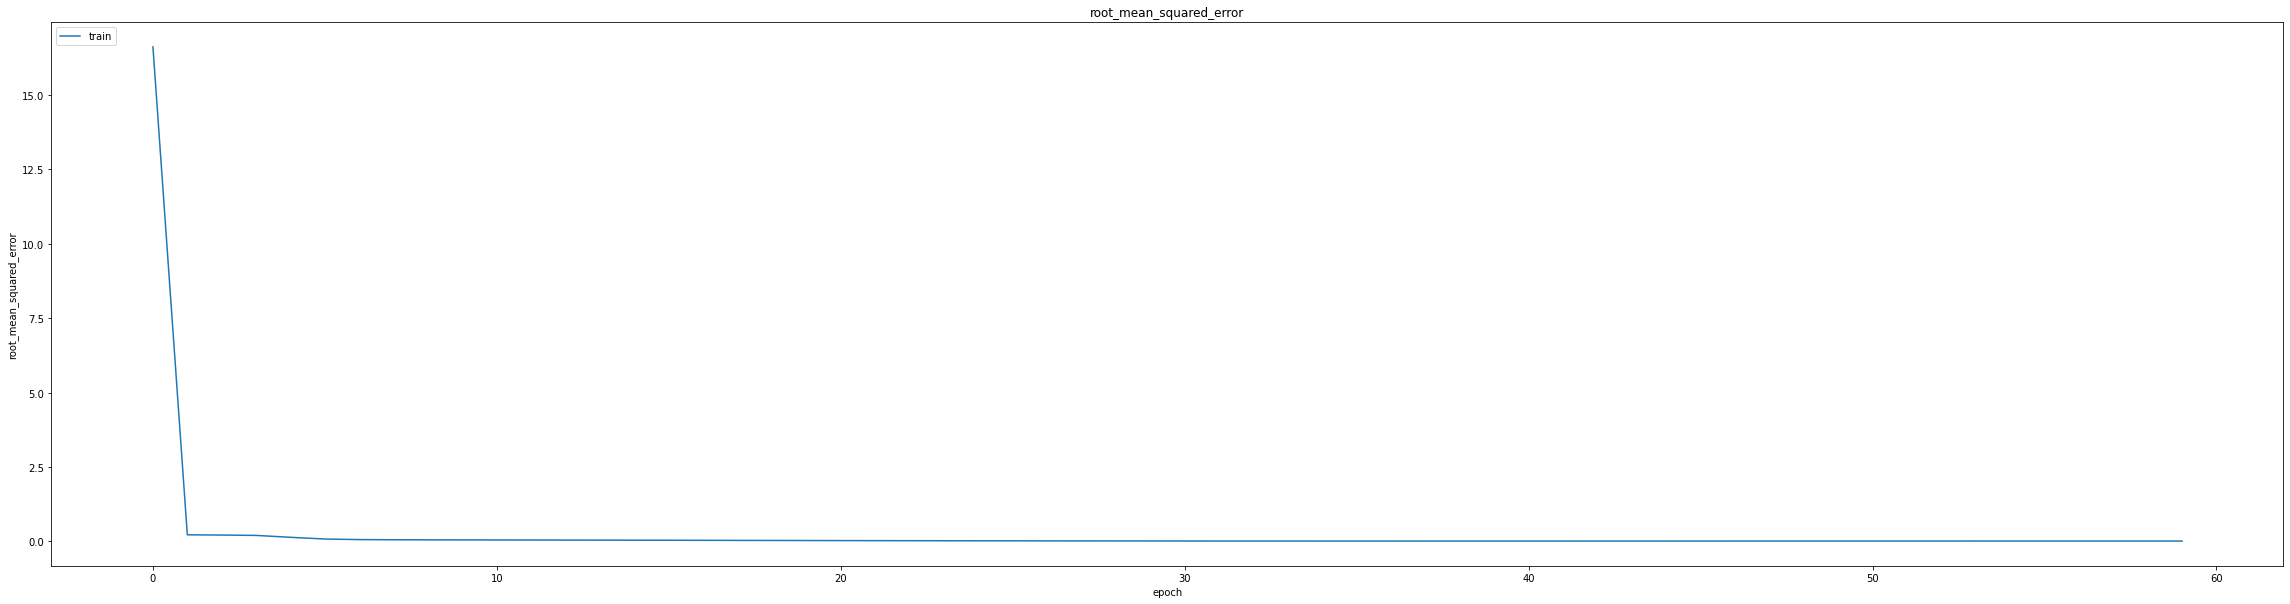

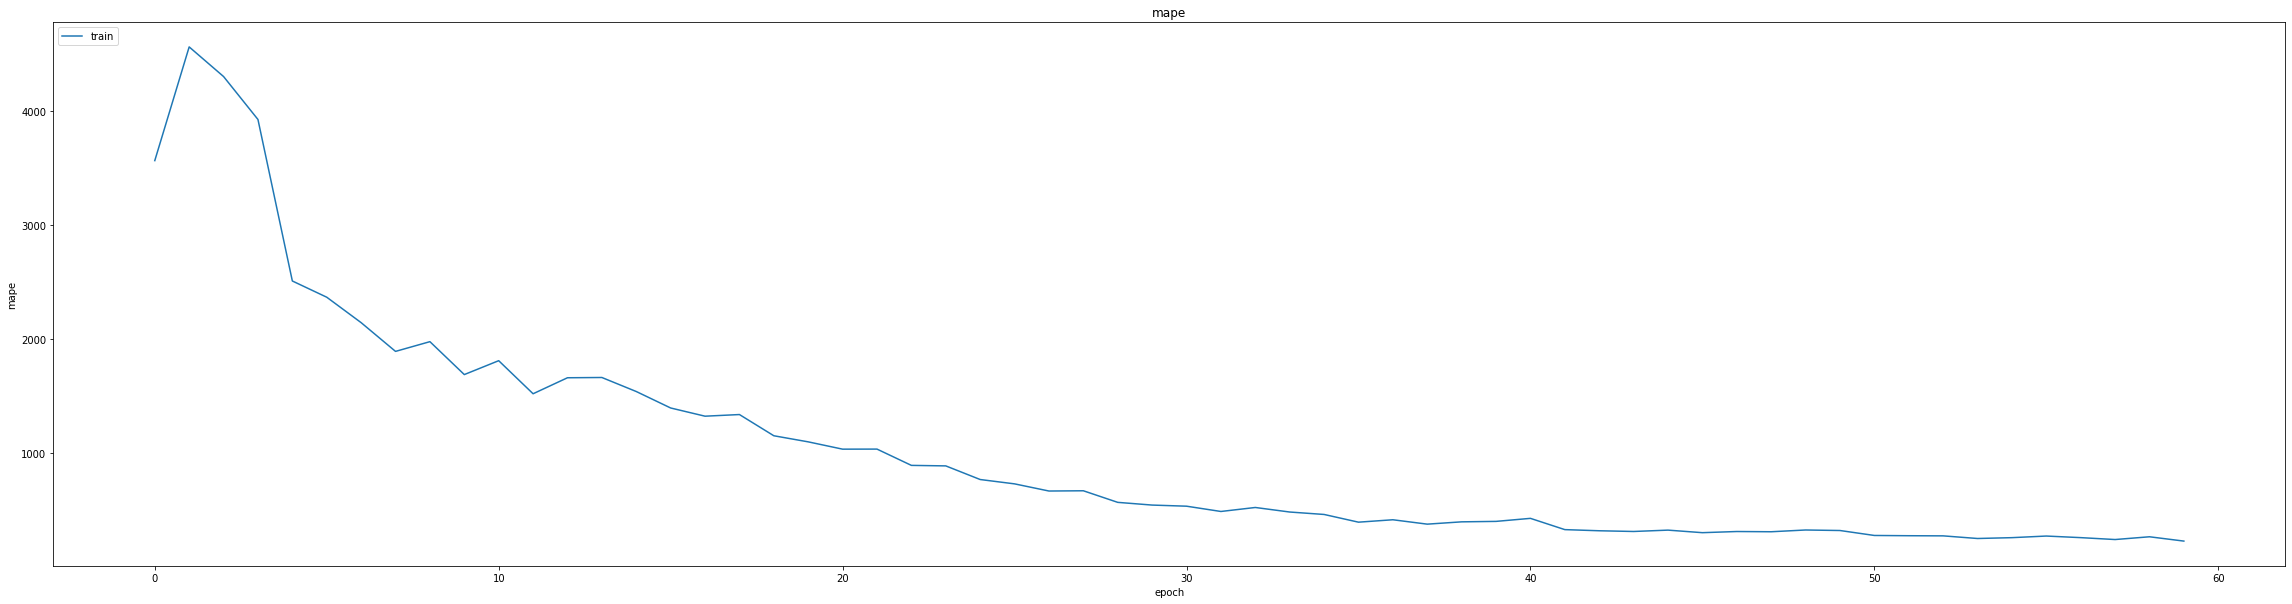

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014079012908041477
0.015794862061738968
1043/1043 [==============================] - 6s 5ms/step
0.9913056411237393


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
405/405 [==============================] - ETA: 0s - loss: 5.2918e-04 - mae: 0.0085 - mse: 5.2918e-04 - root_mean_squared_error: 0.0230 - mape: 351.2431
Epoch 1: val_mse did not improve from 0.00025
405/405 [==============================] - 15s 25ms/step - loss: 5.2918e-04 - mae: 0.0085 - mse: 5.2918e-04 - root_mean_squared_error: 0.0230 - mape: 351.2431 - val_loss: 5.5890e-04 - val_mae: 0.0209 - val_mse: 5.5890e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 1309.7438 - lr: 0.0010
Epoch 2/20
403/405 [============================>.] - ETA: 0s - loss: 1.6724e-05 - mae: 0.0031 - mse: 1.6724e-05 - root_mean_squared_error: 0.0041 - mape: 249.2126
Epoch 2: val_mse did not improve from 0.00025
405/405 [==============================] - 10s 26ms/step - loss: 1.6727e-05 - mae: 0.0031 - mse: 1.6727e-05 - root_mean_squared_error: 0.0041 - mape: 248.1199 - val_loss: 5.5522e-04 - val_mae: 0.0211 - val_mse: 5.5522e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 1393.0222 - l

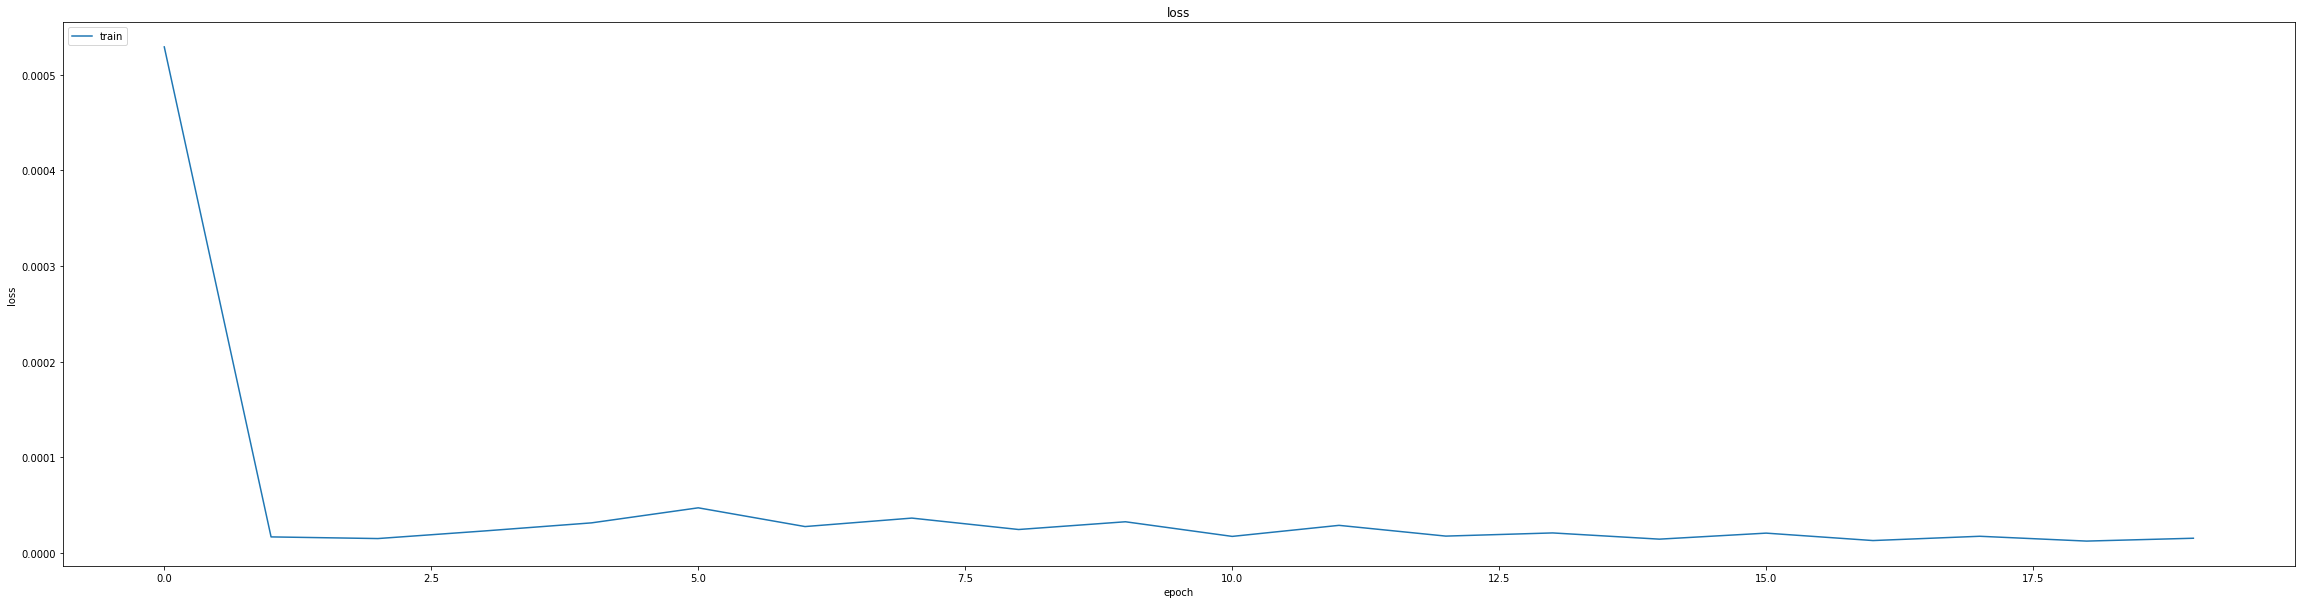

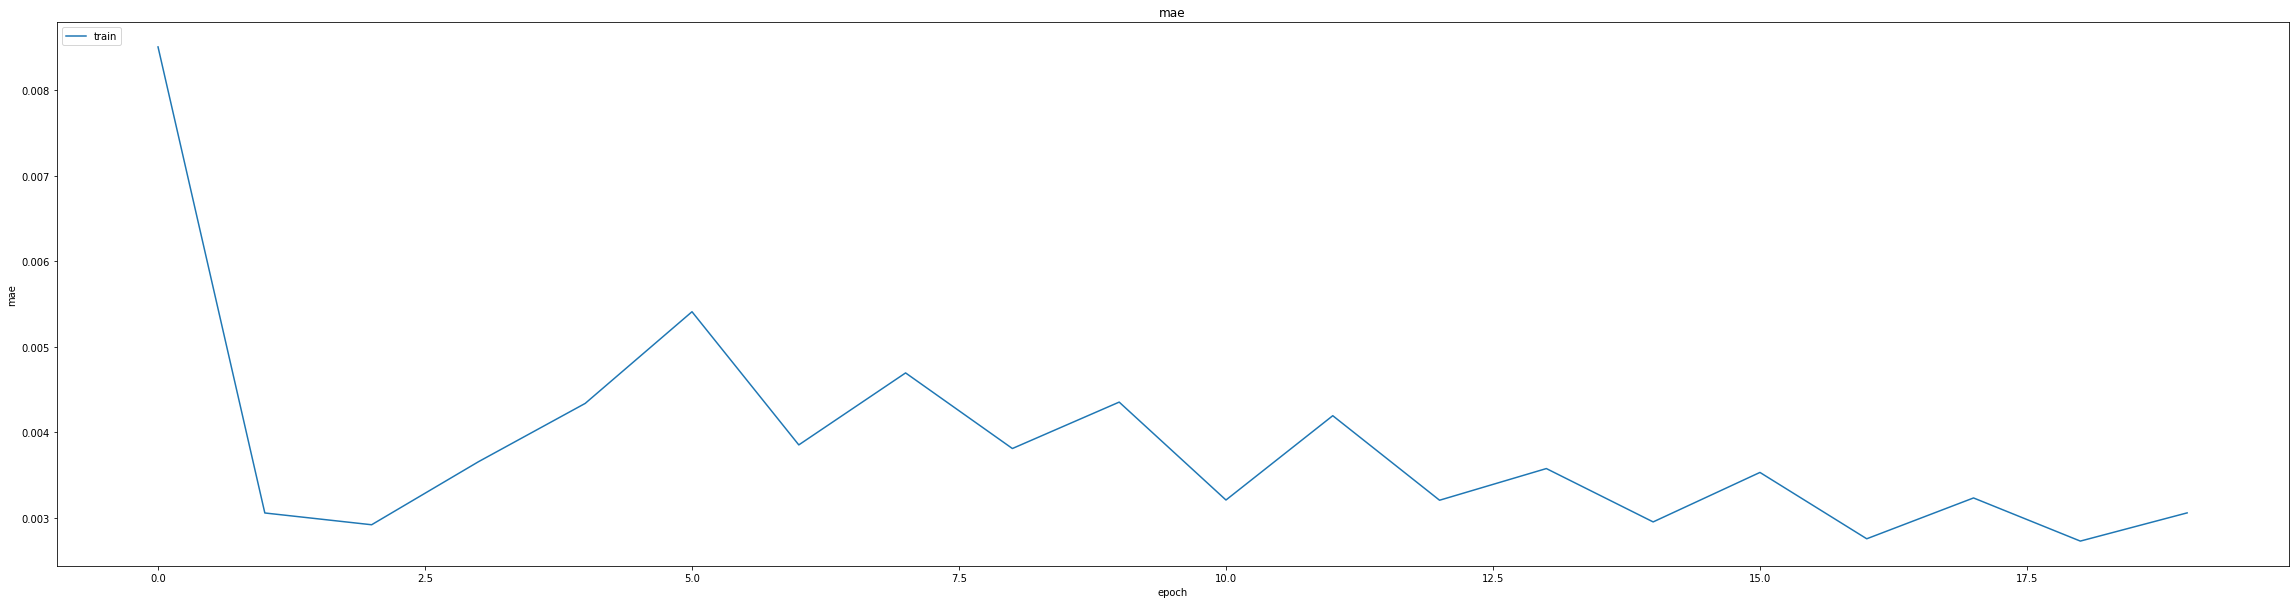

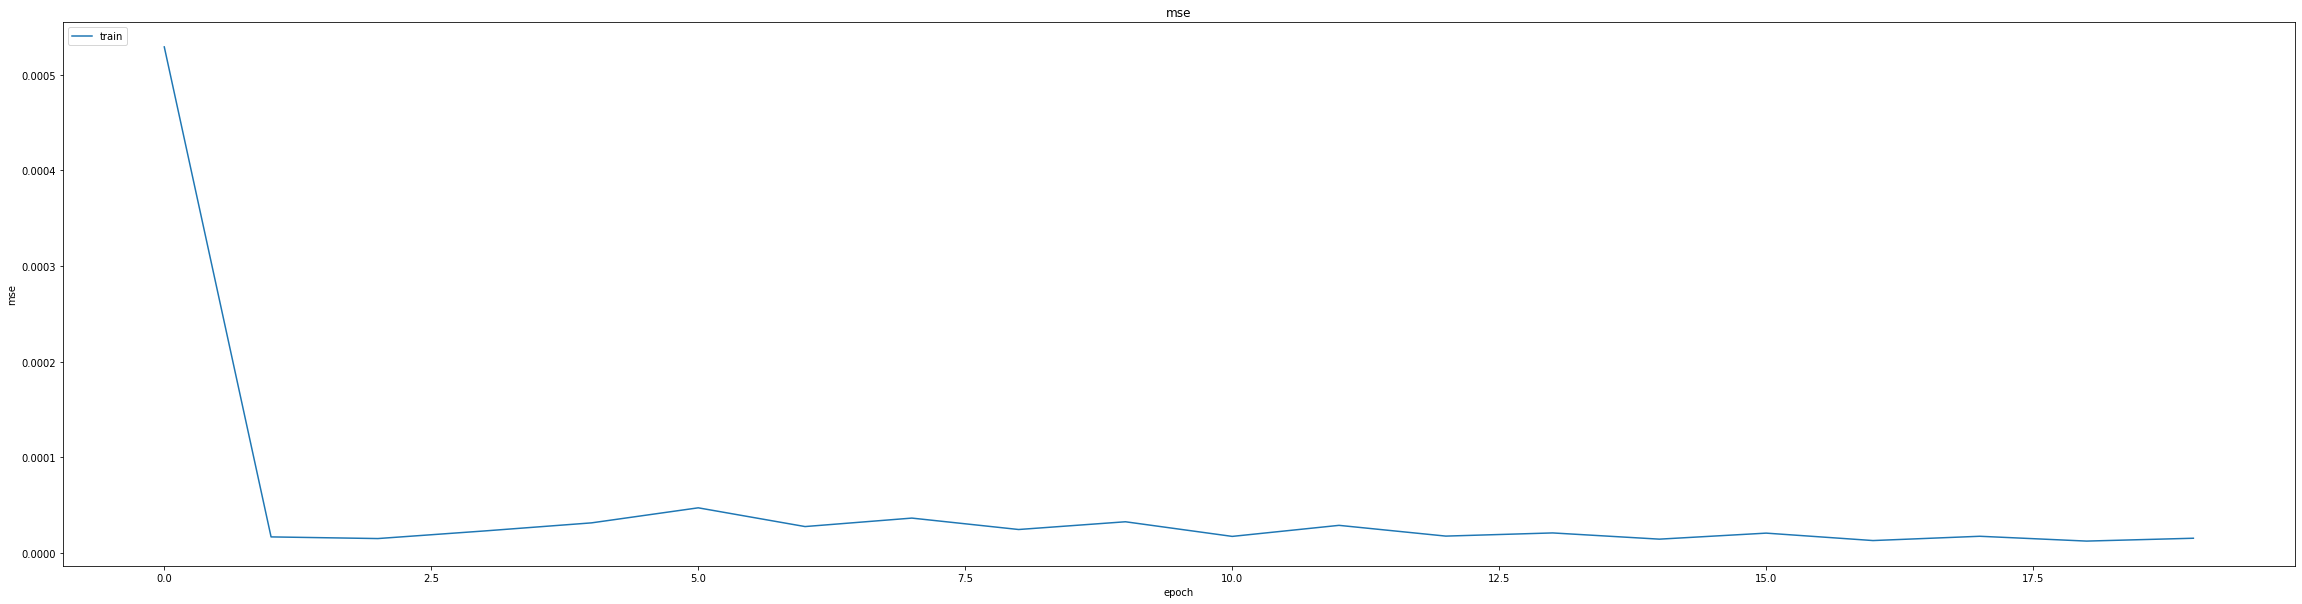

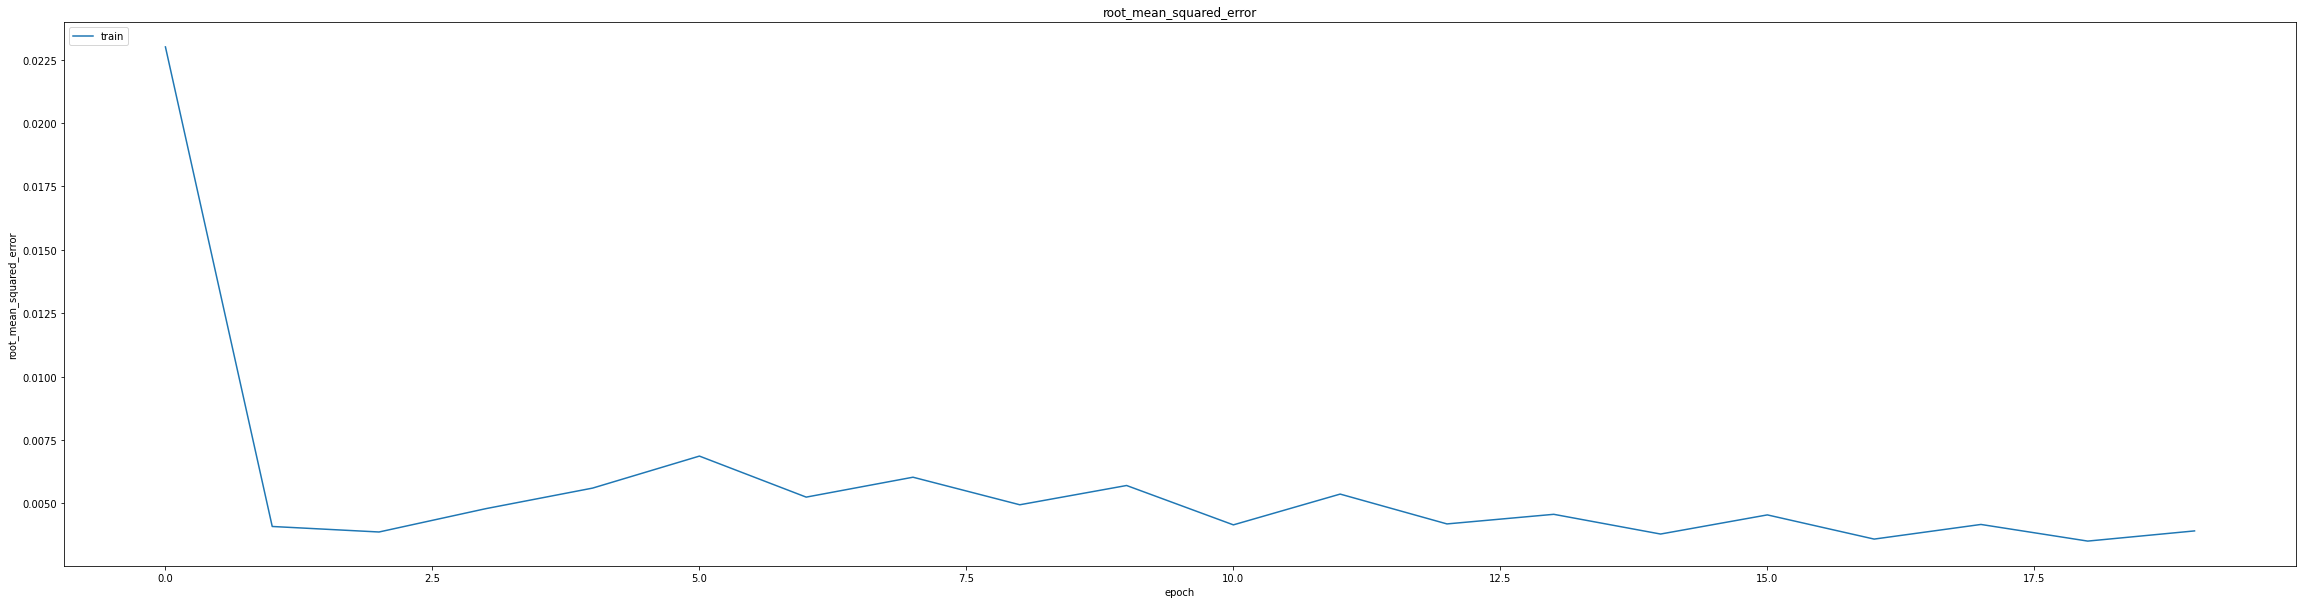

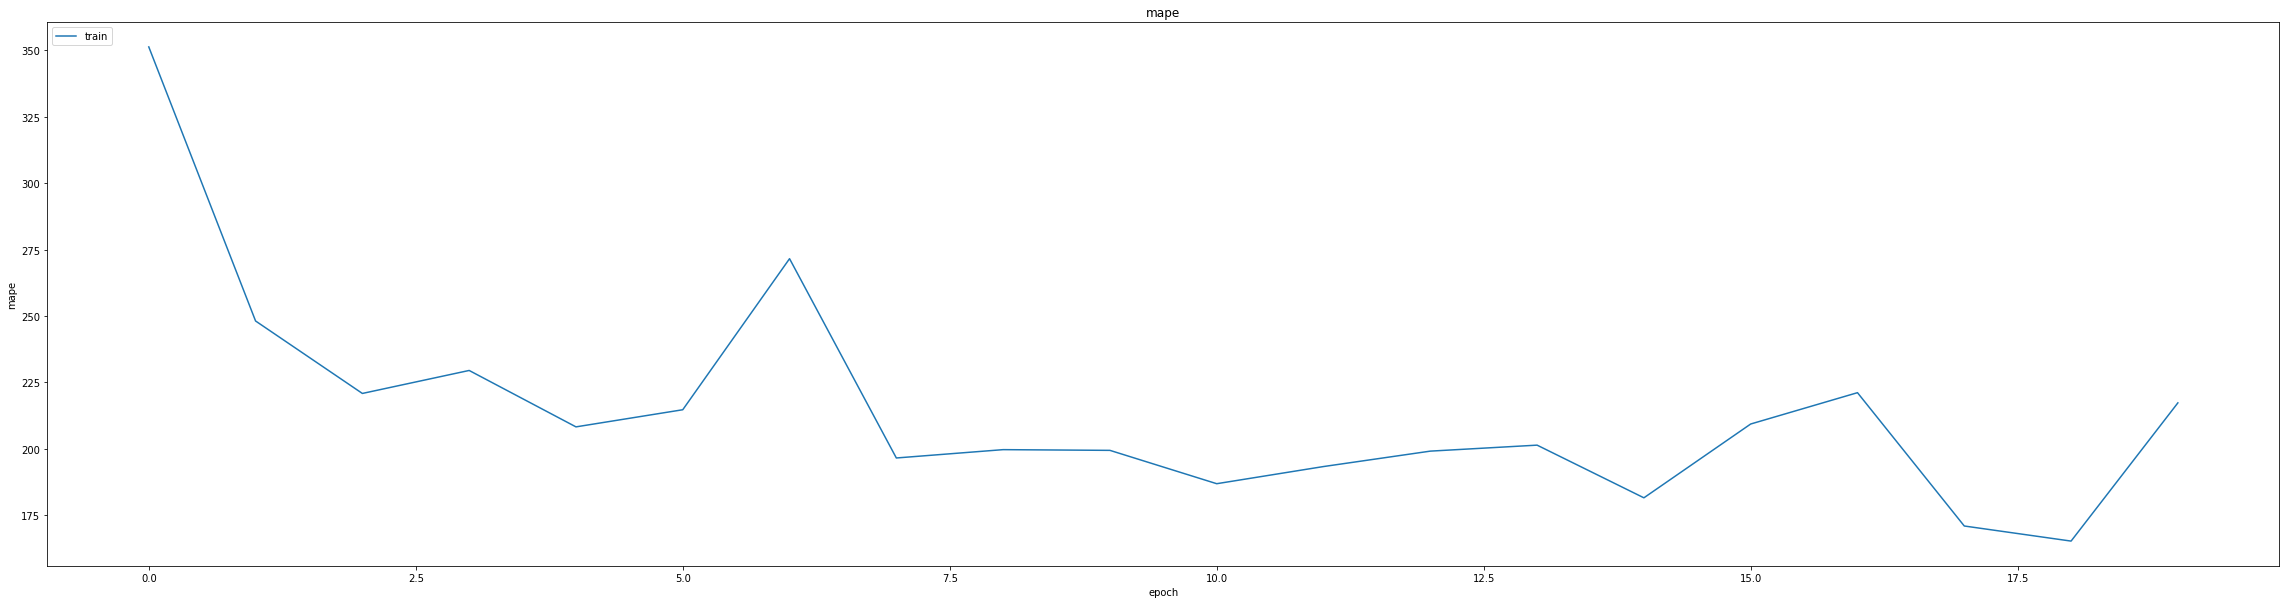

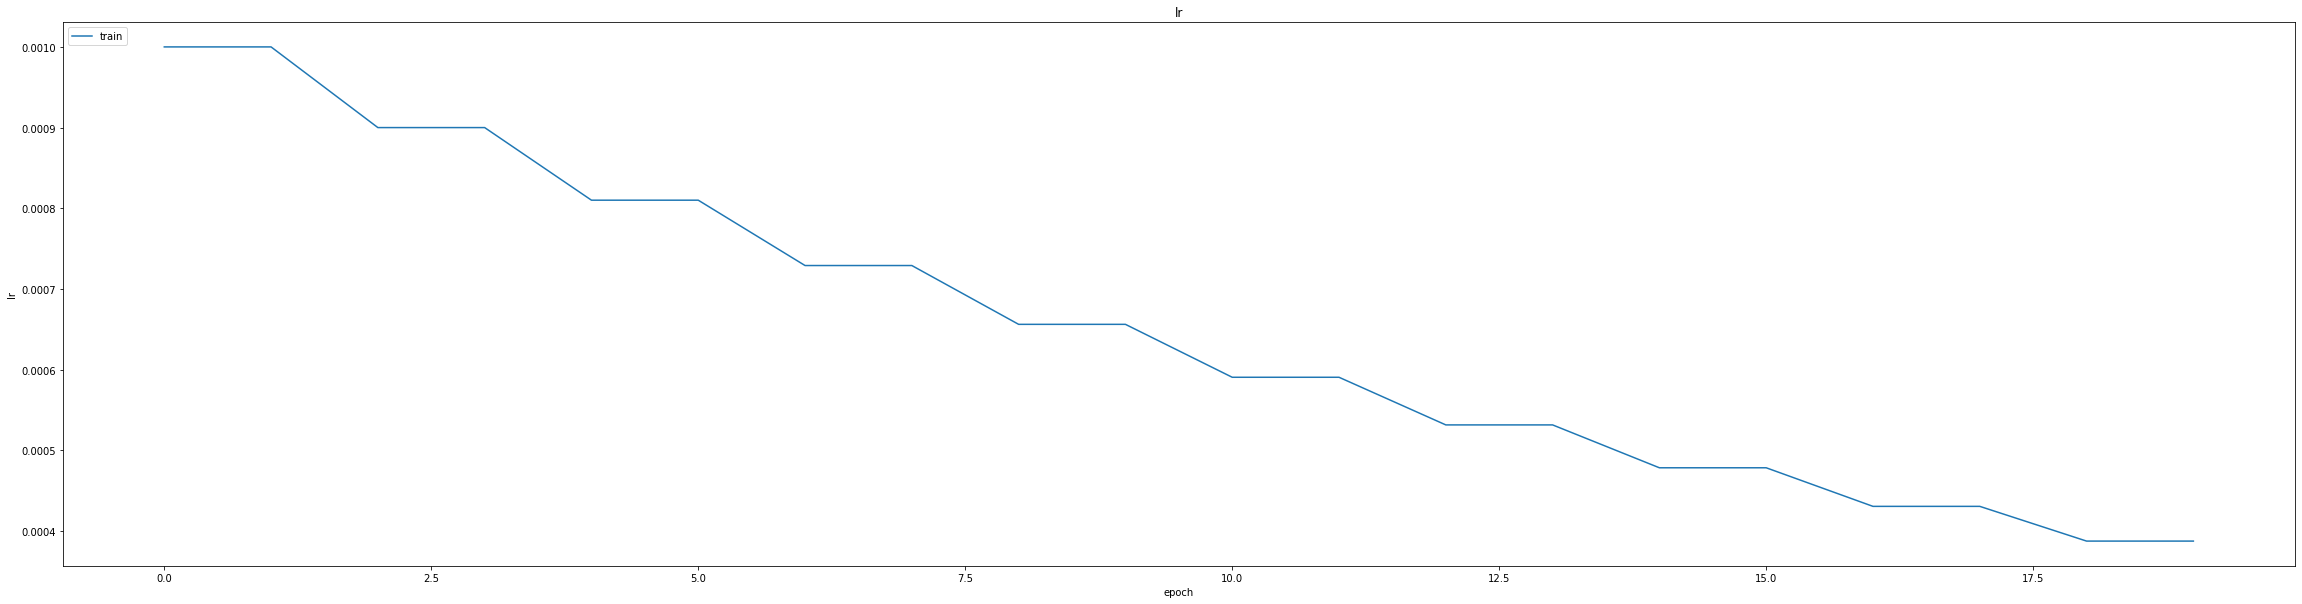

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016219403594732285
0.018211303278803825
1043/1043 [==============================] - 6s 5ms/step
0.9926062567805385


1043/1043 [==============================] - 14s 5ms/step


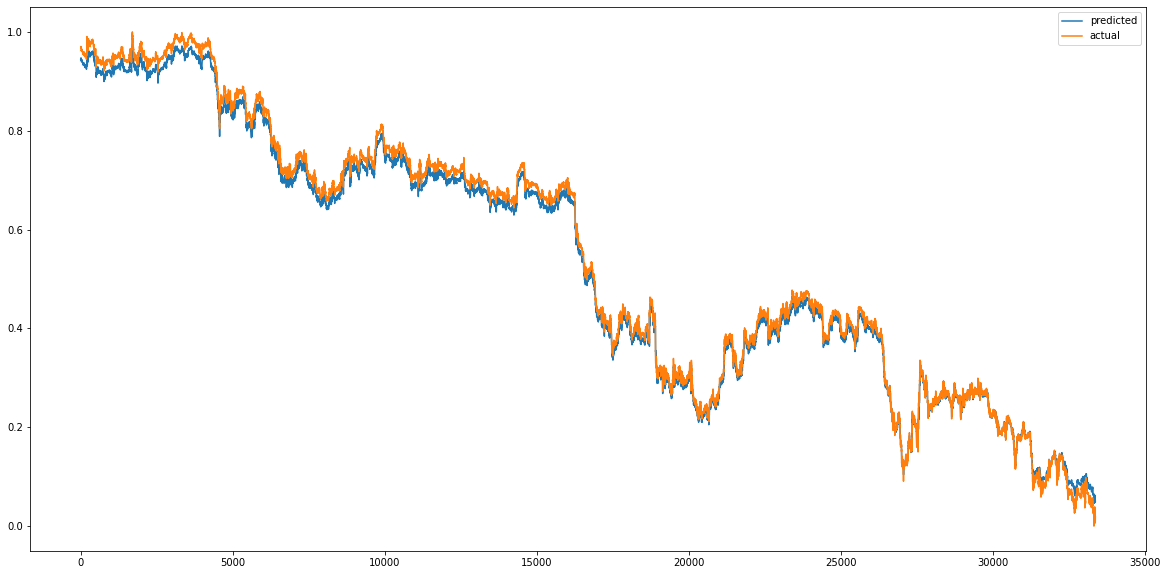

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


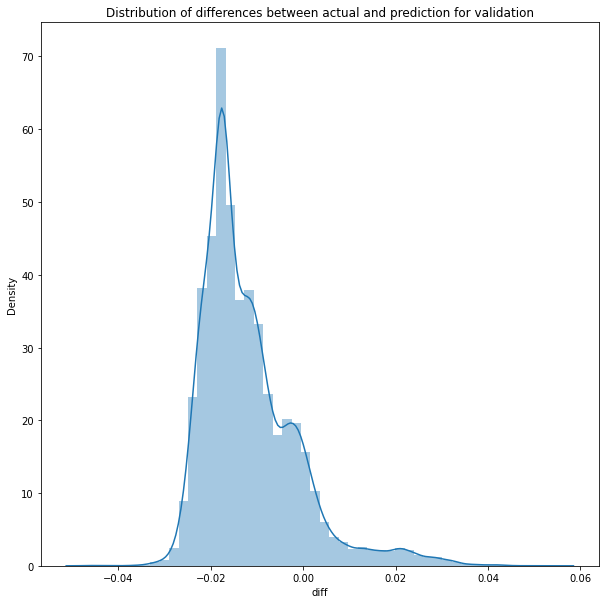

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 5s 5ms/step


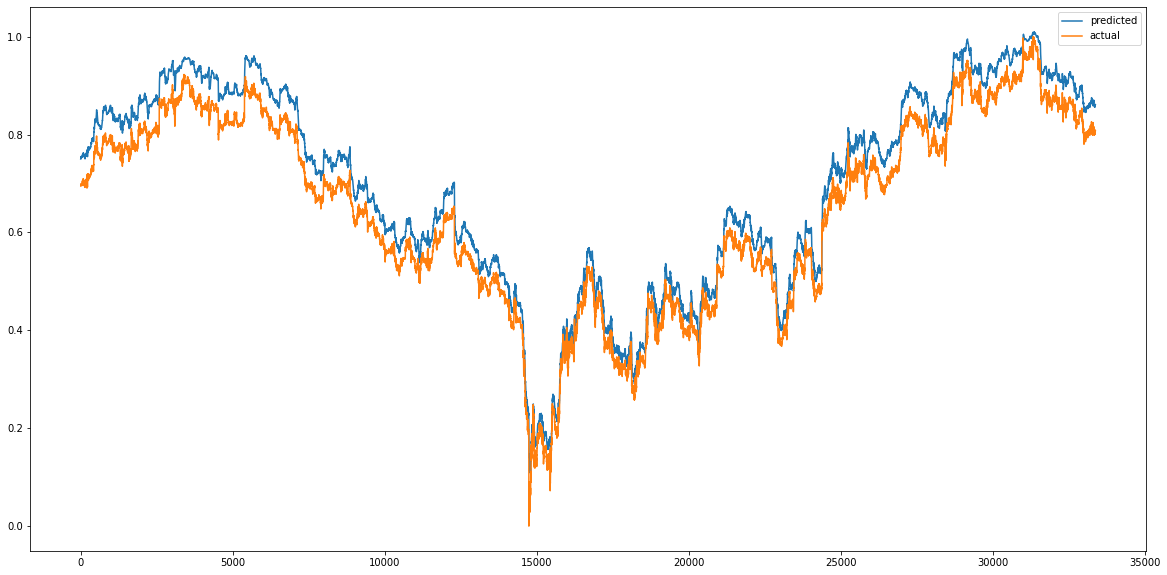

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


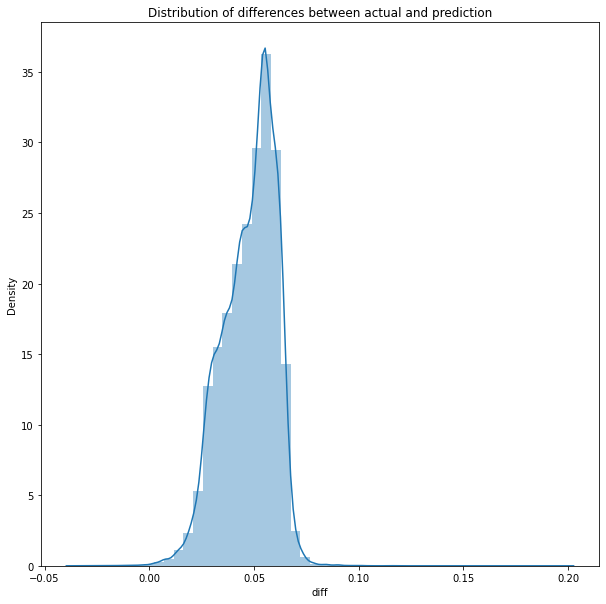

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0024392106411646637
RMSE :  0.0493883654433376
MAE :  0.047785597472975776
1043/1043 [==============================] - 5s 5ms/step
R2_Score  : 0.9380026642392273


count    33376.000000
mean         0.047775
std          0.012522
min         -0.034933
25%          0.038996
50%          0.049972
75%          0.057271
max          0.197977
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 89.2639 - mae: 1.1635 - mse: 89.2639 - root_mean_squared_error: 9.4480 - mape: 3028.5481
Epoch 1: val_mse improved from inf to 0.07440, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 19s 39ms/step - loss: 89.2639 - mae: 1.1635 - mse: 89.2639 - root_mean_squared_error: 9.4480 - mape: 3028.5481 - val_loss: 0.0744 - val_mae: 0.2454 - val_mse: 0.0744 - val_root_mean_squared_error: 0.2728 - val_mape: 16345.7656
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 0.0391 - mae: 0.1677 - mse: 0.0391 - root_mean_squared_error: 0.1979 - mape: 4464.7549
Epoch 2: val_mse improved from 0.07440 to 0.04403, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0391 - mae: 0.1677 - mse: 0.0391 - root_mean_squared_error: 0.1979 - mape: 4464.7549 - val_loss: 0.0440 - val_mae: 0.1770 - val_mse: 0.0440 - val_root_mean_squared_error: 0.2098 - val_mape: 14425.9541
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.0223 - mae: 0.1221 - mse: 0.0223 - root_mean_squared_error: 0.1492 - mape: 3241.7229
Epoch 3: val_mse improved from 0.04403 to 0.02033, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 0.0222 - mae: 0.1220 - mse: 0.0222 - root_mean_squared_error: 0.1491 - mape: 3227.5781 - val_loss: 0.0203 - val_mae: 0.1159 - val_mse: 0.0203 - val_root_mean_squared_error: 0.1426 - val_mape: 11987.1377
Epoch 4/60
403/405 [============================>.] - ETA: 0s - loss: 0.0105 - mae: 0.0794 - mse: 0.0105 - root_mean_squared_error: 0.1023 - mape: 2802.8706
Epoch 4: val_mse improved from 0.02033 to 0.01166, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 0.0104 - mae: 0.0793 - mse: 0.0104 - root_mean_squared_error: 0.1022 - mape: 2790.6016 - val_loss: 0.0117 - val_mae: 0.0845 - val_mse: 0.0117 - val_root_mean_squared_error: 0.1080 - val_mape: 10293.1260
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0042 - mae: 0.0489 - mse: 0.0042 - root_mean_squared_error: 0.0651 - mape: 2492.9775
Epoch 5: val_mse improved from 0.01166 to 0.00976, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0042 - mae: 0.0489 - mse: 0.0042 - root_mean_squared_error: 0.0651 - mape: 2492.9775 - val_loss: 0.0098 - val_mae: 0.0822 - val_mse: 0.0098 - val_root_mean_squared_error: 0.0988 - val_mape: 9367.5078
Epoch 6/60
403/405 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0422 - mse: 0.0032 - root_mean_squared_error: 0.0566 - mape: 2056.9324
Epoch 6: val_mse improved from 0.00976 to 0.00828, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0032 - mae: 0.0422 - mse: 0.0032 - root_mean_squared_error: 0.0566 - mape: 2047.9242 - val_loss: 0.0083 - val_mae: 0.0774 - val_mse: 0.0083 - val_root_mean_squared_error: 0.0910 - val_mape: 8850.8750
Epoch 7/60
403/405 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0381 - mse: 0.0027 - root_mean_squared_error: 0.0515 - mape: 1934.3906
Epoch 7: val_mse improved from 0.00828 to 0.00663, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0027 - mae: 0.0381 - mse: 0.0027 - root_mean_squared_error: 0.0515 - mape: 1925.9211 - val_loss: 0.0066 - val_mae: 0.0683 - val_mse: 0.0066 - val_root_mean_squared_error: 0.0814 - val_mape: 8465.3809
Epoch 8/60
403/405 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0345 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 2005.4933
Epoch 8: val_mse improved from 0.00663 to 0.00628, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 0.0022 - mae: 0.0345 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 1996.7245 - val_loss: 0.0063 - val_mae: 0.0678 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0793 - val_mape: 8108.9951
Epoch 9/60
404/405 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0317 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 1779.9575
Epoch 9: val_mse improved from 0.00628 to 0.00581, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 0.0019 - mae: 0.0317 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 1776.5448 - val_loss: 0.0058 - val_mae: 0.0657 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0762 - val_mape: 7807.6357
Epoch 10/60
403/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0290 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 1813.1692
Epoch 10: val_mse improved from 0.00581 to 0.00519, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 0.0016 - mae: 0.0290 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 1805.2258 - val_loss: 0.0052 - val_mae: 0.0621 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0720 - val_mape: 7523.5791
Epoch 11/60
402/405 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0268 - mse: 0.0014 - root_mean_squared_error: 0.0372 - mape: 1942.9047
Epoch 11: val_mse improved from 0.00519 to 0.00468, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 0.0014 - mae: 0.0268 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 1929.6029 - val_loss: 0.0047 - val_mae: 0.0591 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0684 - val_mape: 7241.6123
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0252 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 1474.3494
Epoch 12: val_mse improved from 0.00468 to 0.00404, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 0.0012 - mae: 0.0252 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 1474.3494 - val_loss: 0.0040 - val_mae: 0.0545 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0636 - val_mape: 6990.5459
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0235 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 1741.8961
Epoch 13: val_mse improved from 0.00404 to 0.00361, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 0.0011 - mae: 0.0235 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 1741.8961 - val_loss: 0.0036 - val_mae: 0.0516 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0601 - val_mape: 6762.1118
Epoch 14/60
404/405 [============================>.] - ETA: 0s - loss: 9.4918e-04 - mae: 0.0222 - mse: 9.4918e-04 - root_mean_squared_error: 0.0308 - mape: 1488.3917
Epoch 14: val_mse improved from 0.00361 to 0.00310, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 9.4918e-04 - mae: 0.0222 - mse: 9.4918e-04 - root_mean_squared_error: 0.0308 - mape: 1485.5364 - val_loss: 0.0031 - val_mae: 0.0474 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0557 - val_mape: 6535.2666
Epoch 15/60
404/405 [============================>.] - ETA: 0s - loss: 8.5331e-04 - mae: 0.0210 - mse: 8.5331e-04 - root_mean_squared_error: 0.0292 - mape: 1395.4968
Epoch 15: val_mse improved from 0.00310 to 0.00259, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 8.5318e-04 - mae: 0.0210 - mse: 8.5318e-04 - root_mean_squared_error: 0.0292 - mape: 1392.8187 - val_loss: 0.0026 - val_mae: 0.0429 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0509 - val_mape: 6301.3262
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 7.6318e-04 - mae: 0.0199 - mse: 7.6318e-04 - root_mean_squared_error: 0.0276 - mape: 1269.1921
Epoch 16: val_mse improved from 0.00259 to 0.00259, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 7.6318e-04 - mae: 0.0199 - mse: 7.6318e-04 - root_mean_squared_error: 0.0276 - mape: 1269.1921 - val_loss: 0.0026 - val_mae: 0.0443 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0509 - val_mape: 6060.0527
Epoch 17/60
404/405 [============================>.] - ETA: 0s - loss: 6.7368e-04 - mae: 0.0187 - mse: 6.7368e-04 - root_mean_squared_error: 0.0260 - mape: 1278.5715
Epoch 17: val_mse improved from 0.00259 to 0.00237, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 6.7314e-04 - mae: 0.0187 - mse: 6.7314e-04 - root_mean_squared_error: 0.0259 - mape: 1276.1151 - val_loss: 0.0024 - val_mae: 0.0429 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0487 - val_mape: 5808.3882
Epoch 18/60
405/405 [==============================] - ETA: 0s - loss: 5.9645e-04 - mae: 0.0177 - mse: 5.9645e-04 - root_mean_squared_error: 0.0244 - mape: 1230.3013
Epoch 18: val_mse improved from 0.00237 to 0.00207, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 5.9645e-04 - mae: 0.0177 - mse: 5.9645e-04 - root_mean_squared_error: 0.0244 - mape: 1230.3013 - val_loss: 0.0021 - val_mae: 0.0404 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 5549.8687
Epoch 19/60
404/405 [============================>.] - ETA: 0s - loss: 5.2106e-04 - mae: 0.0166 - mse: 5.2106e-04 - root_mean_squared_error: 0.0228 - mape: 1205.7186
Epoch 19: val_mse improved from 0.00207 to 0.00170, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 5.2105e-04 - mae: 0.0166 - mse: 5.2105e-04 - root_mean_squared_error: 0.0228 - mape: 1203.4117 - val_loss: 0.0017 - val_mae: 0.0365 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0412 - val_mape: 5285.1216
Epoch 20/60
405/405 [==============================] - ETA: 0s - loss: 4.5613e-04 - mae: 0.0156 - mse: 4.5613e-04 - root_mean_squared_error: 0.0214 - mape: 1219.9084
Epoch 20: val_mse improved from 0.00170 to 0.00151, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 4.5613e-04 - mae: 0.0156 - mse: 4.5613e-04 - root_mean_squared_error: 0.0214 - mape: 1219.9084 - val_loss: 0.0015 - val_mae: 0.0346 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0388 - val_mape: 5024.5854
Epoch 21/60
402/405 [============================>.] - ETA: 0s - loss: 3.9427e-04 - mae: 0.0145 - mse: 3.9427e-04 - root_mean_squared_error: 0.0199 - mape: 1165.8688
Epoch 21: val_mse improved from 0.00151 to 0.00131, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 3.9394e-04 - mae: 0.0145 - mse: 3.9394e-04 - root_mean_squared_error: 0.0198 - mape: 1157.8851 - val_loss: 0.0013 - val_mae: 0.0323 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 4769.3120
Epoch 22/60
404/405 [============================>.] - ETA: 0s - loss: 3.4335e-04 - mae: 0.0136 - mse: 3.4335e-04 - root_mean_squared_error: 0.0185 - mape: 1072.8604
Epoch 22: val_mse improved from 0.00131 to 0.00123, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 3.4336e-04 - mae: 0.0136 - mse: 3.4336e-04 - root_mean_squared_error: 0.0185 - mape: 1070.8018 - val_loss: 0.0012 - val_mae: 0.0318 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 4513.0356
Epoch 23/60
403/405 [============================>.] - ETA: 0s - loss: 2.9846e-04 - mae: 0.0128 - mse: 2.9846e-04 - root_mean_squared_error: 0.0173 - mape: 962.9106
Epoch 23: val_mse improved from 0.00123 to 0.00110, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 2.9817e-04 - mae: 0.0128 - mse: 2.9817e-04 - root_mean_squared_error: 0.0173 - mape: 958.6873 - val_loss: 0.0011 - val_mae: 0.0304 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 4261.4785
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 2.5728e-04 - mae: 0.0119 - mse: 2.5728e-04 - root_mean_squared_error: 0.0160 - mape: 897.5936
Epoch 24: val_mse improved from 0.00110 to 0.00108, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 2.5728e-04 - mae: 0.0119 - mse: 2.5728e-04 - root_mean_squared_error: 0.0160 - mape: 897.5936 - val_loss: 0.0011 - val_mae: 0.0304 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0328 - val_mape: 4009.3596
Epoch 25/60
405/405 [==============================] - ETA: 0s - loss: 2.1889e-04 - mae: 0.0110 - mse: 2.1889e-04 - root_mean_squared_error: 0.0148 - mape: 845.1639
Epoch 25: val_mse improved from 0.00108 to 0.00089, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 36ms/step - loss: 2.1889e-04 - mae: 0.0110 - mse: 2.1889e-04 - root_mean_squared_error: 0.0148 - mape: 845.1639 - val_loss: 8.8609e-04 - val_mae: 0.0271 - val_mse: 8.8609e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 3757.6675
Epoch 26/60
403/405 [============================>.] - ETA: 0s - loss: 1.8652e-04 - mae: 0.0102 - mse: 1.8652e-04 - root_mean_squared_error: 0.0137 - mape: 815.0164
Epoch 26: val_mse improved from 0.00089 to 0.00083, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 36ms/step - loss: 1.8645e-04 - mae: 0.0102 - mse: 1.8645e-04 - root_mean_squared_error: 0.0137 - mape: 811.4446 - val_loss: 8.3225e-04 - val_mae: 0.0268 - val_mse: 8.3225e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 3522.7761
Epoch 27/60
402/405 [============================>.] - ETA: 0s - loss: 1.6165e-04 - mae: 0.0095 - mse: 1.6165e-04 - root_mean_squared_error: 0.0127 - mape: 791.8003
Epoch 27: val_mse improved from 0.00083 to 0.00073, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 15s 37ms/step - loss: 1.6174e-04 - mae: 0.0095 - mse: 1.6174e-04 - root_mean_squared_error: 0.0127 - mape: 786.3911 - val_loss: 7.3285e-04 - val_mae: 0.0254 - val_mse: 7.3285e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 3315.8196
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 1.3920e-04 - mae: 0.0088 - mse: 1.3920e-04 - root_mean_squared_error: 0.0118 - mape: 719.2484
Epoch 28: val_mse improved from 0.00073 to 0.00059, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)


405/405 [==============================] - 14s 35ms/step - loss: 1.3919e-04 - mae: 0.0088 - mse: 1.3919e-04 - root_mean_squared_error: 0.0118 - mape: 717.8682 - val_loss: 5.8659e-04 - val_mae: 0.0226 - val_mse: 5.8659e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 3139.8994
Epoch 29/60
405/405 [==============================] - ETA: 0s - loss: 1.2301e-04 - mae: 0.0083 - mse: 1.2301e-04 - root_mean_squared_error: 0.0111 - mape: 654.6760
Epoch 29: val_mse did not improve from 0.00059
405/405 [==============================] - 7s 17ms/step - loss: 1.2301e-04 - mae: 0.0083 - mse: 1.2301e-04 - root_mean_squared_error: 0.0111 - mape: 654.6760 - val_loss: 5.9629e-04 - val_mae: 0.0223 - val_mse: 5.9629e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 2978.9241
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 1.0859e-04 - mae: 0.0079 - mse: 1.0859e-04 - root_mean_squared_error: 0.0104 - mape: 639.6362
Epoch 30: val_mse did not improve from 0.00059
405/405 [====

405/405 [==============================] - 15s 36ms/step - loss: 9.7763e-05 - mae: 0.0075 - mse: 9.7763e-05 - root_mean_squared_error: 0.0099 - mape: 605.4183 - val_loss: 5.3526e-04 - val_mae: 0.0217 - val_mse: 5.3526e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 2689.0701
Epoch 32/60
402/405 [============================>.] - ETA: 0s - loss: 8.6865e-05 - mae: 0.0071 - mse: 8.6865e-05 - root_mean_squared_error: 0.0093 - mape: 559.3865
Epoch 32: val_mse did not improve from 0.00054
405/405 [==============================] - 7s 16ms/step - loss: 8.6765e-05 - mae: 0.0071 - mse: 8.6765e-05 - root_mean_squared_error: 0.0093 - mape: 555.5547 - val_loss: 5.9628e-04 - val_mae: 0.0231 - val_mse: 5.9628e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 2555.6445
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 7.9248e-05 - mae: 0.0068 - mse: 7.9248e-05 - root_mean_squared_error: 0.0089 - mape: 516.3834
Epoch 33: val_mse improved from 0.00054 to 0.00041, saving m

405/405 [==============================] - 14s 36ms/step - loss: 7.9248e-05 - mae: 0.0068 - mse: 7.9248e-05 - root_mean_squared_error: 0.0089 - mape: 516.3834 - val_loss: 4.0823e-04 - val_mae: 0.0191 - val_mse: 4.0823e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 2447.5461
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 7.1129e-05 - mae: 0.0064 - mse: 7.1129e-05 - root_mean_squared_error: 0.0084 - mape: 515.4307
Epoch 34: val_mse did not improve from 0.00041
405/405 [==============================] - 7s 16ms/step - loss: 7.1171e-05 - mae: 0.0065 - mse: 7.1171e-05 - root_mean_squared_error: 0.0084 - mape: 513.1706 - val_loss: 7.9327e-04 - val_mae: 0.0262 - val_mse: 7.9327e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 2334.5776
Epoch 35/60
402/405 [============================>.] - ETA: 0s - loss: 6.8158e-05 - mae: 0.0063 - mse: 6.8158e-05 - root_mean_squared_error: 0.0083 - mape: 517.6664
Epoch 35: val_mse did not improve from 0.00041
405/405 [====

405/405 [==============================] - 14s 35ms/step - loss: 5.3328e-05 - mae: 0.0057 - mse: 5.3328e-05 - root_mean_squared_error: 0.0073 - mape: 438.5196 - val_loss: 3.6550e-04 - val_mae: 0.0179 - val_mse: 3.6550e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 1959.4701
Epoch 40/60
403/405 [============================>.] - ETA: 0s - loss: 5.4626e-05 - mae: 0.0058 - mse: 5.4626e-05 - root_mean_squared_error: 0.0074 - mape: 417.2991
Epoch 40: val_mse did not improve from 0.00037
405/405 [==============================] - 7s 16ms/step - loss: 5.4574e-05 - mae: 0.0058 - mse: 5.4574e-05 - root_mean_squared_error: 0.0074 - mape: 415.4698 - val_loss: 4.4769e-04 - val_mae: 0.0196 - val_mse: 4.4769e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 1908.5571
Epoch 41/60
404/405 [============================>.] - ETA: 0s - loss: 5.5651e-05 - mae: 0.0059 - mse: 5.5651e-05 - root_mean_squared_error: 0.0075 - mape: 379.6300
Epoch 41: val_mse did not improve from 0.00037
405/405 [====

405/405 [==============================] - 15s 36ms/step - loss: 5.7134e-05 - mae: 0.0058 - mse: 5.7134e-05 - root_mean_squared_error: 0.0076 - mape: 383.0832 - val_loss: 3.3554e-04 - val_mae: 0.0172 - val_mse: 3.3554e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 1676.7997
Epoch 47/60
405/405 [==============================] - ETA: 0s - loss: 6.4746e-05 - mae: 0.0062 - mse: 6.4746e-05 - root_mean_squared_error: 0.0080 - mape: 360.4427
Epoch 47: val_mse did not improve from 0.00034
405/405 [==============================] - 7s 16ms/step - loss: 6.4746e-05 - mae: 0.0062 - mse: 6.4746e-05 - root_mean_squared_error: 0.0080 - mape: 360.4427 - val_loss: 7.0844e-04 - val_mae: 0.0246 - val_mse: 7.0844e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 1642.0146
Epoch 48/60
403/405 [============================>.] - ETA: 0s - loss: 7.2938e-05 - mae: 0.0064 - mse: 7.2938e-05 - root_mean_squared_error: 0.0085 - mape: 363.9308
Epoch 48: val_mse improved from 0.00034 to 0.00032, saving m

405/405 [==============================] - 15s 36ms/step - loss: 7.3427e-05 - mae: 0.0064 - mse: 7.3427e-05 - root_mean_squared_error: 0.0086 - mape: 362.3392 - val_loss: 3.1532e-04 - val_mae: 0.0163 - val_mse: 3.1532e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 1633.0692
Epoch 49/60
404/405 [============================>.] - ETA: 0s - loss: 5.9490e-05 - mae: 0.0060 - mse: 5.9490e-05 - root_mean_squared_error: 0.0077 - mape: 336.5991
Epoch 49: val_mse did not improve from 0.00032
405/405 [==============================] - 7s 17ms/step - loss: 5.9425e-05 - mae: 0.0060 - mse: 5.9425e-05 - root_mean_squared_error: 0.0077 - mape: 335.9525 - val_loss: 6.4273e-04 - val_mae: 0.0239 - val_mse: 6.4273e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 1591.5565
Epoch 50/60
405/405 [==============================] - ETA: 0s - loss: 7.2558e-05 - mae: 0.0065 - mse: 7.2558e-05 - root_mean_squared_error: 0.0085 - mape: 353.7554
Epoch 50: val_mse did not improve from 0.00032
405/405 [====

405/405 [==============================] - 15s 36ms/step - loss: 6.4975e-05 - mae: 0.0061 - mse: 6.4975e-05 - root_mean_squared_error: 0.0081 - mape: 342.2779 - val_loss: 2.7970e-04 - val_mae: 0.0158 - val_mse: 2.7970e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 1568.3983
Epoch 52/60
403/405 [============================>.] - ETA: 0s - loss: 6.0757e-05 - mae: 0.0060 - mse: 6.0757e-05 - root_mean_squared_error: 0.0078 - mape: 347.2856
Epoch 52: val_mse did not improve from 0.00028
405/405 [==============================] - 7s 16ms/step - loss: 6.0582e-05 - mae: 0.0060 - mse: 6.0582e-05 - root_mean_squared_error: 0.0078 - mape: 345.7624 - val_loss: 5.2772e-04 - val_mae: 0.0214 - val_mse: 5.2772e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 1527.2657
Epoch 53/60
403/405 [============================>.] - ETA: 0s - loss: 6.3845e-05 - mae: 0.0061 - mse: 6.3845e-05 - root_mean_squared_error: 0.0080 - mape: 342.9841
Epoch 53: val_mse did not improve from 0.00028
405/405 [====

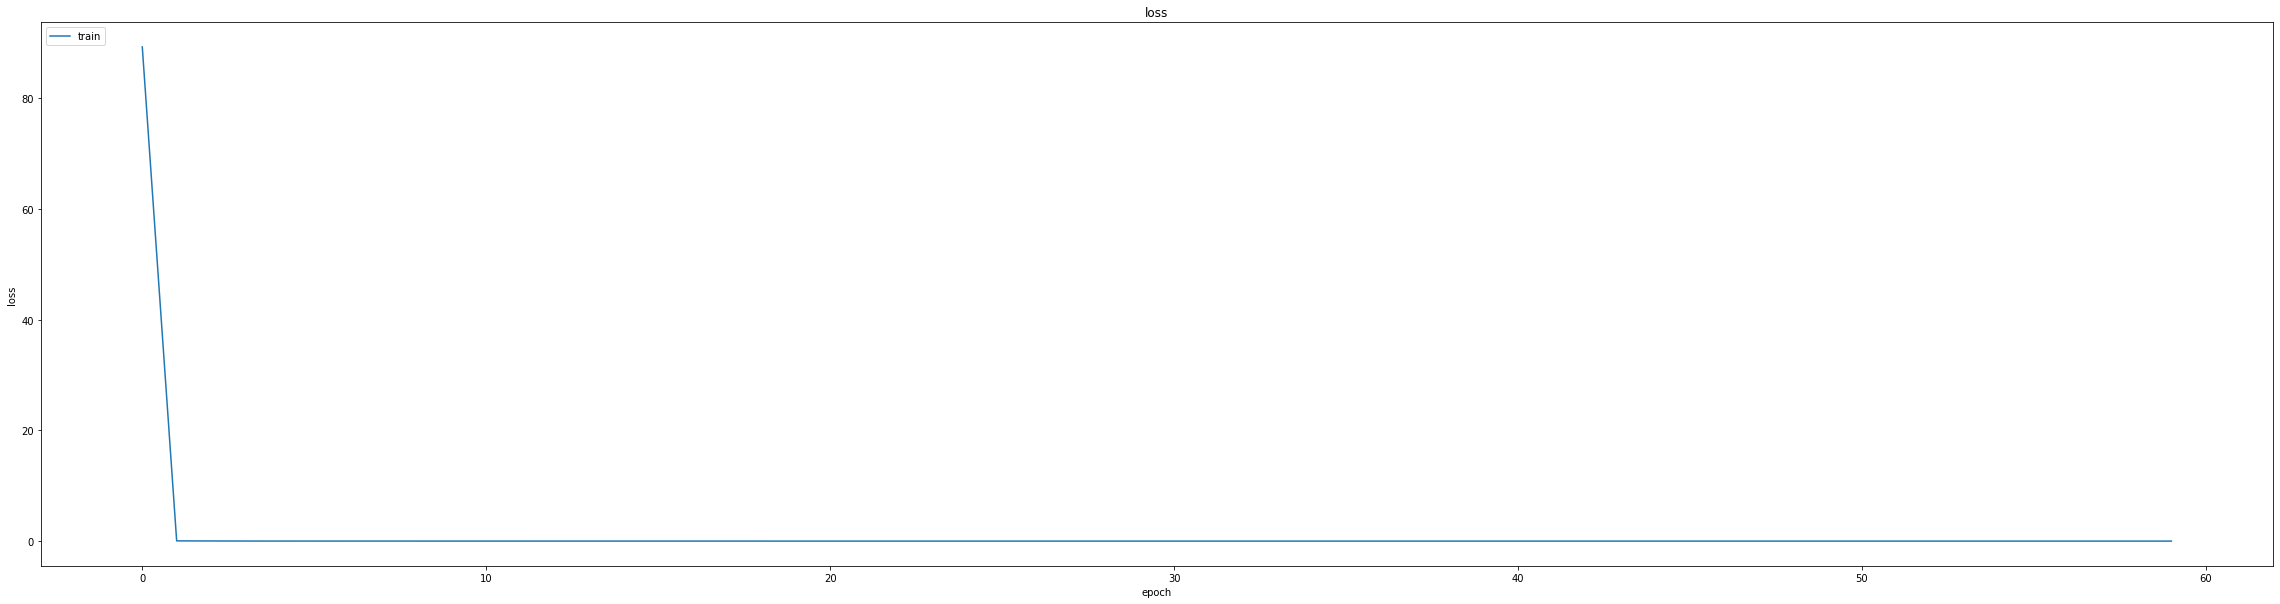

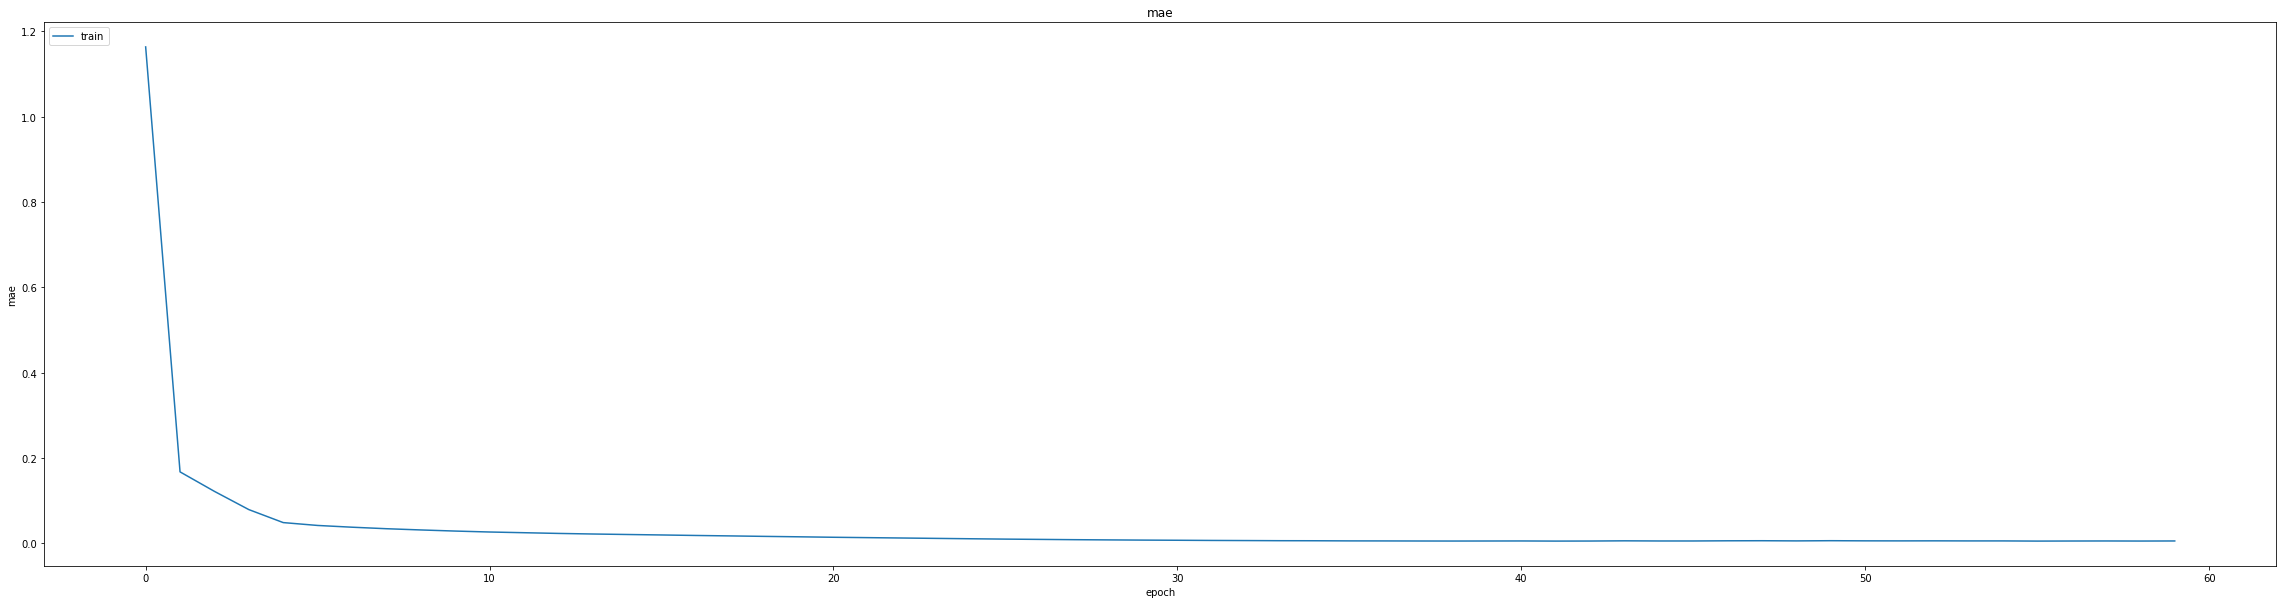

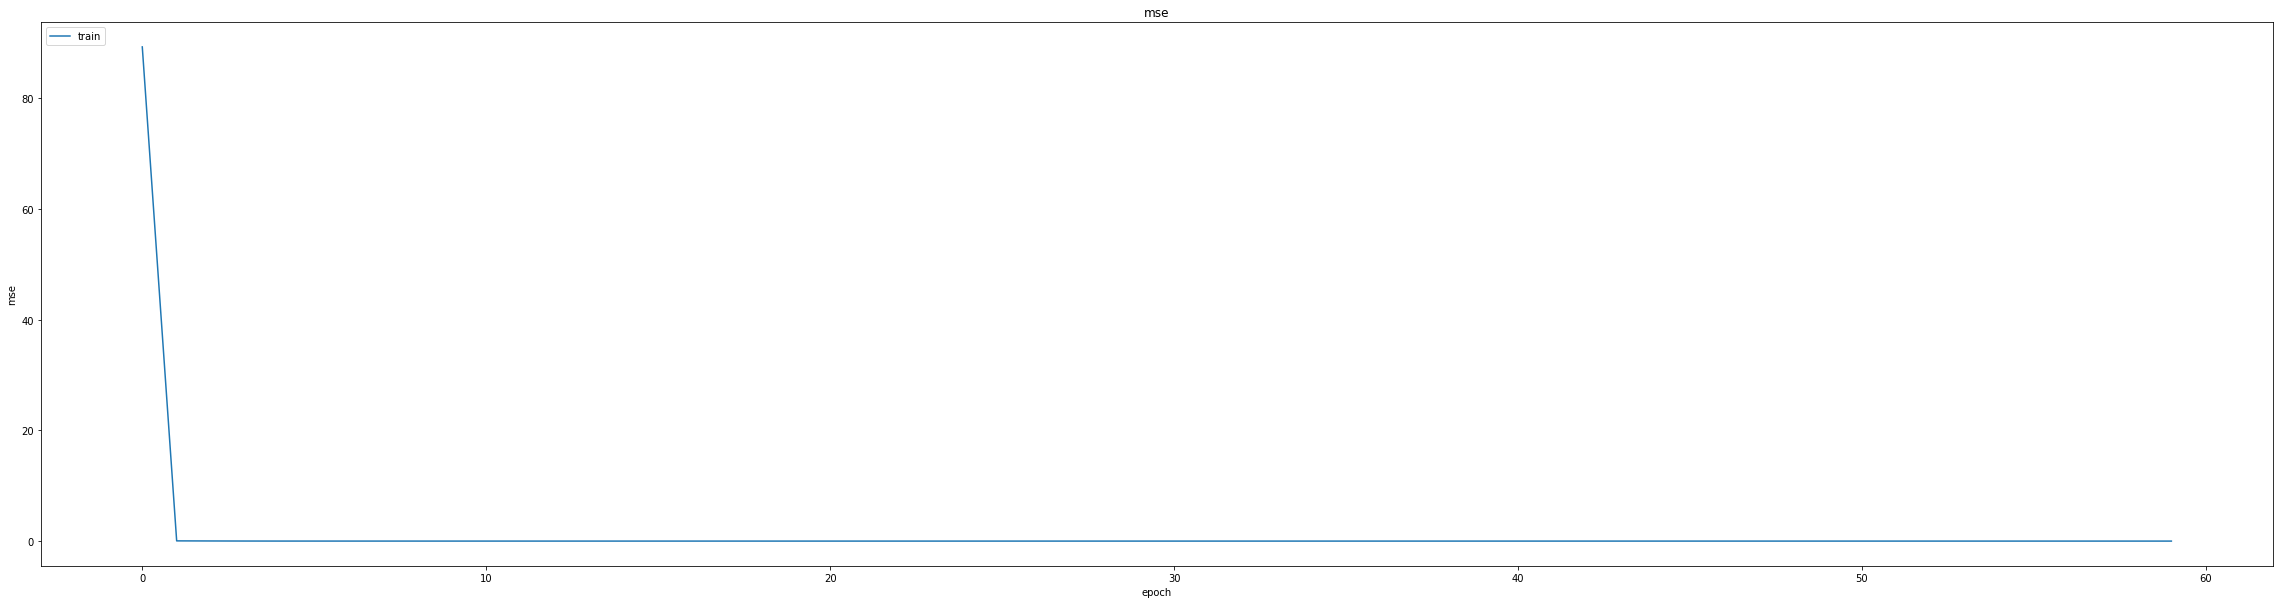

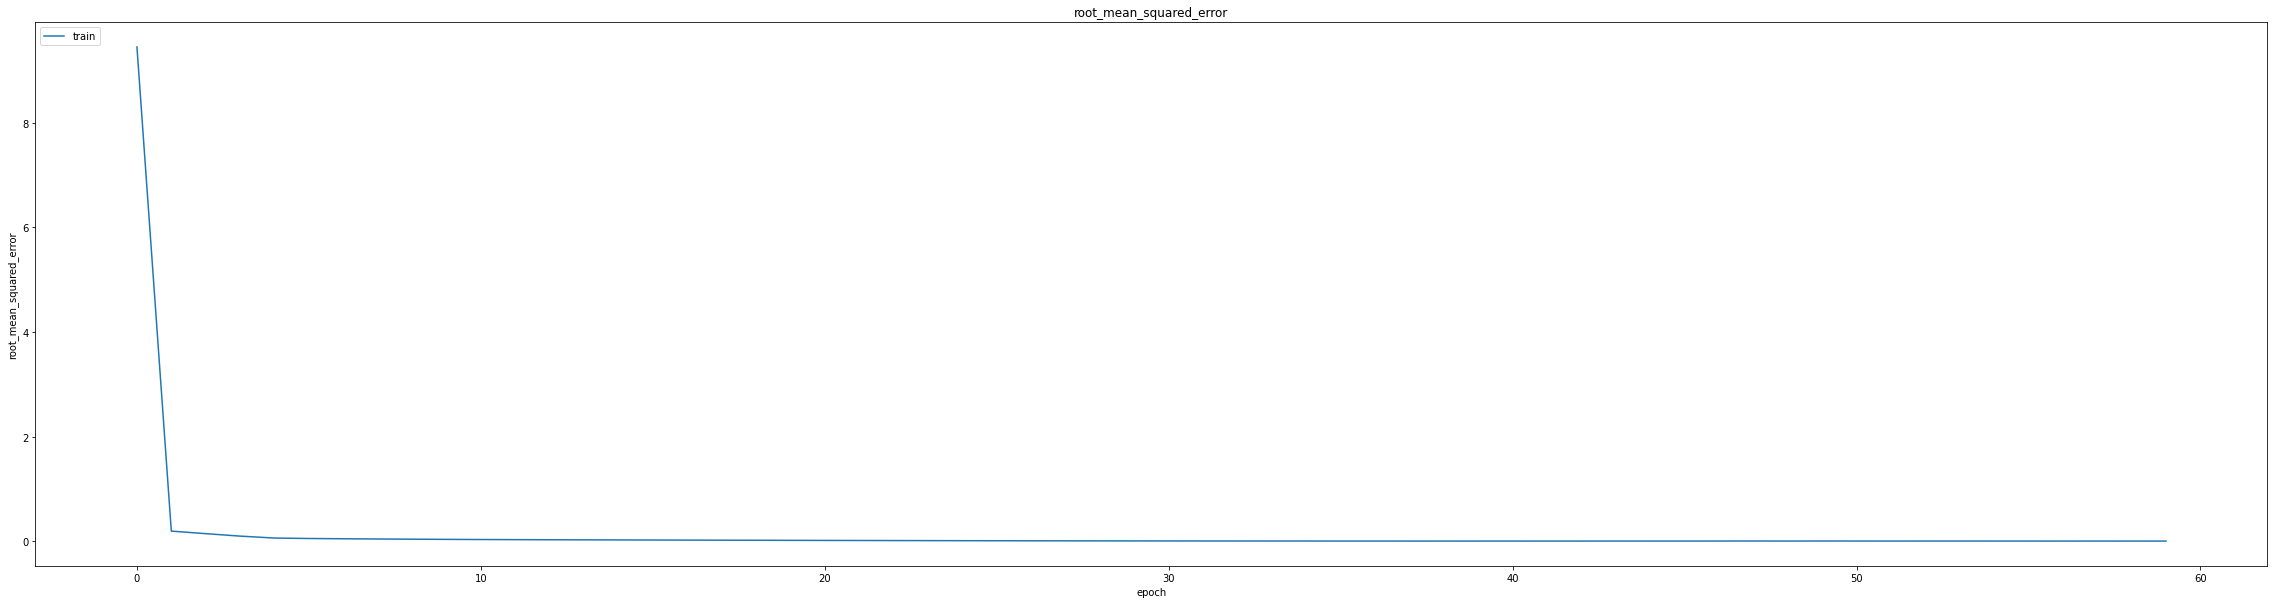

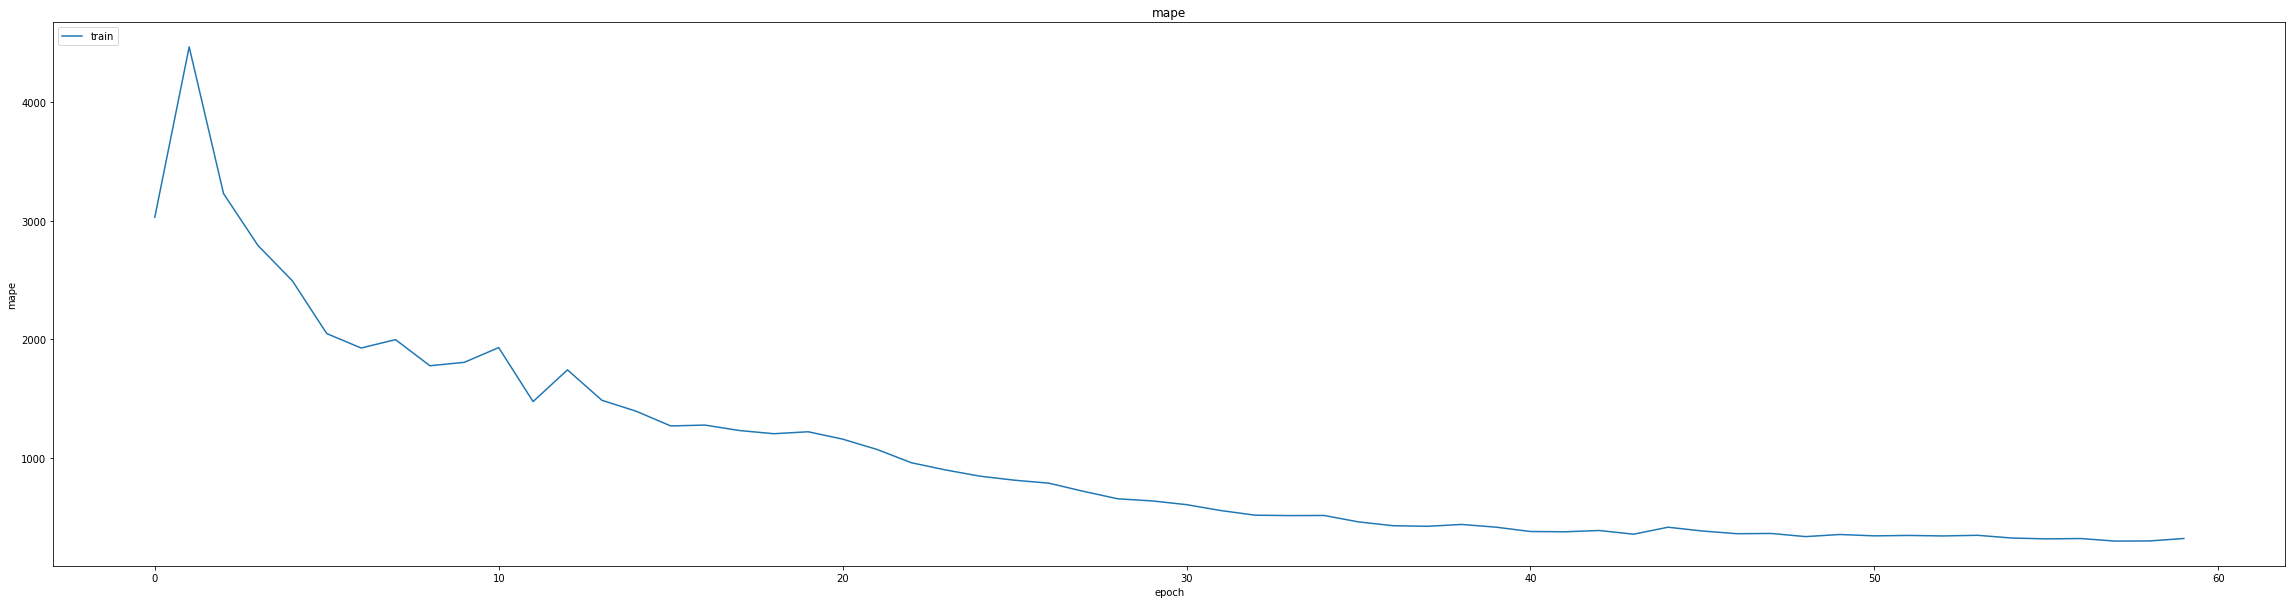

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01577562279999256
0.016724197193980217
1043/1043 [==============================] - 4s 3ms/step
0.99321903218712


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
402/405 [============================>.] - ETA: 0s - loss: 5.0761e-04 - mae: 0.0089 - mse: 5.0761e-04 - root_mean_squared_error: 0.0225 - mape: 335.9561
Epoch 1: val_mse did not improve from 0.00028
405/405 [==============================] - 11s 18ms/step - loss: 5.0431e-04 - mae: 0.0089 - mse: 5.0431e-04 - root_mean_squared_error: 0.0225 - mape: 333.6554 - val_loss: 5.9344e-04 - val_mae: 0.0224 - val_mse: 5.9344e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 1607.1260 - lr: 0.0010
Epoch 2/20
402/405 [============================>.] - ETA: 0s - loss: 2.3694e-05 - mae: 0.0037 - mse: 2.3694e-05 - root_mean_squared_error: 0.0049 - mape: 310.0223
Epoch 2: val_mse did not improve from 0.00028
405/405 [==============================] - 7s 16ms/step - loss: 2.3677e-05 - mae: 0.0037 - mse: 2.3677e-05 - root_mean_squared_error: 0.0049 - mape: 307.8984 - val_loss: 6.0274e-04 - val_mae: 0.0225 - val_mse: 6.0274e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 1477.1062 - lr

405/405 [==============================] - 14s 35ms/step - loss: 3.0926e-05 - mae: 0.0044 - mse: 3.0926e-05 - root_mean_squared_error: 0.0056 - mape: 239.5197 - val_loss: 2.3533e-04 - val_mae: 0.0141 - val_mse: 2.3533e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 1154.1746 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
404/405 [============================>.] - ETA: 0s - loss: 2.0552e-05 - mae: 0.0035 - mse: 2.0552e-05 - root_mean_squared_error: 0.0045 - mape: 236.5532
Epoch 13: val_mse did not improve from 0.00024
405/405 [==============================] - 7s 16ms/step - loss: 2.0542e-05 - mae: 0.0035 - mse: 2.0542e-05 - root_mean_squared_error: 0.0045 - mape: 236.0992 - val_loss: 4.7951e-04 - val_mae: 0.0203 - val_mse: 4.7951e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 1128.1365 - lr: 5.3144e-04
Epoch 14/20
403/405 [============================>.] - ETA: 0s - loss: 2.4151e-05 - mae: 0.0038 - mse: 2.4151e-05 - root_mean_squared_error: 0.0049 - mape:

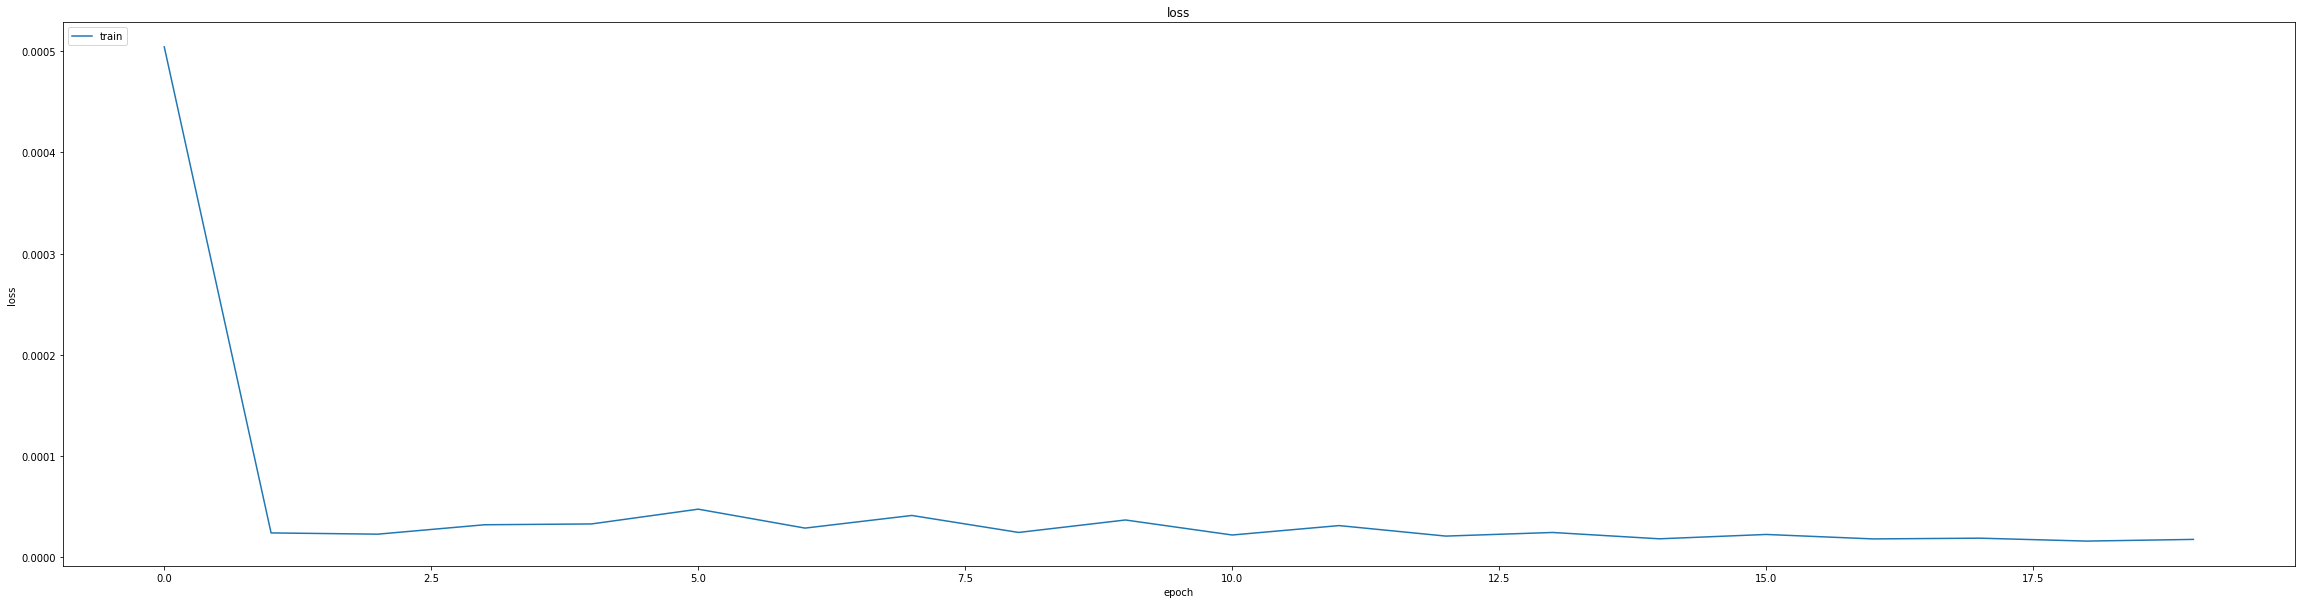

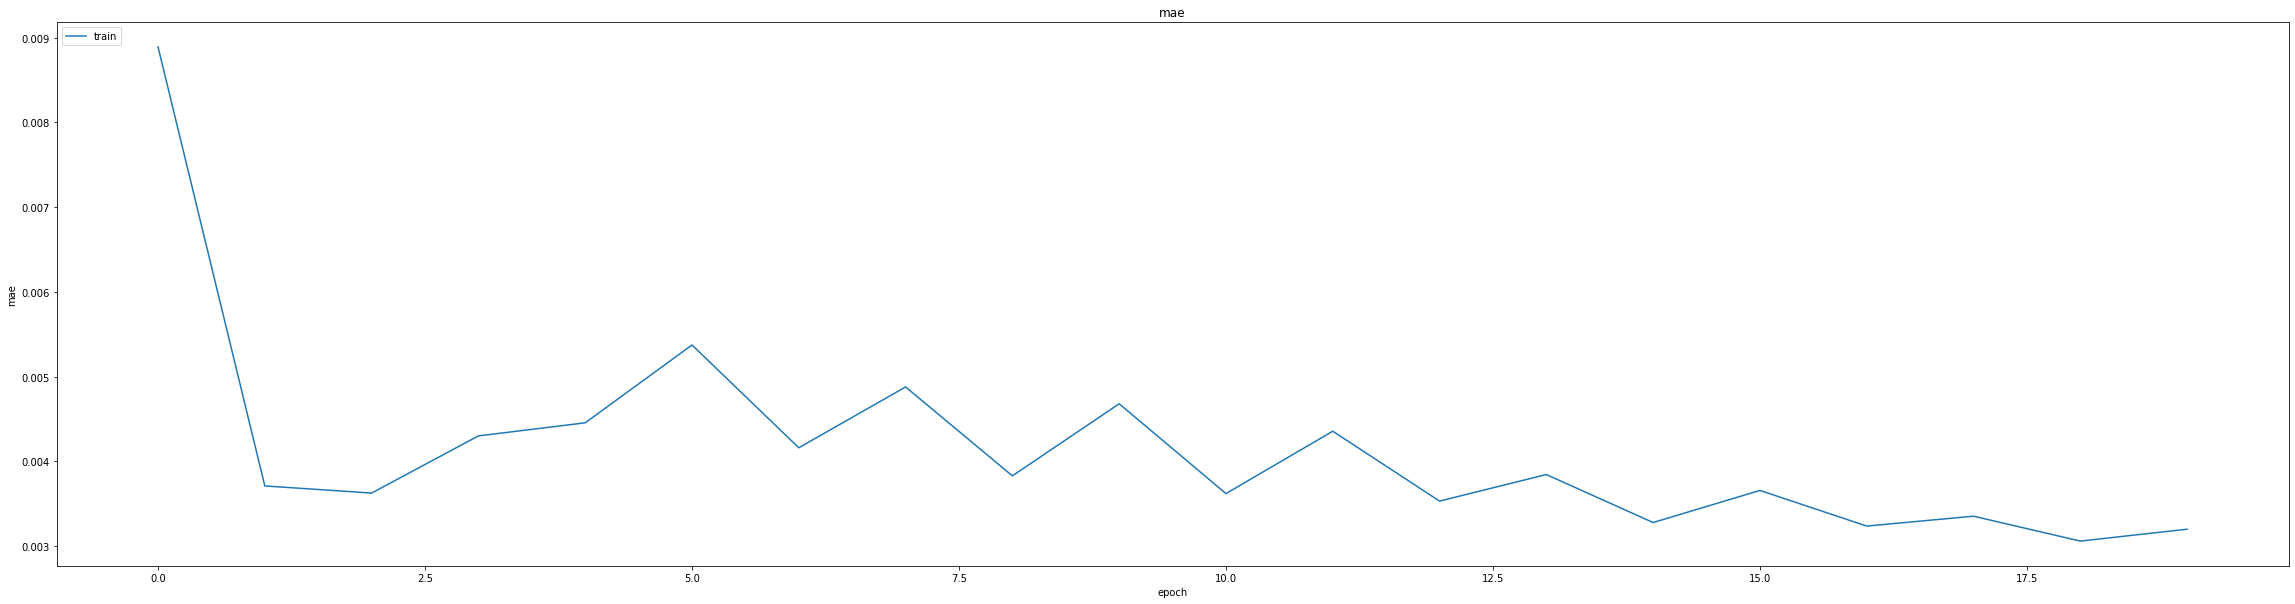

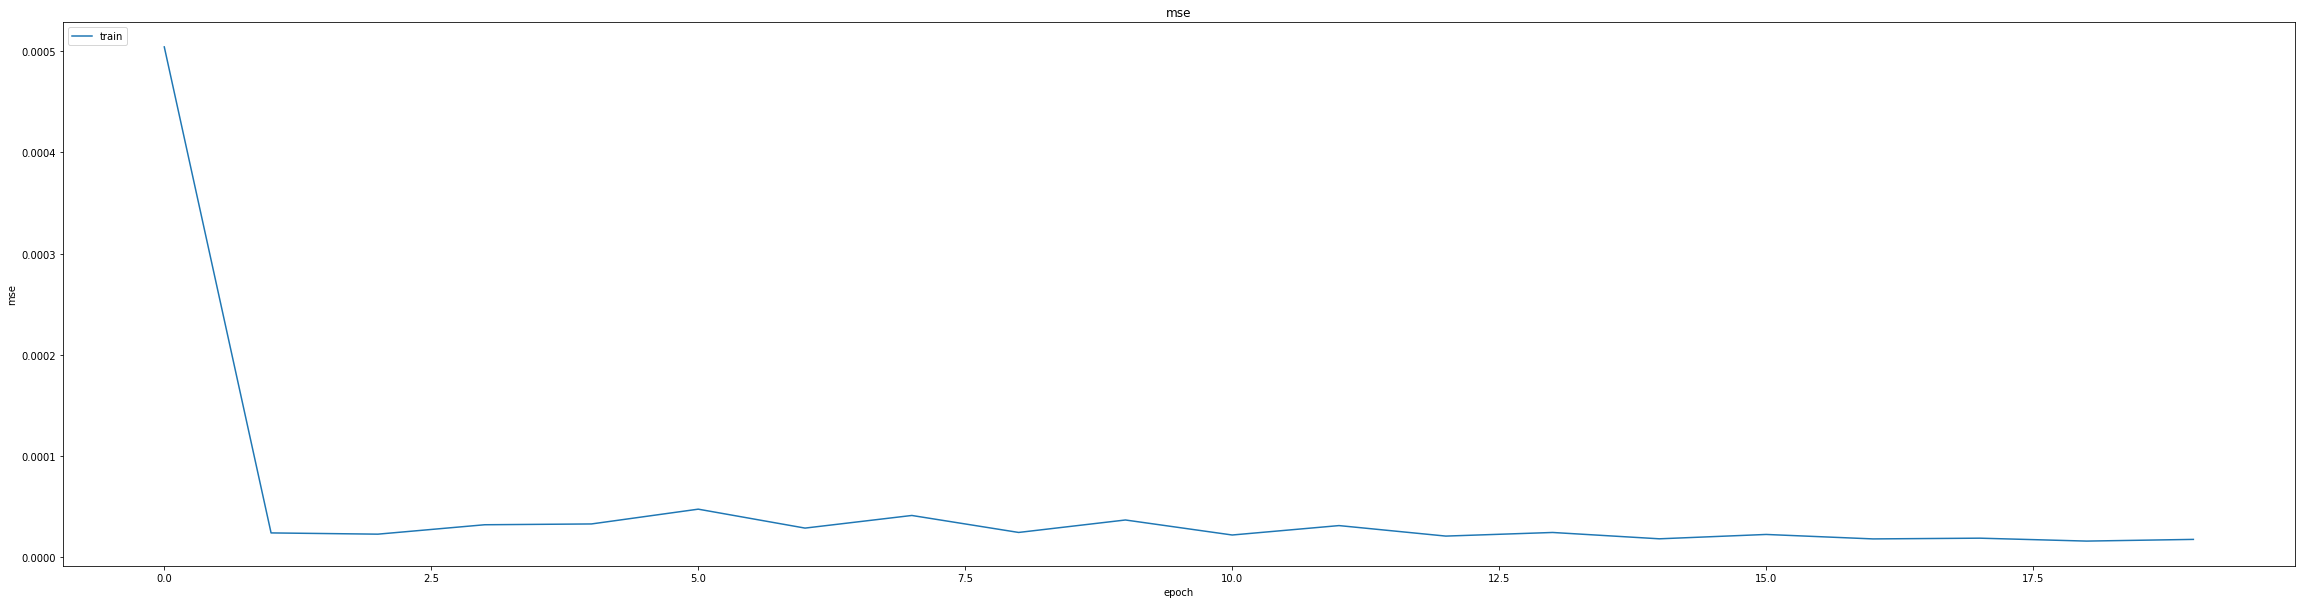

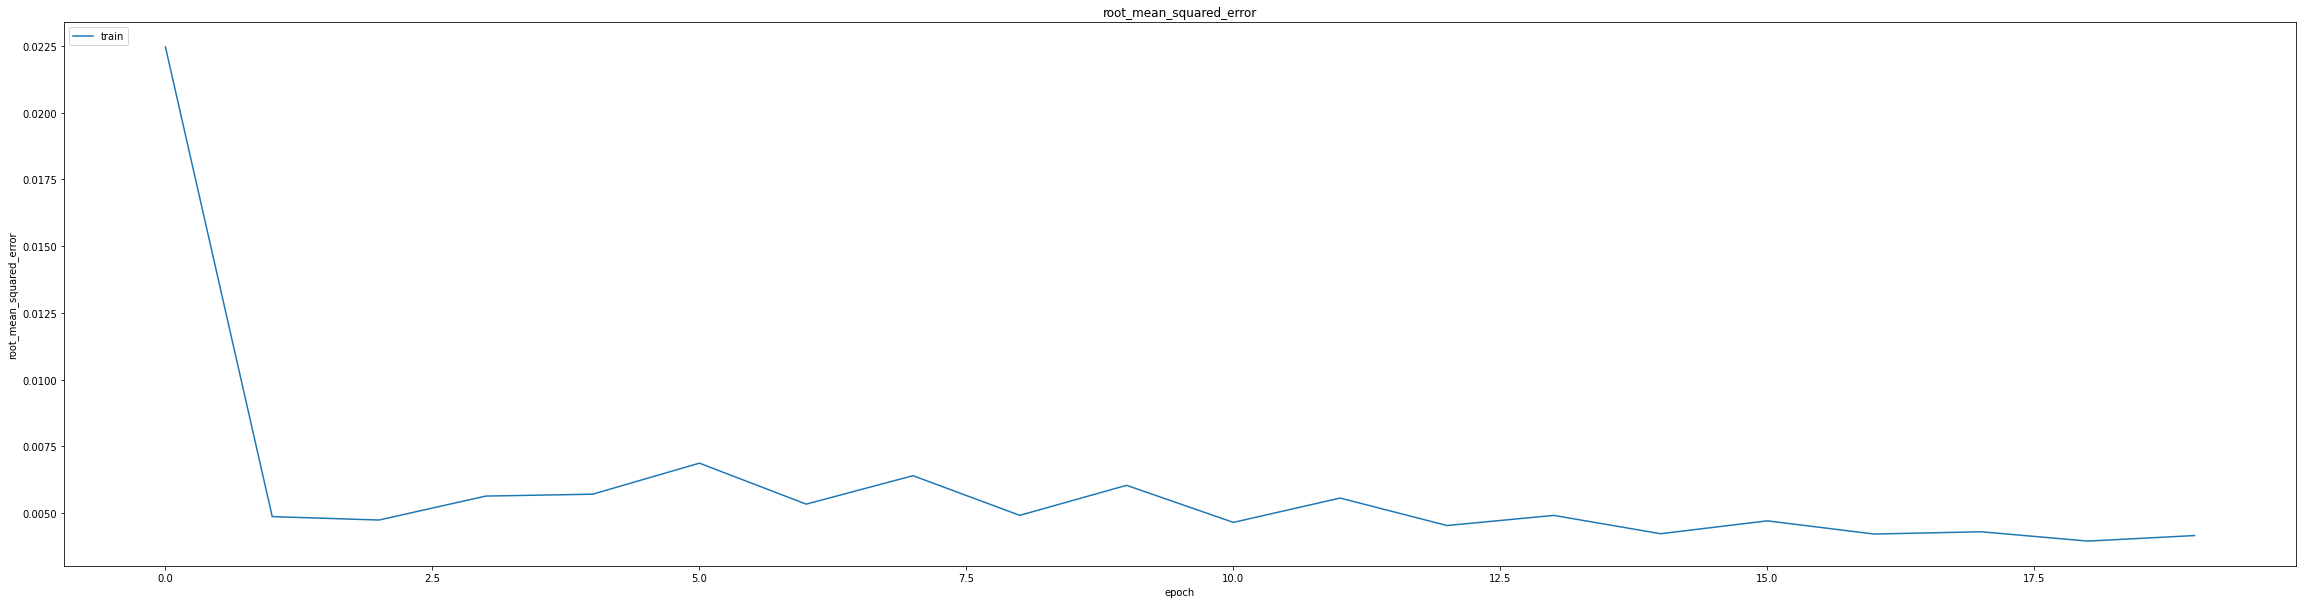

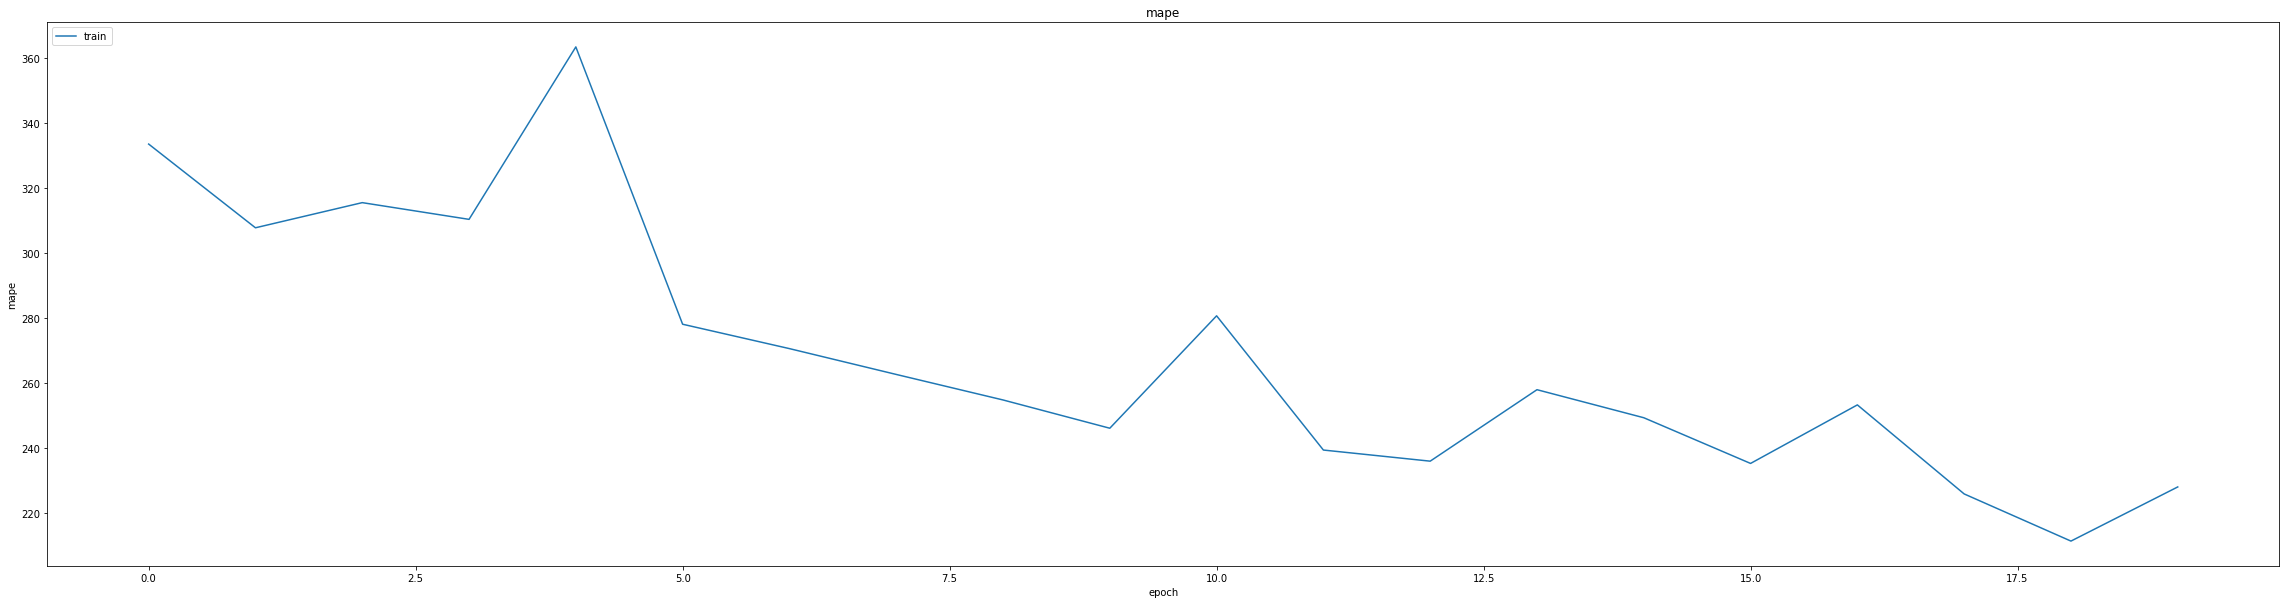

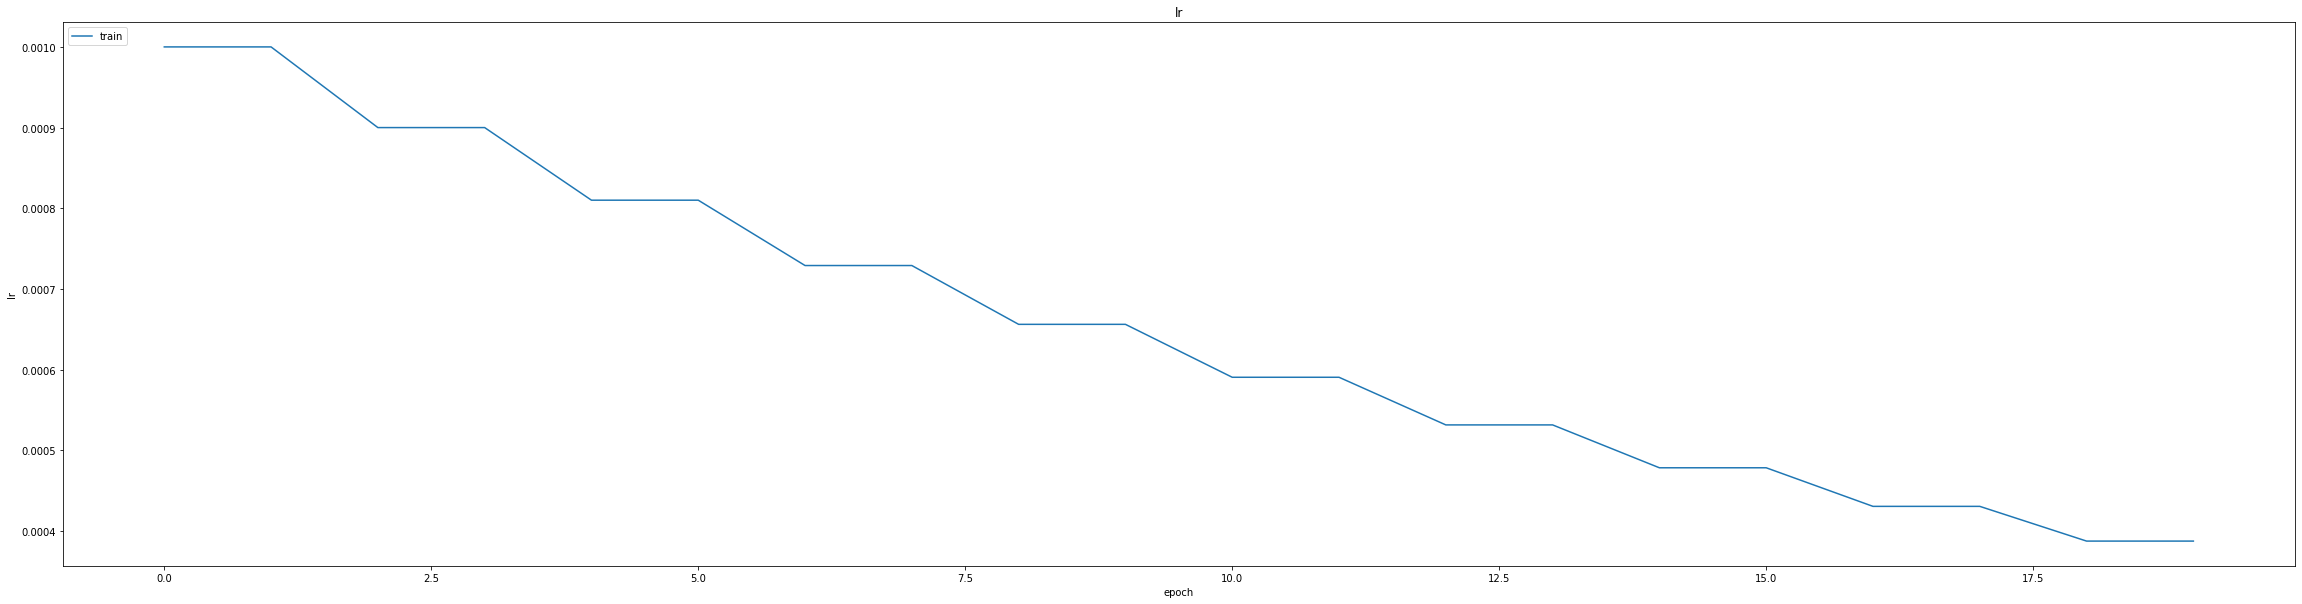

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014122309163212776
0.015340356156229973
1043/1043 [==============================] - 4s 3ms/step
0.9930301066590883


1043/1043 [==============================] - 4s 3ms/step


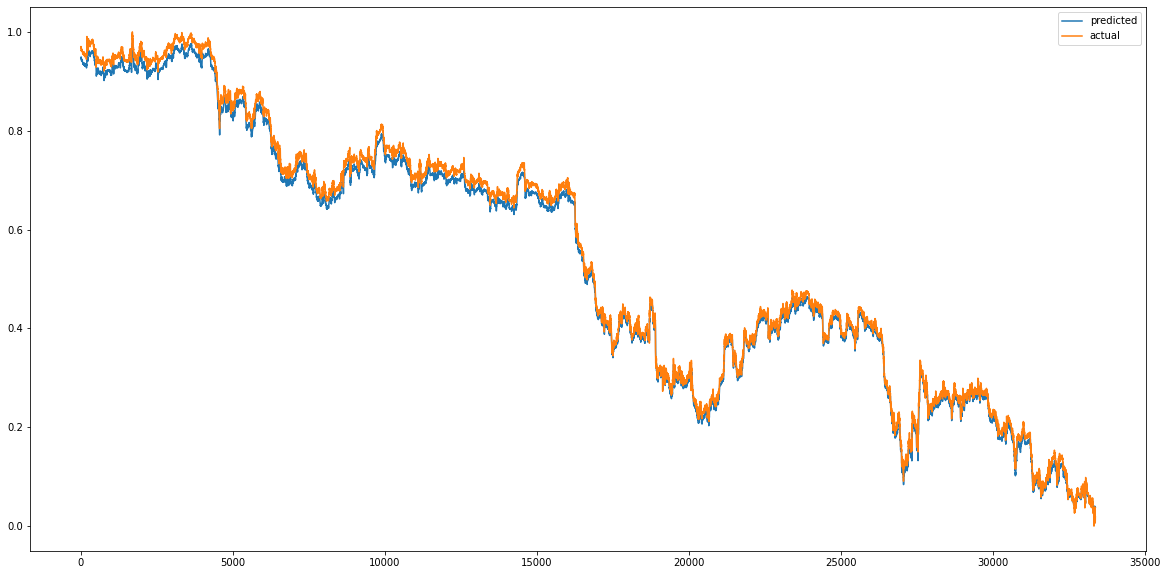

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


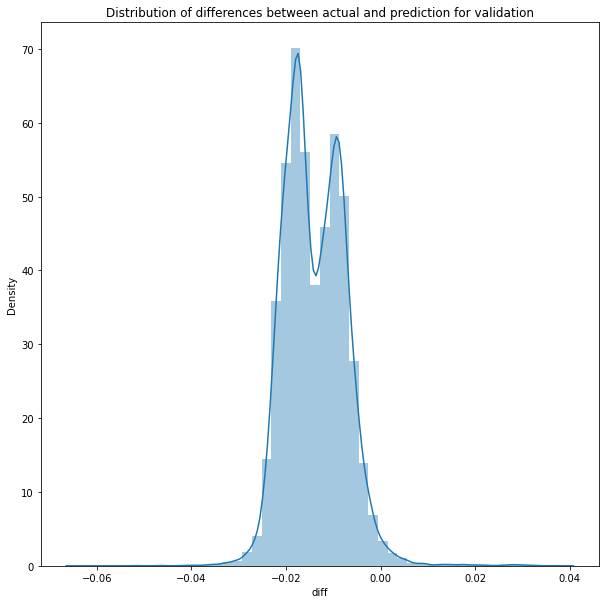

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 4s 4ms/step


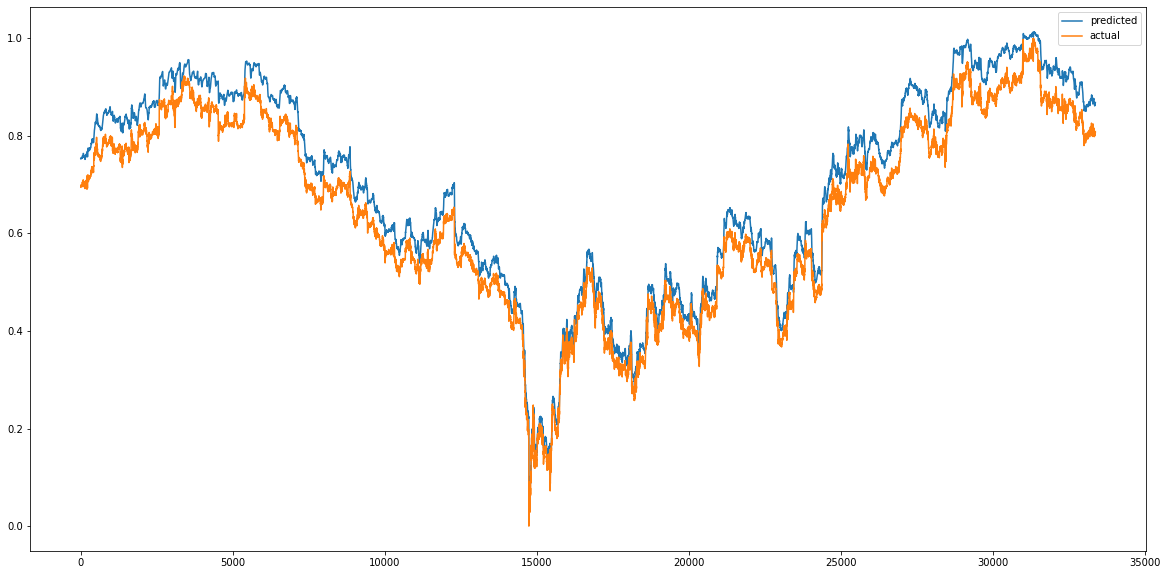

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


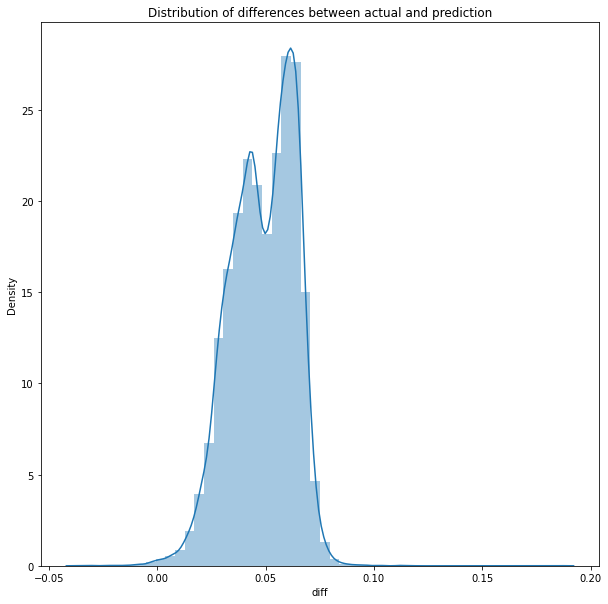

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0025800261179879914
RMSE :  0.05079395749484373
MAE :  0.0486528546498483
1043/1043 [==============================] - 4s 4ms/step
R2_Score  : 0.9344235619614019


count    33376.000000
mean         0.048622
std          0.014695
min         -0.036421
25%          0.037907
50%          0.049822
75%          0.060714
max          0.186660
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
404/405 [============================>.] - ETA: 0s - loss: 242.0778 - mae: 1.9626 - mse: 242.0778 - root_mean_squared_error: 15.5588 - mape: 2085.9675
Epoch 1: val_mse improved from inf to 0.00345, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 17s 34ms/step - loss: 241.6118 - mae: 1.9589 - mse: 241.6118 - root_mean_squared_error: 15.5439 - mape: 2081.9670 - val_loss: 0.0034 - val_mae: 0.0420 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0587 - val_mape: 7186.6177
Epoch 2/60
405/405 [==============================] - ETA: 0s - loss: 9.7732e-04 - mae: 0.0229 - mse: 9.7732e-04 - root_mean_squared_error: 0.0313 - mape: 1374.6760
Epoch 2: val_mse improved from 0.00345 to 0.00186, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 9.7732e-04 - mae: 0.0229 - mse: 9.7732e-04 - root_mean_squared_error: 0.0313 - mape: 1374.6760 - val_loss: 0.0019 - val_mae: 0.0324 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0432 - val_mape: 5632.6929
Epoch 3/60
402/405 [============================>.] - ETA: 0s - loss: 5.3777e-04 - mae: 0.0168 - mse: 5.3777e-04 - root_mean_squared_error: 0.0232 - mape: 1173.7252
Epoch 3: val_mse improved from 0.00186 to 0.00136, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 5.3694e-04 - mae: 0.0168 - mse: 5.3694e-04 - root_mean_squared_error: 0.0232 - mape: 1165.6884 - val_loss: 0.0014 - val_mae: 0.0270 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0369 - val_mape: 5157.5024
Epoch 4/60
402/405 [============================>.] - ETA: 0s - loss: 3.9108e-04 - mae: 0.0143 - mse: 3.9108e-04 - root_mean_squared_error: 0.0198 - mape: 1226.8292
Epoch 4: val_mse improved from 0.00136 to 0.00110, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 33ms/step - loss: 3.9140e-04 - mae: 0.0143 - mse: 3.9140e-04 - root_mean_squared_error: 0.0198 - mape: 1218.4415 - val_loss: 0.0011 - val_mae: 0.0254 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0331 - val_mape: 4641.0361
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 3.1358e-04 - mae: 0.0129 - mse: 3.1358e-04 - root_mean_squared_error: 0.0177 - mape: 1014.7294
Epoch 5: val_mse improved from 0.00110 to 0.00089, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 3.1352e-04 - mae: 0.0129 - mse: 3.1352e-04 - root_mean_squared_error: 0.0177 - mape: 1012.7830 - val_loss: 8.9371e-04 - val_mae: 0.0228 - val_mse: 8.9371e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 4294.6099
Epoch 6/60
404/405 [============================>.] - ETA: 0s - loss: 2.6635e-04 - mae: 0.0119 - mse: 2.6635e-04 - root_mean_squared_error: 0.0163 - mape: 909.6181
Epoch 6: val_mse improved from 0.00089 to 0.00073, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 2.6626e-04 - mae: 0.0119 - mse: 2.6626e-04 - root_mean_squared_error: 0.0163 - mape: 907.8716 - val_loss: 7.3295e-04 - val_mae: 0.0208 - val_mse: 7.3295e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 4009.2610
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 2.3161e-04 - mae: 0.0112 - mse: 2.3161e-04 - root_mean_squared_error: 0.0152 - mape: 848.4785
Epoch 7: val_mse improved from 0.00073 to 0.00069, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 14s 33ms/step - loss: 2.3157e-04 - mae: 0.0112 - mse: 2.3157e-04 - root_mean_squared_error: 0.0152 - mape: 846.8500 - val_loss: 6.8604e-04 - val_mae: 0.0211 - val_mse: 6.8604e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 3768.8196
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 2.0784e-04 - mae: 0.0107 - mse: 2.0784e-04 - root_mean_squared_error: 0.0144 - mape: 901.8358
Epoch 8: val_mse improved from 0.00069 to 0.00055, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 32ms/step - loss: 2.0783e-04 - mae: 0.0107 - mse: 2.0783e-04 - root_mean_squared_error: 0.0144 - mape: 900.1049 - val_loss: 5.5403e-04 - val_mae: 0.0188 - val_mse: 5.5403e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 3639.5903
Epoch 9/60
403/405 [============================>.] - ETA: 0s - loss: 1.8680e-04 - mae: 0.0101 - mse: 1.8680e-04 - root_mean_squared_error: 0.0137 - mape: 738.7595
Epoch 9: val_mse did not improve from 0.00055
405/405 [==============================] - 6s 15ms/step - loss: 1.8683e-04 - mae: 0.0101 - mse: 1.8683e-04 - root_mean_squared_error: 0.0137 - mape: 735.5257 - val_loss: 5.6967e-04 - val_mae: 0.0198 - val_mse: 5.6967e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 3532.1682
Epoch 10/60
404/405 [============================>.] - ETA: 0s - loss: 1.6784e-04 - mae: 0.0096 - mse: 1.6784e-04 - root_mean_squared_error: 0.0130 - mape: 741.1075
Epoch 10: val_mse improved from 0.00055 to 0.00051, saving mod

405/405 [==============================] - 13s 33ms/step - loss: 1.6775e-04 - mae: 0.0096 - mse: 1.6775e-04 - root_mean_squared_error: 0.0130 - mape: 739.6838 - val_loss: 5.0546e-04 - val_mae: 0.0185 - val_mse: 5.0546e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 3439.9272
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 1.5386e-04 - mae: 0.0092 - mse: 1.5386e-04 - root_mean_squared_error: 0.0124 - mape: 747.6675
Epoch 11: val_mse improved from 0.00051 to 0.00048, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 13s 33ms/step - loss: 1.5386e-04 - mae: 0.0092 - mse: 1.5386e-04 - root_mean_squared_error: 0.0124 - mape: 747.6675 - val_loss: 4.8329e-04 - val_mae: 0.0183 - val_mse: 4.8329e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 3343.7432
Epoch 12/60
405/405 [==============================] - ETA: 0s - loss: 1.4239e-04 - mae: 0.0089 - mse: 1.4239e-04 - root_mean_squared_error: 0.0119 - mape: 670.6791
Epoch 12: val_mse did not improve from 0.00048
405/405 [==============================] - 6s 15ms/step - loss: 1.4239e-04 - mae: 0.0089 - mse: 1.4239e-04 - root_mean_squared_error: 0.0119 - mape: 670.6791 - val_loss: 6.1040e-04 - val_mae: 0.0219 - val_mse: 6.1040e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 3234.3081
Epoch 13/60
404/405 [============================>.] - ETA: 0s - loss: 1.3162e-04 - mae: 0.0086 - mse: 1.3162e-04 - root_mean_squared_error: 0.0115 - mape: 2.2229
Epoch 13: val_mse improved from 0.00048 to 0.00041, saving mod

405/405 [==============================] - 13s 31ms/step - loss: 1.3166e-04 - mae: 0.0086 - mse: 1.3166e-04 - root_mean_squared_error: 0.0115 - mape: 656.2159 - val_loss: 4.0834e-04 - val_mae: 0.0166 - val_mse: 4.0834e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 3171.9185
Epoch 14/60
402/405 [============================>.] - ETA: 0s - loss: 1.2102e-04 - mae: 0.0083 - mse: 1.2102e-04 - root_mean_squared_error: 0.0110 - mape: 697.6673
Epoch 14: val_mse did not improve from 0.00041
405/405 [==============================] - 6s 15ms/step - loss: 1.2111e-04 - mae: 0.0083 - mse: 1.2111e-04 - root_mean_squared_error: 0.0110 - mape: 692.8947 - val_loss: 6.0142e-04 - val_mae: 0.0219 - val_mse: 6.0142e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 3115.4146
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 1.1312e-04 - mae: 0.0080 - mse: 1.1312e-04 - root_mean_squared_error: 0.0106 - mape: 671.2286
Epoch 15: val_mse did not improve from 0.00041
405/405 [====

405/405 [==============================] - 13s 33ms/step - loss: 7.8319e-05 - mae: 0.0067 - mse: 7.8319e-05 - root_mean_squared_error: 0.0088 - mape: 551.1091 - val_loss: 4.0038e-04 - val_mae: 0.0173 - val_mse: 4.0038e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 2688.5442
Epoch 22/60
405/405 [==============================] - ETA: 0s - loss: 7.4169e-05 - mae: 0.0065 - mse: 7.4169e-05 - root_mean_squared_error: 0.0086 - mape: 566.8226
Epoch 22: val_mse improved from 0.00040 to 0.00039, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 14s 34ms/step - loss: 7.4169e-05 - mae: 0.0065 - mse: 7.4169e-05 - root_mean_squared_error: 0.0086 - mape: 566.8226 - val_loss: 3.9462e-04 - val_mae: 0.0174 - val_mse: 3.9462e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 2621.3037
Epoch 23/60
404/405 [============================>.] - ETA: 0s - loss: 7.0784e-05 - mae: 0.0064 - mse: 7.0784e-05 - root_mean_squared_error: 0.0084 - mape: 535.1857
Epoch 23: val_mse did not improve from 0.00039
405/405 [==============================] - 6s 15ms/step - loss: 7.0762e-05 - mae: 0.0064 - mse: 7.0762e-05 - root_mean_squared_error: 0.0084 - mape: 534.1575 - val_loss: 4.7517e-04 - val_mae: 0.0196 - val_mse: 4.7517e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 2550.7393
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 6.7592e-05 - mae: 0.0063 - mse: 6.7592e-05 - root_mean_squared_error: 0.0082 - mape: 567.9691
Epoch 24: val_mse did not improve from 0.00039
405/405 [====

405/405 [==============================] - 13s 32ms/step - loss: 5.0355e-05 - mae: 0.0055 - mse: 5.0355e-05 - root_mean_squared_error: 0.0071 - mape: 448.2667 - val_loss: 3.9144e-04 - val_mae: 0.0180 - val_mse: 3.9144e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 2264.2256
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 4.6468e-05 - mae: 0.0052 - mse: 4.6468e-05 - root_mean_squared_error: 0.0068 - mape: 402.4456
Epoch 31: val_mse did not improve from 0.00039
405/405 [==============================] - 6s 15ms/step - loss: 4.6449e-05 - mae: 0.0052 - mse: 4.6449e-05 - root_mean_squared_error: 0.0068 - mape: 401.6727 - val_loss: 5.5180e-04 - val_mae: 0.0218 - val_mse: 5.5180e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 2216.3960
Epoch 32/60
402/405 [============================>.] - ETA: 0s - loss: 4.4255e-05 - mae: 0.0051 - mse: 4.4255e-05 - root_mean_squared_error: 0.0067 - mape: 396.0763
Epoch 32: val_mse did not improve from 0.00039
405/405 [====

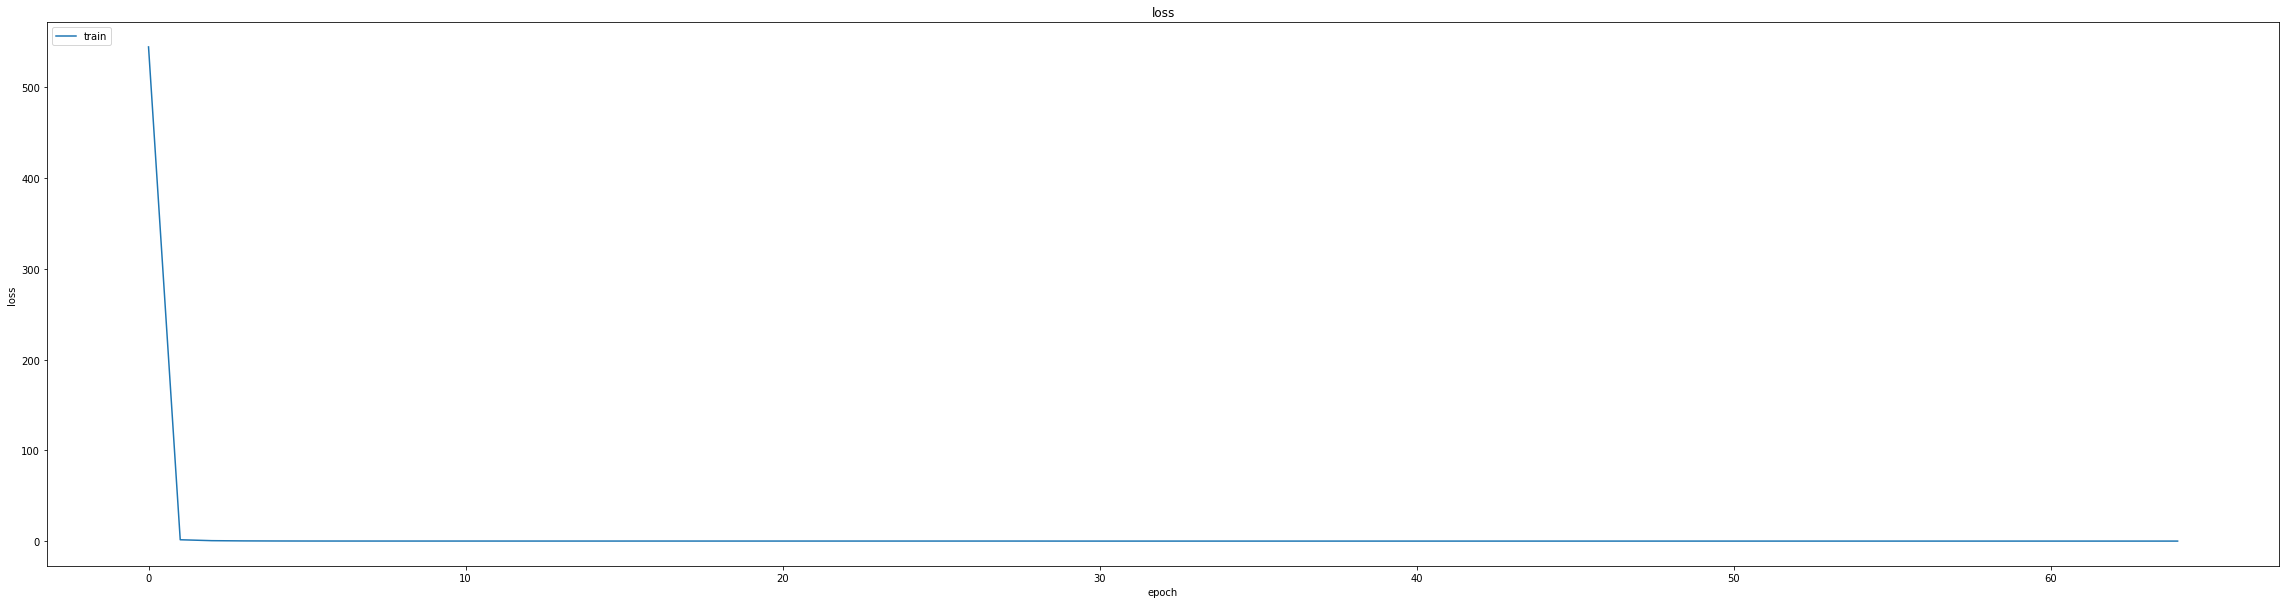

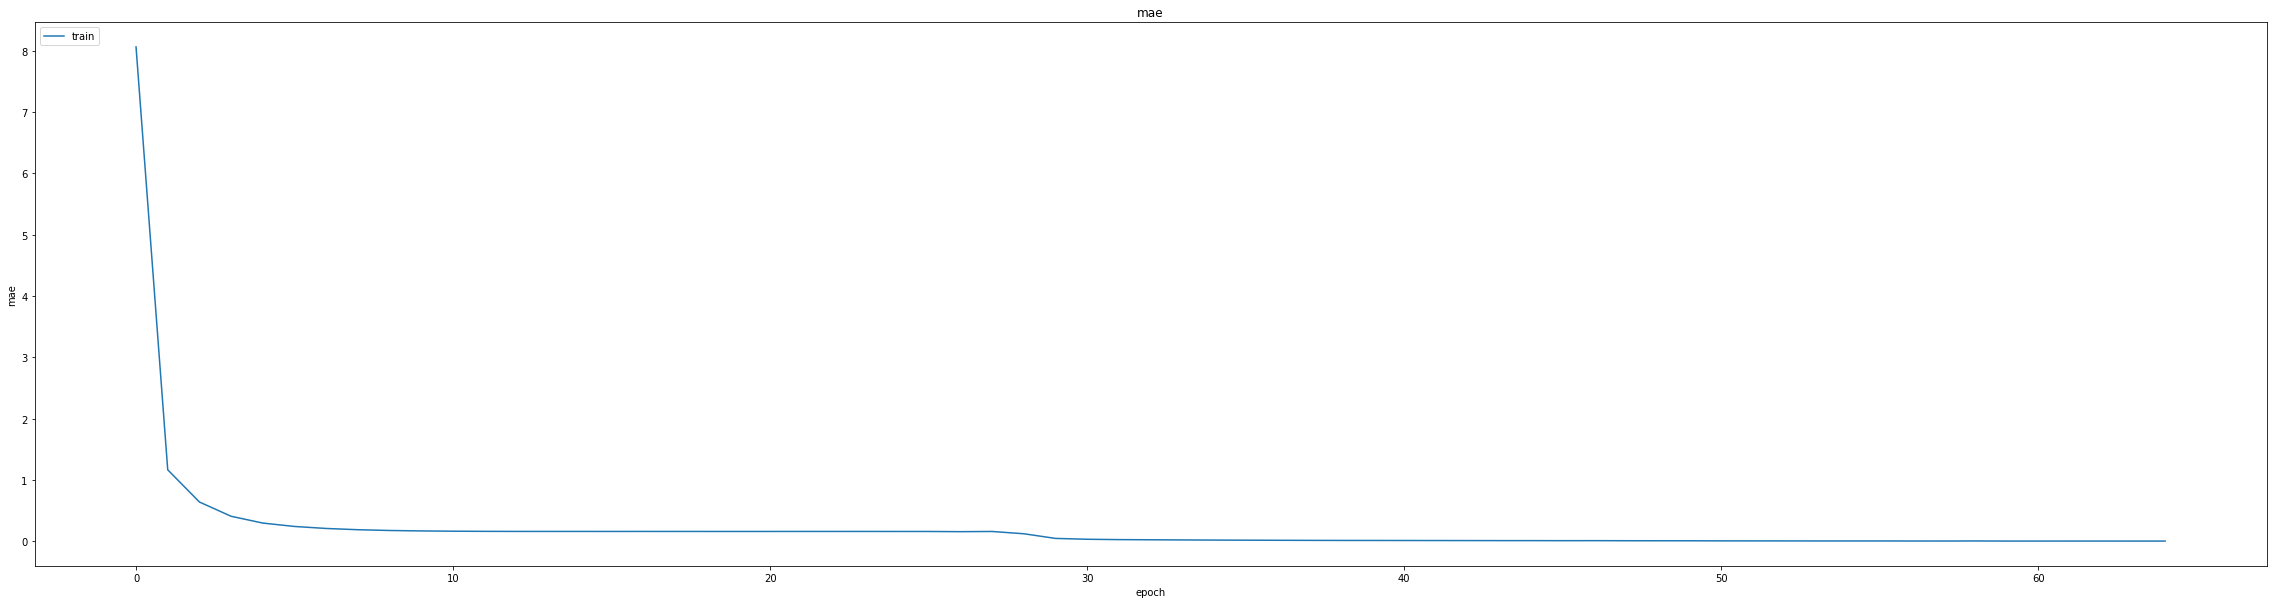

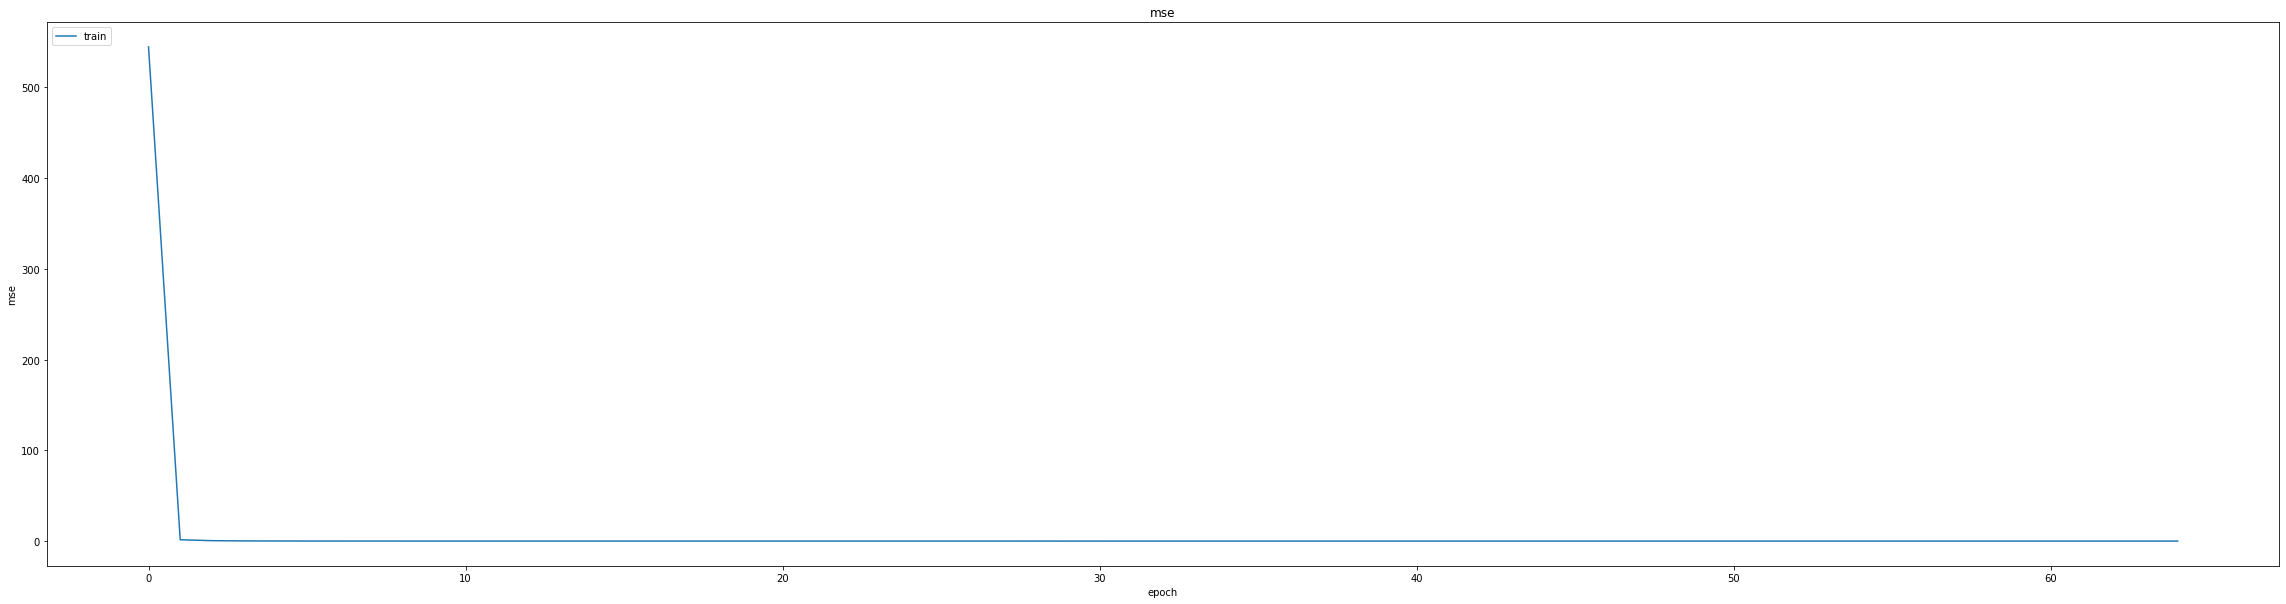

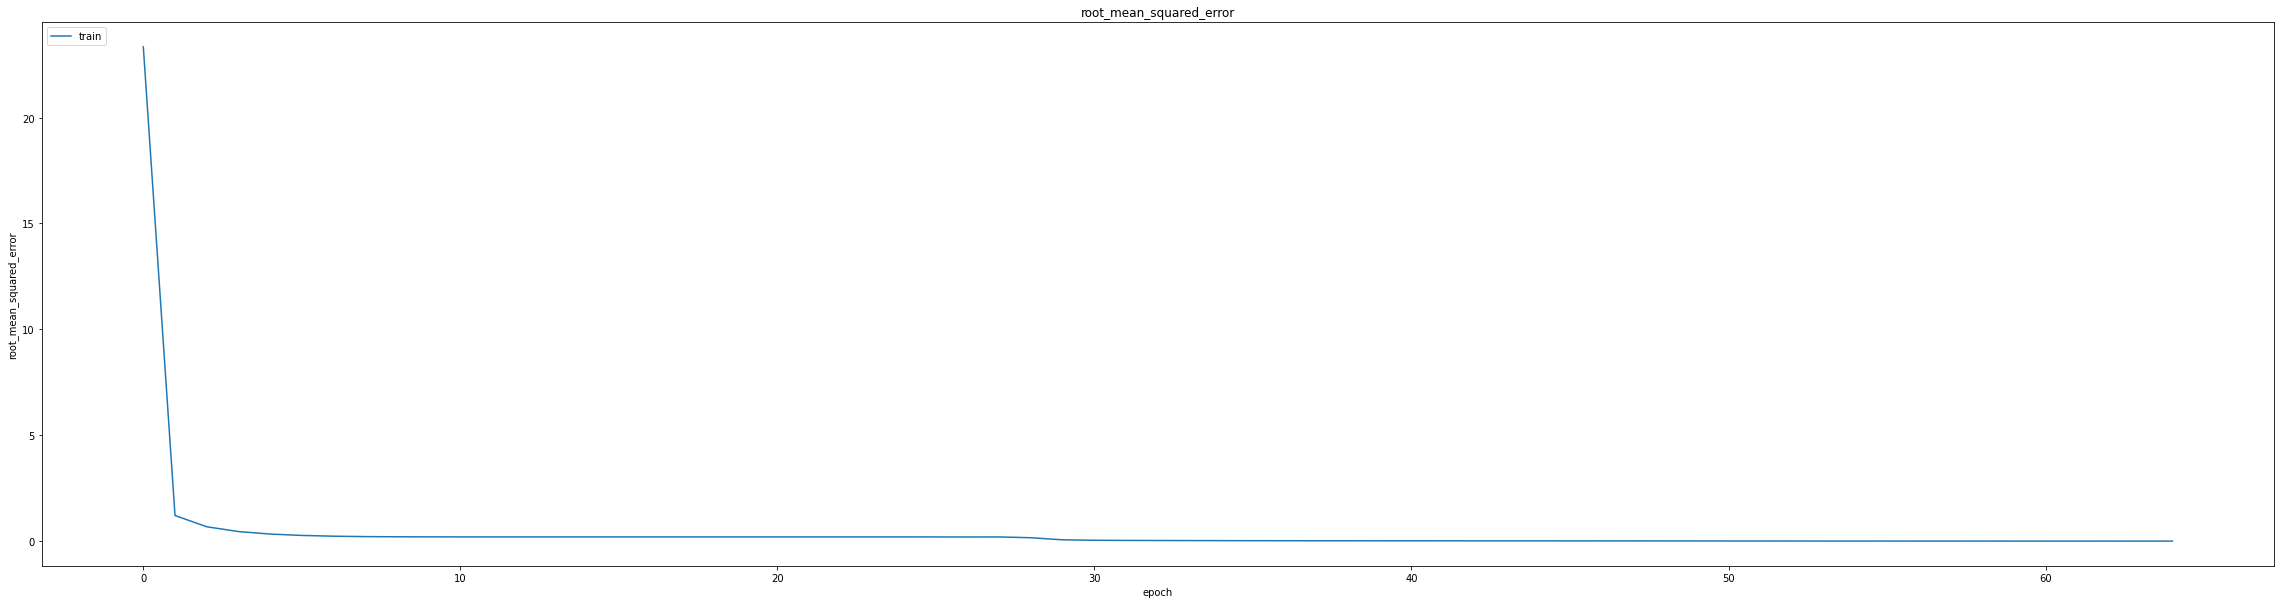

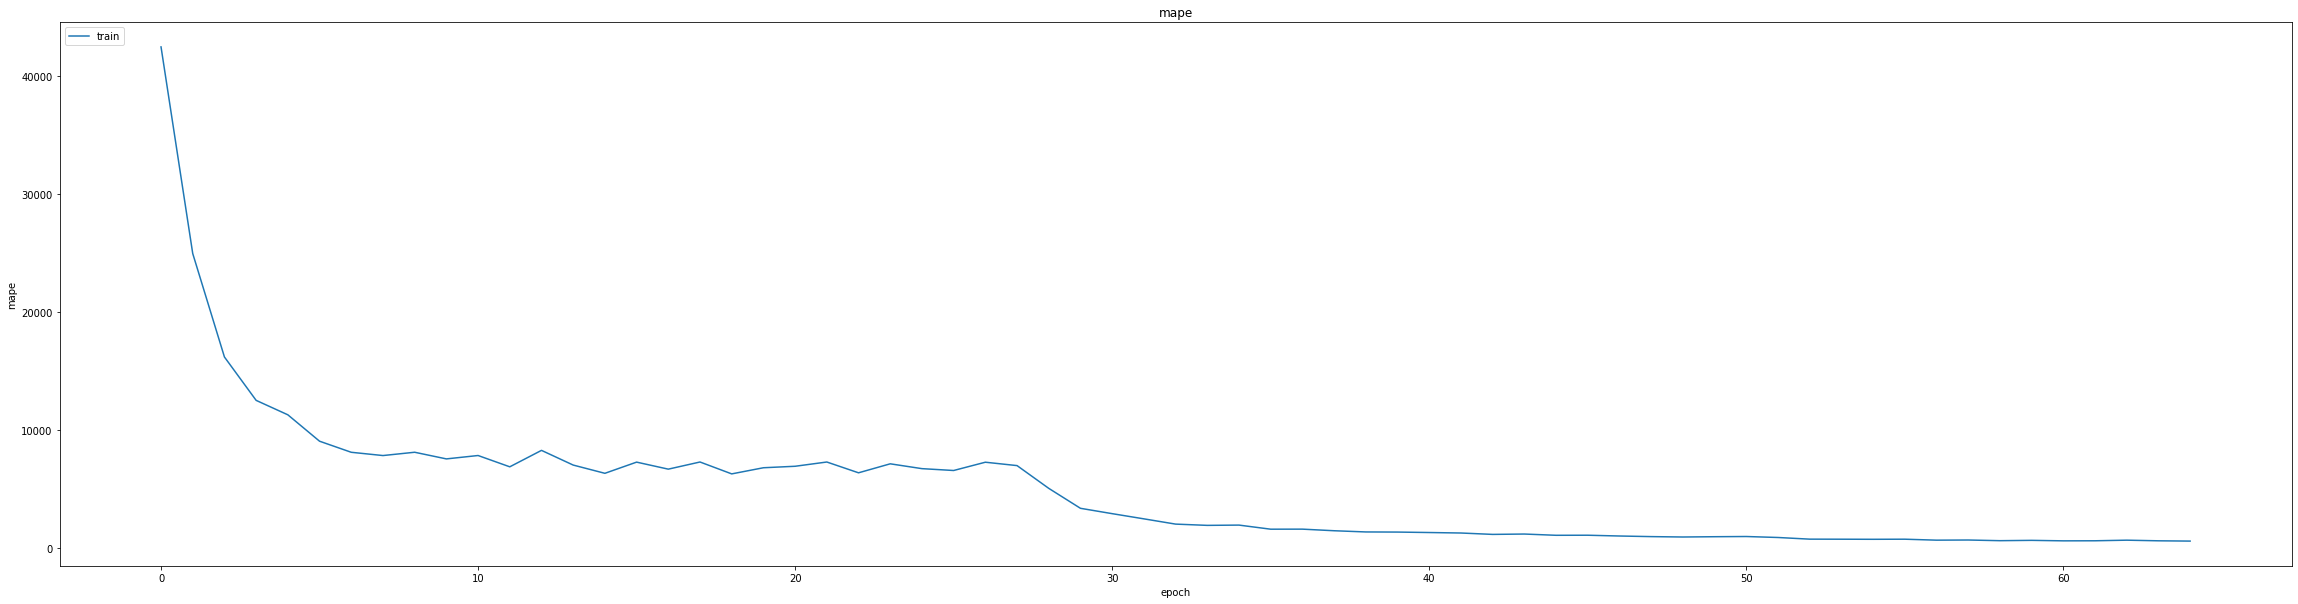

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016551721841096878
0.019784729927778244
1043/1043 [==============================] - 6s 4ms/step
0.9910816084007779


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
402/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0139 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 427.2407
Epoch 1: val_mse improved from 0.00039 to 0.00026, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)


405/405 [==============================] - 18s 38ms/step - loss: 0.0013 - mae: 0.0139 - mse: 0.0013 - root_mean_squared_error: 0.0358 - mape: 424.3180 - val_loss: 2.6449e-04 - val_mae: 0.0144 - val_mse: 2.6449e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 1970.5786 - lr: 0.0010
Epoch 2/20
404/405 [============================>.] - ETA: 0s - loss: 5.1424e-05 - mae: 0.0055 - mse: 5.1424e-05 - root_mean_squared_error: 0.0072 - mape: 383.3777
Epoch 2: val_mse did not improve from 0.00026
405/405 [==============================] - 7s 18ms/step - loss: 5.1409e-05 - mae: 0.0055 - mse: 5.1409e-05 - root_mean_squared_error: 0.0072 - mape: 382.6415 - val_loss: 2.8183e-04 - val_mae: 0.0153 - val_mse: 2.8183e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 1726.8523 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
402/405 [============================>.] - ETA: 0s - loss: 4.1109e-05 - mae: 0.0049 - mse: 4.1109e-05 - root_mean_squared_error: 0.0064 - mape: 329.9843
Epoch 3: 

405/405 [==============================] - 15s 37ms/step - loss: 4.8647e-05 - mae: 0.0054 - mse: 4.8647e-05 - root_mean_squared_error: 0.0070 - mape: 211.1241 - val_loss: 2.2203e-04 - val_mae: 0.0137 - val_mse: 2.2203e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 1526.4886 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
403/405 [============================>.] - ETA: 0s - loss: 3.0608e-05 - mae: 0.0043 - mse: 3.0608e-05 - root_mean_squared_error: 0.0055 - mape: 219.1935
Epoch 9: val_mse did not improve from 0.00022
405/405 [==============================] - 7s 17ms/step - loss: 3.0804e-05 - mae: 0.0044 - mse: 3.0804e-05 - root_mean_squared_error: 0.0056 - mape: 218.2357 - val_loss: 8.8688e-04 - val_mae: 0.0284 - val_mse: 8.8688e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 1376.7220 - lr: 6.5610e-04
Epoch 10/20
405/405 [==============================] - ETA: 0s - loss: 4.0988e-05 - mae: 0.0051 - mse: 4.0988e-05 - root_mean_squared_error: 0.0064 - mape: 2

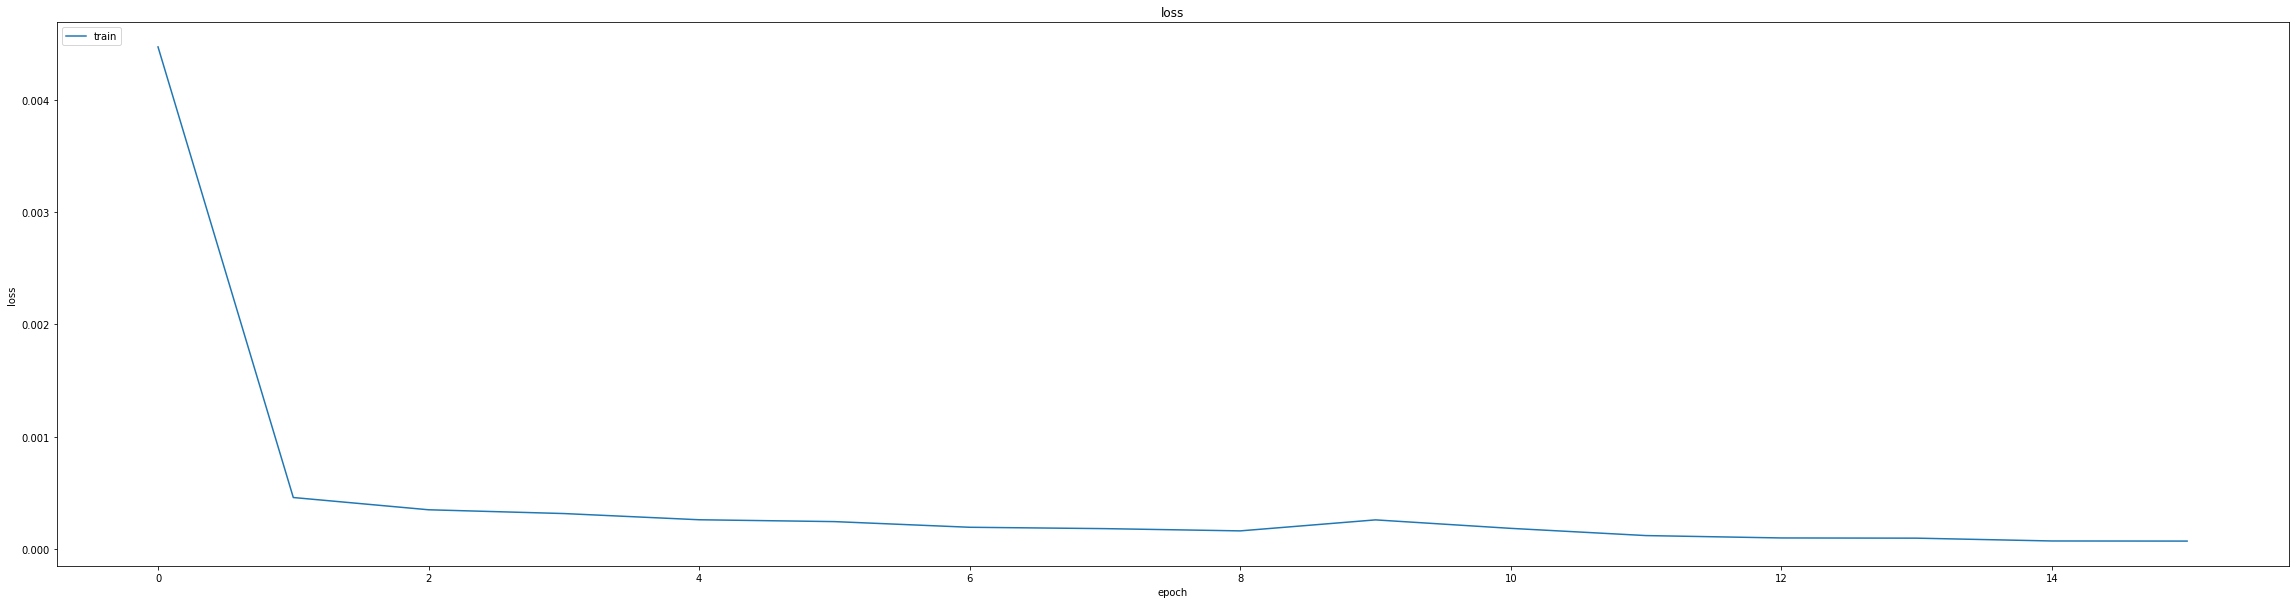

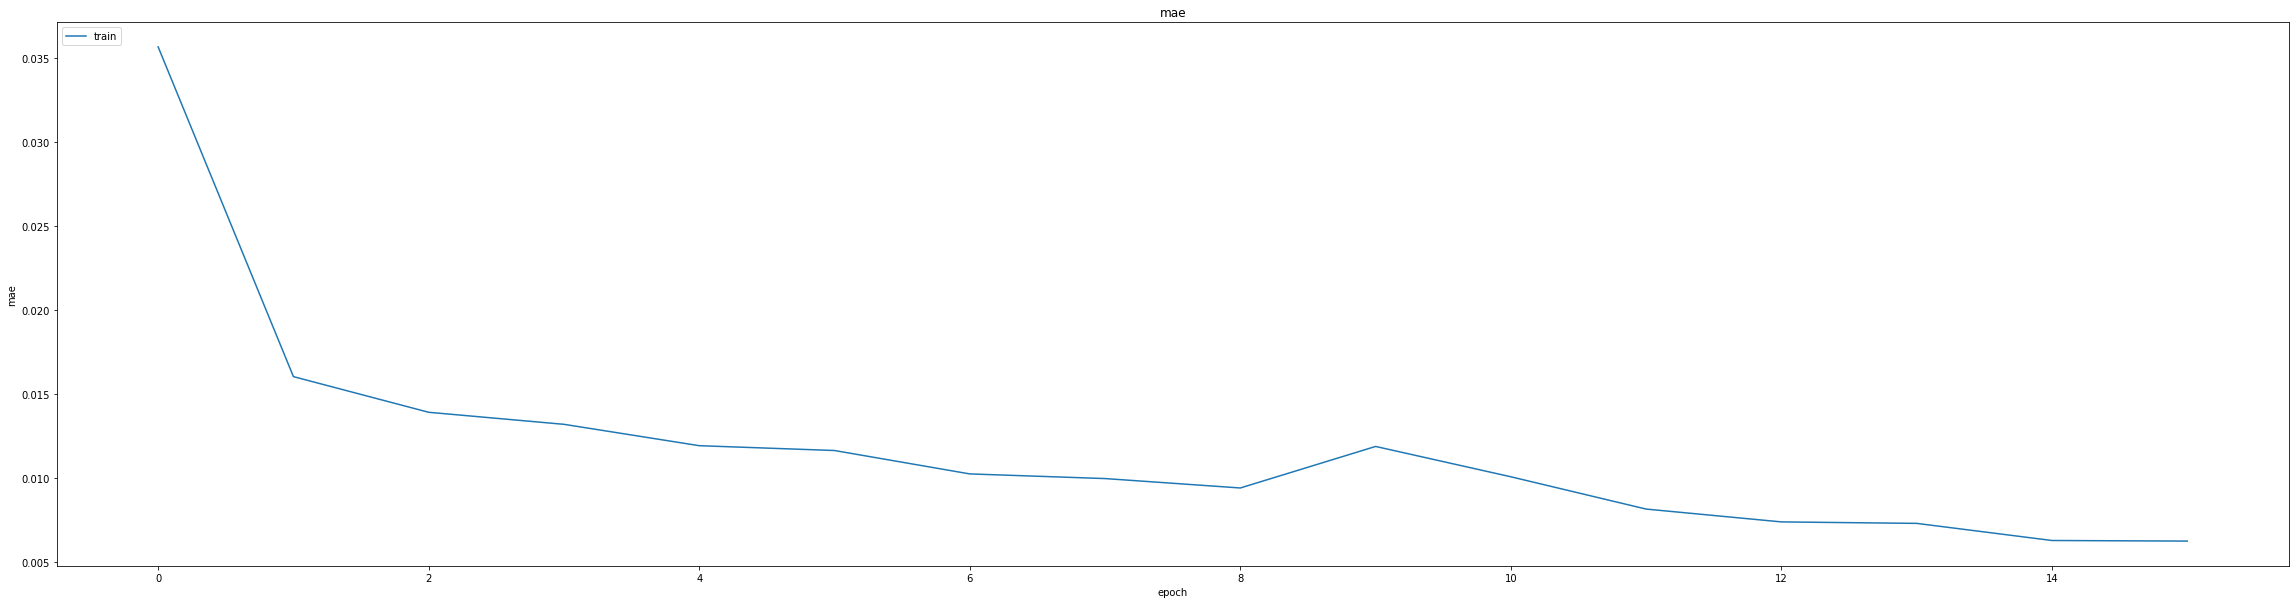

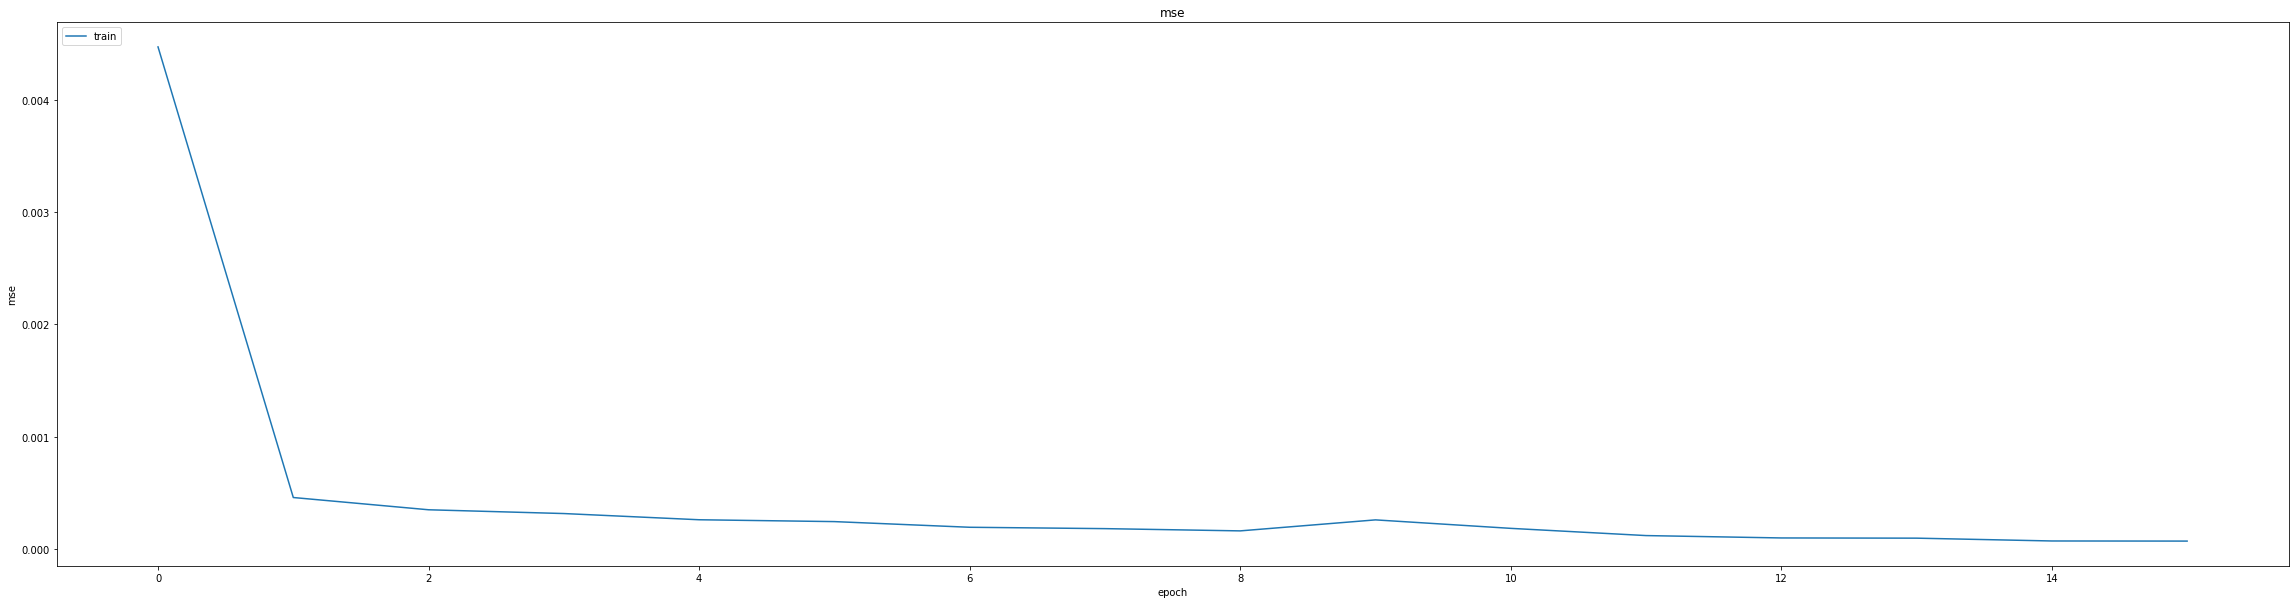

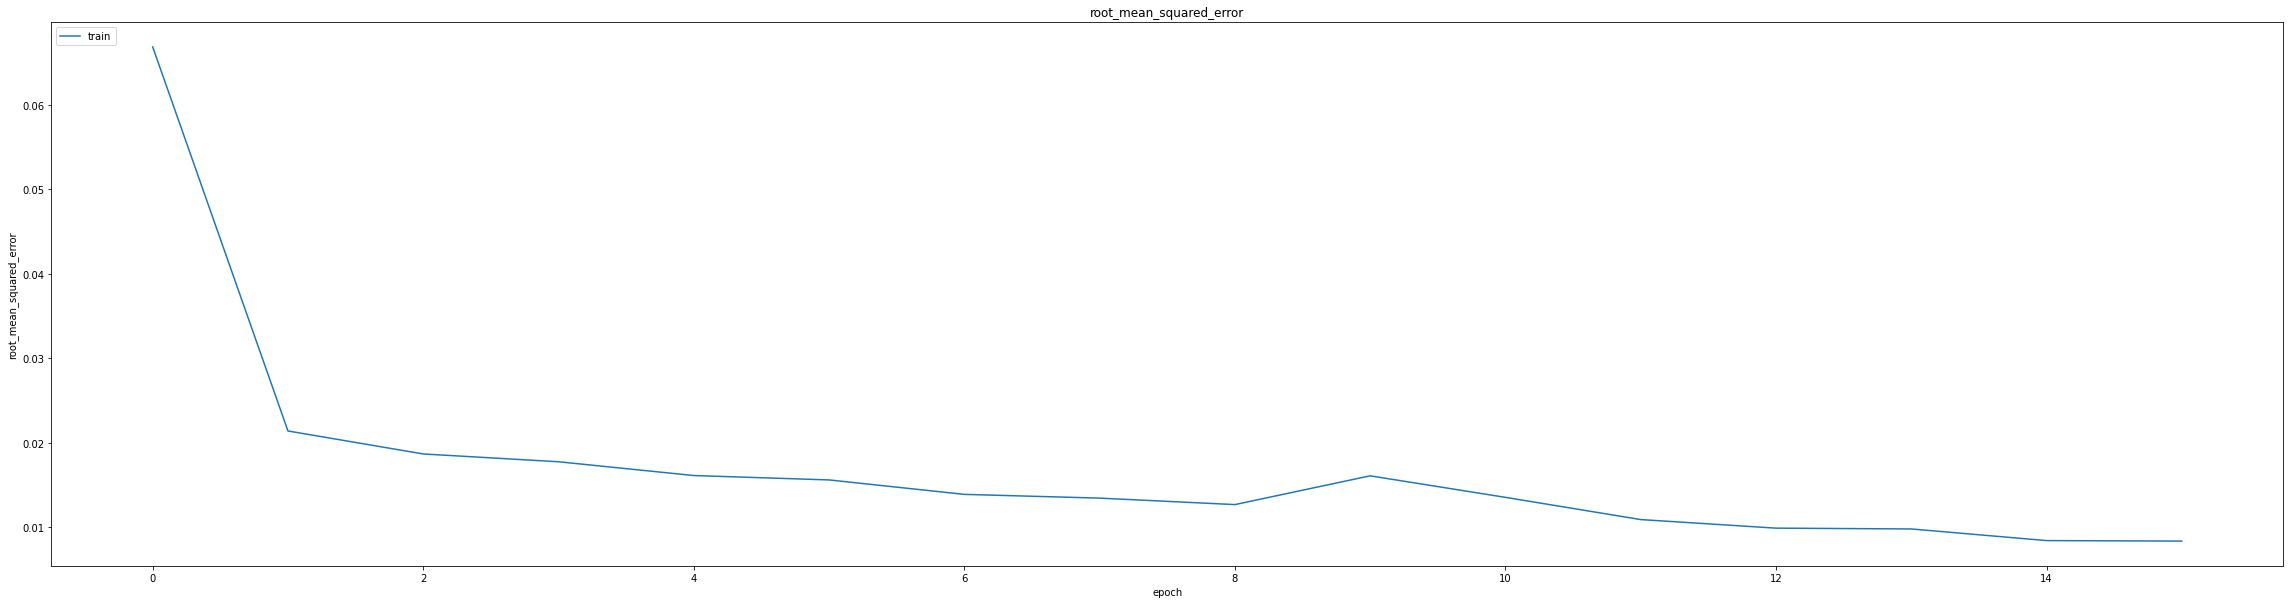

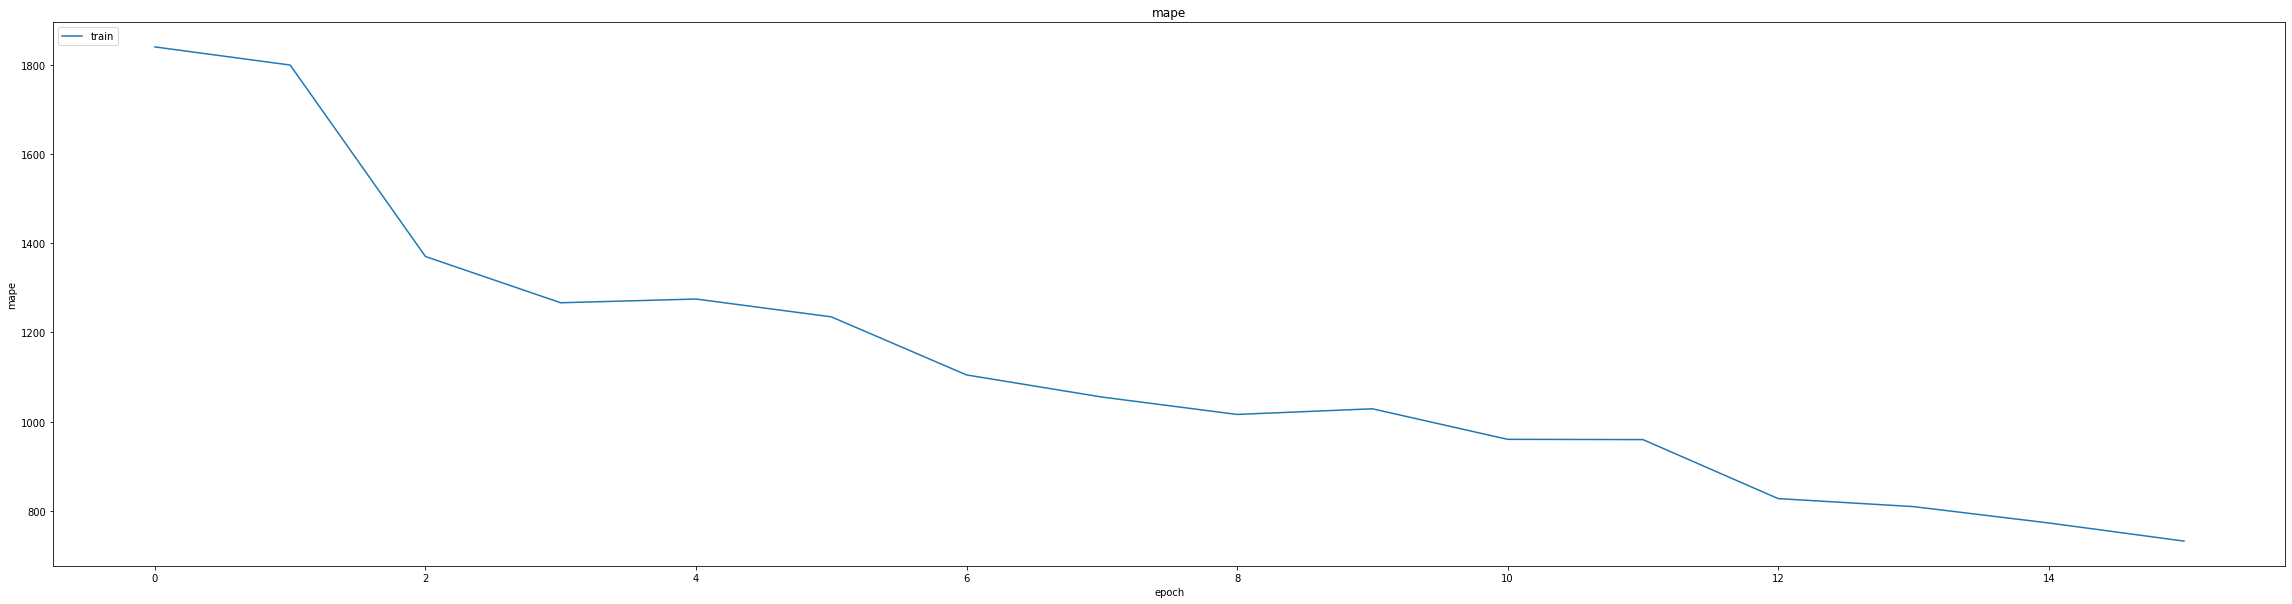

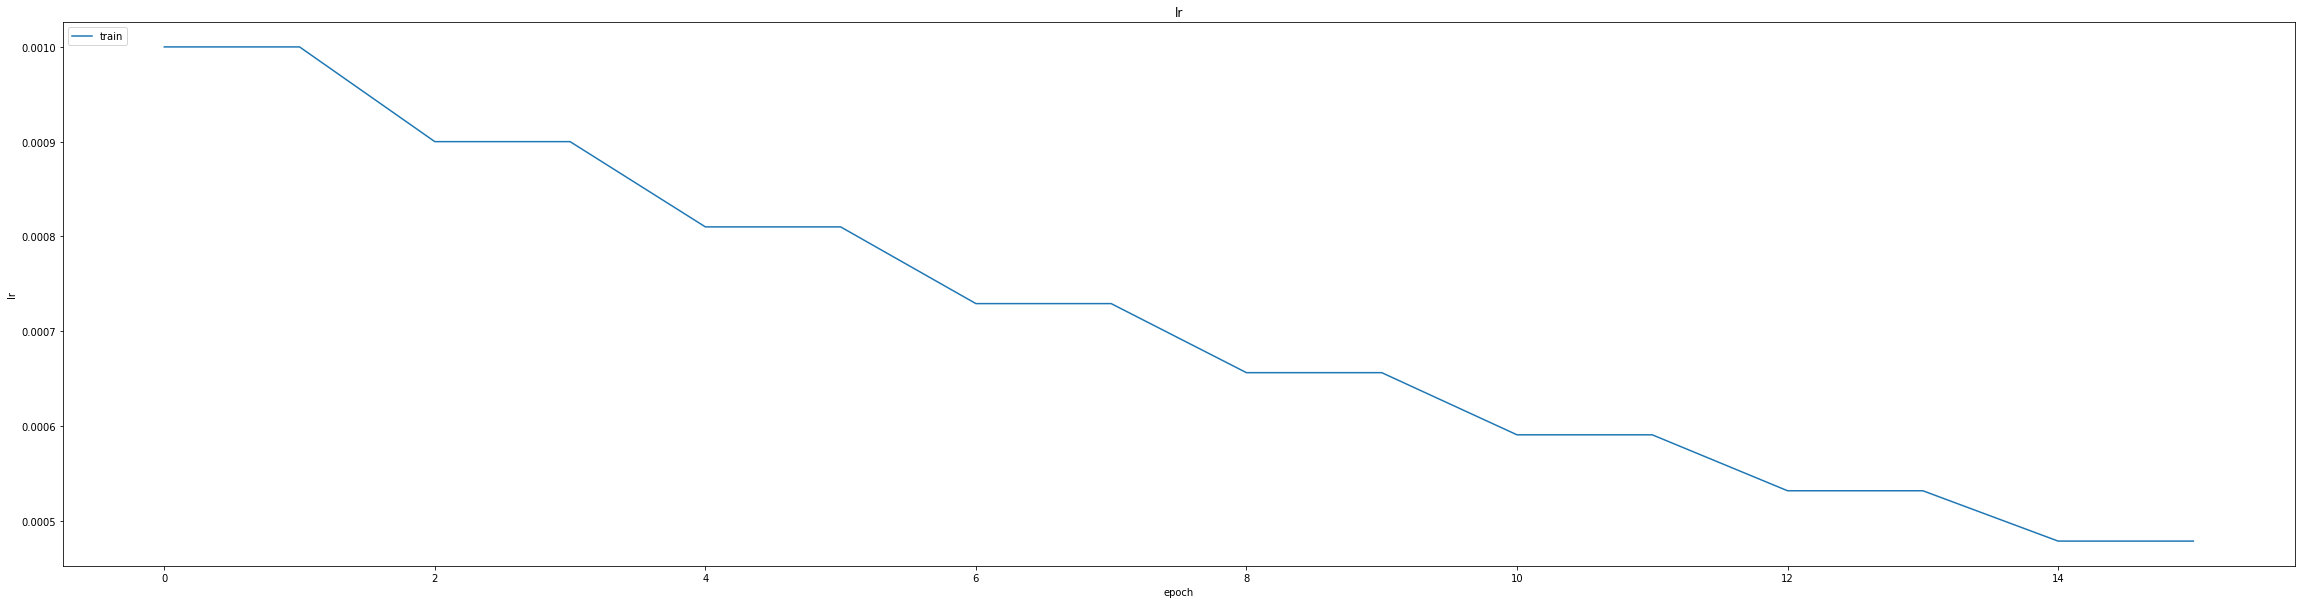

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01373374555259943
0.01490065362304449
1043/1043 [==============================] - 4s 3ms/step
0.990036245234613


1043/1043 [==============================] - 3s 3ms/step


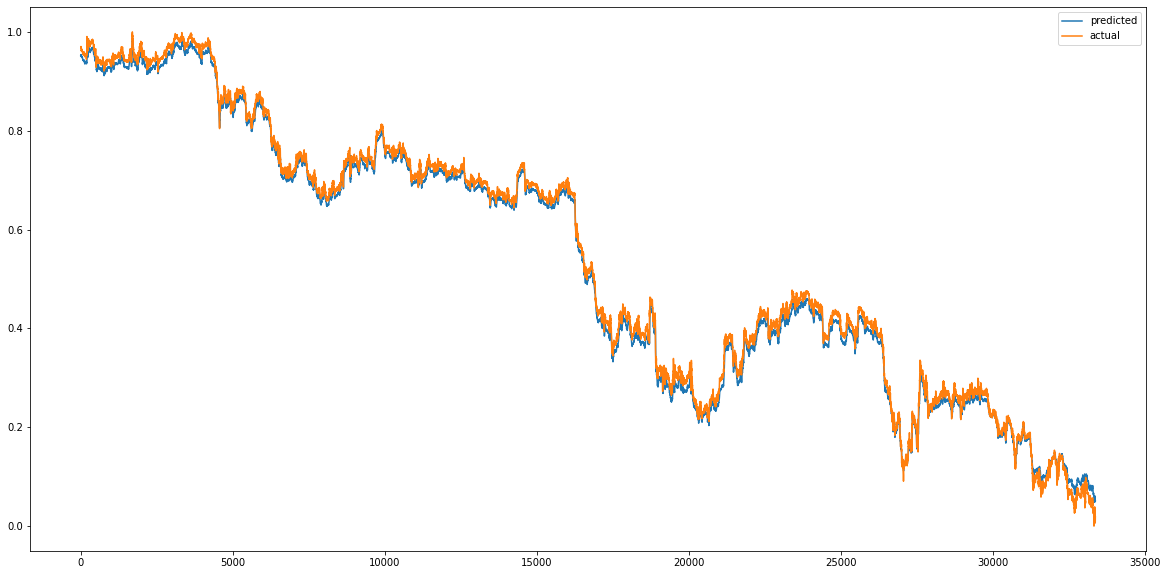

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


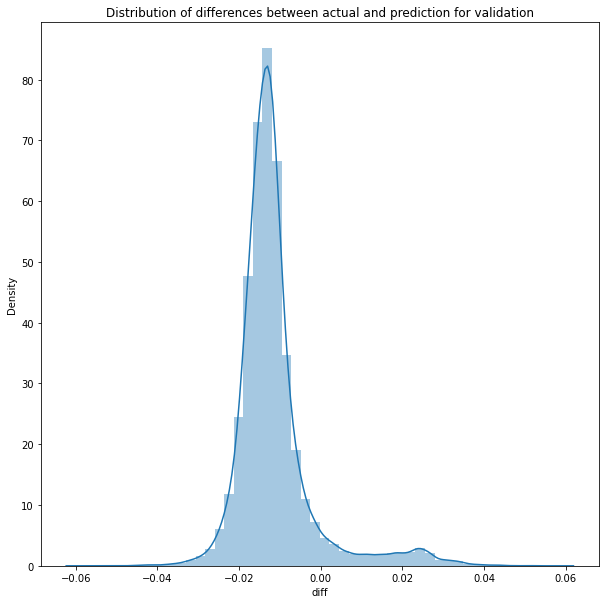

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 3s 3ms/step


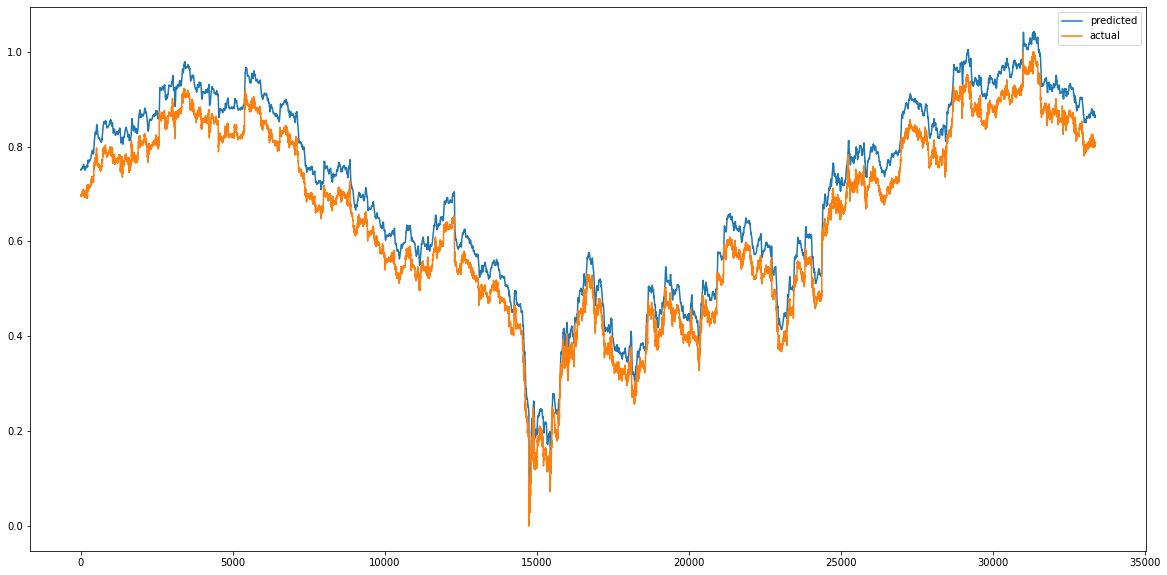

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


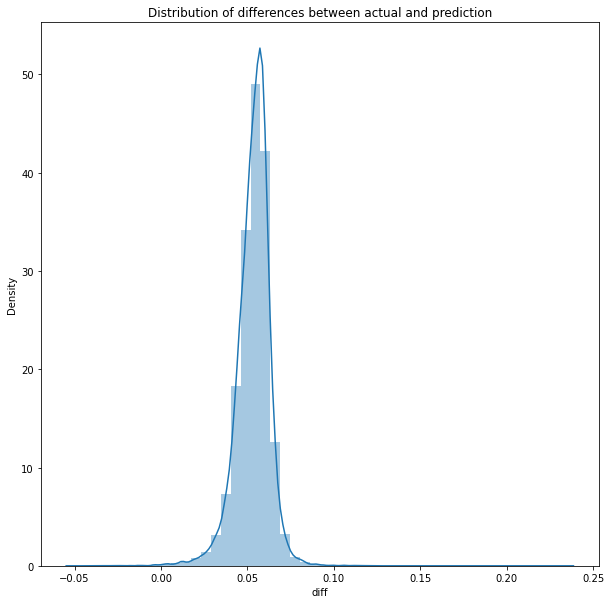

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00294735446777458
RMSE :  0.05428954289524438
MAE :  0.053423132239336424
1043/1043 [==============================] - 3s 3ms/step
R2_Score  : 0.9250871894989193


count    33376.000000
mean         0.053398
std          0.009799
min         -0.051184
25%          0.048438
50%          0.054510
75%          0.059291
max          0.234994
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 615.6276 - mae: 6.2742 - mse: 615.6276 - root_mean_squared_error: 24.8118 - mape: 58723.8164
Epoch 1: val_mse improved from inf to 0.08315, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 55s 109ms/step - loss: 615.6276 - mae: 6.2742 - mse: 615.6276 - root_mean_squared_error: 24.8118 - mape: 58723.8164 - val_loss: 0.0832 - val_mae: 0.2464 - val_mse: 0.0832 - val_root_mean_squared_error: 0.2884 - val_mape: 19367.1250
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 0.0413 - mae: 0.1693 - mse: 0.0413 - root_mean_squared_error: 0.2031 - mape: 4728.9702
Epoch 2: val_mse did not improve from 0.08315
405/405 [==============================] - 9s 23ms/step - loss: 0.0413 - mae: 0.1693 - mse: 0.0413 - root_mean_squared_error: 0.2031 - mape: 4708.3242 - val_loss: 0.0835 - val_mae: 0.2463 - val_mse: 0.0835 - val_root_mean_squared_error: 0.2889 - val_mape: 19419.3281
Epoch 3/60
405/405 [==============================] - ETA: 0s - loss: 0.0412 - mae: 0.1693 - mse: 0.0412 - root_mean_squared_error: 0.2029 - mape: 4239.2793
Epoch 3: val_mse did not improve from 0.08315
405/405 [==============================] - 10s 24ms/

405/405 [==============================] - 42s 104ms/step - loss: 0.0409 - mae: 0.1688 - mse: 0.0409 - root_mean_squared_error: 0.2024 - mape: 3915.1479 - val_loss: 0.0830 - val_mae: 0.2459 - val_mse: 0.0830 - val_root_mean_squared_error: 0.2881 - val_mape: 19355.8711
Epoch 5/60
404/405 [============================>.] - ETA: 0s - loss: 0.0408 - mae: 0.1686 - mse: 0.0408 - root_mean_squared_error: 0.2021 - mape: 4071.4907
Epoch 5: val_mse did not improve from 0.08299
405/405 [==============================] - 9s 22ms/step - loss: 0.0408 - mae: 0.1686 - mse: 0.0408 - root_mean_squared_error: 0.2020 - mape: 4063.7229 - val_loss: 0.0832 - val_mae: 0.2455 - val_mse: 0.0832 - val_root_mean_squared_error: 0.2884 - val_mape: 19398.7422
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0405 - mae: 0.1678 - mse: 0.0405 - root_mean_squared_error: 0.2012 - mape: 3994.9644
Epoch 6: val_mse improved from 0.08299 to 0.08246, saving model to /content/drive/MyDrive/modelweights/G

405/405 [==============================] - 43s 106ms/step - loss: 0.0405 - mae: 0.1678 - mse: 0.0405 - root_mean_squared_error: 0.2012 - mape: 3994.9644 - val_loss: 0.0825 - val_mae: 0.2443 - val_mse: 0.0825 - val_root_mean_squared_error: 0.2872 - val_mape: 19312.0723
Epoch 7/60
405/405 [==============================] - ETA: 0s - loss: 0.0401 - mae: 0.1670 - mse: 0.0401 - root_mean_squared_error: 0.2001 - mape: 4683.9028
Epoch 7: val_mse improved from 0.08246 to 0.08135, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 0.0401 - mae: 0.1670 - mse: 0.0401 - root_mean_squared_error: 0.2001 - mape: 4683.9028 - val_loss: 0.0813 - val_mae: 0.2428 - val_mse: 0.0813 - val_root_mean_squared_error: 0.2852 - val_mape: 19162.0488
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0394 - mae: 0.1656 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 4114.4741
Epoch 8: val_mse improved from 0.08135 to 0.08037, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 108ms/step - loss: 0.0394 - mae: 0.1656 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 4106.6255 - val_loss: 0.0804 - val_mae: 0.2406 - val_mse: 0.0804 - val_root_mean_squared_error: 0.2835 - val_mape: 19086.6270
Epoch 9/60
405/405 [==============================] - ETA: 0s - loss: 0.0376 - mae: 0.1617 - mse: 0.0376 - root_mean_squared_error: 0.1940 - mape: 4000.4546
Epoch 9: val_mse improved from 0.08037 to 0.07437, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0376 - mae: 0.1617 - mse: 0.0376 - root_mean_squared_error: 0.1940 - mape: 4000.4546 - val_loss: 0.0744 - val_mae: 0.2315 - val_mse: 0.0744 - val_root_mean_squared_error: 0.2727 - val_mape: 18393.1953
Epoch 10/60
403/405 [============================>.] - ETA: 0s - loss: 0.0339 - mae: 0.1530 - mse: 0.0339 - root_mean_squared_error: 0.1841 - mape: 4021.2349
Epoch 10: val_mse improved from 0.07437 to 0.06689, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0339 - mae: 0.1530 - mse: 0.0339 - root_mean_squared_error: 0.1841 - mape: 4003.7202 - val_loss: 0.0669 - val_mae: 0.2178 - val_mse: 0.0669 - val_root_mean_squared_error: 0.2586 - val_mape: 17740.7207
Epoch 11/60
405/405 [==============================] - ETA: 0s - loss: 0.0287 - mae: 0.1389 - mse: 0.0287 - root_mean_squared_error: 0.1693 - mape: 3513.6780
Epoch 11: val_mse improved from 0.06689 to 0.05408, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0287 - mae: 0.1389 - mse: 0.0287 - root_mean_squared_error: 0.1693 - mape: 3513.6780 - val_loss: 0.0541 - val_mae: 0.1911 - val_mse: 0.0541 - val_root_mean_squared_error: 0.2326 - val_mape: 16899.0645
Epoch 12/60
404/405 [============================>.] - ETA: 0s - loss: 0.0201 - mae: 0.1109 - mse: 0.0201 - root_mean_squared_error: 0.1418 - mape: 3267.6697
Epoch 12: val_mse improved from 0.05408 to 0.03668, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 108ms/step - loss: 0.0201 - mae: 0.1109 - mse: 0.0201 - root_mean_squared_error: 0.1418 - mape: 3261.4380 - val_loss: 0.0367 - val_mae: 0.1483 - val_mse: 0.0367 - val_root_mean_squared_error: 0.1915 - val_mape: 15448.9434
Epoch 13/60
404/405 [============================>.] - ETA: 0s - loss: 0.0136 - mae: 0.0882 - mse: 0.0136 - root_mean_squared_error: 0.1166 - mape: 3047.7012
Epoch 13: val_mse improved from 0.03668 to 0.02366, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0136 - mae: 0.0882 - mse: 0.0136 - root_mean_squared_error: 0.1166 - mape: 3041.9089 - val_loss: 0.0237 - val_mae: 0.1115 - val_mse: 0.0237 - val_root_mean_squared_error: 0.1538 - val_mape: 13723.4473
Epoch 14/60
403/405 [============================>.] - ETA: 0s - loss: 0.0105 - mae: 0.0772 - mse: 0.0105 - root_mean_squared_error: 0.1024 - mape: 3238.0388
Epoch 14: val_mse improved from 0.02366 to 0.01632, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0105 - mae: 0.0772 - mse: 0.0105 - root_mean_squared_error: 0.1024 - mape: 3223.8899 - val_loss: 0.0163 - val_mae: 0.0886 - val_mse: 0.0163 - val_root_mean_squared_error: 0.1277 - val_mape: 12286.3252
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 0.0088 - mae: 0.0709 - mse: 0.0088 - root_mean_squared_error: 0.0938 - mape: 2306.1665
Epoch 15: val_mse improved from 0.01632 to 0.01261, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0088 - mae: 0.0709 - mse: 0.0088 - root_mean_squared_error: 0.0938 - mape: 2306.1665 - val_loss: 0.0126 - val_mae: 0.0754 - val_mse: 0.0126 - val_root_mean_squared_error: 0.1123 - val_mape: 11380.6729
Epoch 16/60
405/405 [==============================] - ETA: 0s - loss: 0.0077 - mae: 0.0663 - mse: 0.0077 - root_mean_squared_error: 0.0876 - mape: 2625.2590
Epoch 16: val_mse improved from 0.01261 to 0.01050, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 109ms/step - loss: 0.0077 - mae: 0.0663 - mse: 0.0077 - root_mean_squared_error: 0.0876 - mape: 2625.2590 - val_loss: 0.0105 - val_mae: 0.0677 - val_mse: 0.0105 - val_root_mean_squared_error: 0.1025 - val_mape: 10781.7109
Epoch 17/60
405/405 [==============================] - ETA: 0s - loss: 0.0067 - mae: 0.0620 - mse: 0.0067 - root_mean_squared_error: 0.0818 - mape: 2019.6575
Epoch 17: val_mse improved from 0.01050 to 0.00899, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0067 - mae: 0.0620 - mse: 0.0067 - root_mean_squared_error: 0.0818 - mape: 2019.6575 - val_loss: 0.0090 - val_mae: 0.0615 - val_mse: 0.0090 - val_root_mean_squared_error: 0.0948 - val_mape: 10368.0078
Epoch 18/60
404/405 [============================>.] - ETA: 0s - loss: 0.0059 - mae: 0.0580 - mse: 0.0059 - root_mean_squared_error: 0.0766 - mape: 1868.4574
Epoch 18: val_mse improved from 0.00899 to 0.00749, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0059 - mae: 0.0580 - mse: 0.0059 - root_mean_squared_error: 0.0766 - mape: 1864.8756 - val_loss: 0.0075 - val_mae: 0.0560 - val_mse: 0.0075 - val_root_mean_squared_error: 0.0866 - val_mape: 9860.9287
Epoch 19/60
404/405 [============================>.] - ETA: 0s - loss: 0.0051 - mae: 0.0540 - mse: 0.0051 - root_mean_squared_error: 0.0712 - mape: 1845.2129
Epoch 19: val_mse improved from 0.00749 to 0.00646, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 109ms/step - loss: 0.0051 - mae: 0.0540 - mse: 0.0051 - root_mean_squared_error: 0.0712 - mape: 1841.6793 - val_loss: 0.0065 - val_mae: 0.0514 - val_mse: 0.0065 - val_root_mean_squared_error: 0.0804 - val_mape: 9513.6465
Epoch 20/60
403/405 [============================>.] - ETA: 0s - loss: 0.0043 - mae: 0.0500 - mse: 0.0043 - root_mean_squared_error: 0.0659 - mape: 1994.8246
Epoch 20: val_mse improved from 0.00646 to 0.00552, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 108ms/step - loss: 0.0043 - mae: 0.0500 - mse: 0.0043 - root_mean_squared_error: 0.0659 - mape: 1986.1011 - val_loss: 0.0055 - val_mae: 0.0489 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0743 - val_mape: 9041.0352
Epoch 21/60
404/405 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0464 - mse: 0.0037 - root_mean_squared_error: 0.0611 - mape: 1762.8684
Epoch 21: val_mse improved from 0.00552 to 0.00489, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 0.0037 - mae: 0.0464 - mse: 0.0037 - root_mean_squared_error: 0.0611 - mape: 1759.4979 - val_loss: 0.0049 - val_mae: 0.0449 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0699 - val_mape: 8722.3643
Epoch 22/60
404/405 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0434 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 1657.5530
Epoch 22: val_mse improved from 0.00489 to 0.00423, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 109ms/step - loss: 0.0033 - mae: 0.0434 - mse: 0.0033 - root_mean_squared_error: 0.0572 - mape: 1654.3831 - val_loss: 0.0042 - val_mae: 0.0411 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0651 - val_mape: 8424.3877
Epoch 23/60
403/405 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0402 - mse: 0.0028 - root_mean_squared_error: 0.0531 - mape: 1961.1074
Epoch 23: val_mse improved from 0.00423 to 0.00405, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 110ms/step - loss: 0.0028 - mae: 0.0402 - mse: 0.0028 - root_mean_squared_error: 0.0531 - mape: 1952.5216 - val_loss: 0.0040 - val_mae: 0.0426 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0636 - val_mape: 8276.0840
Epoch 24/60
404/405 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0372 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 1737.5231
Epoch 24: val_mse improved from 0.00405 to 0.00323, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 0.0024 - mae: 0.0372 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 1734.1884 - val_loss: 0.0032 - val_mae: 0.0339 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0568 - val_mape: 8028.2637
Epoch 25/60
405/405 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0340 - mse: 0.0021 - root_mean_squared_error: 0.0453 - mape: 1782.9828
Epoch 25: val_mse improved from 0.00323 to 0.00279, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 0.0021 - mae: 0.0340 - mse: 0.0021 - root_mean_squared_error: 0.0453 - mape: 1782.9828 - val_loss: 0.0028 - val_mae: 0.0293 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0528 - val_mape: 7749.6460
Epoch 26/60
405/405 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0316 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 1561.7556
Epoch 26: val_mse did not improve from 0.00279
405/405 [==============================] - 9s 23ms/step - loss: 0.0018 - mae: 0.0316 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 1561.7556 - val_loss: 0.0031 - val_mae: 0.0422 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0553 - val_mape: 7304.5664
Epoch 27/60
403/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0294 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 1838.6989
Epoch 27: val_mse improved from 0.00279 to 0.00210, saving model to /content/drive/MyDrive/modelweights

405/405 [==============================] - 43s 106ms/step - loss: 0.0015 - mae: 0.0294 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 1830.6429 - val_loss: 0.0021 - val_mae: 0.0279 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0459 - val_mape: 6990.7725
Epoch 28/60
403/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 1610.4066
Epoch 28: val_mse improved from 0.00210 to 0.00169, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 109ms/step - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 1603.3544 - val_loss: 0.0017 - val_mae: 0.0229 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0411 - val_mape: 6690.3076
Epoch 29/60
405/405 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 1536.6622
Epoch 29: val_mse did not improve from 0.00169
405/405 [==============================] - 9s 22ms/step - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 1536.6622 - val_loss: 0.0017 - val_mae: 0.0303 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mape: 6308.0317
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 9.6290e-04 - mae: 0.0234 - mse: 9.6291e-04 - root_mean_squared_error: 0.0310 - mape: 1238.5925
Epoch 30: val_mse improved from 0.00169 to 0.00135, saving model to /content/drive/MyDrive/mode

405/405 [==============================] - 42s 105ms/step - loss: 9.6290e-04 - mae: 0.0234 - mse: 9.6291e-04 - root_mean_squared_error: 0.0310 - mape: 1238.5925 - val_loss: 0.0013 - val_mae: 0.0250 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 6013.0054
Epoch 31/60
404/405 [============================>.] - ETA: 0s - loss: 8.7820e-04 - mae: 0.0225 - mse: 8.7820e-04 - root_mean_squared_error: 0.0296 - mape: 1315.1498
Epoch 31: val_mse improved from 0.00135 to 0.00110, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 105ms/step - loss: 8.7813e-04 - mae: 0.0225 - mse: 8.7813e-04 - root_mean_squared_error: 0.0296 - mape: 1312.6274 - val_loss: 0.0011 - val_mae: 0.0200 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 5714.0156
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 7.3647e-04 - mae: 0.0206 - mse: 7.3647e-04 - root_mean_squared_error: 0.0271 - mape: 1314.1130
Epoch 32: val_mse improved from 0.00110 to 0.00084, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 104ms/step - loss: 7.3615e-04 - mae: 0.0206 - mse: 7.3615e-04 - root_mean_squared_error: 0.0271 - mape: 1311.5908 - val_loss: 8.4091e-04 - val_mae: 0.0166 - val_mse: 8.4091e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 5439.6660
Epoch 33/60
405/405 [==============================] - ETA: 0s - loss: 6.4866e-04 - mae: 0.0194 - mse: 6.4866e-04 - root_mean_squared_error: 0.0255 - mape: 1089.9275
Epoch 33: val_mse improved from 0.00084 to 0.00075, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 44s 108ms/step - loss: 6.4866e-04 - mae: 0.0194 - mse: 6.4866e-04 - root_mean_squared_error: 0.0255 - mape: 1089.9275 - val_loss: 7.5309e-04 - val_mae: 0.0171 - val_mse: 7.5309e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 5133.3389
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 5.6281e-04 - mae: 0.0181 - mse: 5.6281e-04 - root_mean_squared_error: 0.0237 - mape: 1037.4038
Epoch 34: val_mse improved from 0.00075 to 0.00063, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 5.6236e-04 - mae: 0.0181 - mse: 5.6236e-04 - root_mean_squared_error: 0.0237 - mape: 1032.8671 - val_loss: 6.3375e-04 - val_mae: 0.0149 - val_mse: 6.3375e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 4793.3945
Epoch 35/60
404/405 [============================>.] - ETA: 0s - loss: 5.1496e-04 - mae: 0.0175 - mse: 5.1496e-04 - root_mean_squared_error: 0.0227 - mape: 951.7608
Epoch 35: val_mse did not improve from 0.00063
405/405 [==============================] - 9s 22ms/step - loss: 5.1537e-04 - mae: 0.0175 - mse: 5.1537e-04 - root_mean_squared_error: 0.0227 - mape: 949.9415 - val_loss: 6.3456e-04 - val_mae: 0.0178 - val_mse: 6.3456e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 4537.4546
Epoch 36/60
405/405 [==============================] - ETA: 0s - loss: 4.3897e-04 - mae: 0.0161 - mse: 4.3897e-04 - root_mean_squared_error: 0.0210 - mape: 910.9354
Epoch 36: val_mse improved from 0.00063 to 0.00062, saving

405/405 [==============================] - 43s 106ms/step - loss: 4.3897e-04 - mae: 0.0161 - mse: 4.3897e-04 - root_mean_squared_error: 0.0210 - mape: 910.9354 - val_loss: 6.1740e-04 - val_mae: 0.0187 - val_mse: 6.1740e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 4220.0605
Epoch 37/60
405/405 [==============================] - ETA: 0s - loss: 4.1660e-04 - mae: 0.0158 - mse: 4.1660e-04 - root_mean_squared_error: 0.0204 - mape: 859.0301
Epoch 37: val_mse improved from 0.00062 to 0.00043, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 42s 105ms/step - loss: 4.1660e-04 - mae: 0.0158 - mse: 4.1660e-04 - root_mean_squared_error: 0.0204 - mape: 859.0301 - val_loss: 4.2768e-04 - val_mae: 0.0127 - val_mse: 4.2768e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 3999.3425
Epoch 38/60
403/405 [============================>.] - ETA: 0s - loss: 3.6385e-04 - mae: 0.0148 - mse: 3.6385e-04 - root_mean_squared_error: 0.0191 - mape: 855.5718
Epoch 38: val_mse improved from 0.00043 to 0.00029, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 107ms/step - loss: 3.6358e-04 - mae: 0.0148 - mse: 3.6358e-04 - root_mean_squared_error: 0.0191 - mape: 851.8246 - val_loss: 2.9413e-04 - val_mae: 0.0106 - val_mse: 2.9413e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 3765.1807
Epoch 39/60
405/405 [==============================] - ETA: 0s - loss: 3.3011e-04 - mae: 0.0142 - mse: 3.3011e-04 - root_mean_squared_error: 0.0182 - mape: 712.1129
Epoch 39: val_mse did not improve from 0.00029
405/405 [==============================] - 9s 22ms/step - loss: 3.3011e-04 - mae: 0.0142 - mse: 3.3011e-04 - root_mean_squared_error: 0.0182 - mape: 712.1129 - val_loss: 3.4181e-04 - val_mae: 0.0133 - val_mse: 3.4181e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 3574.1121
Epoch 40/60
404/405 [============================>.] - ETA: 0s - loss: 3.0966e-04 - mae: 0.0137 - mse: 3.0966e-04 - root_mean_squared_error: 0.0176 - mape: 758.6994
Epoch 40: val_mse did not improve from 0.00029
405/405 [===

405/405 [==============================] - 43s 106ms/step - loss: 2.9220e-04 - mae: 0.0134 - mse: 2.9220e-04 - root_mean_squared_error: 0.0171 - mape: 665.2012 - val_loss: 2.4743e-04 - val_mae: 0.0114 - val_mse: 2.4743e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 3196.8381
Epoch 42/60
404/405 [============================>.] - ETA: 0s - loss: 2.6023e-04 - mae: 0.0127 - mse: 2.6023e-04 - root_mean_squared_error: 0.0161 - mape: 686.3309
Epoch 42: val_mse improved from 0.00025 to 0.00020, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)


405/405 [==============================] - 43s 106ms/step - loss: 2.6020e-04 - mae: 0.0127 - mse: 2.6020e-04 - root_mean_squared_error: 0.0161 - mape: 685.0139 - val_loss: 2.0105e-04 - val_mae: 0.0101 - val_mse: 2.0105e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 3085.2756
Epoch 43/60
404/405 [============================>.] - ETA: 0s - loss: 2.7325e-04 - mae: 0.0129 - mse: 2.7325e-04 - root_mean_squared_error: 0.0165 - mape: 648.2473
Epoch 43: val_mse did not improve from 0.00020
405/405 [==============================] - 9s 22ms/step - loss: 2.7310e-04 - mae: 0.0128 - mse: 2.7310e-04 - root_mean_squared_error: 0.0165 - mape: 647.0036 - val_loss: 2.4548e-04 - val_mae: 0.0113 - val_mse: 2.4548e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 2957.0774
Epoch 44/60
405/405 [==============================] - ETA: 0s - loss: 2.2566e-04 - mae: 0.0117 - mse: 2.2566e-04 - root_mean_squared_error: 0.0150 - mape: 597.1648
Epoch 44: val_mse did not improve from 0.00020
405/405 [===

405/405 [==============================] - 44s 108ms/step - loss: 2.1942e-04 - mae: 0.0117 - mse: 2.1942e-04 - root_mean_squared_error: 0.0148 - mape: 577.8040 - val_loss: 1.5487e-04 - val_mae: 0.0088 - val_mse: 1.5487e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 2740.9893
Epoch 46/60
405/405 [==============================] - ETA: 0s - loss: 2.0428e-04 - mae: 0.0112 - mse: 2.0428e-04 - root_mean_squared_error: 0.0143 - mape: 626.3955
Epoch 46: val_mse did not improve from 0.00015
405/405 [==============================] - 9s 22ms/step - loss: 2.0428e-04 - mae: 0.0112 - mse: 2.0428e-04 - root_mean_squared_error: 0.0143 - mape: 626.3955 - val_loss: 3.0497e-04 - val_mae: 0.0137 - val_mse: 3.0497e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 2619.8308
Epoch 47/60
404/405 [============================>.] - ETA: 0s - loss: 1.8878e-04 - mae: 0.0109 - mse: 1.8878e-04 - root_mean_squared_error: 0.0137 - mape: 560.6791
Epoch 47: val_mse did not improve from 0.00015
405/405 [===

405/405 [==============================] - 42s 104ms/step - loss: 1.8138e-04 - mae: 0.0106 - mse: 1.8138e-04 - root_mean_squared_error: 0.0135 - mape: 519.2233 - val_loss: 1.1522e-04 - val_mae: 0.0074 - val_mse: 1.1522e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 2454.1880
Epoch 50/60
404/405 [============================>.] - ETA: 0s - loss: 1.6638e-04 - mae: 0.0102 - mse: 1.6638e-04 - root_mean_squared_error: 0.0129 - mape: 538.2580
Epoch 50: val_mse did not improve from 0.00012
405/405 [==============================] - 9s 23ms/step - loss: 1.6624e-04 - mae: 0.0102 - mse: 1.6624e-04 - root_mean_squared_error: 0.0129 - mape: 537.2242 - val_loss: 5.5392e-04 - val_mae: 0.0207 - val_mse: 5.5392e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 2341.0942
Epoch 51/60
404/405 [============================>.] - ETA: 0s - loss: 1.4254e-04 - mae: 0.0095 - mse: 1.4254e-04 - root_mean_squared_error: 0.0119 - mape: 527.2155
Epoch 51: val_mse did not improve from 0.00012
405/405 [===

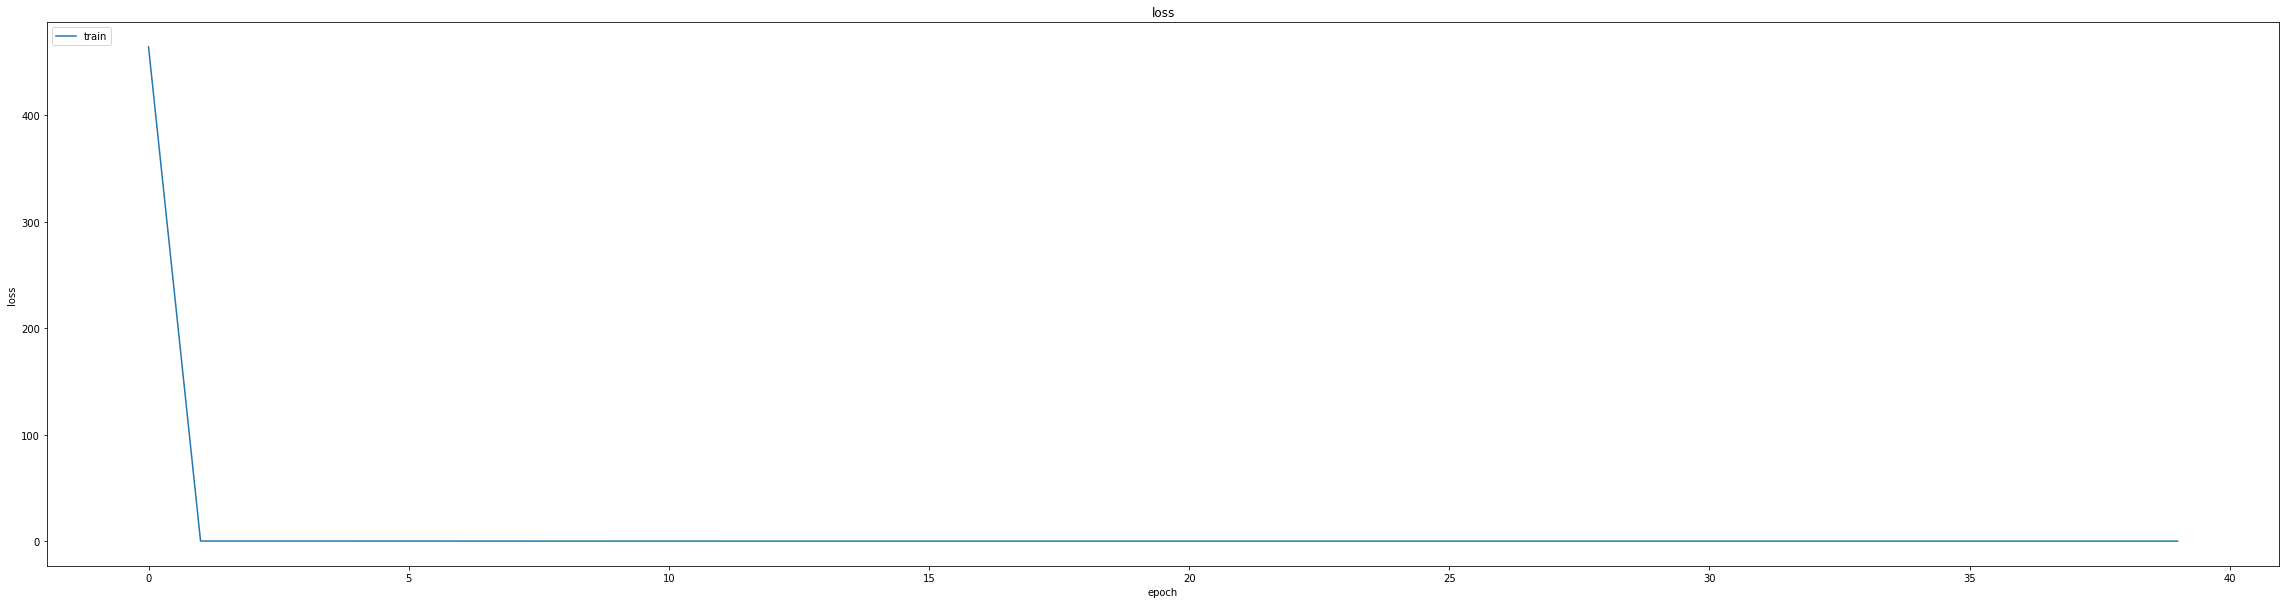

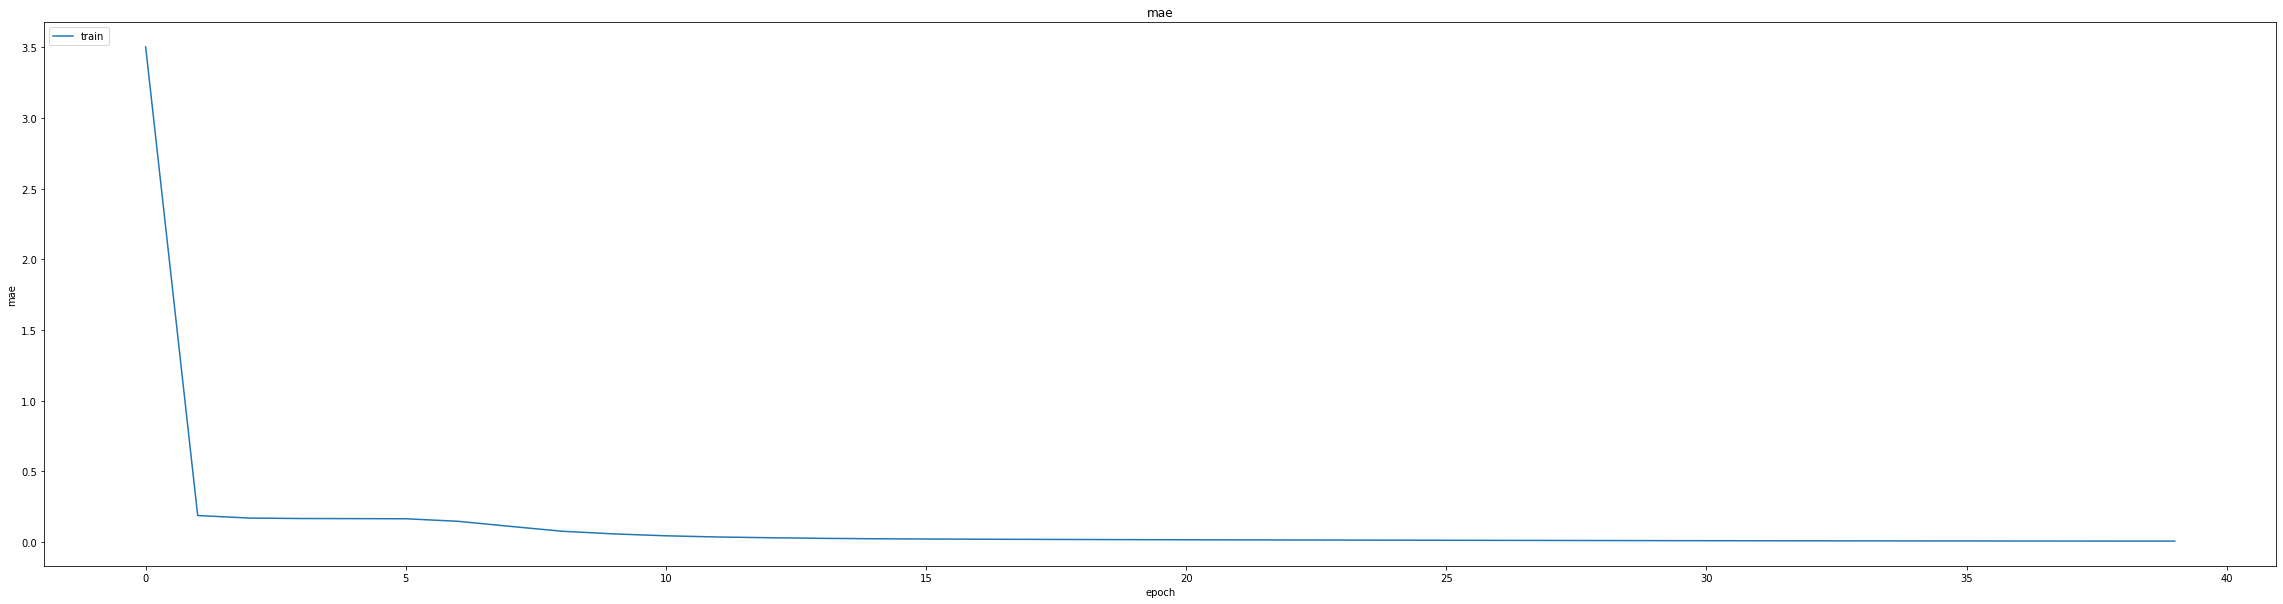

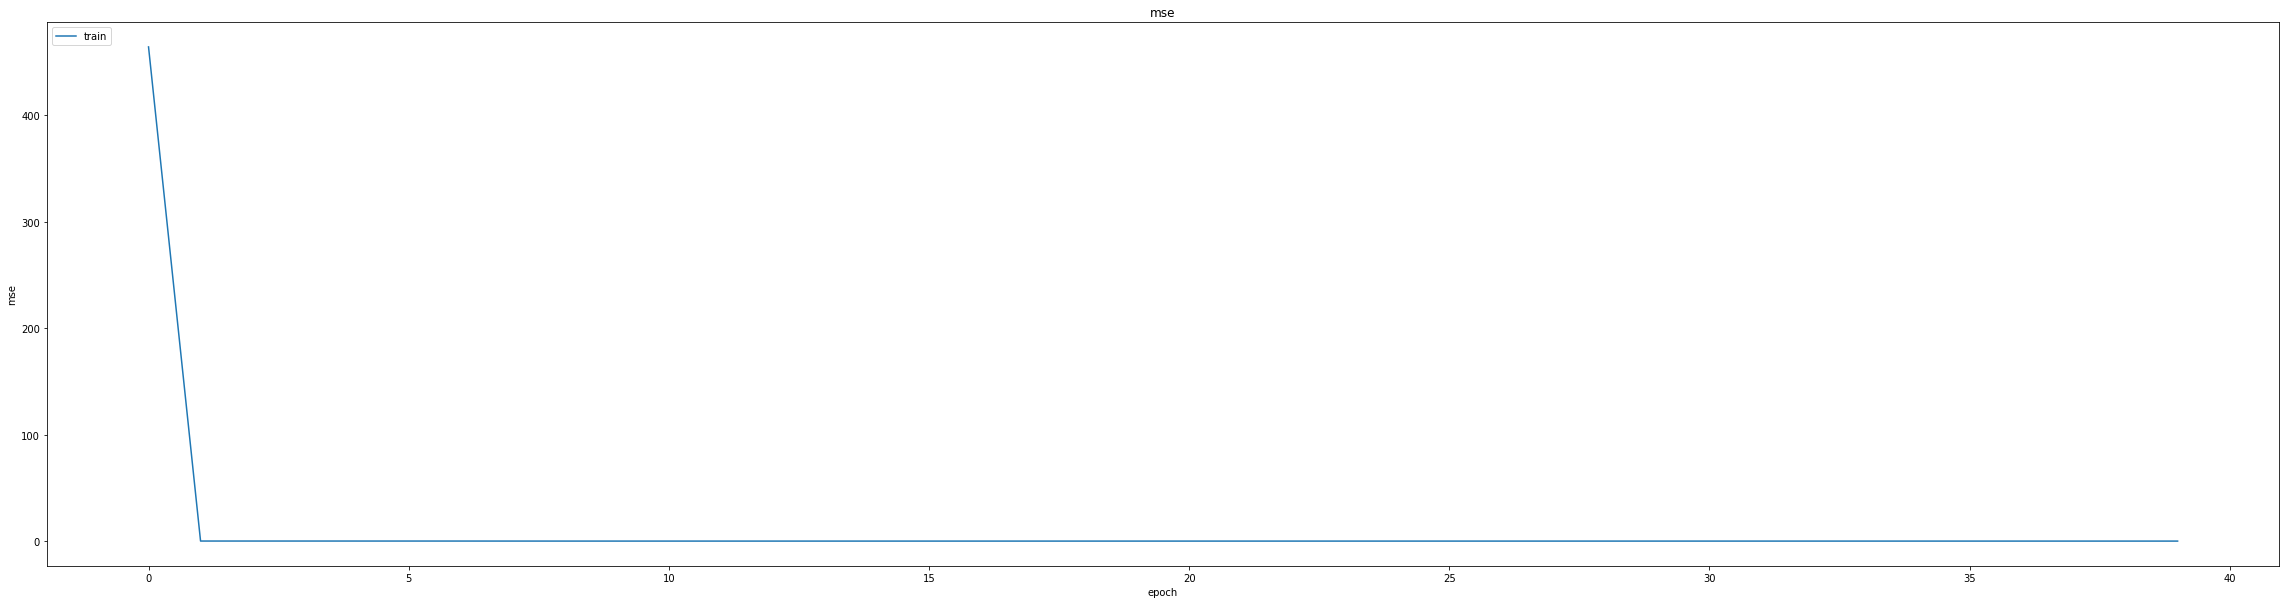

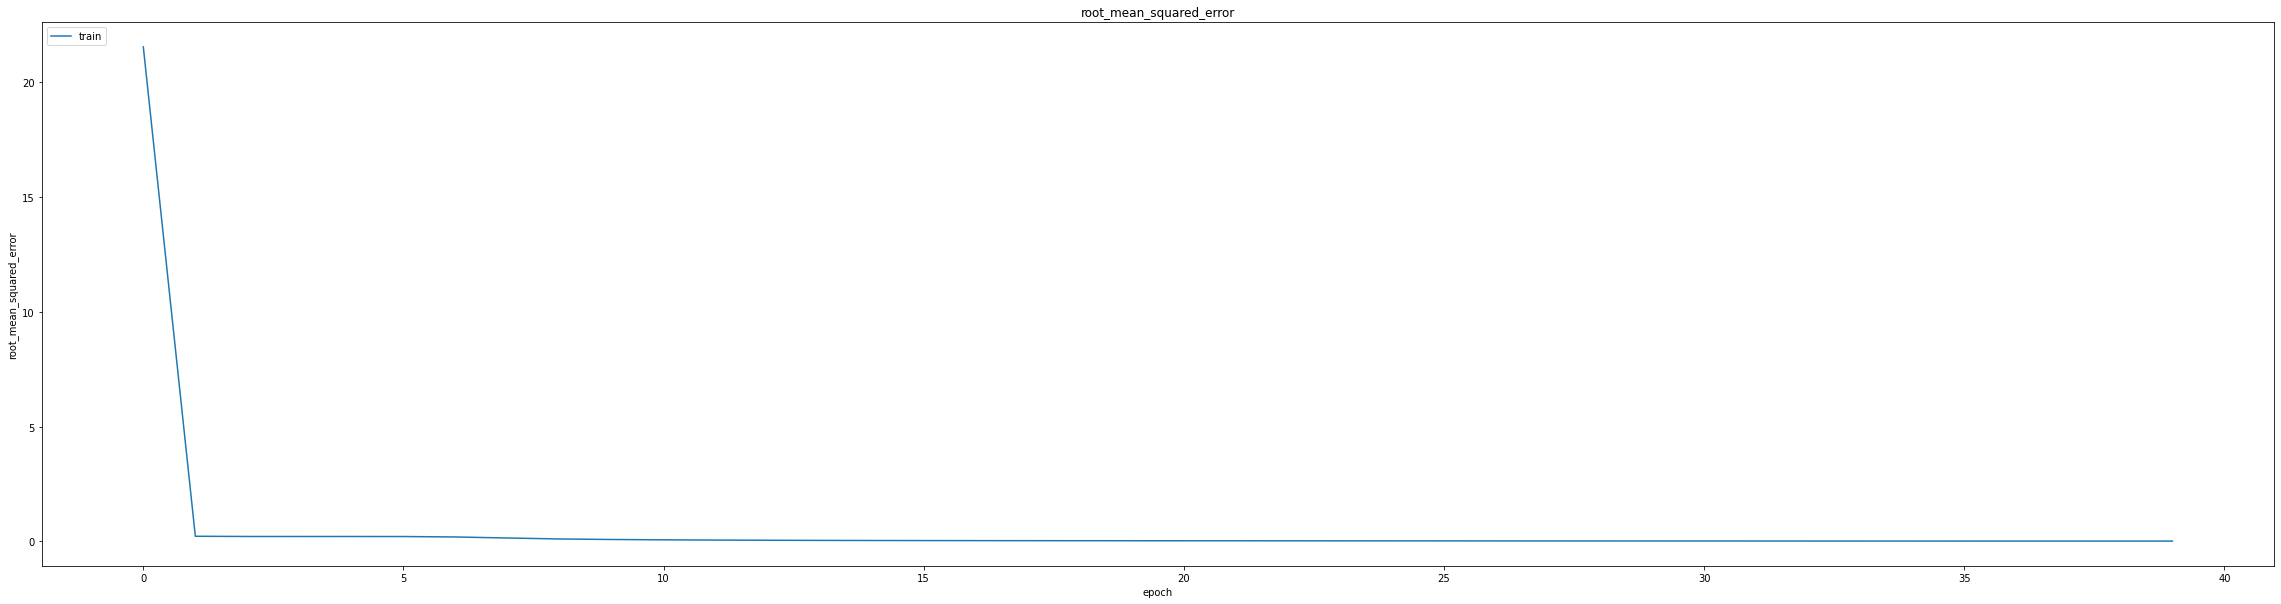

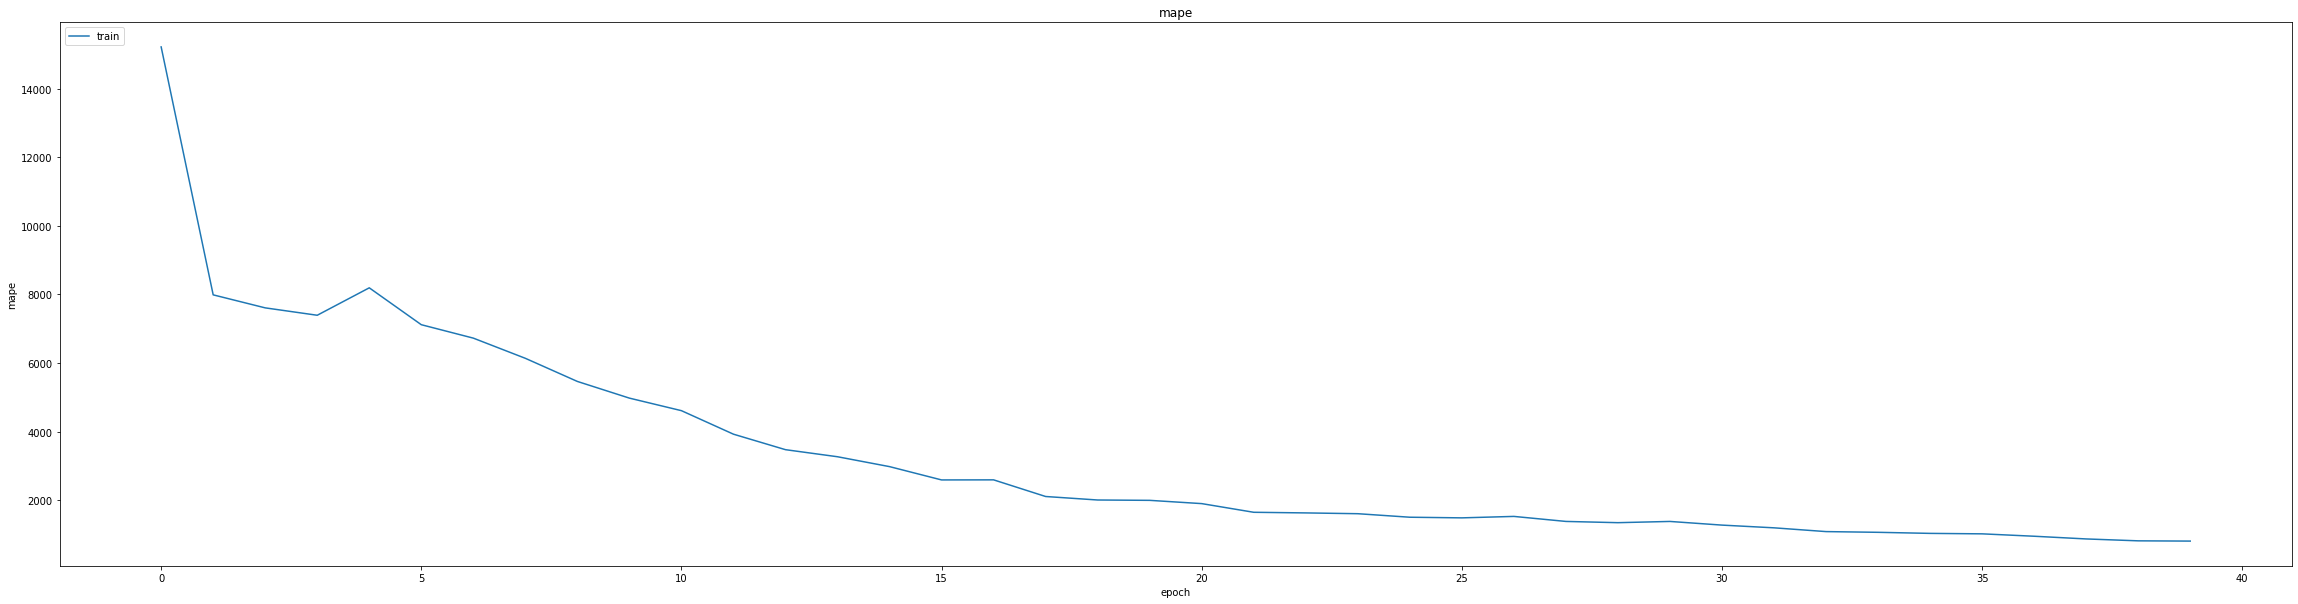

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007350897416472435
0.01073413249105215
1043/1043 [==============================] - 9s 7ms/step
0.9946421925803072


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
404/405 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0181 - mse: 0.0019 - root_mean_squared_error: 0.0436 - mape: 575.0340
Epoch 1: val_mse did not improve from 0.00012
405/405 [==============================] - 22s 35ms/step - loss: 0.0019 - mae: 0.0181 - mse: 0.0019 - root_mean_squared_error: 0.0435 - mape: 573.9297 - val_loss: 1.7970e-04 - val_mae: 0.0106 - val_mse: 1.7970e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 2616.0510 - lr: 0.0010
Epoch 2/20
405/405 [==============================] - ETA: 0s - loss: 8.9762e-05 - mae: 0.0074 - mse: 8.9762e-05 - root_mean_squared_error: 0.0095 - mape: 396.5280
Epoch 2: val_mse did not improve from 0.00012
405/405 [==============================] - 9s 23ms/step - loss: 8.9762e-05 - mae: 0.0074 - mse: 8.9762e-05 - root_mean_squared_error: 0.0095 - mape: 396.5280 - val_loss: 1.2226e-04 - val_mae: 0.0080 - val_mse: 1.2226e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 2407.0120 - lr: 0.0010
lr chan

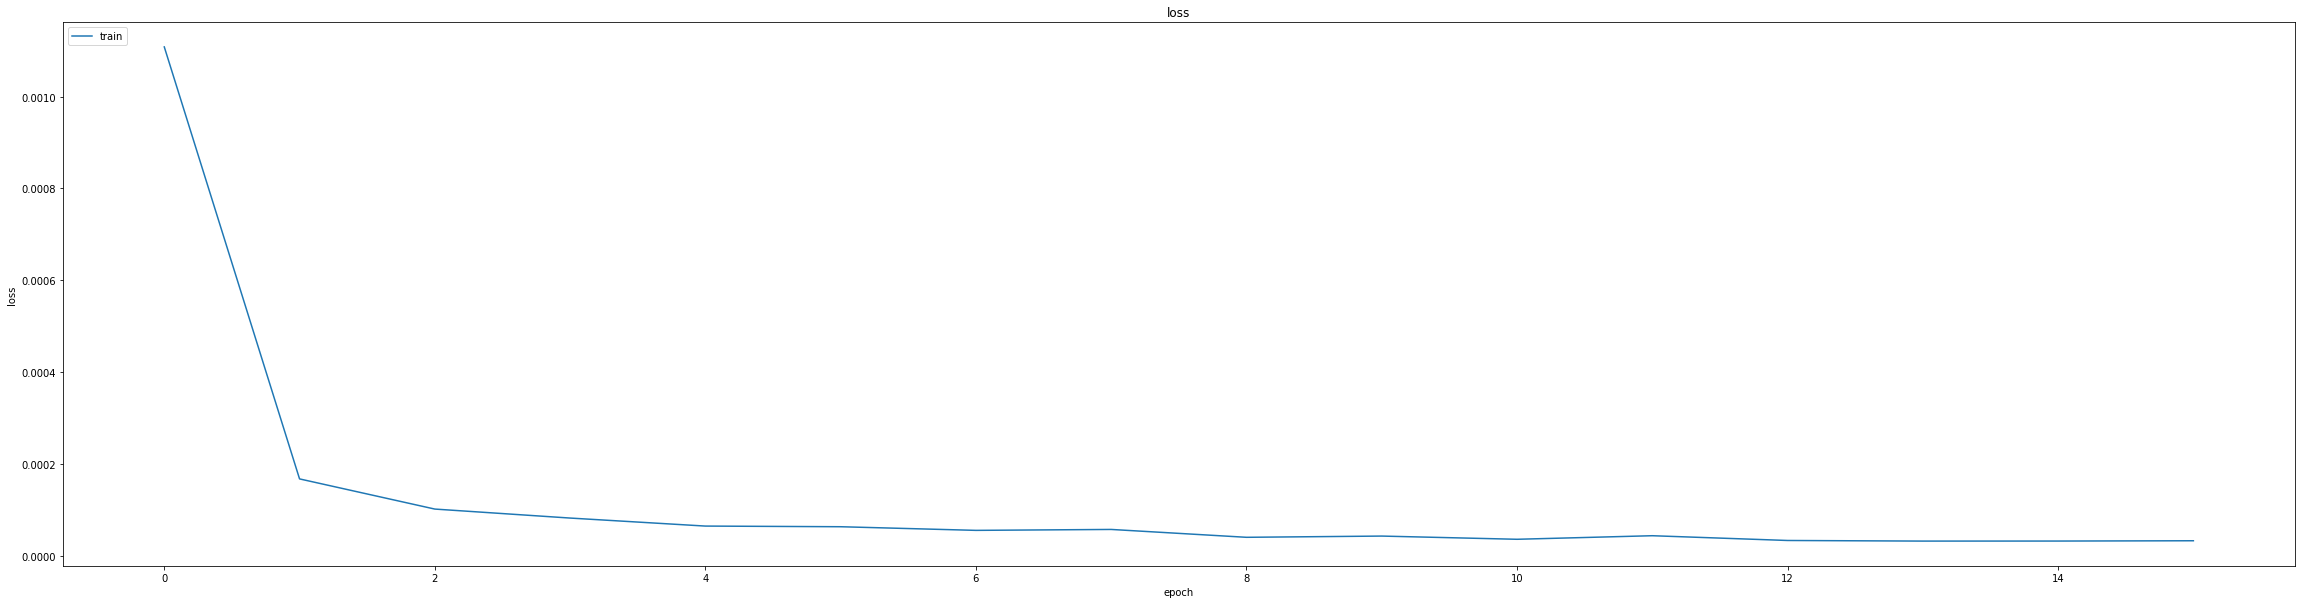

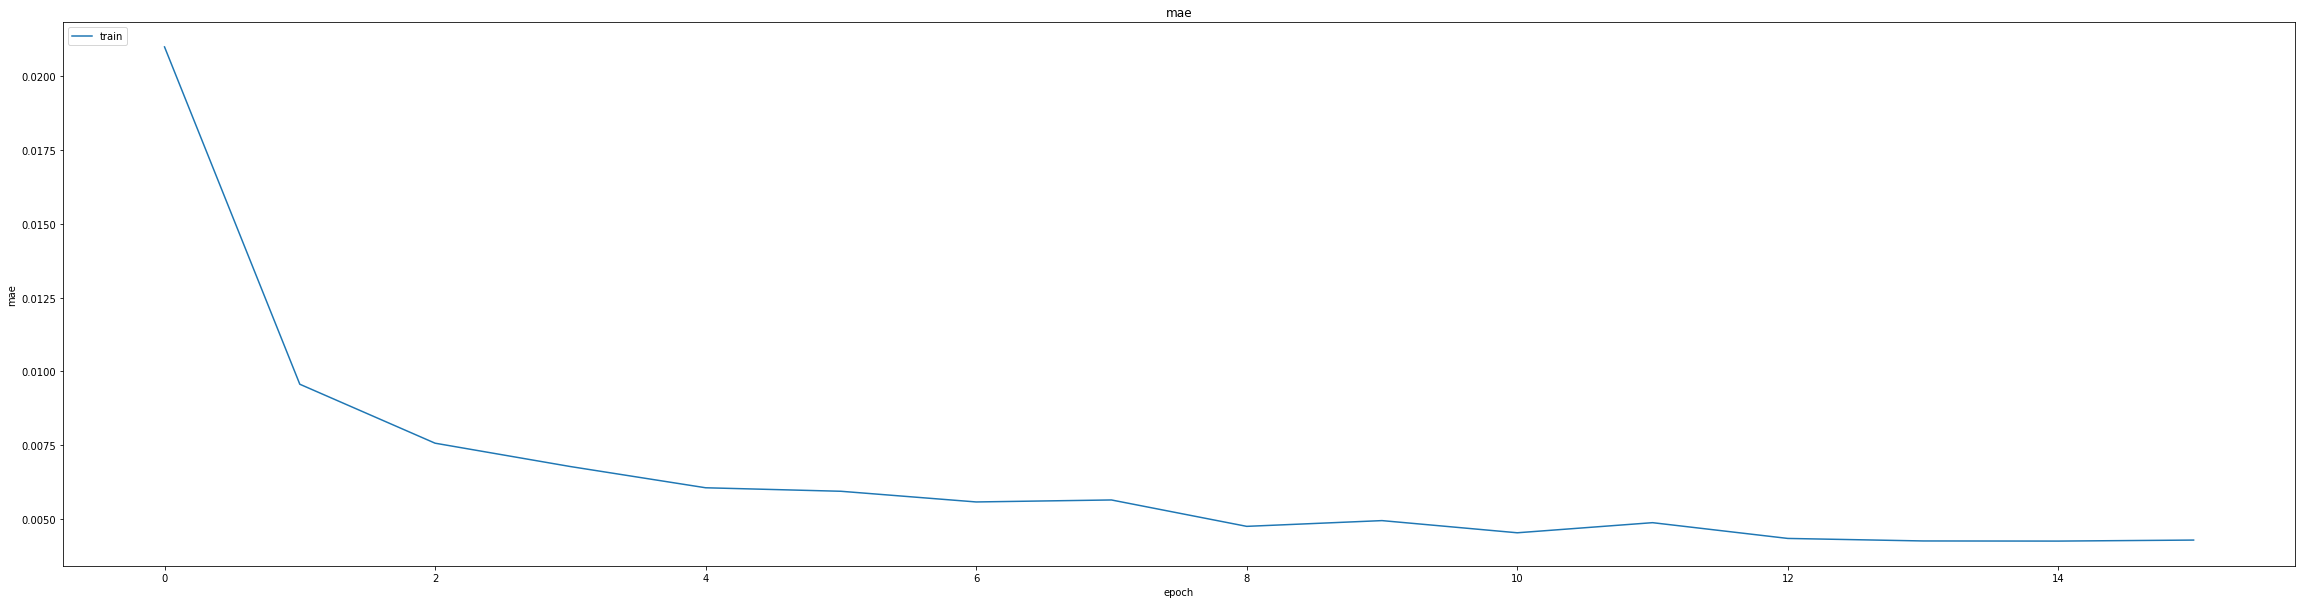

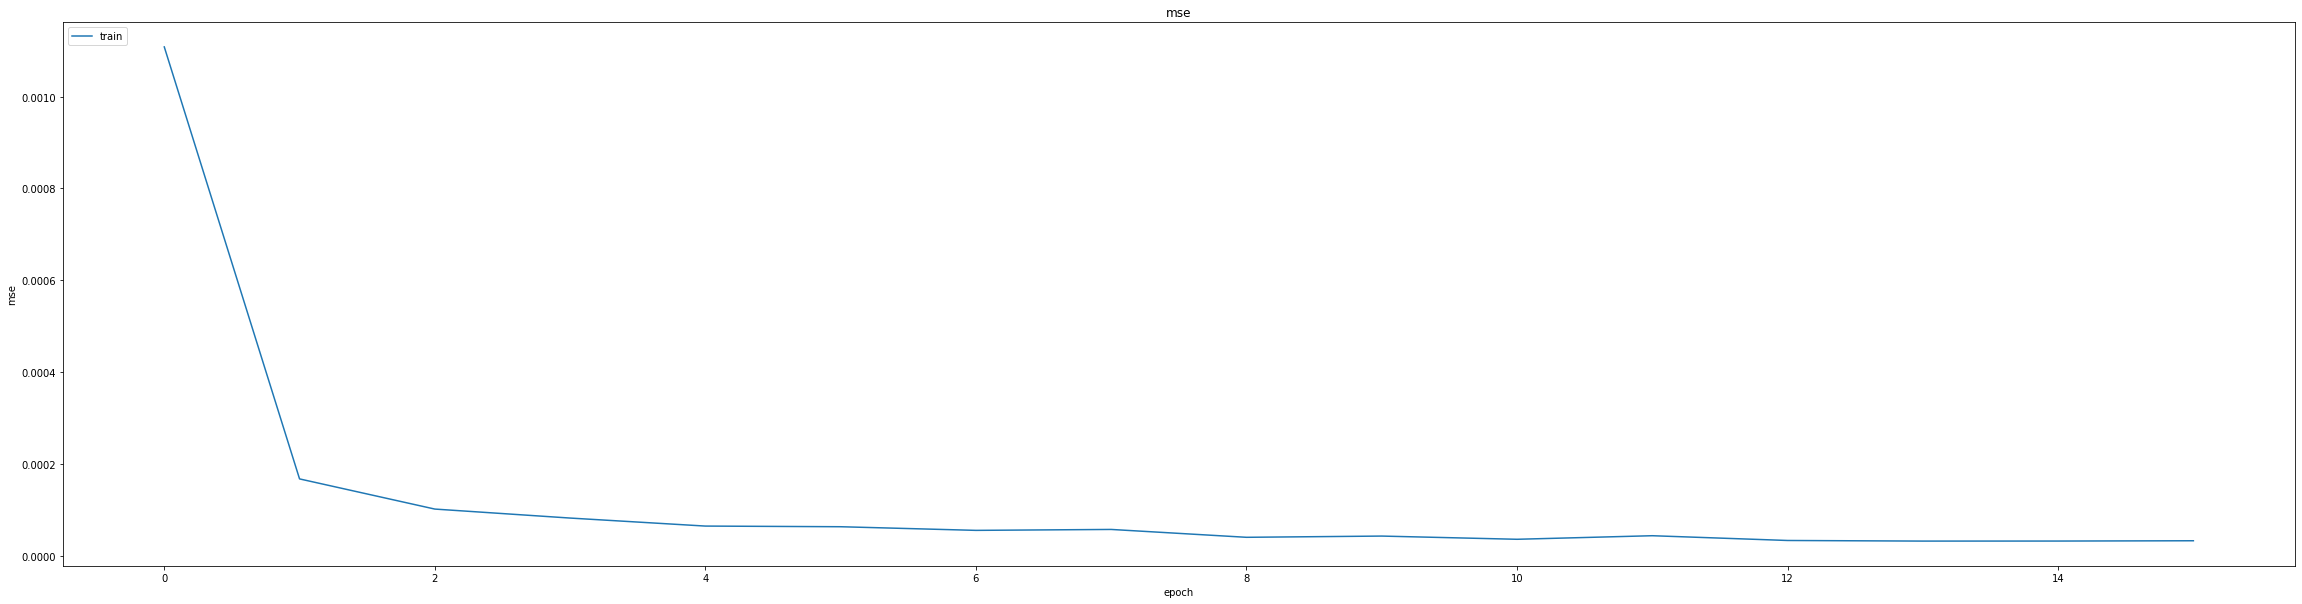

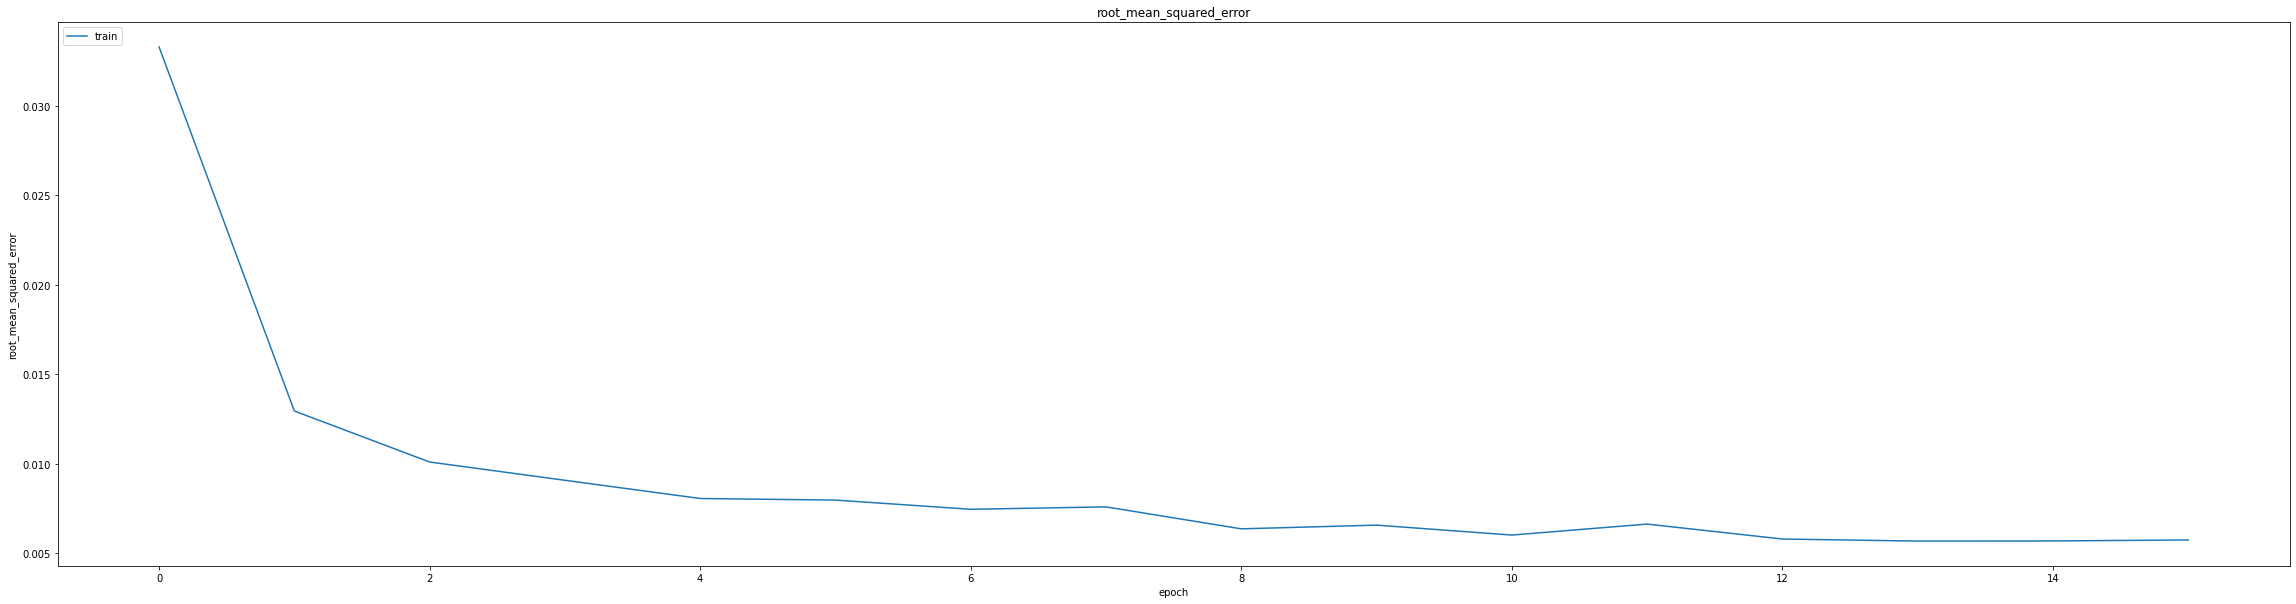

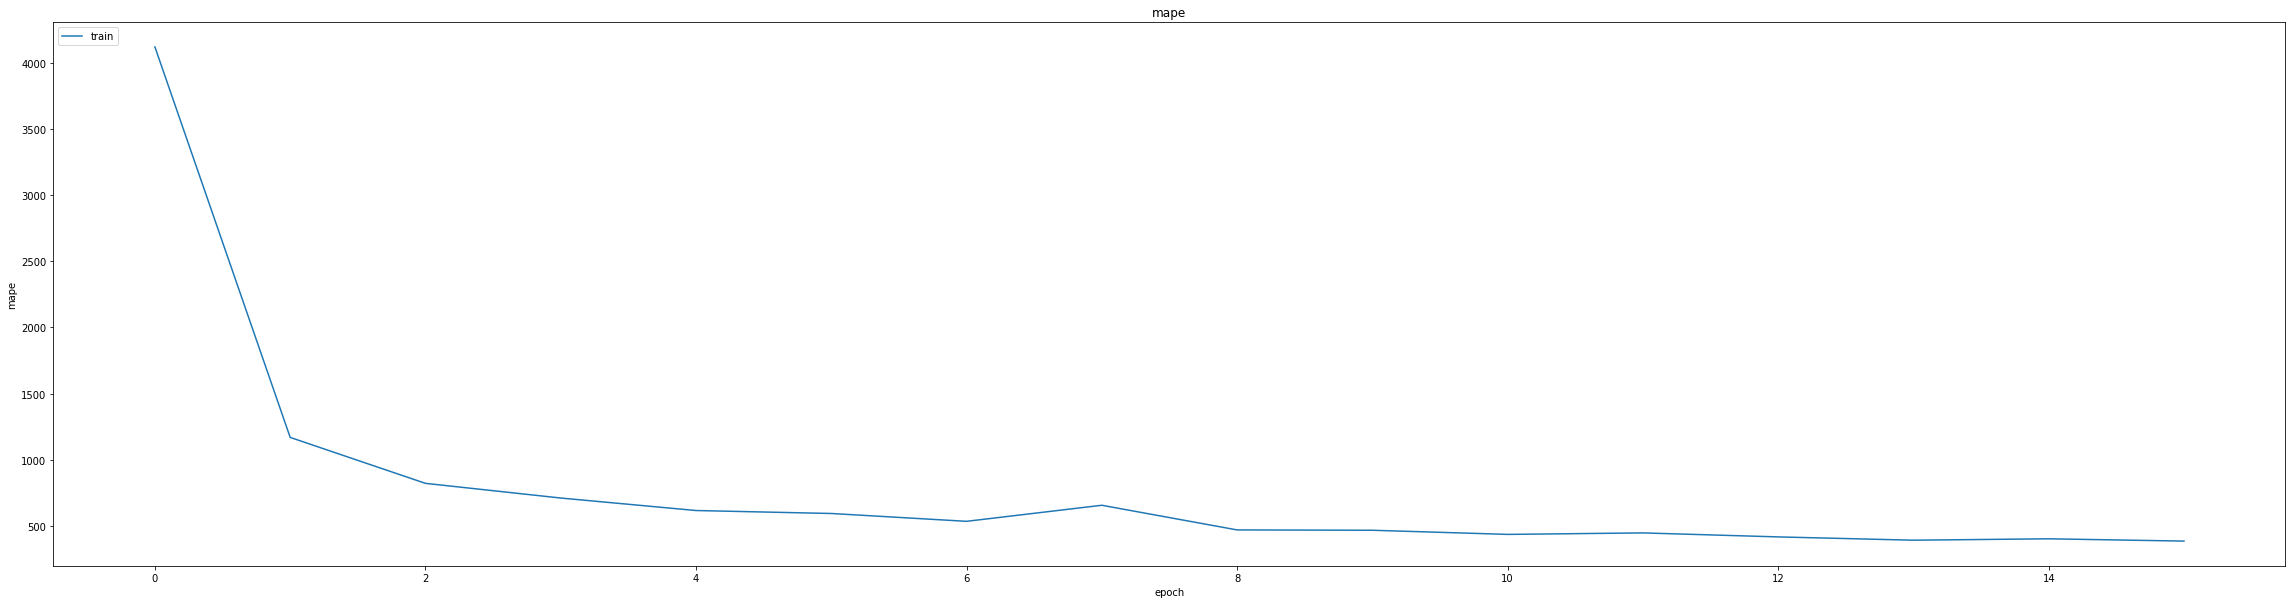

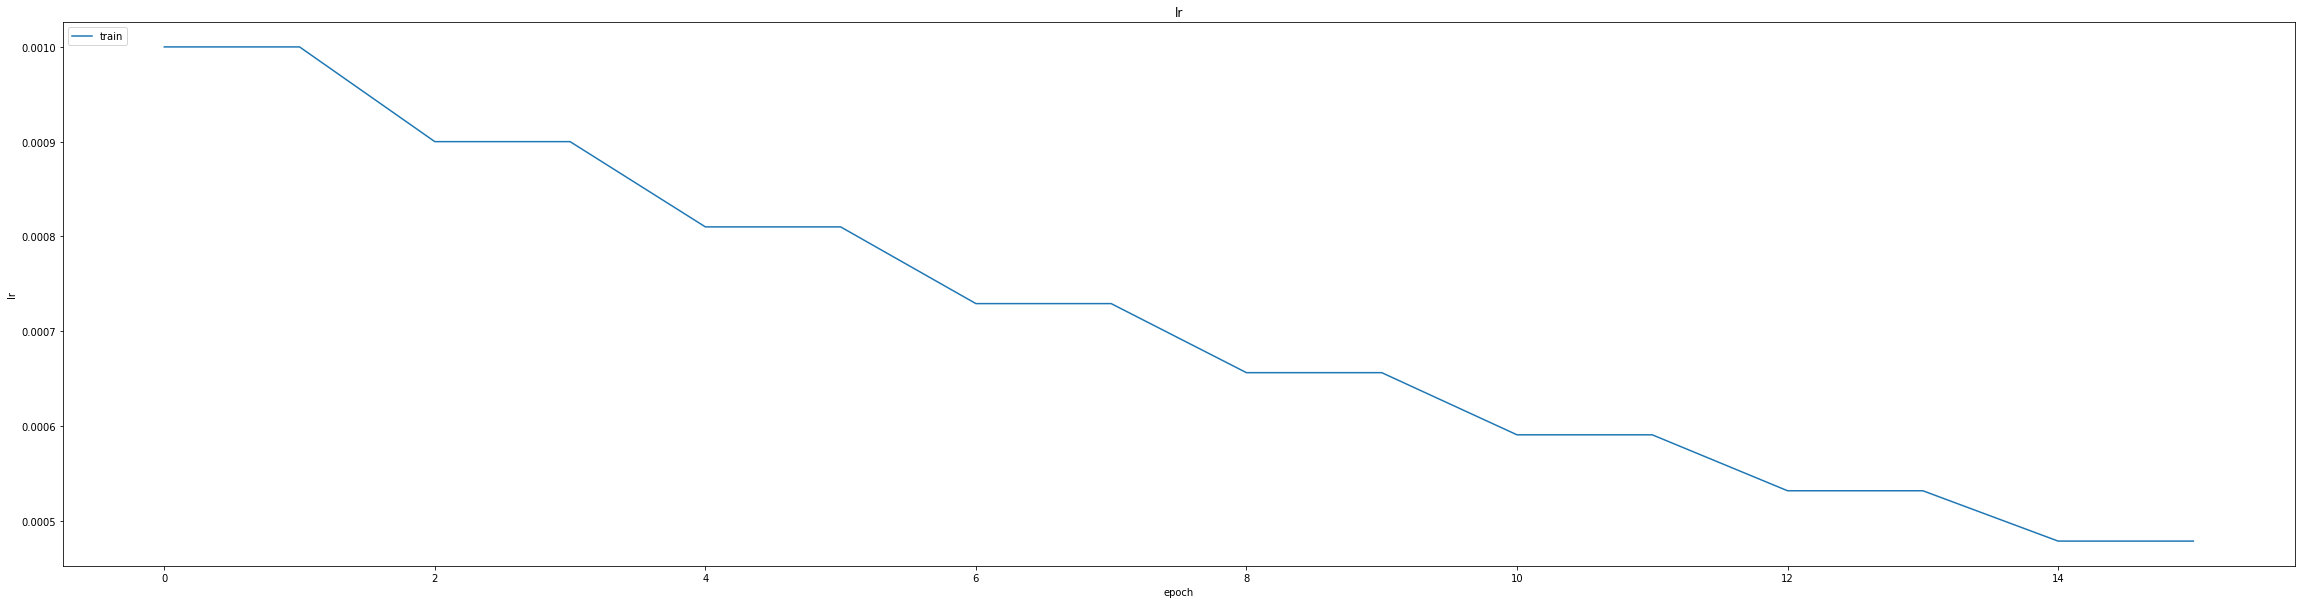

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008019261993467808
0.011057245545089245
1043/1043 [==============================] - 8s 6ms/step
0.9955084414120525


1043/1043 [==============================] - 6s 6ms/step


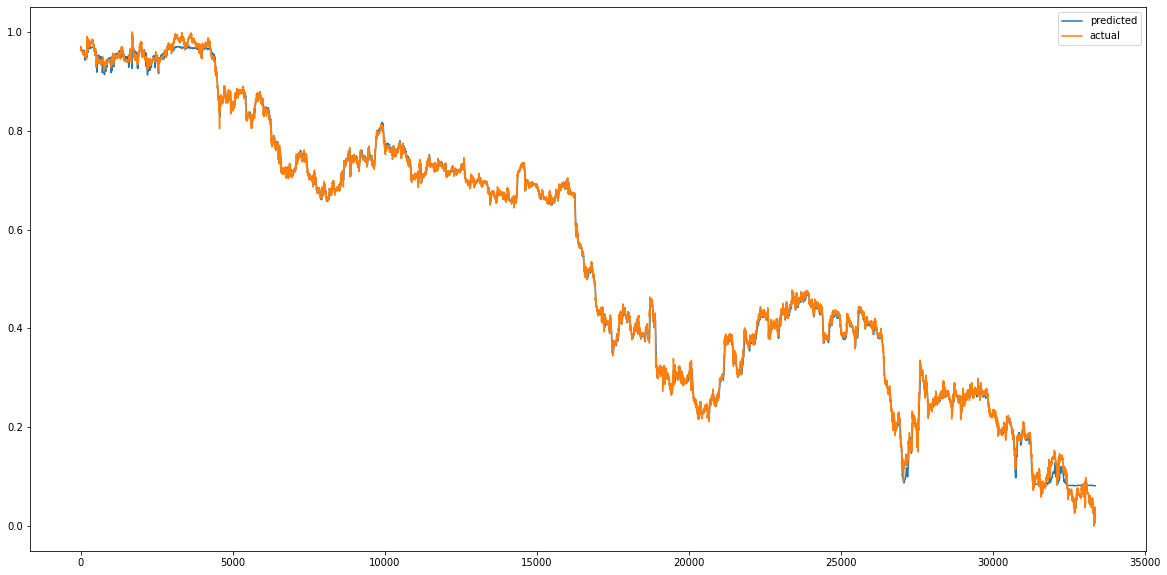

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


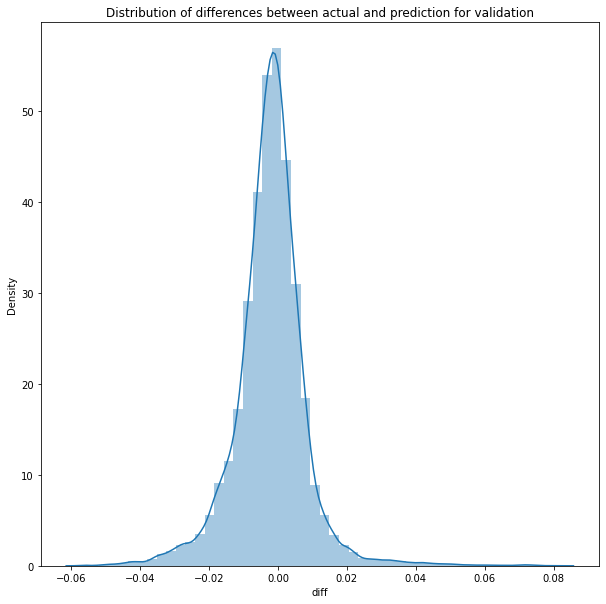

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 8s 7ms/step


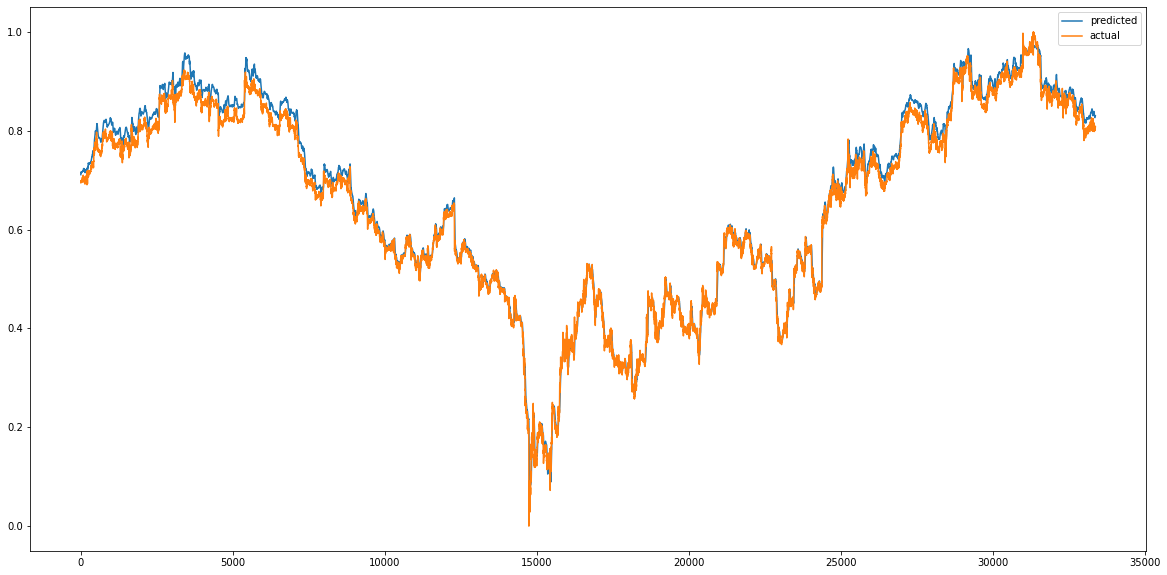

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


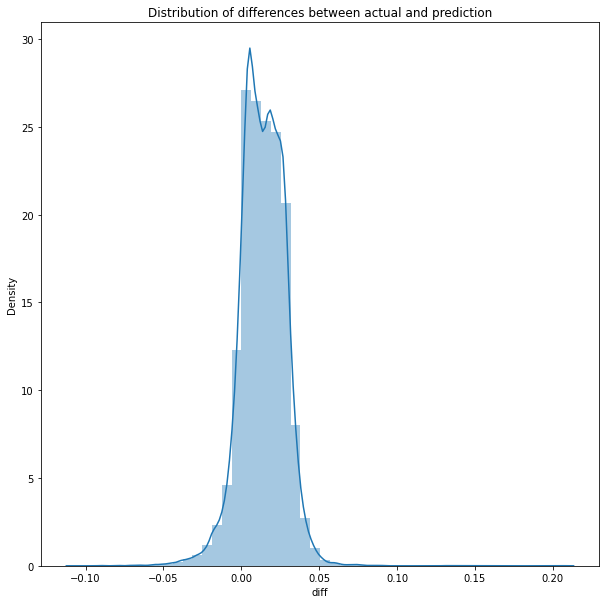

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.000385791002673782
RMSE :  0.01964156314232098
MAE :  0.016018157871529347
1043/1043 [==============================] - 7s 6ms/step
R2_Score  : 0.9901943629154236


count    33376.000000
mean         0.013586
std          0.014185
min         -0.107077
25%          0.004472
50%          0.013651
75%          0.023546
max          0.208005
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           275456    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60


402/405 [============================>.] - ETA: 0s - loss: 675.4169 - mae: 9.8878 - mse: 675.4169 - root_mean_squared_error: 25.9888 - mape: 28258.9629
Epoch 1: val_mse improved from inf to 0.96693, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 46s 45ms/step - loss: 670.7852 - mae: 9.8259 - mse: 670.7852 - root_mean_squared_error: 25.8995 - mape: 28066.0957 - val_loss: 0.9669 - val_mae: 0.9449 - val_mse: 0.9669 - val_root_mean_squared_error: 0.9833 - val_mape: 45022.2773
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 0.2474 - mae: 0.4153 - mse: 0.2474 - root_mean_squared_error: 0.4974 - mape: 7371.4336
Epoch 2: val_mse improved from 0.96693 to 0.14183, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.2467 - mae: 0.4143 - mse: 0.2467 - root_mean_squared_error: 0.4966 - mape: 7339.2812 - val_loss: 0.1418 - val_mae: 0.3068 - val_mse: 0.1418 - val_root_mean_squared_error: 0.3766 - val_mape: 24303.8359
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.0496 - mae: 0.1745 - mse: 0.0496 - root_mean_squared_error: 0.2227 - mape: 4815.3394
Epoch 3: val_mse improved from 0.14183 to 0.09152, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.0496 - mae: 0.1744 - mse: 0.0496 - root_mean_squared_error: 0.2227 - mape: 4794.3789 - val_loss: 0.0915 - val_mae: 0.2490 - val_mse: 0.0915 - val_root_mean_squared_error: 0.3025 - val_mape: 20430.6172
Epoch 4/60
403/405 [============================>.] - ETA: 0s - loss: 0.0408 - mae: 0.1671 - mse: 0.0408 - root_mean_squared_error: 0.2019 - mape: 4546.3926
Epoch 4: val_mse improved from 0.09152 to 0.08462, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0408 - mae: 0.1671 - mse: 0.0408 - root_mean_squared_error: 0.2019 - mape: 4526.5664 - val_loss: 0.0846 - val_mae: 0.2470 - val_mse: 0.0846 - val_root_mean_squared_error: 0.2909 - val_mape: 19544.8184
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.0405 - mae: 0.1681 - mse: 0.0405 - root_mean_squared_error: 0.2014 - mape: 4153.5430
Epoch 5: val_mse improved from 0.08462 to 0.08364, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0405 - mae: 0.1681 - mse: 0.0405 - root_mean_squared_error: 0.2014 - mape: 4153.5430 - val_loss: 0.0836 - val_mae: 0.2469 - val_mse: 0.0836 - val_root_mean_squared_error: 0.2892 - val_mape: 19397.8906
Epoch 6/60
405/405 [==============================] - ETA: 0s - loss: 0.0404 - mae: 0.1681 - mse: 0.0404 - root_mean_squared_error: 0.2011 - mape: 3981.2192
Epoch 6: val_mse improved from 0.08364 to 0.08355, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0404 - mae: 0.1681 - mse: 0.0404 - root_mean_squared_error: 0.2011 - mape: 3981.2192 - val_loss: 0.0836 - val_mae: 0.2469 - val_mse: 0.0836 - val_root_mean_squared_error: 0.2891 - val_mape: 19383.9492
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0404 - mae: 0.1681 - mse: 0.0404 - root_mean_squared_error: 0.2010 - mape: 4220.9580
Epoch 7: val_mse did not improve from 0.08355
405/405 [==============================] - 6s 16ms/step - loss: 0.0404 - mae: 0.1681 - mse: 0.0404 - root_mean_squared_error: 0.2010 - mape: 4212.9023 - val_loss: 0.0836 - val_mae: 0.2469 - val_mse: 0.0836 - val_root_mean_squared_error: 0.2891 - val_mape: 19391.6562
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0405 - mae: 0.1683 - mse: 0.0405 - root_mean_squared_error: 0.2012 - mape: 4226.5464
Epoch 8: val_mse did not improve from 0.08355
405/405 [==============================] - 6s 16ms/step - l

405/405 [==============================] - 16s 41ms/step - loss: 0.0315 - mae: 0.1437 - mse: 0.0315 - root_mean_squared_error: 0.1775 - mape: 4393.7607 - val_loss: 0.0373 - val_mae: 0.1504 - val_mse: 0.0373 - val_root_mean_squared_error: 0.1930 - val_mape: 15586.2852
Epoch 29/60
405/405 [==============================] - ETA: 0s - loss: 0.0076 - mae: 0.0637 - mse: 0.0076 - root_mean_squared_error: 0.0872 - mape: 3549.9580
Epoch 29: val_mse improved from 0.03725 to 0.01037, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 44ms/step - loss: 0.0076 - mae: 0.0637 - mse: 0.0076 - root_mean_squared_error: 0.0872 - mape: 3549.9580 - val_loss: 0.0104 - val_mae: 0.0797 - val_mse: 0.0104 - val_root_mean_squared_error: 0.1018 - val_mape: 10576.7832
Epoch 30/60
403/405 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0463 - mse: 0.0039 - root_mean_squared_error: 0.0628 - mape: 2533.4197
Epoch 30: val_mse improved from 0.01037 to 0.00513, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0039 - mae: 0.0463 - mse: 0.0039 - root_mean_squared_error: 0.0628 - mape: 2522.3313 - val_loss: 0.0051 - val_mae: 0.0446 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0716 - val_mape: 9117.1377
Epoch 31/60
402/405 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0378 - mse: 0.0026 - root_mean_squared_error: 0.0513 - mape: 1826.3364
Epoch 31: val_mse improved from 0.00513 to 0.00371, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 18s 45ms/step - loss: 0.0026 - mae: 0.0378 - mse: 0.0026 - root_mean_squared_error: 0.0513 - mape: 1813.9019 - val_loss: 0.0037 - val_mae: 0.0424 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0610 - val_mape: 8025.2427
Epoch 32/60
404/405 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0326 - mse: 0.0019 - root_mean_squared_error: 0.0440 - mape: 1871.4865
Epoch 32: val_mse improved from 0.00371 to 0.00298, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0019 - mae: 0.0326 - mse: 0.0019 - root_mean_squared_error: 0.0440 - mape: 1867.8953 - val_loss: 0.0030 - val_mae: 0.0414 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0546 - val_mape: 7078.0933
Epoch 33/60
403/405 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0291 - mse: 0.0015 - root_mean_squared_error: 0.0393 - mape: 1823.3964
Epoch 33: val_mse improved from 0.00298 to 0.00195, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0015 - mae: 0.0291 - mse: 0.0015 - root_mean_squared_error: 0.0393 - mape: 1815.4082 - val_loss: 0.0019 - val_mae: 0.0311 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0442 - val_mape: 6562.4834
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0262 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 1597.0372
Epoch 34: val_mse improved from 0.00195 to 0.00187, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0013 - mae: 0.0262 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 1590.0559 - val_loss: 0.0019 - val_mae: 0.0313 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0432 - val_mape: 6132.5474
Epoch 35/60
405/405 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 1711.5941
Epoch 35: val_mse improved from 0.00187 to 0.00174, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)


405/405 [==============================] - 17s 43ms/step - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 1711.5941 - val_loss: 0.0017 - val_mae: 0.0342 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 5644.2505
Epoch 36/60
405/405 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0238 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1128.6902
Epoch 36: val_mse did not improve from 0.00174
405/405 [==============================] - 6s 16ms/step - loss: 0.0010 - mae: 0.0238 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1128.6902 - val_loss: 0.0018 - val_mae: 0.0377 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0429 - val_mape: 5269.6733
Epoch 37/60
404/405 [============================>.] - ETA: 0s - loss: 8.8914e-04 - mae: 0.0224 - mse: 8.8914e-04 - root_mean_squared_error: 0.0298 - mape: 1069.7892
Epoch 37: val_mse improved from 0.00174 to 0.00149, saving model to /content/drive/MyDrive/model

405/405 [==============================] - 16s 41ms/step - loss: 8.8872e-04 - mae: 0.0224 - mse: 8.8872e-04 - root_mean_squared_error: 0.0298 - mape: 1067.7386 - val_loss: 0.0015 - val_mae: 0.0319 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mape: 4937.5967
Epoch 38/60
404/405 [============================>.] - ETA: 0s - loss: 7.6192e-04 - mae: 0.0208 - mse: 7.6192e-04 - root_mean_squared_error: 0.0276 - mape: 958.4010
Epoch 38: val_mse did not improve from 0.00149
405/405 [==============================] - 6s 16ms/step - loss: 7.6219e-04 - mae: 0.0208 - mse: 7.6219e-04 - root_mean_squared_error: 0.0276 - mape: 956.5706 - val_loss: 0.0016 - val_mae: 0.0362 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0403 - val_mape: 4647.5127
Epoch 39/60
405/405 [==============================] - ETA: 0s - loss: 6.6234e-04 - mae: 0.0196 - mse: 6.6234e-04 - root_mean_squared_error: 0.0257 - mape: 1005.4216
Epoch 39: val_mse improved from 0.00149 to 0.00083, saving model to /conte

405/405 [==============================] - 17s 43ms/step - loss: 6.6234e-04 - mae: 0.0196 - mse: 6.6234e-04 - root_mean_squared_error: 0.0257 - mape: 1005.4216 - val_loss: 8.2946e-04 - val_mae: 0.0227 - val_mse: 8.2946e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 4438.4707
Epoch 40/60
404/405 [============================>.] - ETA: 0s - loss: 5.3550e-04 - mae: 0.0176 - mse: 5.3550e-04 - root_mean_squared_error: 0.0231 - mape: 1088.0233
Epoch 40: val_mse did not improve from 0.00083
405/405 [==============================] - 6s 15ms/step - loss: 5.3547e-04 - mae: 0.0176 - mse: 5.3547e-04 - root_mean_squared_error: 0.0231 - mape: 1085.9355 - val_loss: 0.0011 - val_mae: 0.0289 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0327 - val_mape: 4026.2576
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 4.6099e-04 - mae: 0.0164 - mse: 4.6099e-04 - root_mean_squared_error: 0.0215 - mape: 924.1260
Epoch 41: val_mse improved from 0.00083 to 0.00078, saving model 

405/405 [==============================] - 17s 43ms/step - loss: 4.6081e-04 - mae: 0.0164 - mse: 4.6081e-04 - root_mean_squared_error: 0.0215 - mape: 920.0894 - val_loss: 7.8472e-04 - val_mae: 0.0246 - val_mse: 7.8472e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 3742.0020
Epoch 42/60
402/405 [============================>.] - ETA: 0s - loss: 3.9223e-04 - mae: 0.0152 - mse: 3.9223e-04 - root_mean_squared_error: 0.0198 - mape: 916.6736
Epoch 42: val_mse did not improve from 0.00078
405/405 [==============================] - 6s 16ms/step - loss: 3.9237e-04 - mae: 0.0152 - mse: 3.9237e-04 - root_mean_squared_error: 0.0198 - mape: 910.4053 - val_loss: 0.0013 - val_mae: 0.0321 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 3541.7498
Epoch 43/60
403/405 [============================>.] - ETA: 0s - loss: 3.4111e-04 - mae: 0.0142 - mse: 3.4111e-04 - root_mean_squared_error: 0.0185 - mape: 636.0050
Epoch 43: val_mse improved from 0.00078 to 0.00068, saving model to 

405/405 [==============================] - 17s 42ms/step - loss: 3.4070e-04 - mae: 0.0142 - mse: 3.4070e-04 - root_mean_squared_error: 0.0185 - mape: 633.2240 - val_loss: 6.7777e-04 - val_mae: 0.0231 - val_mse: 6.7777e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 3304.7502
Epoch 44/60
404/405 [============================>.] - ETA: 0s - loss: 3.1448e-04 - mae: 0.0137 - mse: 3.1448e-04 - root_mean_squared_error: 0.0177 - mape: 858.0611
Epoch 44: val_mse did not improve from 0.00068
405/405 [==============================] - 6s 16ms/step - loss: 3.1457e-04 - mae: 0.0137 - mse: 3.1457e-04 - root_mean_squared_error: 0.0177 - mape: 856.4167 - val_loss: 0.0010 - val_mae: 0.0288 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 3104.4253
Epoch 45/60
405/405 [==============================] - ETA: 0s - loss: 2.8917e-04 - mae: 0.0132 - mse: 2.8917e-04 - root_mean_squared_error: 0.0170 - mape: 529.8871
Epoch 45: val_mse improved from 0.00068 to 0.00067, saving model to 

405/405 [==============================] - 17s 42ms/step - loss: 2.8917e-04 - mae: 0.0132 - mse: 2.8917e-04 - root_mean_squared_error: 0.0170 - mape: 529.8871 - val_loss: 6.6754e-04 - val_mae: 0.0229 - val_mse: 6.6754e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 3081.9341
Epoch 46/60
404/405 [============================>.] - ETA: 0s - loss: 2.4194e-04 - mae: 0.0120 - mse: 2.4194e-04 - root_mean_squared_error: 0.0156 - mape: 524.5090
Epoch 46: val_mse did not improve from 0.00067
405/405 [==============================] - 6s 16ms/step - loss: 2.4204e-04 - mae: 0.0120 - mse: 2.4204e-04 - root_mean_squared_error: 0.0156 - mape: 523.5051 - val_loss: 7.2543e-04 - val_mae: 0.0242 - val_mse: 7.2543e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 2859.8054
Epoch 47/60
405/405 [==============================] - ETA: 0s - loss: 2.4069e-04 - mae: 0.0120 - mse: 2.4069e-04 - root_mean_squared_error: 0.0155 - mape: 514.2745
Epoch 47: val_mse improved from 0.00067 to 0.00032, saving m

405/405 [==============================] - 17s 43ms/step - loss: 2.4069e-04 - mae: 0.0120 - mse: 2.4069e-04 - root_mean_squared_error: 0.0155 - mape: 514.2745 - val_loss: 3.1604e-04 - val_mae: 0.0145 - val_mse: 3.1604e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 2661.6787
Epoch 48/60
404/405 [============================>.] - ETA: 0s - loss: 2.2409e-04 - mae: 0.0117 - mse: 2.2409e-04 - root_mean_squared_error: 0.0150 - mape: 694.0385
Epoch 48: val_mse did not improve from 0.00032
405/405 [==============================] - 6s 16ms/step - loss: 2.2407e-04 - mae: 0.0117 - mse: 2.2407e-04 - root_mean_squared_error: 0.0150 - mape: 692.7063 - val_loss: 7.8329e-04 - val_mae: 0.0248 - val_mse: 7.8329e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 2530.9866
Epoch 49/60
403/405 [============================>.] - ETA: 0s - loss: 2.0999e-04 - mae: 0.0113 - mse: 2.0999e-04 - root_mean_squared_error: 0.0145 - mape: 466.5630
Epoch 49: val_mse did not improve from 0.00032
405/405 [====

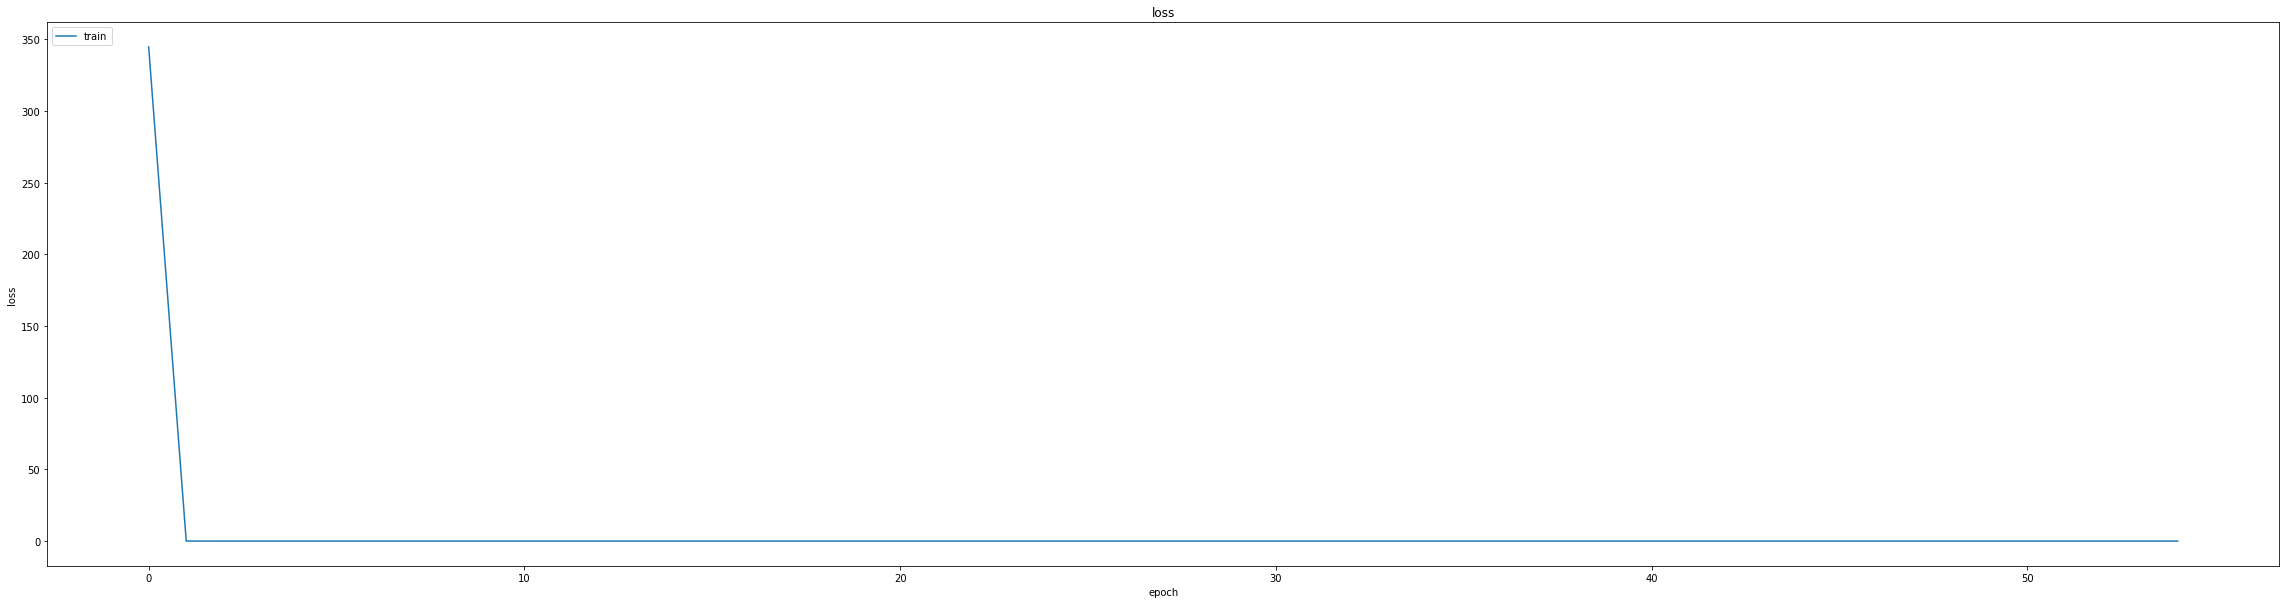

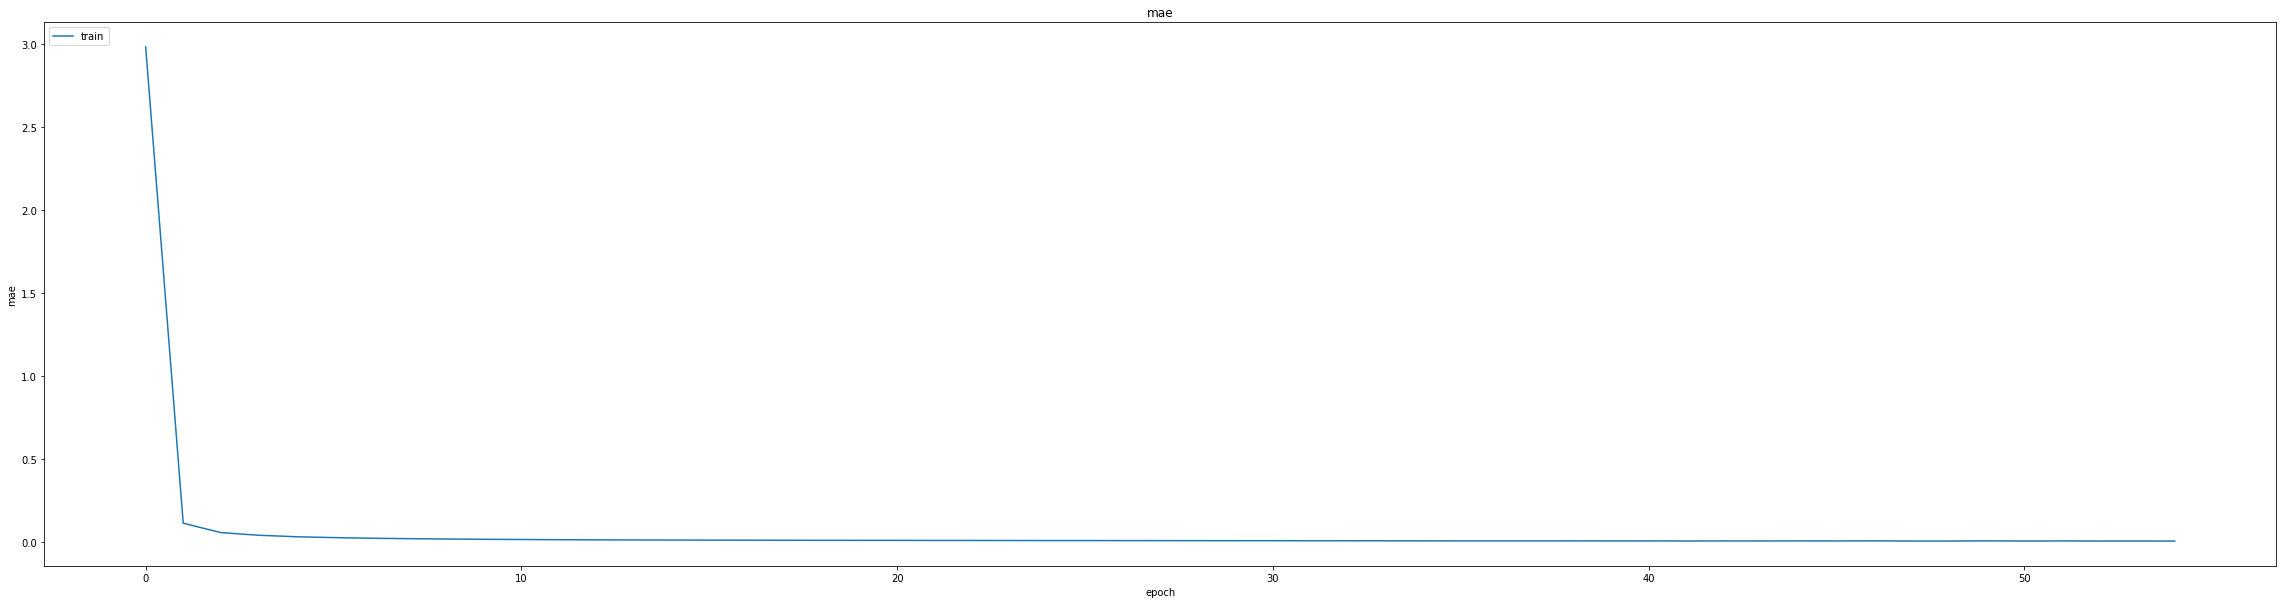

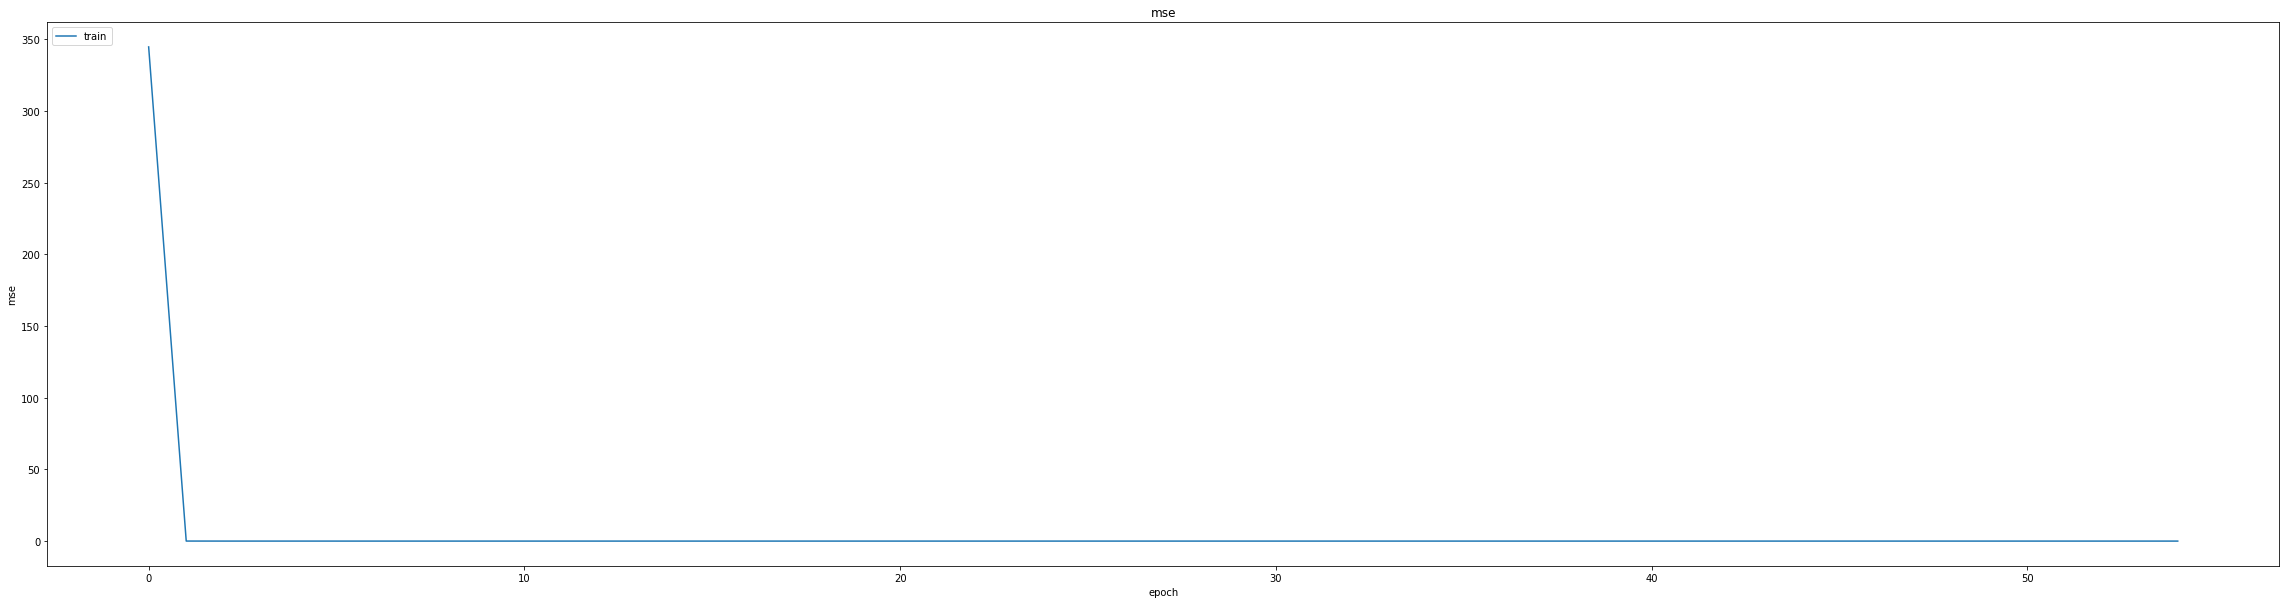

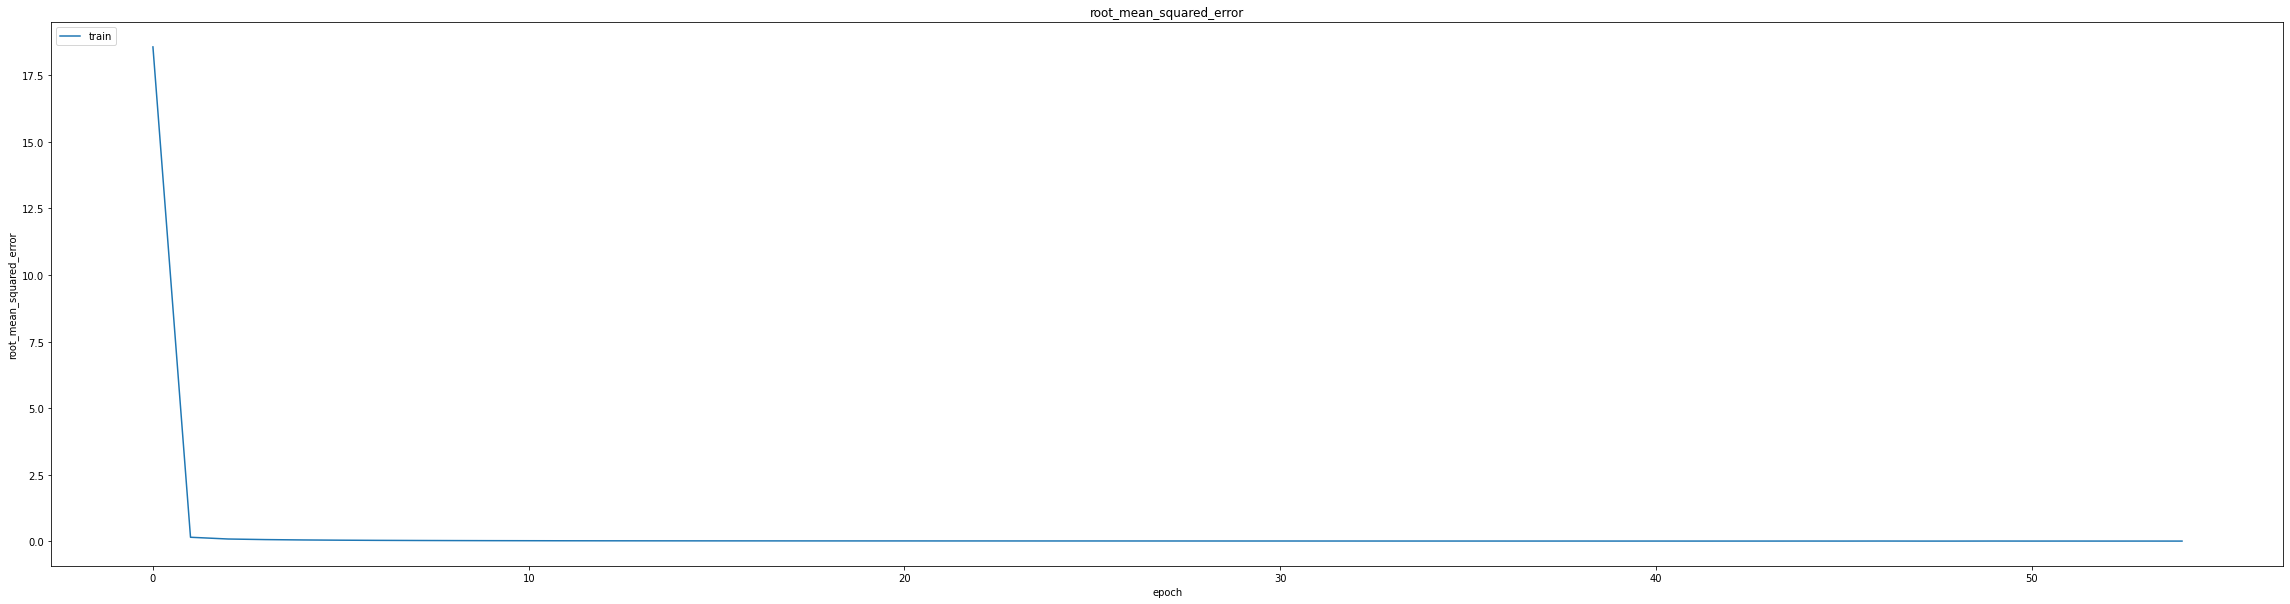

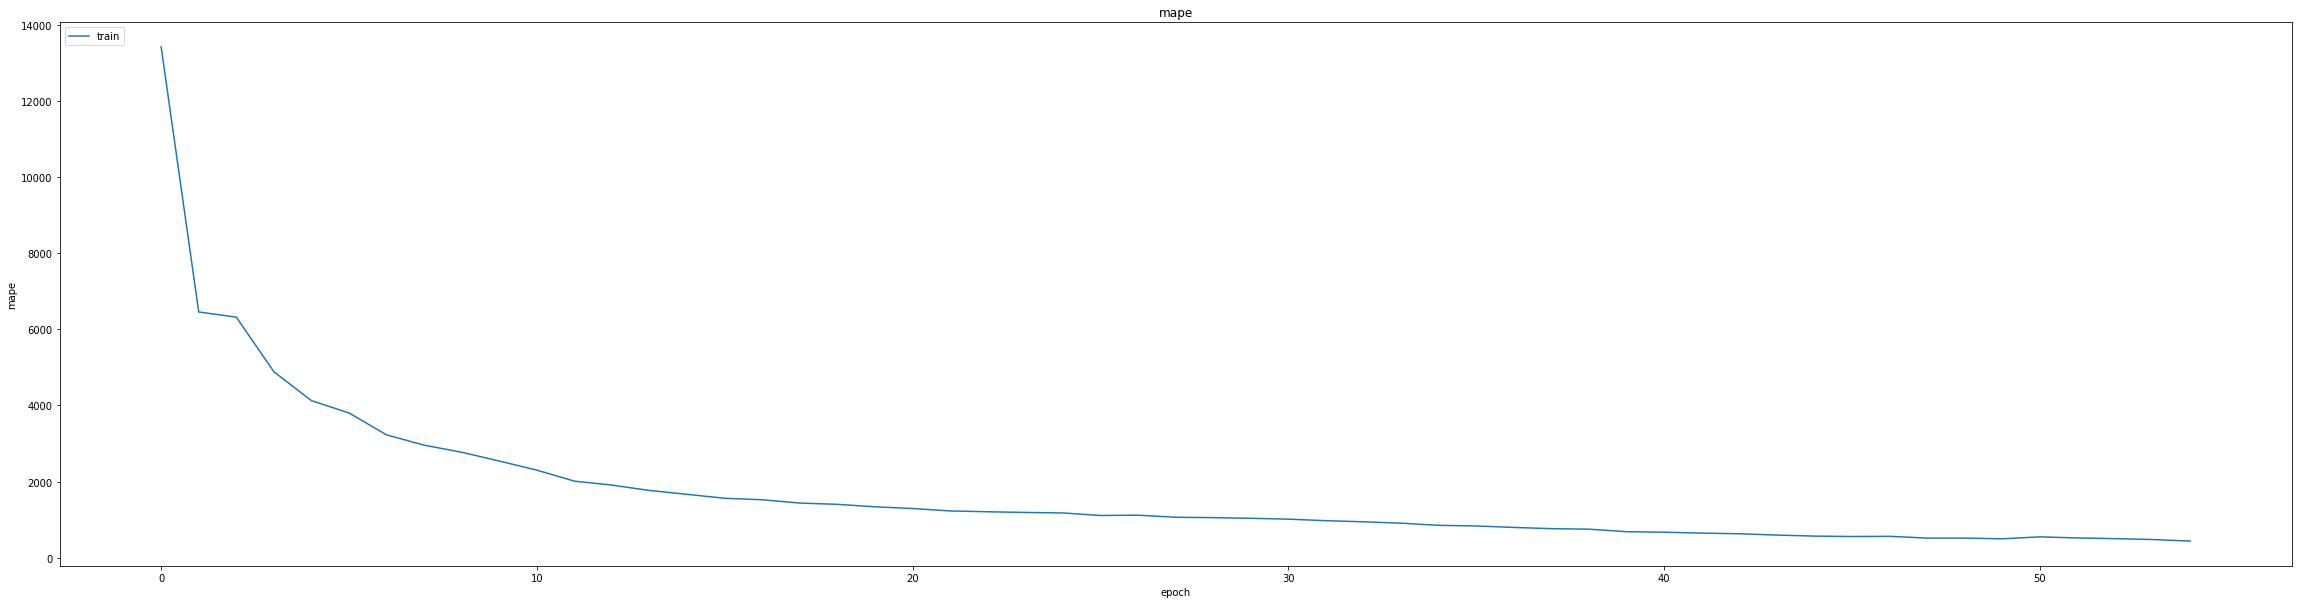

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01667042262852192
0.0239139162003994
234/234 [==============================] - 8s 31ms/step
0.7132904263355182


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0144 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 1328.8593
Epoch 1: val_mse did not improve from 0.00057
464/464 [==============================] - 115s 237ms/step - loss: 0.0011 - mae: 0.0144 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 1328.8593 - val_loss: 9.3652e-04 - val_mae: 0.0228 - val_mse: 9.3652e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 8235.4600 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.3761e-04 - mae: 0.0087 - mse: 1.3761e-04 - root_mean_squared_error: 0.0117 - mape: 860.9949
Epoch 2: val_mse did not improve from 0.00057
464/464 [==============================] - 110s 236ms/step - loss: 1.3761e-04 - mae: 0.0087 - mse: 1.3761e-04 - root_mean_squared_error: 0.0117 - mape: 860.9949 - val_loss: 0.0011 - val_mae: 0.0264 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 6633.5830 - lr: 0.0010
lr chang

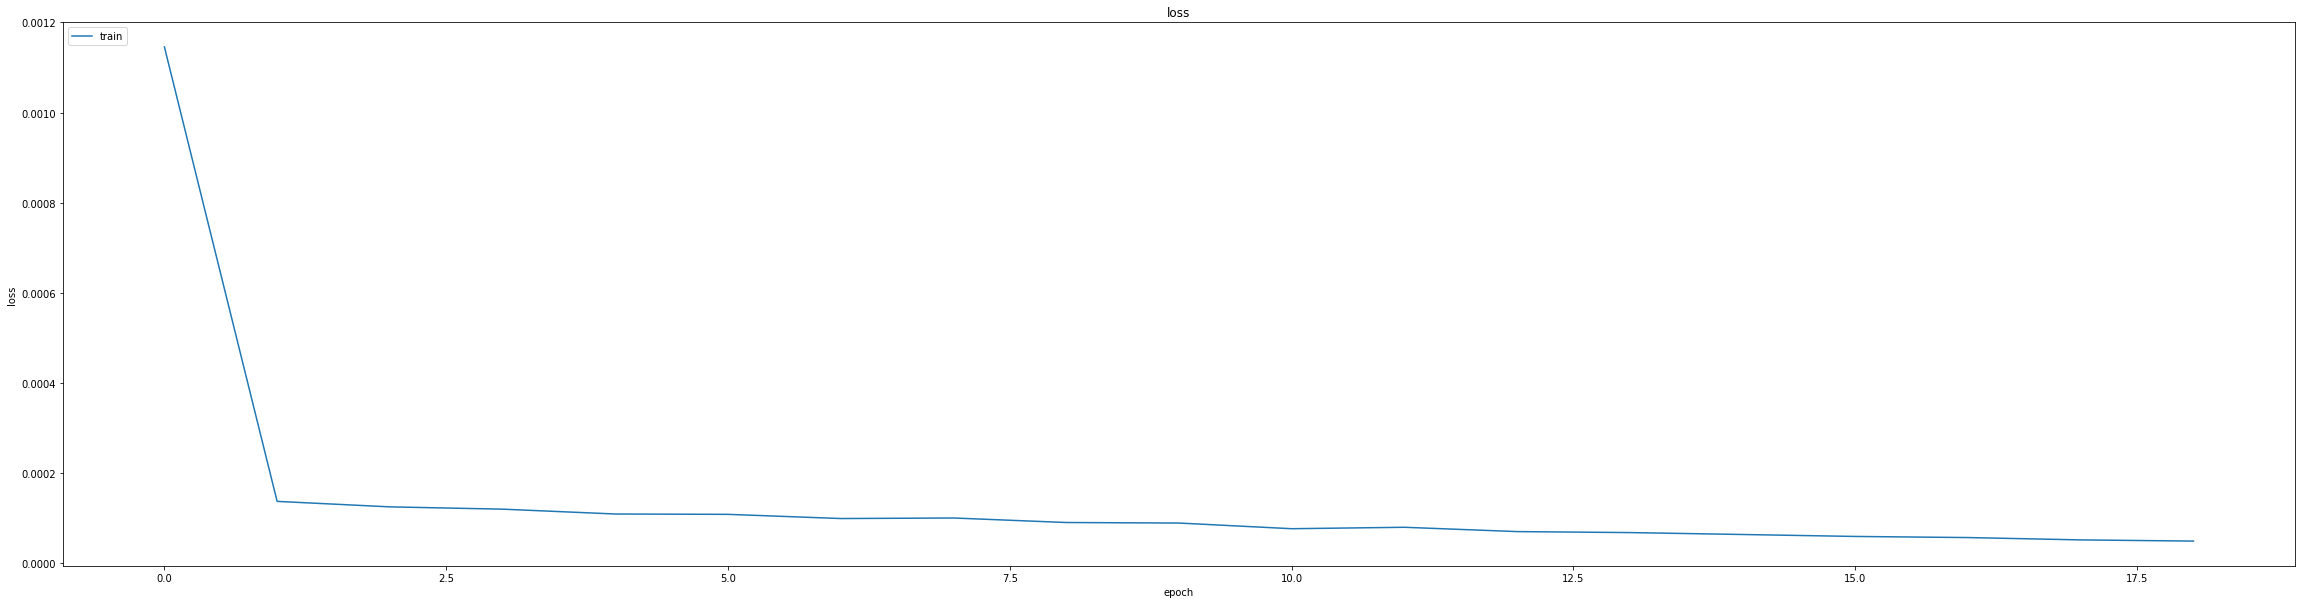

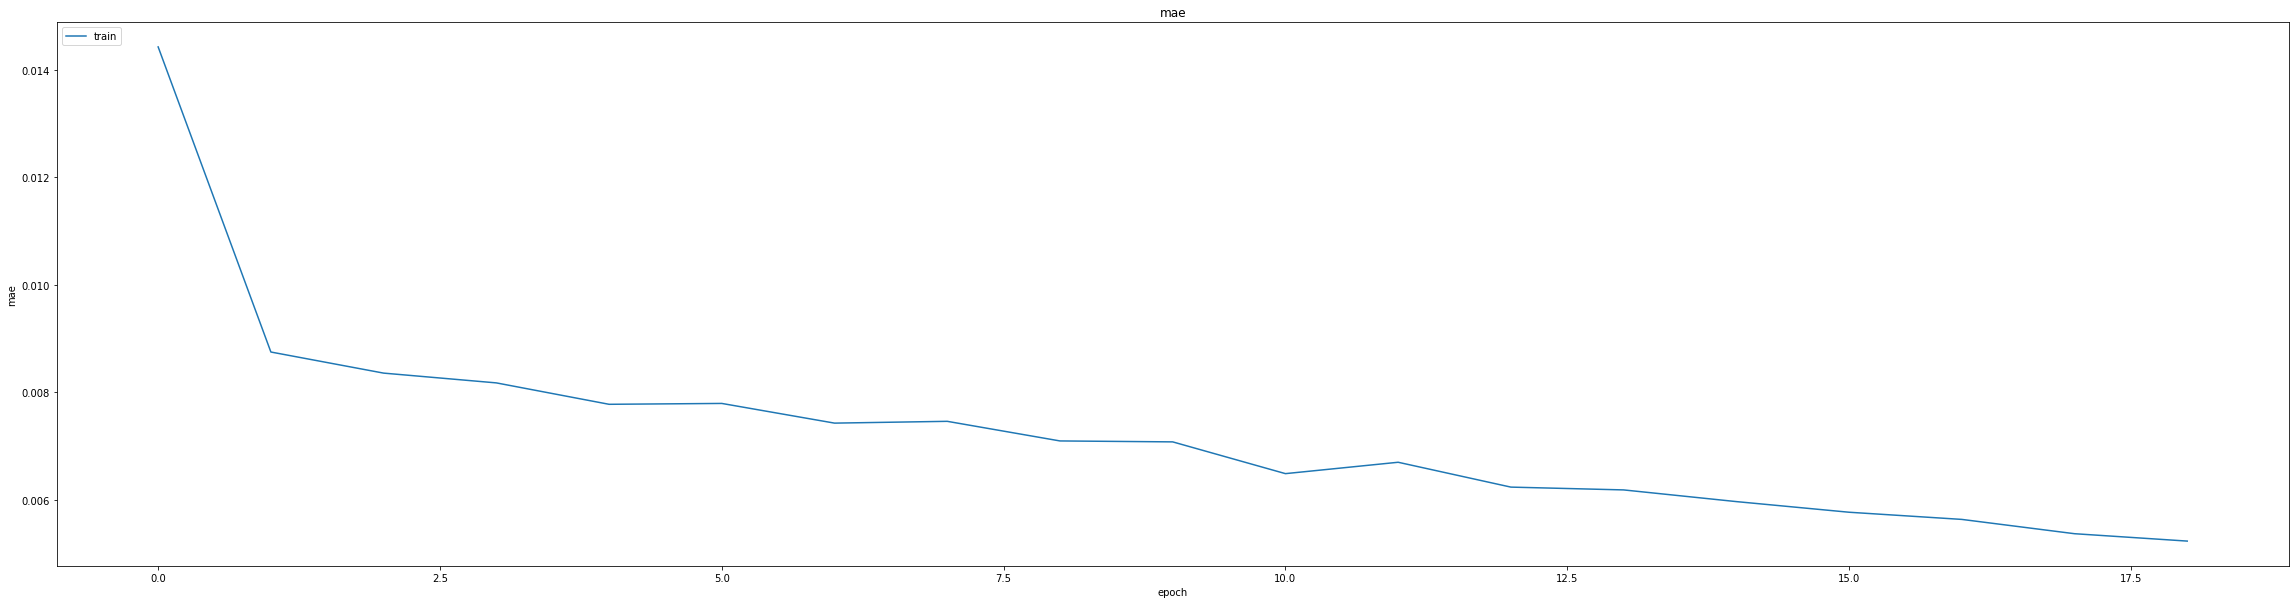

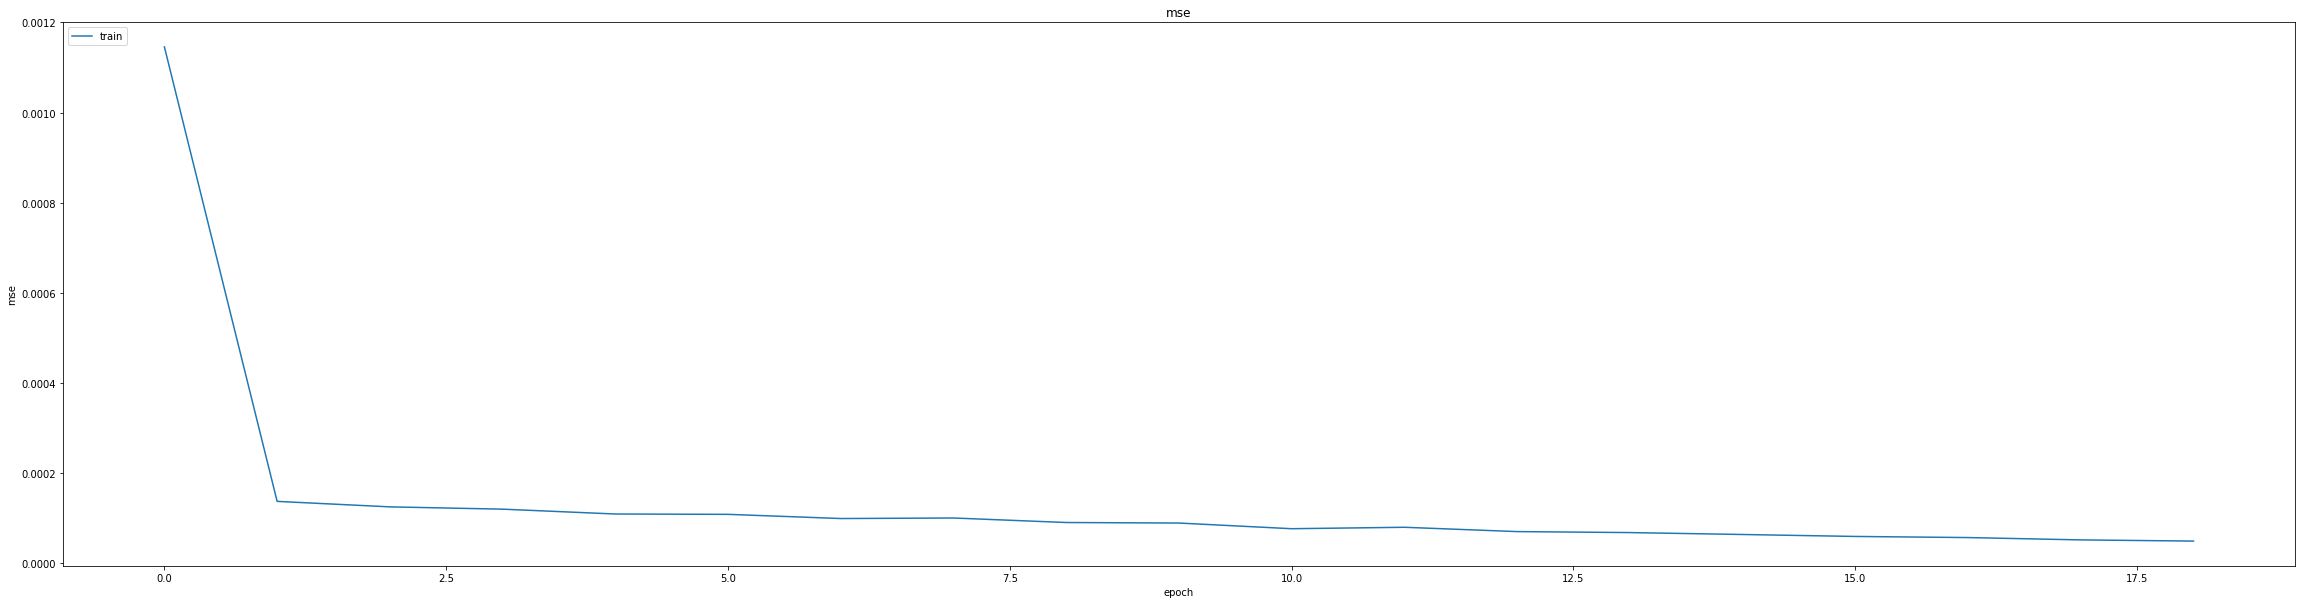

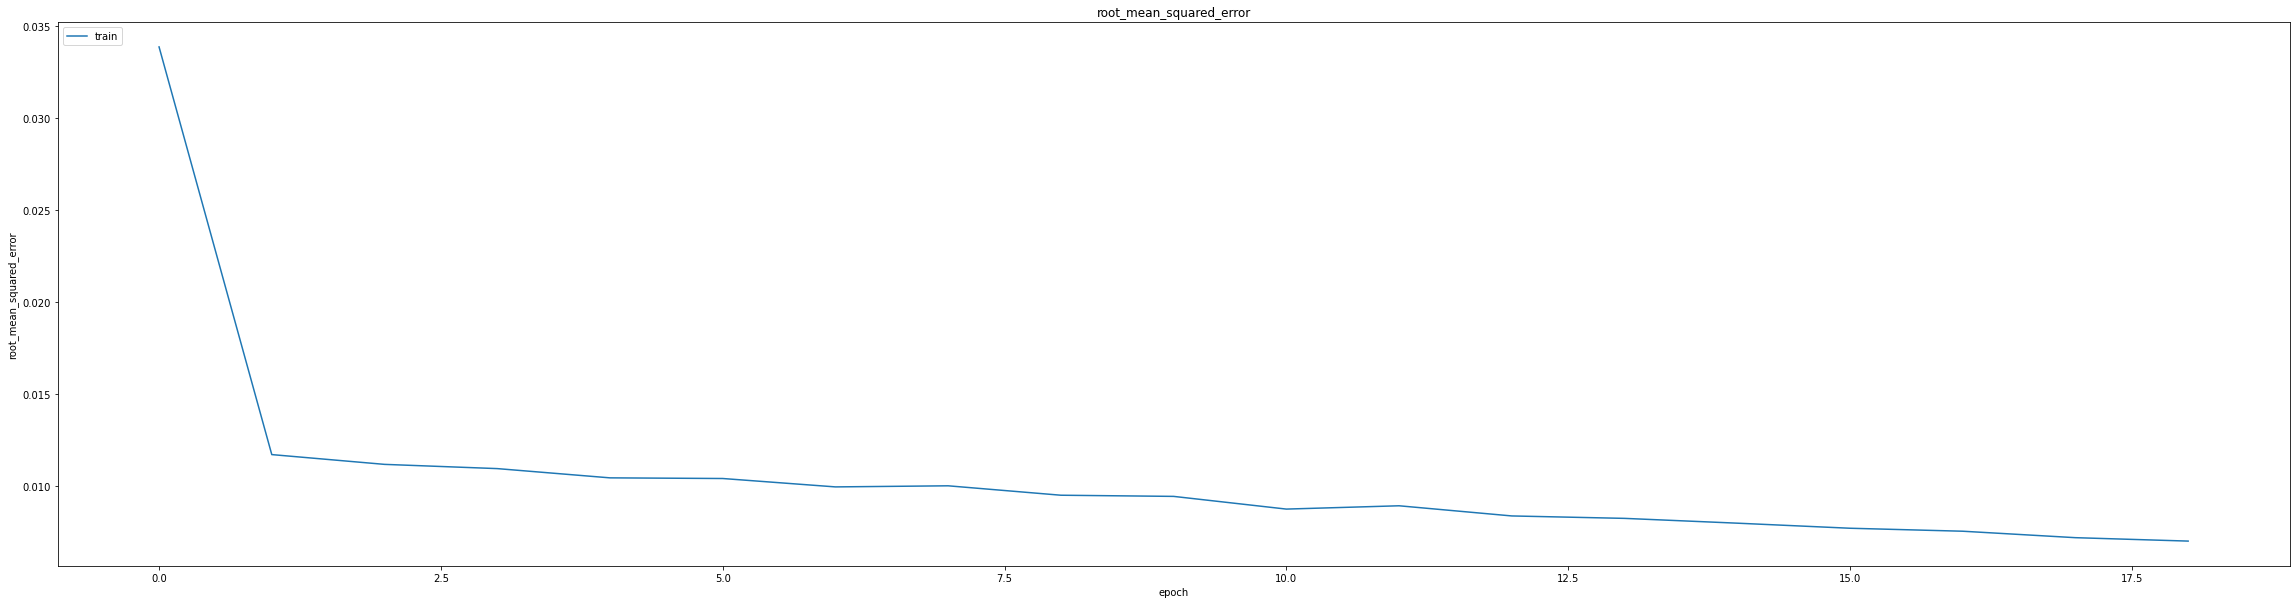

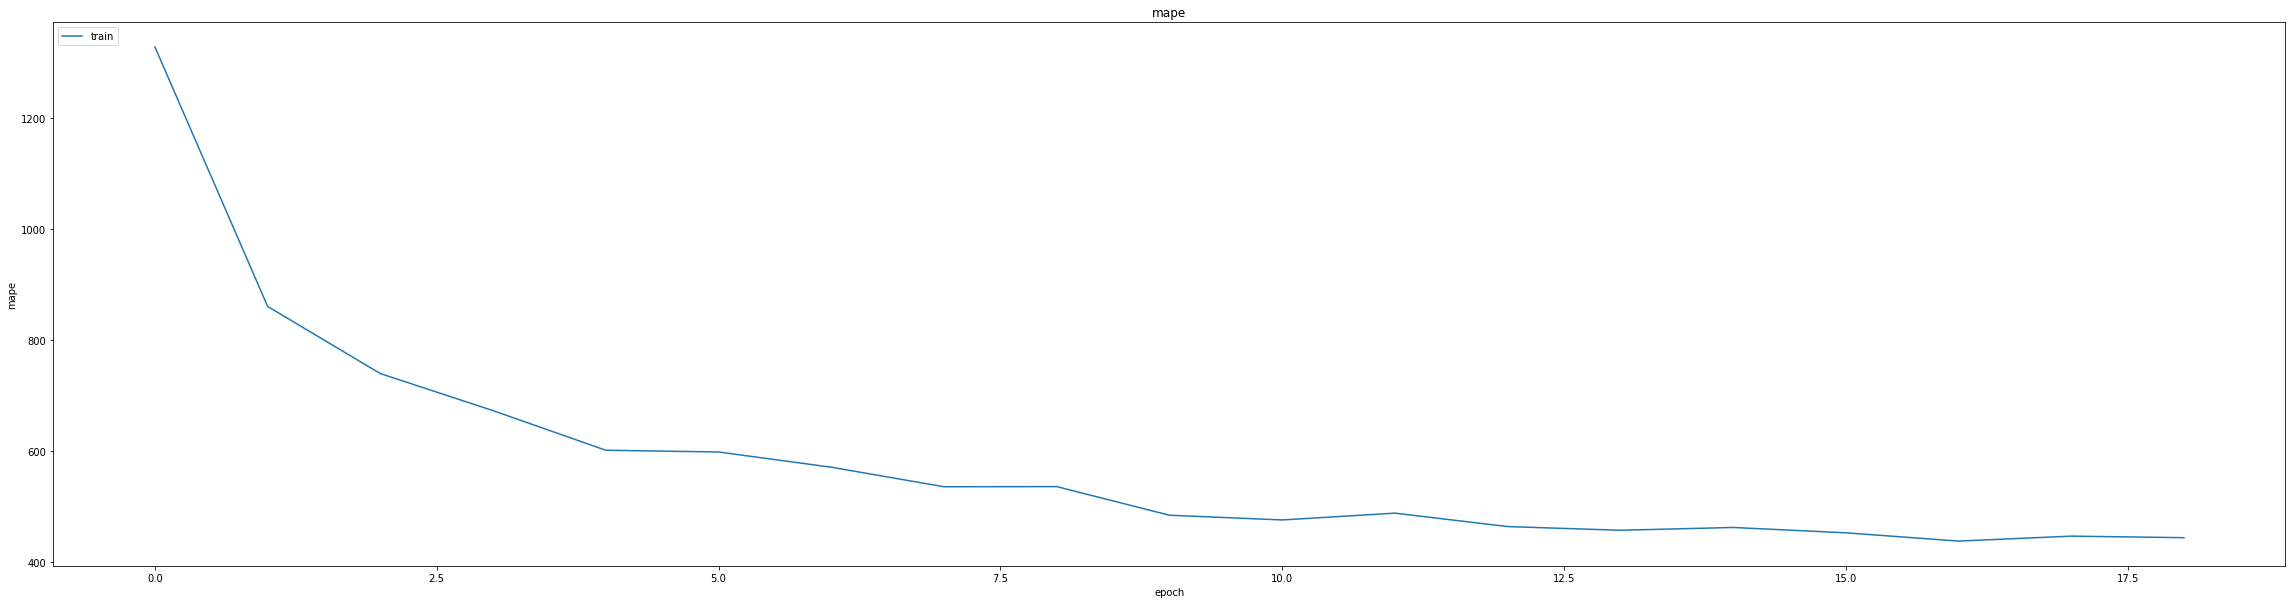

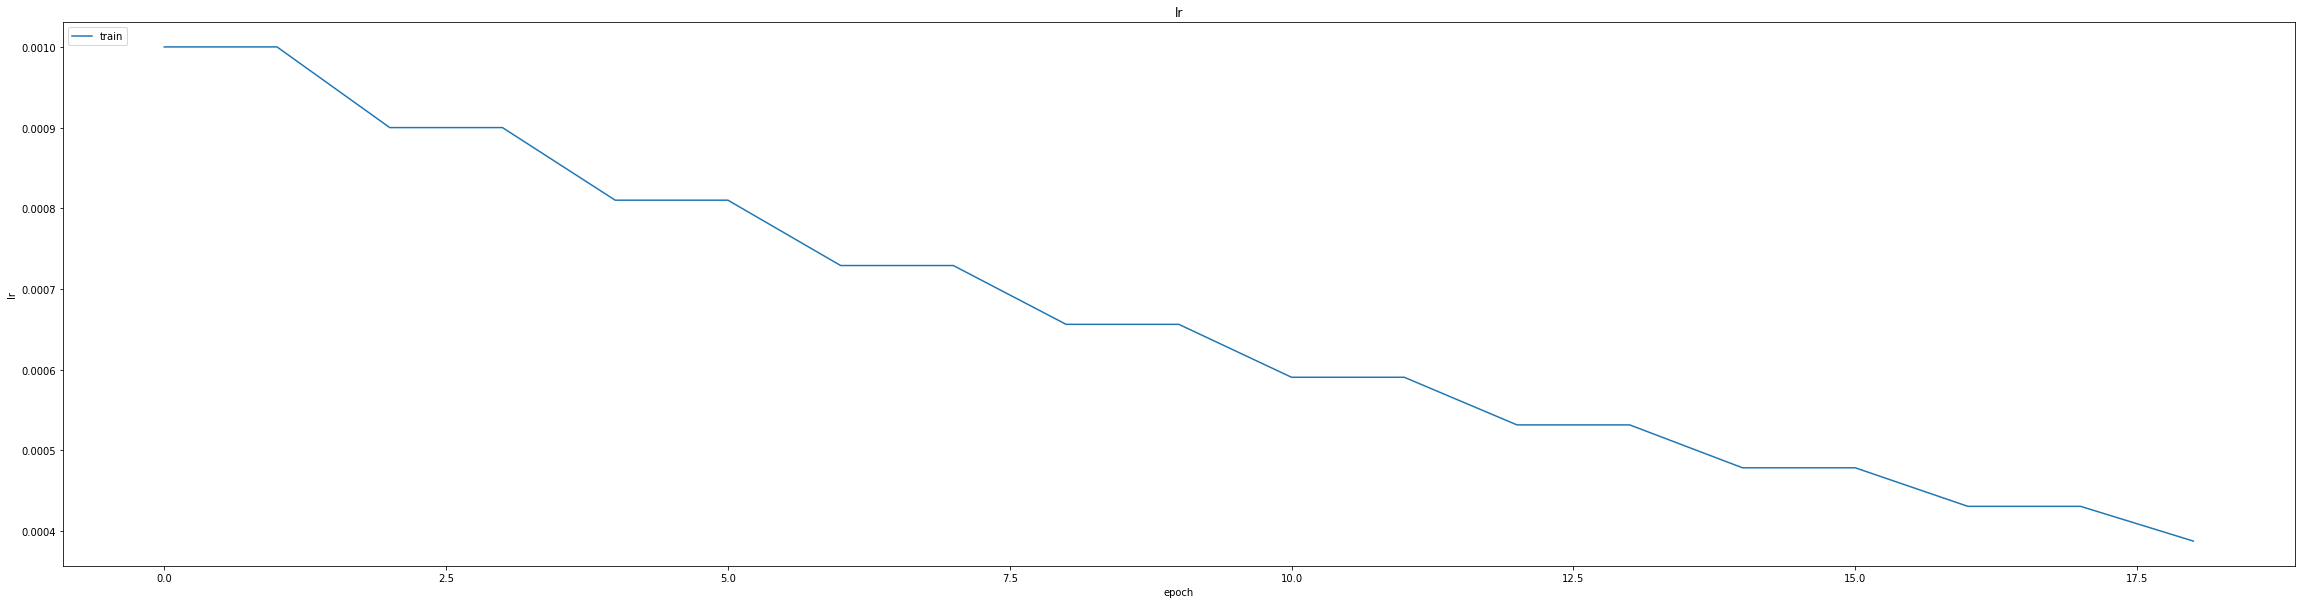

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.022825069725513458
0.030373021960258484
234/234 [==============================] - 10s 42ms/step
0.9831222072020548


1043/1043 [==============================] - 10s 4ms/step


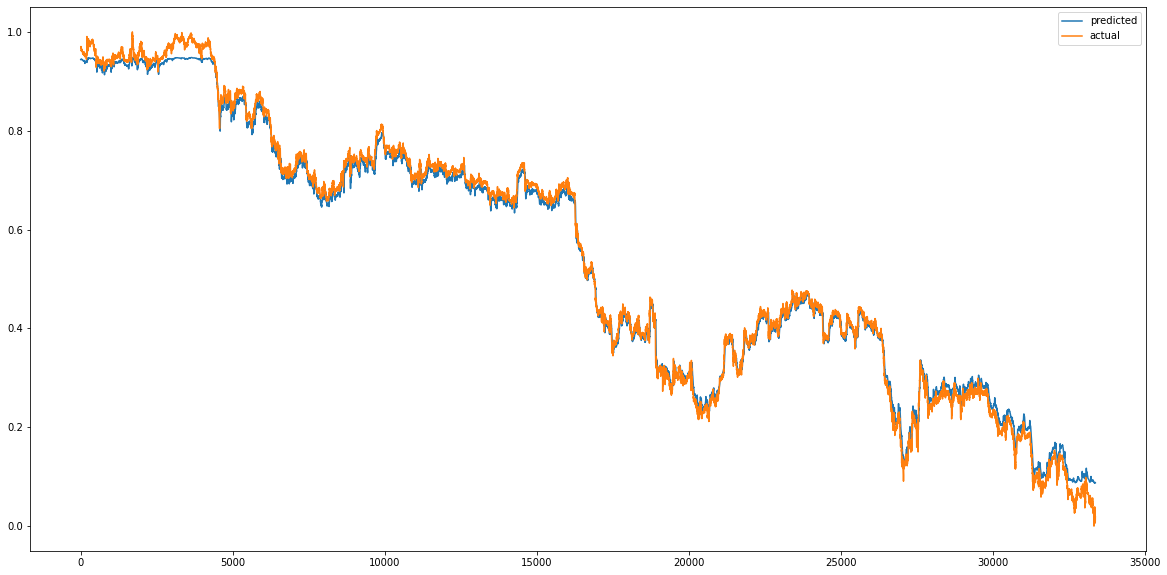

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


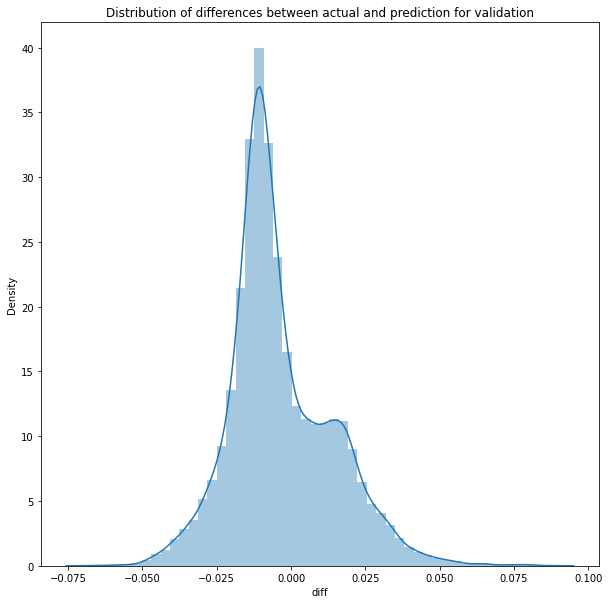

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 4s 4ms/step


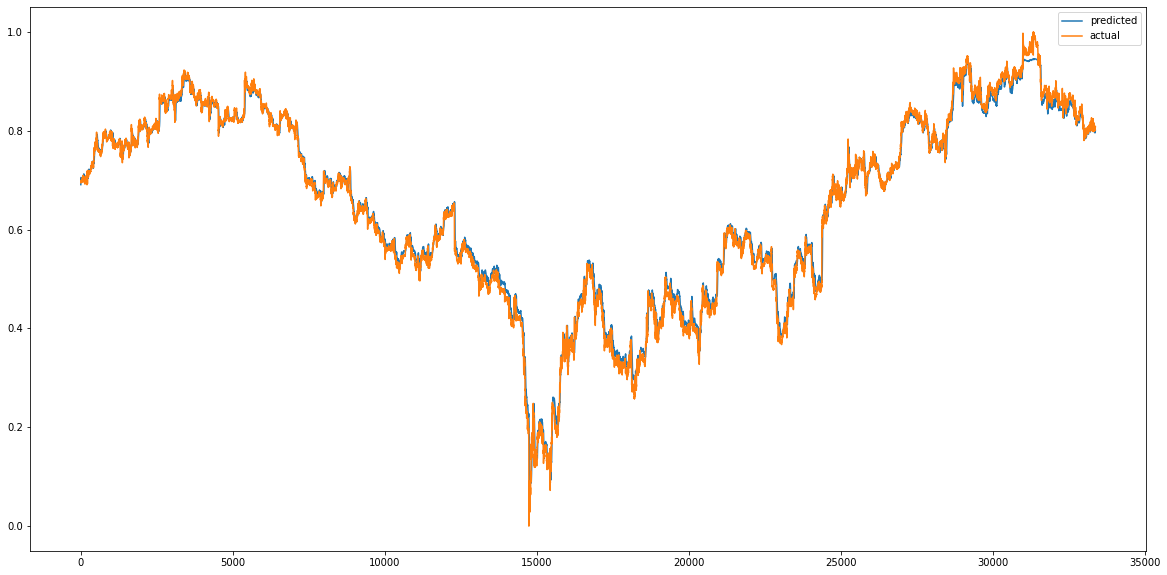

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


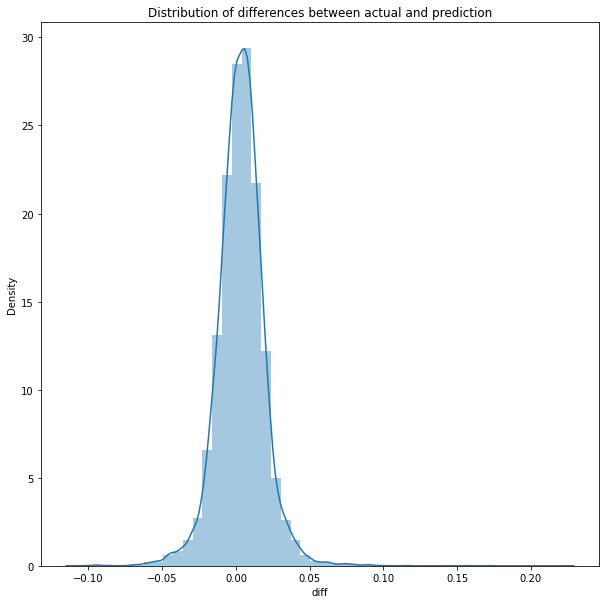

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0002664330111390559
RMSE :  0.016322775840495265
MAE :  0.012008912338315369
1043/1043 [==============================] - 4s 4ms/step
R2_Score  : 0.9932280810149188


count    33376.000000
mean         0.003348
std          0.015976
min         -0.109041
25%         -0.005629
50%          0.003510
75%          0.012341
max          0.222981
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
405/405 [==============================] - ETA: 0s - loss: 1066.9999 - mae: 13.9357 - mse: 1066.9999 - root_mean_squared_error: 32.6650 - mape: 73050.9844
Epoch 1: val_mse improved from inf to 6.91963, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 21s 42ms/step - loss: 1066.9999 - mae: 13.9357 - mse: 1066.9999 - root_mean_squared_error: 32.6650 - mape: 73050.9844 - val_loss: 6.9196 - val_mae: 2.6164 - val_mse: 6.9196 - val_root_mean_squared_error: 2.6305 - val_mape: 95636.5547
Epoch 2/60
403/405 [============================>.] - ETA: 0s - loss: 3.2241 - mae: 1.7413 - mse: 3.2241 - root_mean_squared_error: 1.7956 - mape: 12820.5674
Epoch 2: val_mse improved from 6.91963 to 1.67017, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 3.2164 - mae: 1.7389 - mse: 3.2164 - root_mean_squared_error: 1.7934 - mape: 12765.2520 - val_loss: 1.6702 - val_mae: 1.2633 - val_mse: 1.6702 - val_root_mean_squared_error: 1.2924 - val_mape: 54668.6602
Epoch 3/60
403/405 [============================>.] - ETA: 0s - loss: 0.8863 - mae: 0.9091 - mse: 0.8863 - root_mean_squared_error: 0.9414 - mape: 11575.1689
Epoch 3: val_mse improved from 1.67017 to 0.67654, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.8846 - mae: 0.9081 - mse: 0.8846 - root_mean_squared_error: 0.9405 - mape: 11524.8945 - val_loss: 0.6765 - val_mae: 0.7762 - val_mse: 0.6765 - val_root_mean_squared_error: 0.8225 - val_mape: 39917.5156
Epoch 4/60
405/405 [==============================] - ETA: 0s - loss: 0.3463 - mae: 0.5492 - mse: 0.3463 - root_mean_squared_error: 0.5884 - mape: 7467.4976
Epoch 4: val_mse improved from 0.67654 to 0.35040, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.3463 - mae: 0.5492 - mse: 0.3463 - root_mean_squared_error: 0.5884 - mape: 7467.4976 - val_loss: 0.3504 - val_mae: 0.5257 - val_mse: 0.3504 - val_root_mean_squared_error: 0.5919 - val_mape: 32332.7188
Epoch 5/60
405/405 [==============================] - ETA: 0s - loss: 0.1633 - mae: 0.3500 - mse: 0.1633 - root_mean_squared_error: 0.4041 - mape: 7012.4229
Epoch 5: val_mse improved from 0.35040 to 0.21506, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 42ms/step - loss: 0.1633 - mae: 0.3500 - mse: 0.1633 - root_mean_squared_error: 0.4041 - mape: 7012.4229 - val_loss: 0.2151 - val_mae: 0.3858 - val_mse: 0.2151 - val_root_mean_squared_error: 0.4637 - val_mape: 27786.4668
Epoch 6/60
404/405 [============================>.] - ETA: 0s - loss: 0.0906 - mae: 0.2352 - mse: 0.0906 - root_mean_squared_error: 0.3010 - mape: 5643.2046
Epoch 6: val_mse improved from 0.21506 to 0.15151, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0905 - mae: 0.2351 - mse: 0.0905 - root_mean_squared_error: 0.3009 - mape: 5632.4199 - val_loss: 0.1515 - val_mae: 0.3181 - val_mse: 0.1515 - val_root_mean_squared_error: 0.3892 - val_mape: 24846.6523
Epoch 7/60
404/405 [============================>.] - ETA: 0s - loss: 0.0598 - mae: 0.1845 - mse: 0.0598 - root_mean_squared_error: 0.2444 - mape: 5253.5000
Epoch 7: val_mse improved from 0.15151 to 0.11947, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0597 - mae: 0.1844 - mse: 0.0597 - root_mean_squared_error: 0.2444 - mape: 5243.4746 - val_loss: 0.1195 - val_mae: 0.2783 - val_mse: 0.1195 - val_root_mean_squared_error: 0.3456 - val_mape: 22875.8867
Epoch 8/60
404/405 [============================>.] - ETA: 0s - loss: 0.0468 - mae: 0.1690 - mse: 0.0468 - root_mean_squared_error: 0.2163 - mape: 5458.0278
Epoch 8: val_mse improved from 0.11947 to 0.10267, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0468 - mae: 0.1690 - mse: 0.0468 - root_mean_squared_error: 0.2162 - mape: 5447.5903 - val_loss: 0.1027 - val_mae: 0.2580 - val_mse: 0.1027 - val_root_mean_squared_error: 0.3204 - val_mape: 21547.6055
Epoch 9/60
402/405 [============================>.] - ETA: 0s - loss: 0.0415 - mae: 0.1648 - mse: 0.0415 - root_mean_squared_error: 0.2037 - mape: 4543.0913
Epoch 9: val_mse improved from 0.10267 to 0.09377, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0415 - mae: 0.1648 - mse: 0.0415 - root_mean_squared_error: 0.2037 - mape: 4512.1772 - val_loss: 0.0938 - val_mae: 0.2503 - val_mse: 0.0938 - val_root_mean_squared_error: 0.3062 - val_mape: 20679.6035
Epoch 10/60
402/405 [============================>.] - ETA: 0s - loss: 0.0397 - mae: 0.1644 - mse: 0.0397 - root_mean_squared_error: 0.1991 - mape: 4453.1812
Epoch 10: val_mse improved from 0.09377 to 0.08906, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0396 - mae: 0.1644 - mse: 0.0396 - root_mean_squared_error: 0.1991 - mape: 4422.8999 - val_loss: 0.0891 - val_mae: 0.2479 - val_mse: 0.0891 - val_root_mean_squared_error: 0.2984 - val_mape: 20139.6504
Epoch 11/60
404/405 [============================>.] - ETA: 0s - loss: 0.0390 - mae: 0.1648 - mse: 0.0390 - root_mean_squared_error: 0.1976 - mape: 4381.0957
Epoch 11: val_mse improved from 0.08906 to 0.08665, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0390 - mae: 0.1648 - mse: 0.0390 - root_mean_squared_error: 0.1976 - mape: 4372.7612 - val_loss: 0.0867 - val_mae: 0.2472 - val_mse: 0.0867 - val_root_mean_squared_error: 0.2944 - val_mape: 19830.3145
Epoch 12/60
403/405 [============================>.] - ETA: 0s - loss: 0.0389 - mae: 0.1653 - mse: 0.0389 - root_mean_squared_error: 0.1971 - mape: 4291.2397
Epoch 12: val_mse improved from 0.08665 to 0.08552, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 0.0389 - mae: 0.1653 - mse: 0.0389 - root_mean_squared_error: 0.1972 - mape: 4272.5635 - val_loss: 0.0855 - val_mae: 0.2471 - val_mse: 0.0855 - val_root_mean_squared_error: 0.2924 - val_mape: 19675.5098
Epoch 13/60
405/405 [==============================] - ETA: 0s - loss: 0.0389 - mae: 0.1656 - mse: 0.0389 - root_mean_squared_error: 0.1971 - mape: 4381.7095
Epoch 13: val_mse improved from 0.08552 to 0.08507, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 0.0389 - mae: 0.1656 - mse: 0.0389 - root_mean_squared_error: 0.1971 - mape: 4381.7095 - val_loss: 0.0851 - val_mae: 0.2470 - val_mse: 0.0851 - val_root_mean_squared_error: 0.2917 - val_mape: 19610.8691
Epoch 14/60
401/405 [============================>.] - ETA: 0s - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 4506.3408
Epoch 14: val_mse improved from 0.08507 to 0.08493, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1971 - mape: 4464.6479 - val_loss: 0.0849 - val_mae: 0.2470 - val_mse: 0.0849 - val_root_mean_squared_error: 0.2914 - val_mape: 19590.8184
Epoch 15/60
405/405 [==============================] - ETA: 0s - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 4296.6797
Epoch 15: val_mse did not improve from 0.08493
405/405 [==============================] - 6s 15ms/step - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 4296.6797 - val_loss: 0.0850 - val_mae: 0.2470 - val_mse: 0.0850 - val_root_mean_squared_error: 0.2915 - val_mape: 19596.5371
Epoch 16/60
402/405 [============================>.] - ETA: 0s - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 4323.3481
Epoch 16: val_mse improved from 0.08493 to 0.08481, saving model to /content/drive/MyDrive/modelweight

405/405 [==============================] - 16s 39ms/step - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 4293.9448 - val_loss: 0.0848 - val_mae: 0.2470 - val_mse: 0.0848 - val_root_mean_squared_error: 0.2912 - val_mape: 19574.2910
Epoch 17/60
404/405 [============================>.] - ETA: 0s - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 4265.1519
Epoch 17: val_mse did not improve from 0.08481
405/405 [==============================] - 6s 15ms/step - loss: 0.0388 - mae: 0.1657 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 4257.0122 - val_loss: 0.0848 - val_mae: 0.2469 - val_mse: 0.0848 - val_root_mean_squared_error: 0.2913 - val_mape: 19578.1699
Epoch 18/60
403/405 [============================>.] - ETA: 0s - loss: 0.0387 - mae: 0.1655 - mse: 0.0387 - root_mean_squared_error: 0.1968 - mape: 4319.3149
Epoch 18: val_mse did not improve from 0.08481
405/405 [==============================] - 6s 15ms/step

405/405 [==============================] - 17s 41ms/step - loss: 0.0387 - mae: 0.1654 - mse: 0.0387 - root_mean_squared_error: 0.1967 - mape: 4293.7720 - val_loss: 0.0848 - val_mae: 0.2466 - val_mse: 0.0848 - val_root_mean_squared_error: 0.2912 - val_mape: 19577.4355
Epoch 20/60
402/405 [============================>.] - ETA: 0s - loss: 0.0386 - mae: 0.1652 - mse: 0.0386 - root_mean_squared_error: 0.1964 - mape: 4290.2637
Epoch 20: val_mse improved from 0.08477 to 0.08467, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0386 - mae: 0.1652 - mse: 0.0386 - root_mean_squared_error: 0.1964 - mape: 4261.1123 - val_loss: 0.0847 - val_mae: 0.2464 - val_mse: 0.0847 - val_root_mean_squared_error: 0.2910 - val_mape: 19573.1895
Epoch 21/60
405/405 [==============================] - ETA: 0s - loss: 0.0384 - mae: 0.1648 - mse: 0.0384 - root_mean_squared_error: 0.1960 - mape: 4501.9004
Epoch 21: val_mse improved from 0.08467 to 0.08434, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0384 - mae: 0.1648 - mse: 0.0384 - root_mean_squared_error: 0.1960 - mape: 4501.9004 - val_loss: 0.0843 - val_mae: 0.2459 - val_mse: 0.0843 - val_root_mean_squared_error: 0.2904 - val_mape: 19545.2773
Epoch 22/60
402/405 [============================>.] - ETA: 0s - loss: 0.0380 - mae: 0.1637 - mse: 0.0380 - root_mean_squared_error: 0.1949 - mape: 4356.3677
Epoch 22: val_mse did not improve from 0.08434
405/405 [==============================] - 6s 15ms/step - loss: 0.0380 - mae: 0.1637 - mse: 0.0380 - root_mean_squared_error: 0.1949 - mape: 4326.7085 - val_loss: 0.0844 - val_mae: 0.2433 - val_mse: 0.0844 - val_root_mean_squared_error: 0.2905 - val_mape: 19630.0918
Epoch 23/60
405/405 [==============================] - ETA: 0s - loss: 0.0190 - mae: 0.0966 - mse: 0.0190 - root_mean_squared_error: 0.1378 - mape: 3422.0374
Epoch 23: val_mse improved from 0.08434 to 0.02299, saving model to /content/drive/MyDrive/modelweight

405/405 [==============================] - 16s 39ms/step - loss: 0.0190 - mae: 0.0966 - mse: 0.0190 - root_mean_squared_error: 0.1378 - mape: 3422.0374 - val_loss: 0.0230 - val_mae: 0.1074 - val_mse: 0.0230 - val_root_mean_squared_error: 0.1516 - val_mape: 14129.1006
Epoch 24/60
405/405 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0375 - mse: 0.0038 - root_mean_squared_error: 0.0615 - mape: 2931.6602
Epoch 24: val_mse improved from 0.02299 to 0.01281, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0038 - mae: 0.0375 - mse: 0.0038 - root_mean_squared_error: 0.0615 - mape: 2931.6602 - val_loss: 0.0128 - val_mae: 0.0761 - val_mse: 0.0128 - val_root_mean_squared_error: 0.1132 - val_mape: 11936.7852
Epoch 25/60
403/405 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0287 - mse: 0.0022 - root_mean_squared_error: 0.0468 - mape: 2646.1489
Epoch 25: val_mse improved from 0.01281 to 0.00869, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0022 - mae: 0.0286 - mse: 0.0022 - root_mean_squared_error: 0.0468 - mape: 2634.5522 - val_loss: 0.0087 - val_mae: 0.0574 - val_mse: 0.0087 - val_root_mean_squared_error: 0.0932 - val_mape: 10824.3906
Epoch 26/60
404/405 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0244 - mse: 0.0016 - root_mean_squared_error: 0.0401 - mape: 2319.7136
Epoch 26: val_mse improved from 0.00869 to 0.00698, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0016 - mae: 0.0244 - mse: 0.0016 - root_mean_squared_error: 0.0401 - mape: 2315.2625 - val_loss: 0.0070 - val_mae: 0.0537 - val_mse: 0.0070 - val_root_mean_squared_error: 0.0835 - val_mape: 10100.5049
Epoch 27/60
405/405 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0222 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 2229.2925
Epoch 27: val_mse improved from 0.00698 to 0.00567, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0013 - mae: 0.0222 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 2229.2925 - val_loss: 0.0057 - val_mae: 0.0468 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0753 - val_mape: 9554.3496
Epoch 28/60
404/405 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0206 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 2073.8896
Epoch 28: val_mse improved from 0.00567 to 0.00464, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 0.0011 - mae: 0.0206 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 2069.9053 - val_loss: 0.0046 - val_mae: 0.0406 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0681 - val_mape: 9078.1787
Epoch 29/60
404/405 [============================>.] - ETA: 0s - loss: 9.8178e-04 - mae: 0.0192 - mse: 9.8178e-04 - root_mean_squared_error: 0.0313 - mape: 1944.4332
Epoch 29: val_mse improved from 0.00464 to 0.00397, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 9.8242e-04 - mae: 0.0192 - mse: 9.8242e-04 - root_mean_squared_error: 0.0313 - mape: 1940.7101 - val_loss: 0.0040 - val_mae: 0.0374 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0630 - val_mape: 8664.4170
Epoch 30/60
405/405 [==============================] - ETA: 0s - loss: 8.5105e-04 - mae: 0.0180 - mse: 8.5105e-04 - root_mean_squared_error: 0.0292 - mape: 1920.8977
Epoch 30: val_mse improved from 0.00397 to 0.00332, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 8.5105e-04 - mae: 0.0180 - mse: 8.5105e-04 - root_mean_squared_error: 0.0292 - mape: 1920.8977 - val_loss: 0.0033 - val_mae: 0.0328 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0576 - val_mape: 8261.9443
Epoch 31/60
403/405 [============================>.] - ETA: 0s - loss: 7.4011e-04 - mae: 0.0168 - mse: 7.4011e-04 - root_mean_squared_error: 0.0272 - mape: 1703.5354
Epoch 31: val_mse improved from 0.00332 to 0.00286, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 17s 41ms/step - loss: 7.3971e-04 - mae: 0.0168 - mse: 7.3971e-04 - root_mean_squared_error: 0.0272 - mape: 1696.0660 - val_loss: 0.0029 - val_mae: 0.0310 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0535 - val_mape: 7869.0215
Epoch 32/60
405/405 [==============================] - ETA: 0s - loss: 6.5172e-04 - mae: 0.0158 - mse: 6.5172e-04 - root_mean_squared_error: 0.0255 - mape: 1706.9189
Epoch 32: val_mse improved from 0.00286 to 0.00245, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 6.5172e-04 - mae: 0.0158 - mse: 6.5172e-04 - root_mean_squared_error: 0.0255 - mape: 1706.9189 - val_loss: 0.0024 - val_mae: 0.0290 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0495 - val_mape: 7467.4395
Epoch 33/60
403/405 [============================>.] - ETA: 0s - loss: 5.7127e-04 - mae: 0.0150 - mse: 5.7127e-04 - root_mean_squared_error: 0.0239 - mape: 1572.4658
Epoch 33: val_mse improved from 0.00245 to 0.00200, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 5.7109e-04 - mae: 0.0150 - mse: 5.7109e-04 - root_mean_squared_error: 0.0239 - mape: 1565.5750 - val_loss: 0.0020 - val_mae: 0.0253 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0447 - val_mape: 7066.6099
Epoch 34/60
403/405 [============================>.] - ETA: 0s - loss: 4.9969e-04 - mae: 0.0142 - mse: 4.9969e-04 - root_mean_squared_error: 0.0224 - mape: 1497.1713
Epoch 34: val_mse improved from 0.00200 to 0.00168, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 4.9997e-04 - mae: 0.0142 - mse: 4.9997e-04 - root_mean_squared_error: 0.0224 - mape: 1490.6138 - val_loss: 0.0017 - val_mae: 0.0234 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0409 - val_mape: 6667.3198
Epoch 35/60
403/405 [============================>.] - ETA: 0s - loss: 4.3105e-04 - mae: 0.0134 - mse: 4.3105e-04 - root_mean_squared_error: 0.0208 - mape: 1453.6345
Epoch 35: val_mse improved from 0.00168 to 0.00145, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 4.3112e-04 - mae: 0.0134 - mse: 4.3112e-04 - root_mean_squared_error: 0.0208 - mape: 1447.2664 - val_loss: 0.0015 - val_mae: 0.0231 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mape: 6266.2725
Epoch 36/60
404/405 [============================>.] - ETA: 0s - loss: 3.8073e-04 - mae: 0.0128 - mse: 3.8073e-04 - root_mean_squared_error: 0.0195 - mape: 1374.9993
Epoch 36: val_mse improved from 0.00145 to 0.00114, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 3.8099e-04 - mae: 0.0128 - mse: 3.8099e-04 - root_mean_squared_error: 0.0195 - mape: 1372.3636 - val_loss: 0.0011 - val_mae: 0.0192 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 5883.7188
Epoch 37/60
402/405 [============================>.] - ETA: 0s - loss: 3.2855e-04 - mae: 0.0121 - mse: 3.2855e-04 - root_mean_squared_error: 0.0181 - mape: 1273.2085
Epoch 37: val_mse improved from 0.00114 to 0.00103, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 3.2814e-04 - mae: 0.0121 - mse: 3.2814e-04 - root_mean_squared_error: 0.0181 - mape: 1264.4874 - val_loss: 0.0010 - val_mae: 0.0202 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mape: 5517.3101
Epoch 38/60
402/405 [============================>.] - ETA: 0s - loss: 2.9414e-04 - mae: 0.0117 - mse: 2.9414e-04 - root_mean_squared_error: 0.0172 - mape: 1153.8688
Epoch 38: val_mse improved from 0.00103 to 0.00089, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 2.9359e-04 - mae: 0.0116 - mse: 2.9359e-04 - root_mean_squared_error: 0.0171 - mape: 1145.9623 - val_loss: 8.9013e-04 - val_mae: 0.0196 - val_mse: 8.9013e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 5183.8145
Epoch 39/60
404/405 [============================>.] - ETA: 0s - loss: 2.6477e-04 - mae: 0.0113 - mse: 2.6477e-04 - root_mean_squared_error: 0.0163 - mape: 1071.8215
Epoch 39: val_mse improved from 0.00089 to 0.00071, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 40ms/step - loss: 2.6463e-04 - mae: 0.0113 - mse: 2.6463e-04 - root_mean_squared_error: 0.0163 - mape: 1069.7620 - val_loss: 7.0529e-04 - val_mae: 0.0169 - val_mse: 7.0529e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 4868.8115
Epoch 40/60
402/405 [============================>.] - ETA: 0s - loss: 2.3459e-04 - mae: 0.0107 - mse: 2.3459e-04 - root_mean_squared_error: 0.0153 - mape: 1031.6056
Epoch 40: val_mse improved from 0.00071 to 0.00065, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 15s 38ms/step - loss: 2.3422e-04 - mae: 0.0107 - mse: 2.3422e-04 - root_mean_squared_error: 0.0153 - mape: 1024.5359 - val_loss: 6.4870e-04 - val_mae: 0.0171 - val_mse: 6.4870e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 4583.3140
Epoch 41/60
403/405 [============================>.] - ETA: 0s - loss: 2.0840e-04 - mae: 0.0102 - mse: 2.0840e-04 - root_mean_squared_error: 0.0144 - mape: 981.5340
Epoch 41: val_mse improved from 0.00065 to 0.00065, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 2.0821e-04 - mae: 0.0102 - mse: 2.0821e-04 - root_mean_squared_error: 0.0144 - mape: 977.2275 - val_loss: 6.4595e-04 - val_mae: 0.0180 - val_mse: 6.4595e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 4327.6709
Epoch 42/60
402/405 [============================>.] - ETA: 0s - loss: 2.0555e-04 - mae: 0.0104 - mse: 2.0555e-04 - root_mean_squared_error: 0.0143 - mape: 951.3663
Epoch 42: val_mse did not improve from 0.00065
405/405 [==============================] - 6s 14ms/step - loss: 2.0586e-04 - mae: 0.0104 - mse: 2.0586e-04 - root_mean_squared_error: 0.0143 - mape: 944.8593 - val_loss: 7.7715e-04 - val_mae: 0.0216 - val_mse: 7.7715e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 4110.9854
Epoch 43/60
402/405 [============================>.] - ETA: 0s - loss: 1.8026e-04 - mae: 0.0098 - mse: 1.8026e-04 - root_mean_squared_error: 0.0134 - mape: 890.5606
Epoch 43: val_mse improved from 0.00065 to 0.00059, saving m

405/405 [==============================] - 17s 41ms/step - loss: 1.8049e-04 - mae: 0.0098 - mse: 1.8049e-04 - root_mean_squared_error: 0.0134 - mape: 884.4711 - val_loss: 5.9172e-04 - val_mae: 0.0182 - val_mse: 5.9172e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 3918.9028
Epoch 44/60
402/405 [============================>.] - ETA: 0s - loss: 1.7546e-04 - mae: 0.0098 - mse: 1.7546e-04 - root_mean_squared_error: 0.0132 - mape: 847.2477
Epoch 44: val_mse improved from 0.00059 to 0.00037, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)


405/405 [==============================] - 16s 39ms/step - loss: 1.7525e-04 - mae: 0.0098 - mse: 1.7525e-04 - root_mean_squared_error: 0.0132 - mape: 841.4576 - val_loss: 3.6780e-04 - val_mae: 0.0131 - val_mse: 3.6780e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 3758.7947
Epoch 45/60
402/405 [============================>.] - ETA: 0s - loss: 1.6480e-04 - mae: 0.0095 - mse: 1.6480e-04 - root_mean_squared_error: 0.0128 - mape: 800.7062
Epoch 45: val_mse did not improve from 0.00037
405/405 [==============================] - 6s 15ms/step - loss: 1.6504e-04 - mae: 0.0095 - mse: 1.6504e-04 - root_mean_squared_error: 0.0128 - mape: 795.2266 - val_loss: 4.4587e-04 - val_mae: 0.0158 - val_mse: 4.4587e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 3584.1401
Epoch 46/60
403/405 [============================>.] - ETA: 0s - loss: 1.5360e-04 - mae: 0.0092 - mse: 1.5360e-04 - root_mean_squared_error: 0.0124 - mape: 752.2953
Epoch 46: val_mse improved from 0.00037 to 0.00034, saving m

405/405 [==============================] - 16s 39ms/step - loss: 1.5361e-04 - mae: 0.0092 - mse: 1.5361e-04 - root_mean_squared_error: 0.0124 - mape: 749.0001 - val_loss: 3.4110e-04 - val_mae: 0.0132 - val_mse: 3.4110e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 3466.3794
Epoch 47/60
403/405 [============================>.] - ETA: 0s - loss: 1.6124e-04 - mae: 0.0096 - mse: 1.6124e-04 - root_mean_squared_error: 0.0127 - mape: 740.4949
Epoch 47: val_mse did not improve from 0.00034
405/405 [==============================] - 6s 15ms/step - loss: 1.6113e-04 - mae: 0.0096 - mse: 1.6113e-04 - root_mean_squared_error: 0.0127 - mape: 737.2508 - val_loss: 3.7591e-04 - val_mae: 0.0142 - val_mse: 3.7591e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 3348.7327
Epoch 48/60
404/405 [============================>.] - ETA: 0s - loss: 1.4435e-04 - mae: 0.0090 - mse: 1.4435e-04 - root_mean_squared_error: 0.0120 - mape: 736.5841
Epoch 48: val_mse did not improve from 0.00034
405/405 [====

405/405 [==============================] - 16s 39ms/step - loss: 1.3997e-04 - mae: 0.0089 - mse: 1.3997e-04 - root_mean_squared_error: 0.0118 - mape: 680.2750 - val_loss: 2.7893e-04 - val_mae: 0.0120 - val_mse: 2.7893e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 3137.5891
Epoch 50/60
405/405 [==============================] - ETA: 0s - loss: 1.3783e-04 - mae: 0.0089 - mse: 1.3783e-04 - root_mean_squared_error: 0.0117 - mape: 650.8657
Epoch 50: val_mse did not improve from 0.00028
405/405 [==============================] - 6s 15ms/step - loss: 1.3783e-04 - mae: 0.0089 - mse: 1.3783e-04 - root_mean_squared_error: 0.0117 - mape: 650.8657 - val_loss: 2.9098e-04 - val_mae: 0.0128 - val_mse: 2.9098e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 3028.4851
Epoch 51/60
402/405 [============================>.] - ETA: 0s - loss: 1.2878e-04 - mae: 0.0086 - mse: 1.2878e-04 - root_mean_squared_error: 0.0113 - mape: 655.3128
Epoch 51: val_mse did not improve from 0.00028
405/405 [====

405/405 [==============================] - 16s 40ms/step - loss: 1.3182e-04 - mae: 0.0088 - mse: 1.3182e-04 - root_mean_squared_error: 0.0115 - mape: 589.2215 - val_loss: 2.5068e-04 - val_mae: 0.0120 - val_mse: 2.5068e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 2744.8291
Epoch 55/60
403/405 [============================>.] - ETA: 0s - loss: 1.3146e-04 - mae: 0.0088 - mse: 1.3146e-04 - root_mean_squared_error: 0.0115 - mape: 584.6031
Epoch 55: val_mse did not improve from 0.00025
405/405 [==============================] - 6s 15ms/step - loss: 1.3141e-04 - mae: 0.0088 - mse: 1.3141e-04 - root_mean_squared_error: 0.0115 - mape: 582.0408 - val_loss: 3.4050e-04 - val_mae: 0.0146 - val_mse: 3.4050e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 2673.2622
Epoch 56/60
404/405 [============================>.] - ETA: 0s - loss: 1.4146e-04 - mae: 0.0092 - mse: 1.4146e-04 - root_mean_squared_error: 0.0119 - mape: 564.9421
Epoch 56: val_mse improved from 0.00025 to 0.00022, saving m

405/405 [==============================] - 16s 39ms/step - loss: 1.4145e-04 - mae: 0.0092 - mse: 1.4145e-04 - root_mean_squared_error: 0.0119 - mape: 563.8583 - val_loss: 2.2439e-04 - val_mae: 0.0106 - val_mse: 2.2439e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 2662.2620
Epoch 57/60
403/405 [============================>.] - ETA: 0s - loss: 1.1449e-04 - mae: 0.0082 - mse: 1.1449e-04 - root_mean_squared_error: 0.0107 - mape: 560.1097
Epoch 57: val_mse did not improve from 0.00022
405/405 [==============================] - 6s 15ms/step - loss: 1.1441e-04 - mae: 0.0082 - mse: 1.1441e-04 - root_mean_squared_error: 0.0107 - mape: 557.6540 - val_loss: 2.5424e-04 - val_mae: 0.0107 - val_mse: 2.5424e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 2655.6106
Epoch 58/60
404/405 [============================>.] - ETA: 0s - loss: 1.3083e-04 - mae: 0.0088 - mse: 1.3083e-04 - root_mean_squared_error: 0.0114 - mape: 541.2744
Epoch 58: val_mse did not improve from 0.00022
405/405 [====

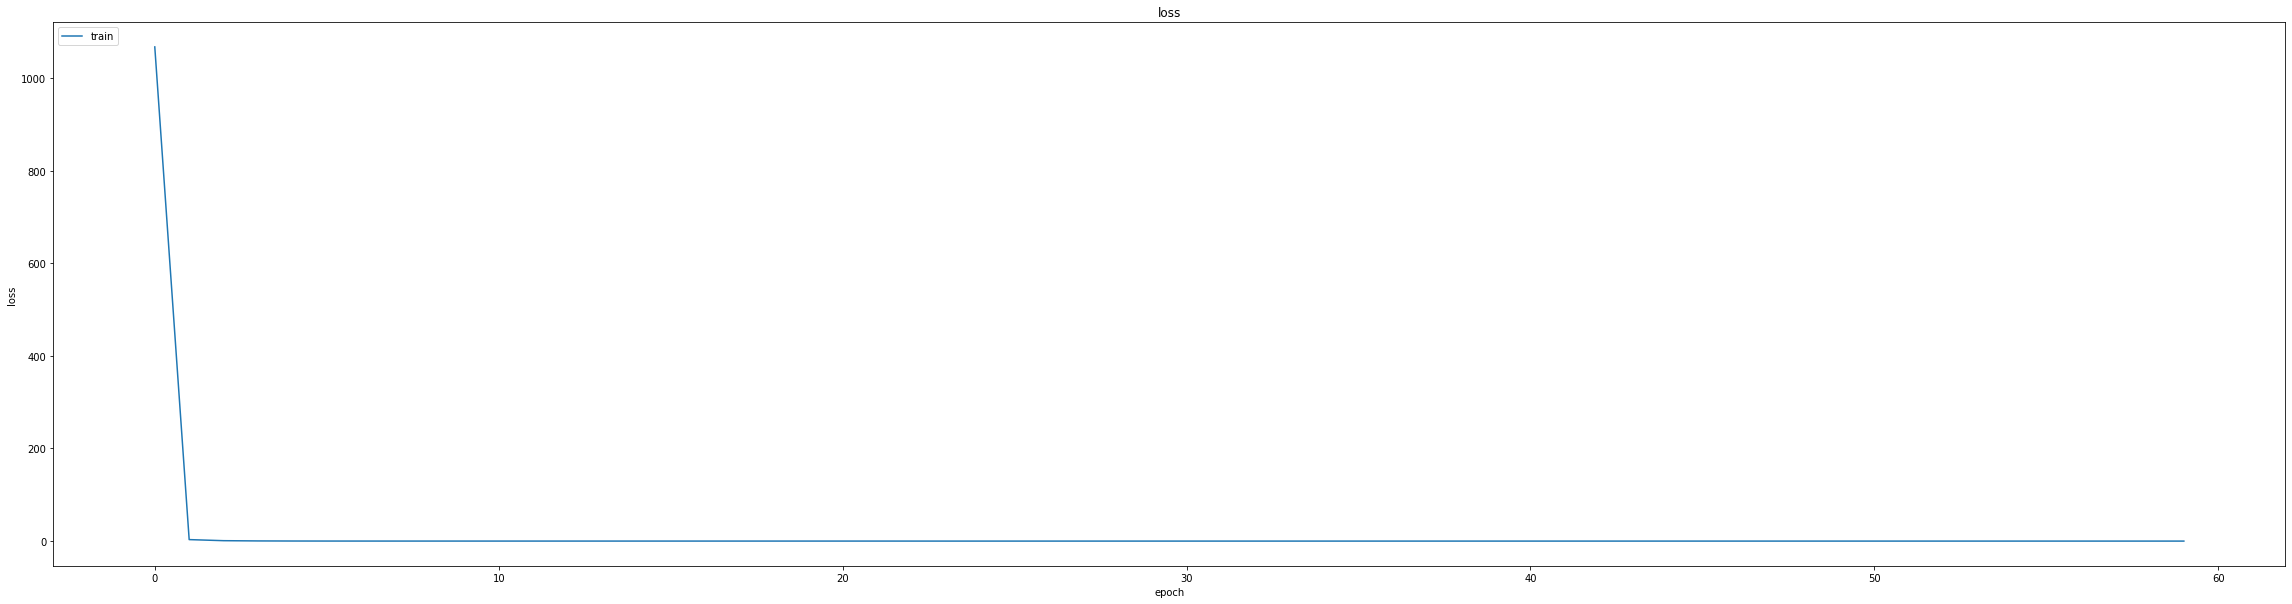

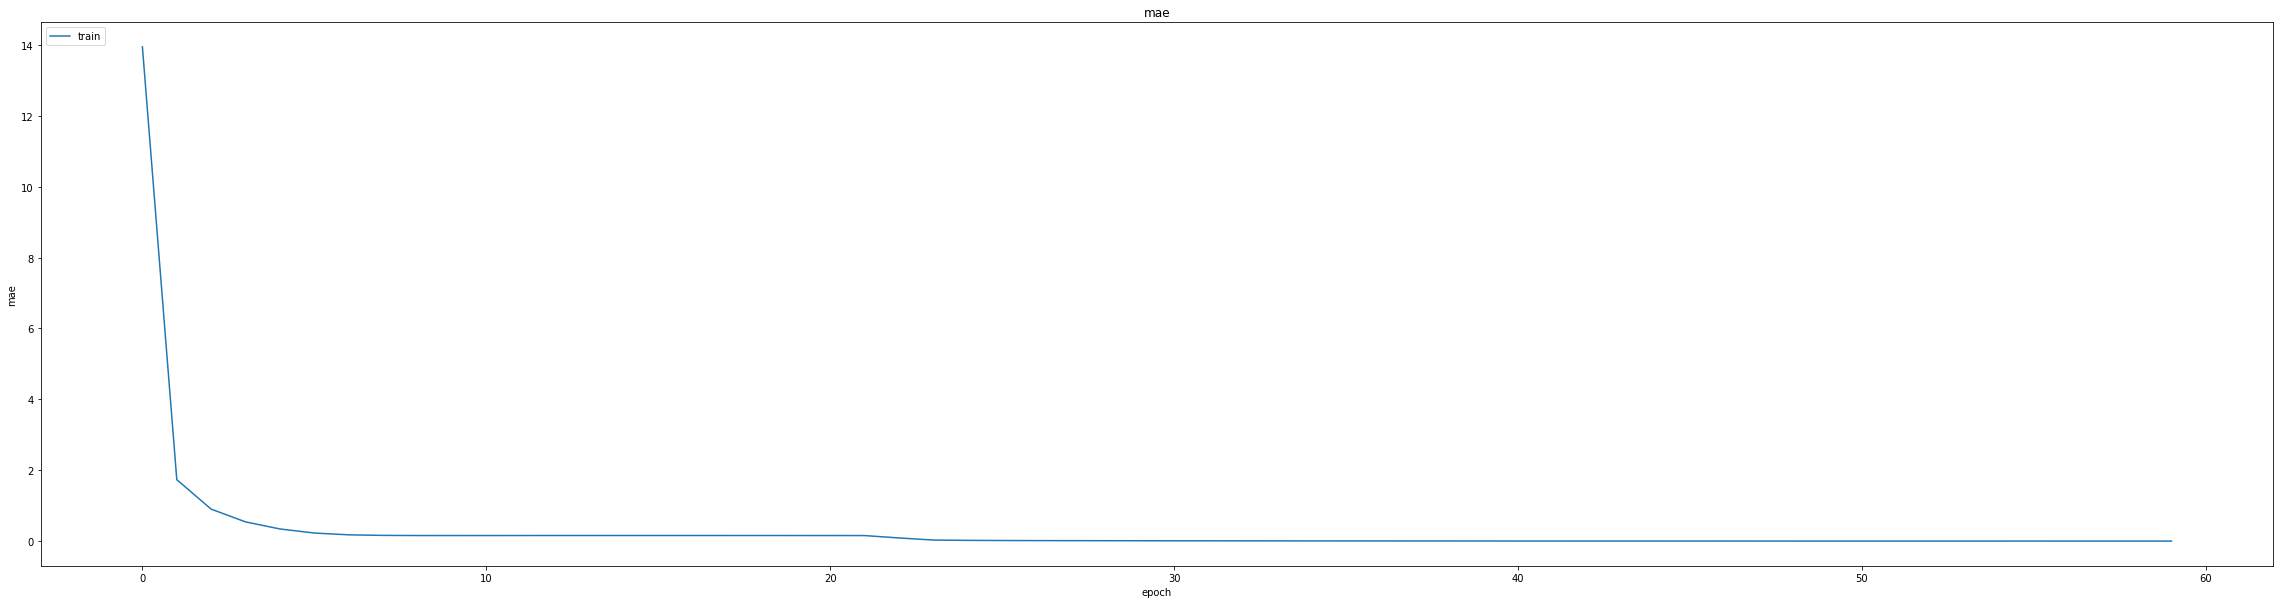

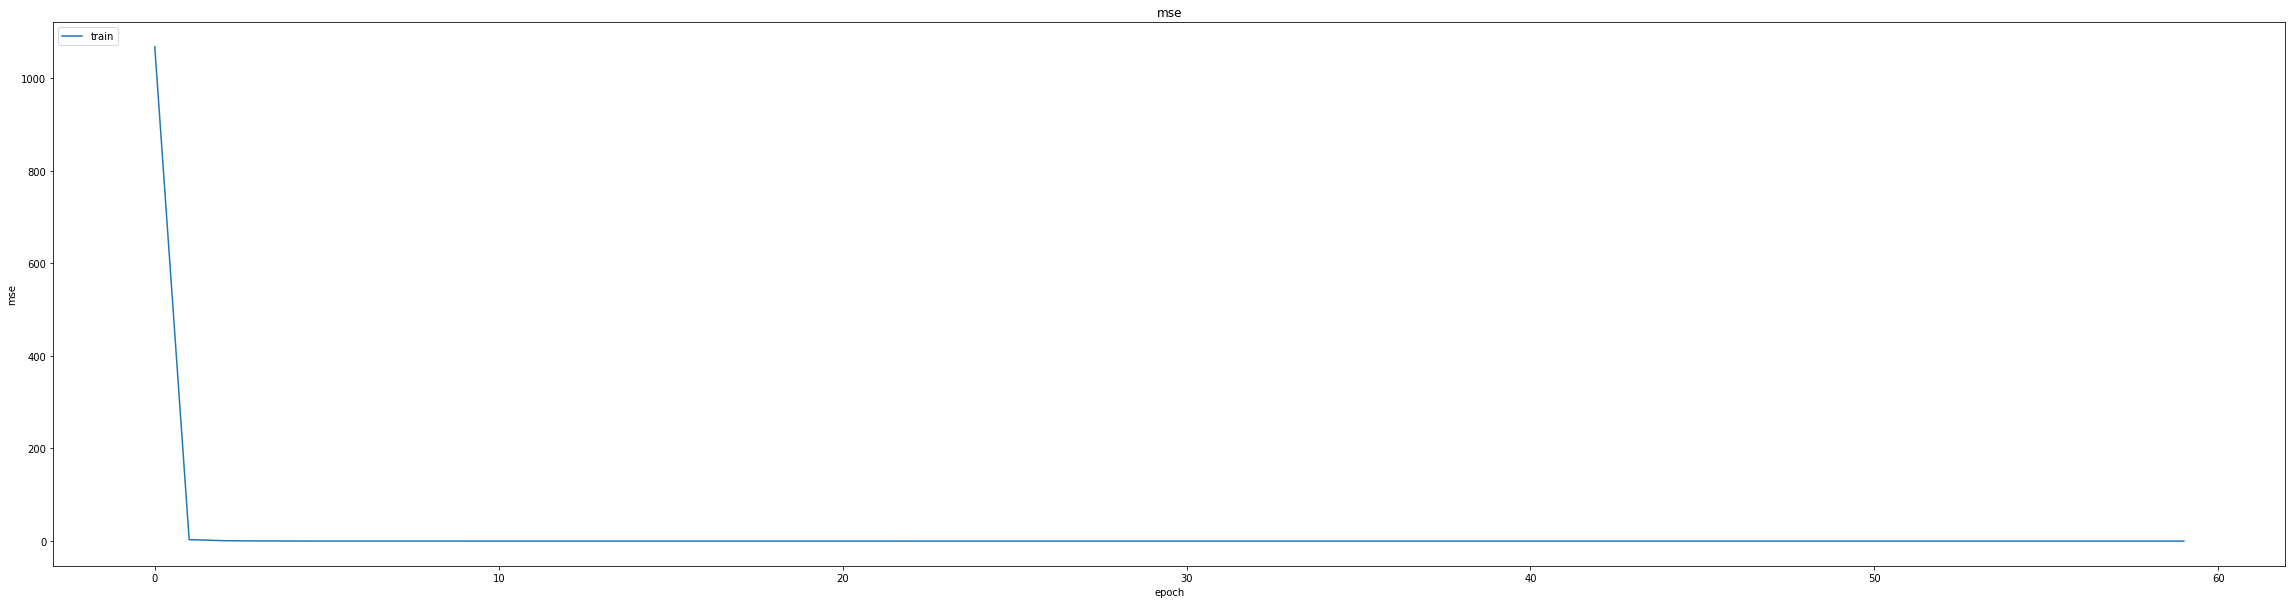

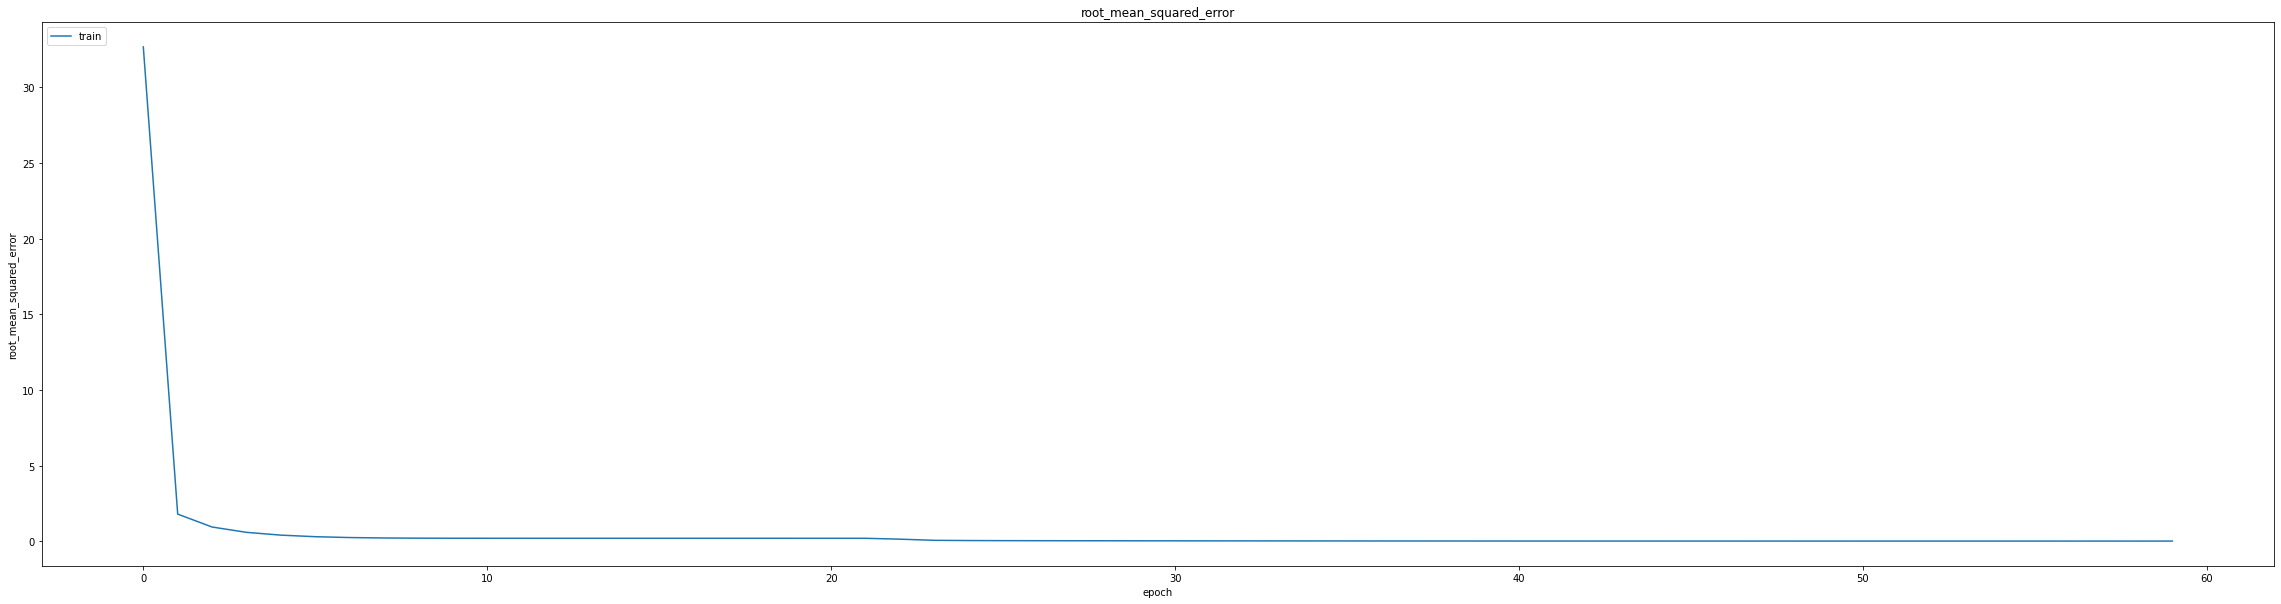

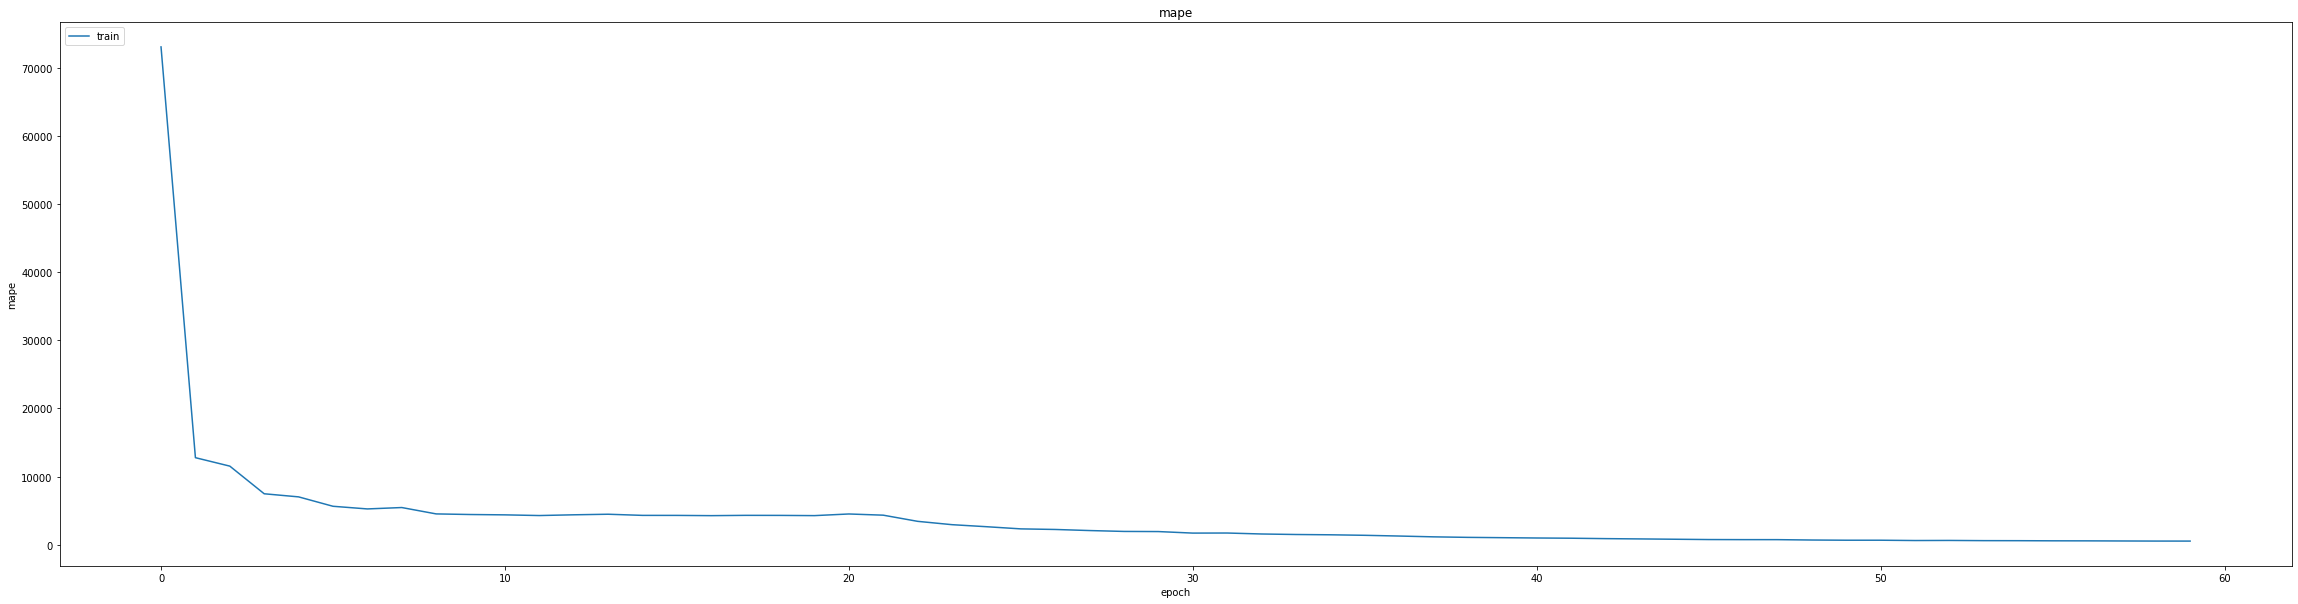

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.009810296818614006
0.009810296818614006
0.0149795301258564
1043/1043 [==============================] - 6s 5ms/step
0.9956430046517397


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
402/405 [============================>.] - ETA: 0s - loss: 6.8568e-04 - mae: 0.0124 - mse: 6.8568e-04 - root_mean_squared_error: 0.0262 - mape: 596.9385
Epoch 1: val_mse did not improve from 0.00022
405/405 [==============================] - 11s 17ms/step - loss: 6.8158e-04 - mae: 0.0124 - mse: 6.8158e-04 - root_mean_squared_error: 0.0261 - mape: 592.8500 - val_loss: 3.2975e-04 - val_mae: 0.0134 - val_mse: 3.2975e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 2770.0701 - lr: 0.0010
Epoch 2/20
402/405 [============================>.] - ETA: 0s - loss: 8.7984e-05 - mae: 0.0070 - mse: 8.7984e-05 - root_mean_squared_error: 0.0094 - mape: 552.5567
Epoch 2: val_mse did not improve from 0.00022
405/405 [==============================] - 6s 14ms/step - loss: 8.8009e-05 - mae: 0.0070 - mse: 8.8009e-05 - root_mean_squared_error: 0.0094 - mape: 548.7738 - val_loss: 4.0200e-04 - val_mae: 0.0146 - val_mse: 4.0200e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 2786.5583 - lr

405/405 [==============================] - 16s 39ms/step - loss: 1.0722e-04 - mae: 0.0080 - mse: 1.0722e-04 - root_mean_squared_error: 0.0104 - mape: 502.6490 - val_loss: 1.6660e-04 - val_mae: 0.0096 - val_mse: 1.6660e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 2383.0840 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
403/405 [============================>.] - ETA: 0s - loss: 8.2268e-05 - mae: 0.0069 - mse: 8.2268e-05 - root_mean_squared_error: 0.0091 - mape: 488.7155
Epoch 7: val_mse did not improve from 0.00017
405/405 [==============================] - 6s 15ms/step - loss: 8.2163e-05 - mae: 0.0068 - mse: 8.2163e-05 - root_mean_squared_error: 0.0091 - mape: 486.5722 - val_loss: 3.1620e-04 - val_mae: 0.0152 - val_mse: 3.1620e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 2321.0474 - lr: 7.2900e-04
Epoch 8/20
403/405 [============================>.] - ETA: 0s - loss: 8.4732e-05 - mae: 0.0071 - mse: 8.4732e-05 - root_mean_squared_error: 0.0092 - mape: 49

405/405 [==============================] - 15s 38ms/step - loss: 5.4778e-05 - mae: 0.0056 - mse: 5.4778e-05 - root_mean_squared_error: 0.0074 - mape: 439.2143 - val_loss: 1.0132e-04 - val_mae: 0.0076 - val_mse: 1.0132e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 2015.0695 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
405/405 [==============================] - ETA: 0s - loss: 5.1843e-05 - mae: 0.0055 - mse: 5.1843e-05 - root_mean_squared_error: 0.0072 - mape: 423.9094
Epoch 17: val_mse did not improve from 0.00010
405/405 [==============================] - 6s 14ms/step - loss: 5.1843e-05 - mae: 0.0055 - mse: 5.1843e-05 - root_mean_squared_error: 0.0072 - mape: 423.9094 - val_loss: 1.6305e-04 - val_mae: 0.0103 - val_mse: 1.6305e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 1986.6494 - lr: 4.3047e-04
Epoch 18/20
401/405 [============================>.] - ETA: 0s - loss: 5.1830e-05 - mae: 0.0055 - mse: 5.1830e-05 - root_mean_squared_error: 0.0072 - mape:

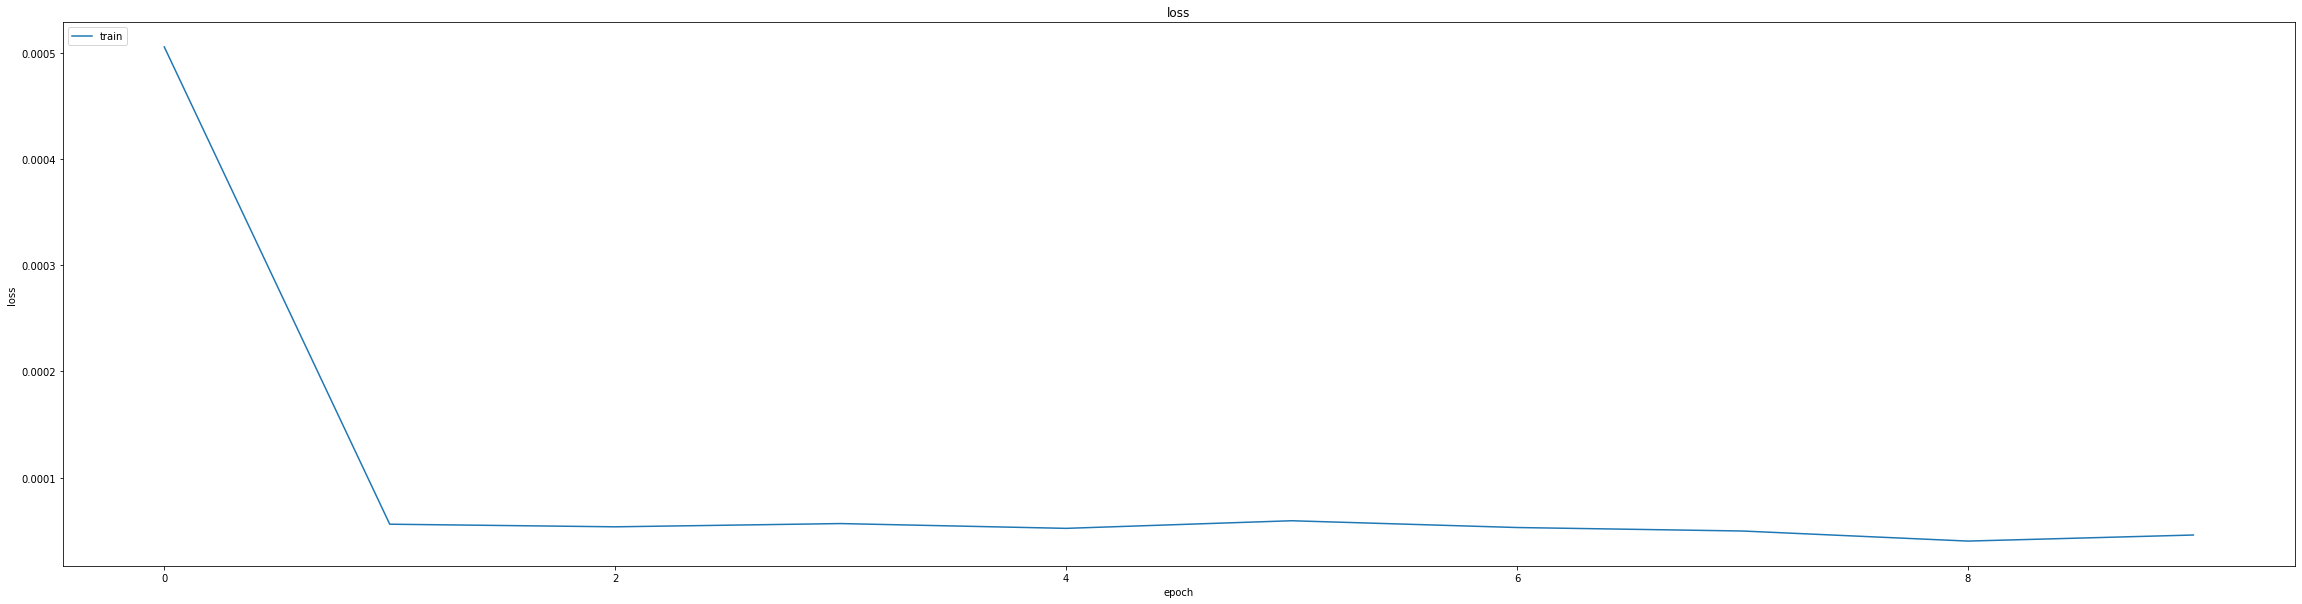

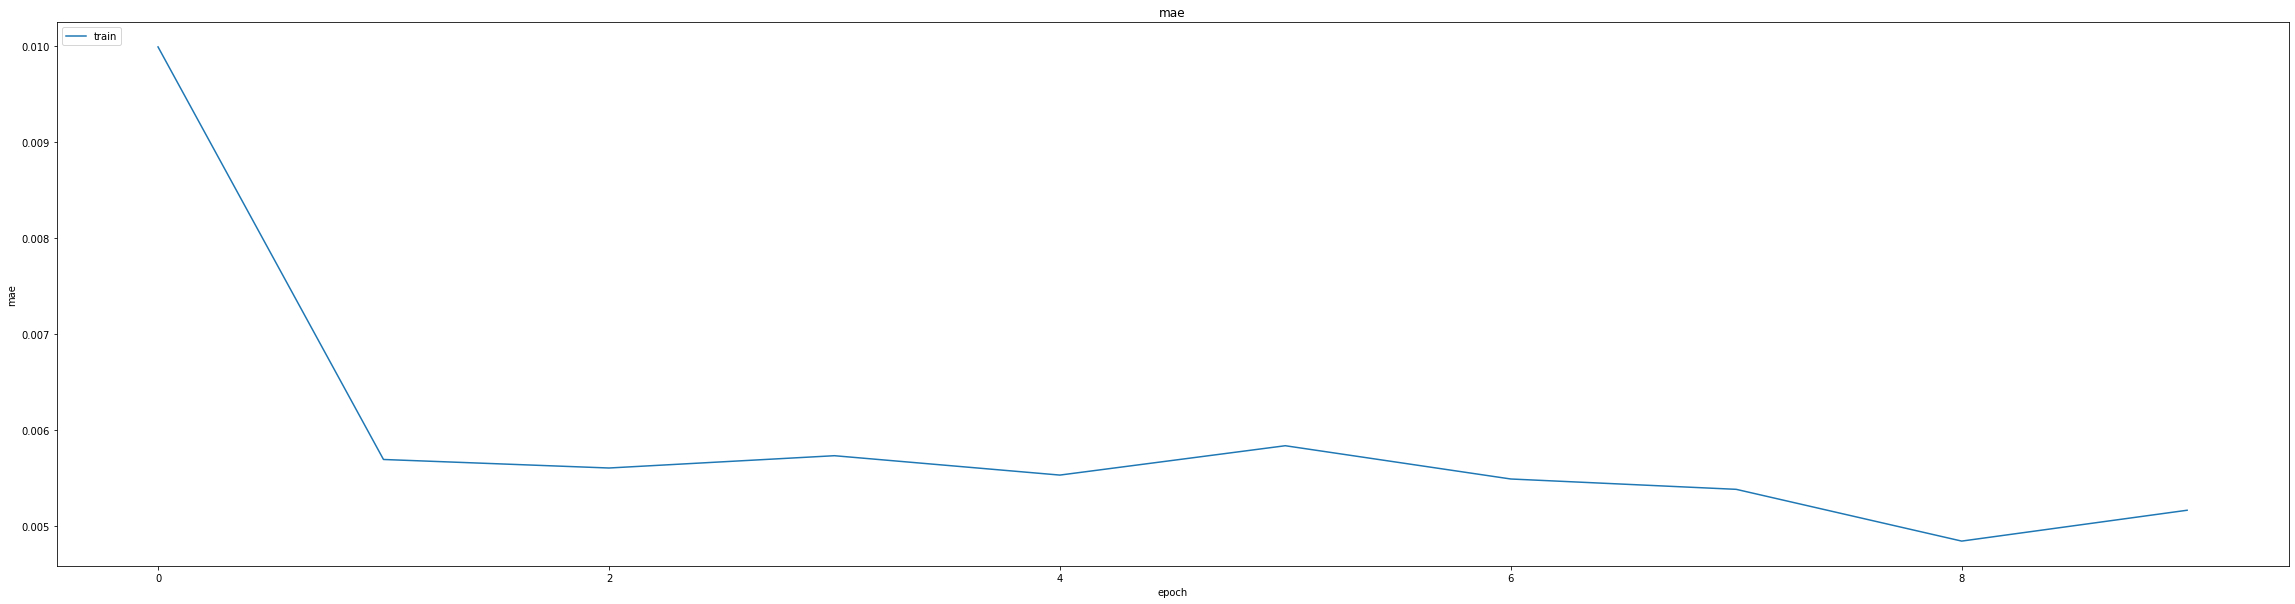

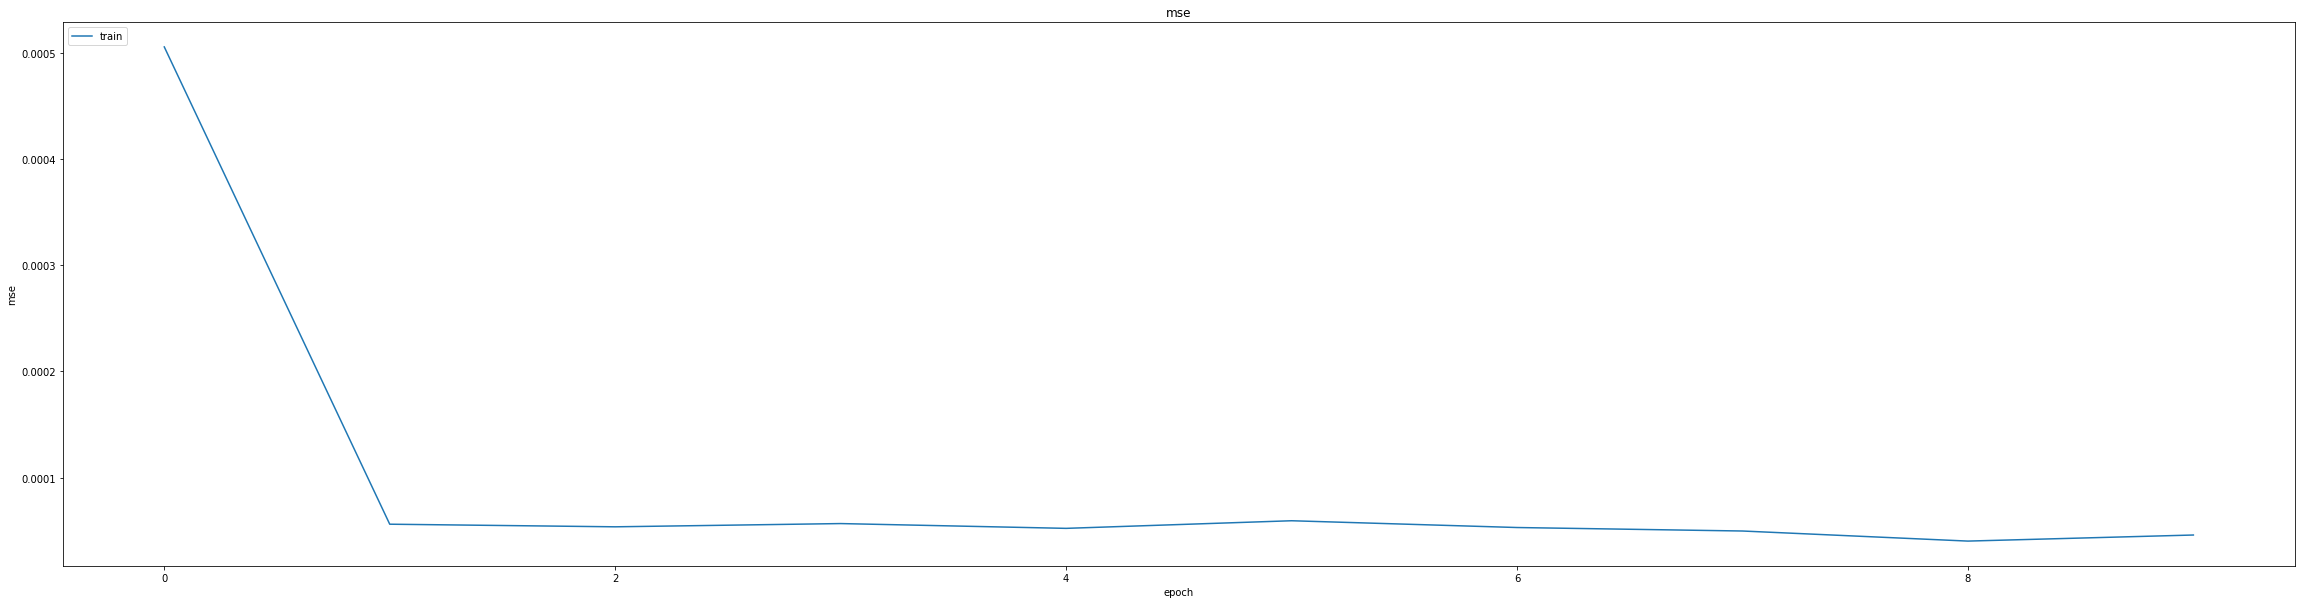

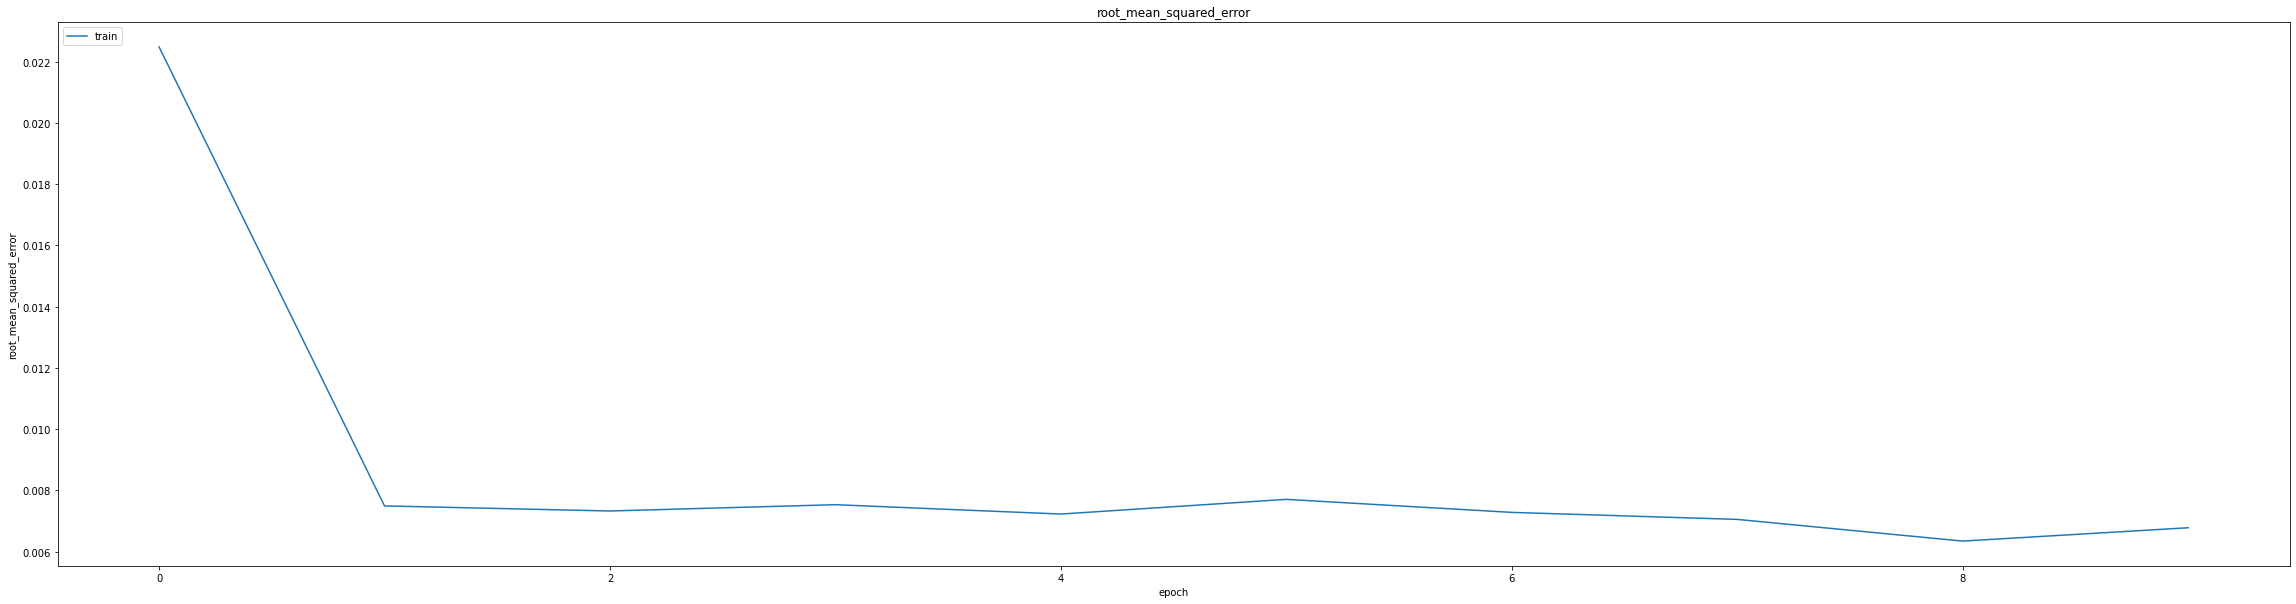

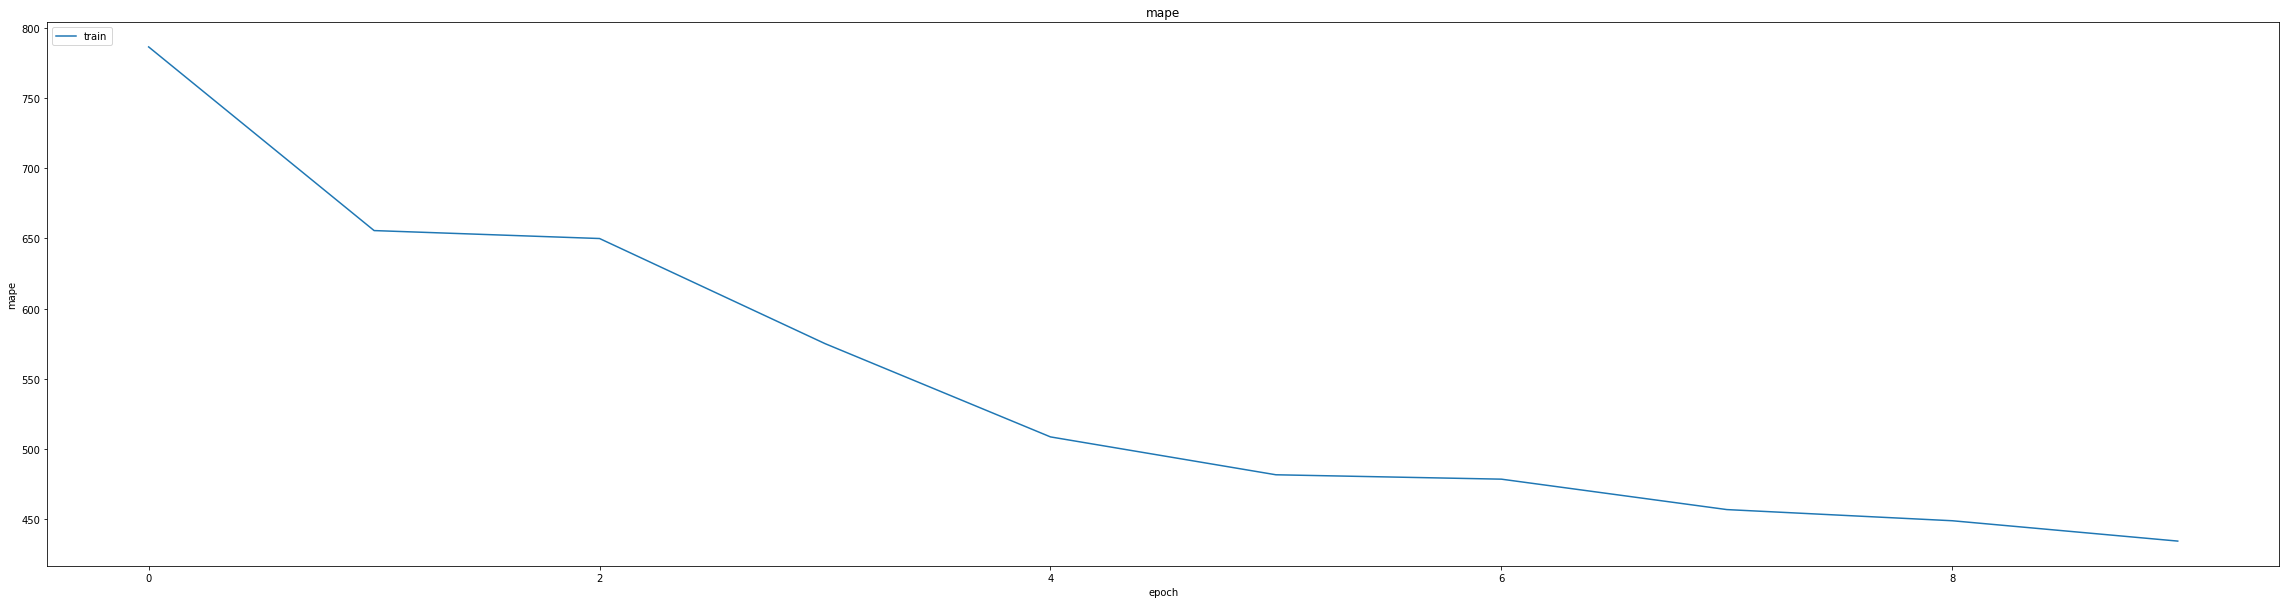

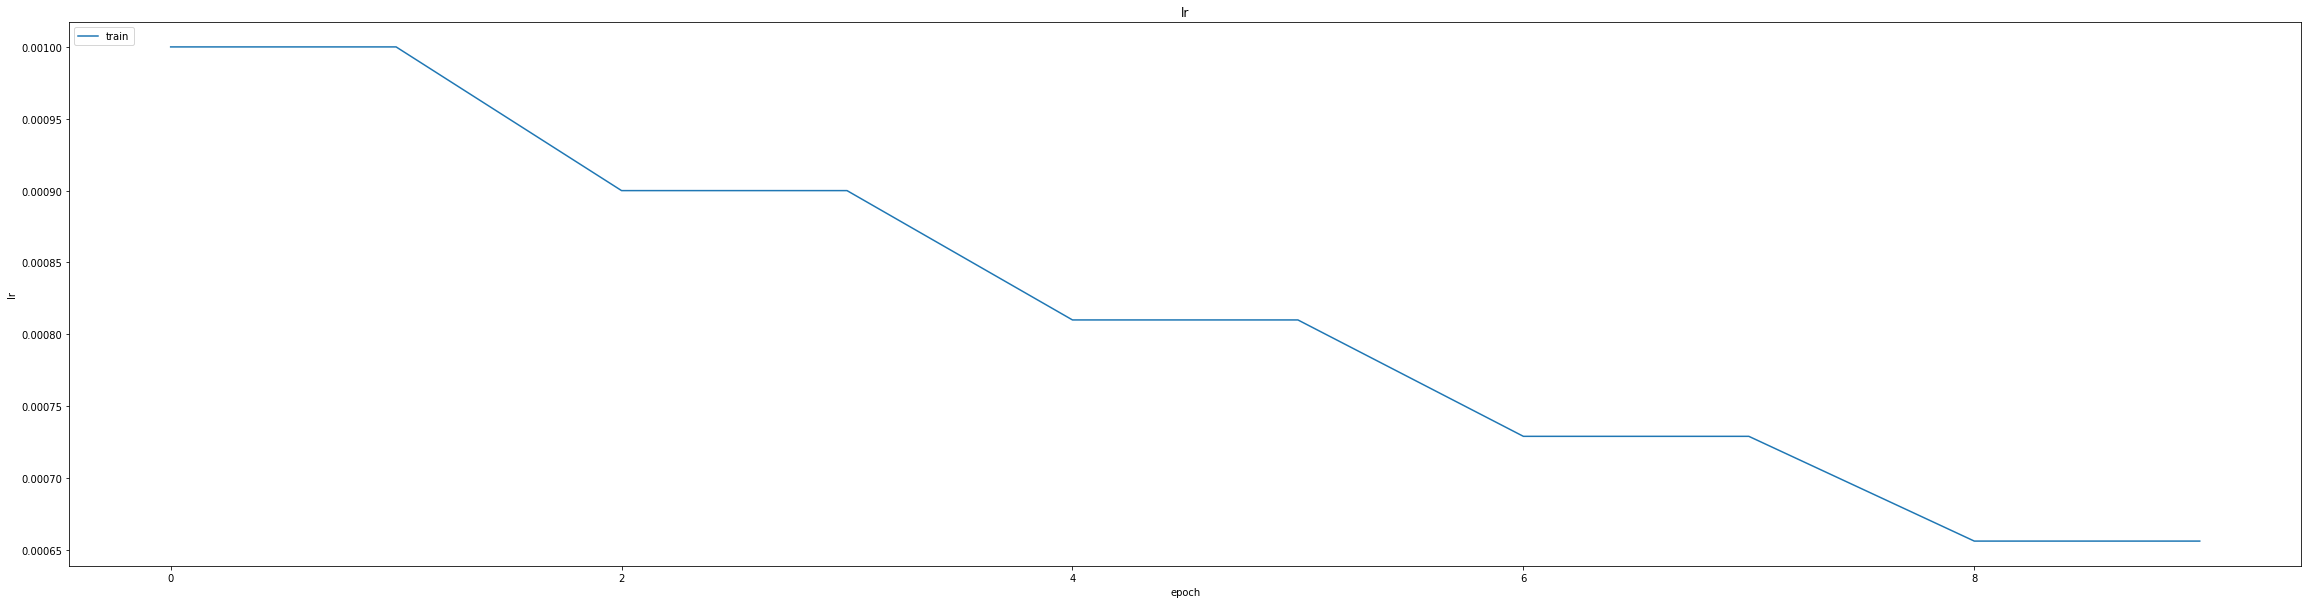

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.0075639961287379265
0.0075639961287379265
0.010065563023090363
1043/1043 [==============================] - 5s 4ms/step
0.9954098856634634


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(70-30)")

1043/1043 [==============================] - 4s 4ms/step


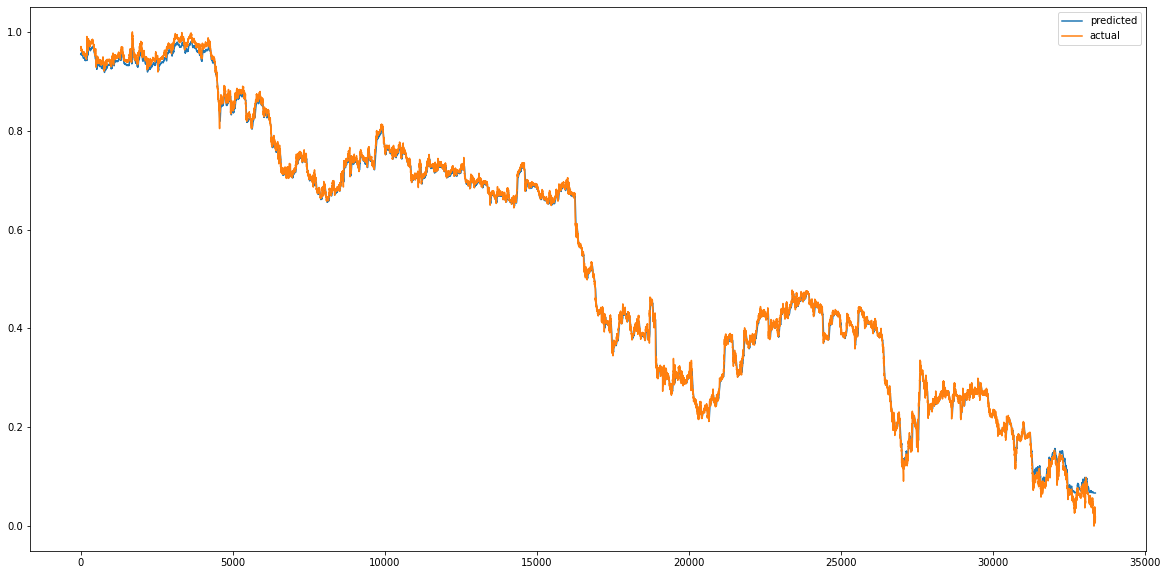

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


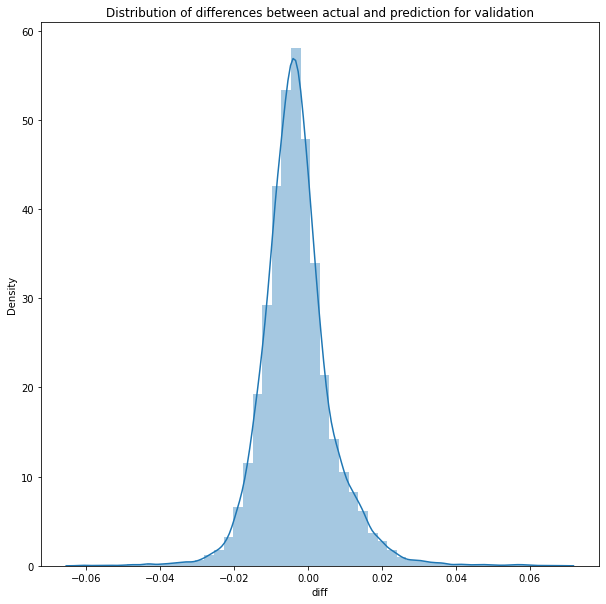

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1043/1043 [==============================] - 4s 4ms/step


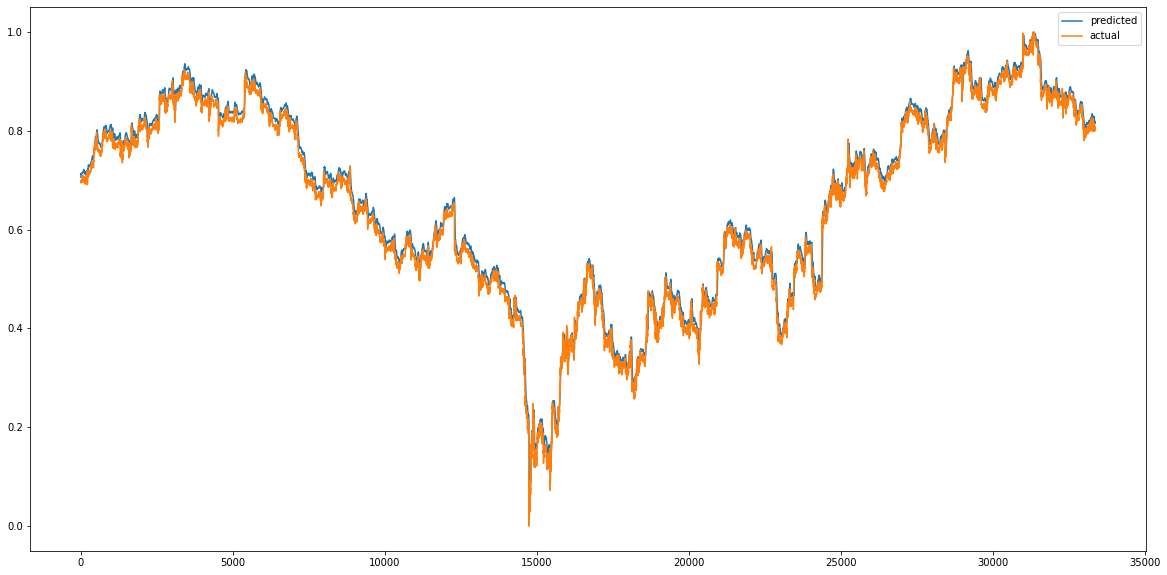

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


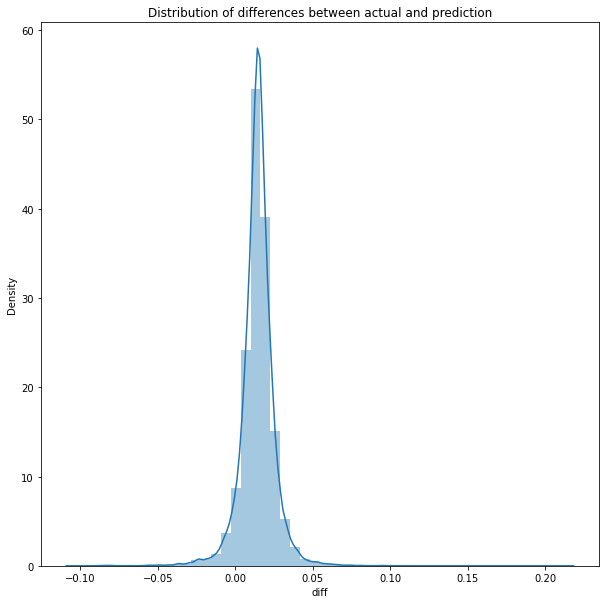

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00032989390582376533
RMSE :  0.01816298174374916
MAE :  0.015748551233036735
1043/1043 [==============================] - 4s 4ms/step
R2_Score  : 0.9916150975673294


count    33376.000000
mean         0.014437
std          0.011022
min         -0.104921
25%          0.009728
50%          0.014713
75%          0.019539
max          0.214015
Name: diff, dtype: float64